# Predict ‘MntWines’

### 1)	Out of the 27 independent variables, find variables that are important in predicting ‘MntWines’ column.
### 2)	On these variables, apply PCA and try to reduce the number of independent variables.
### 3)	Draft the following ML models with created Principal Components to predict ‘MntWines’: Multiple Linear Regression, SVM, Decision Trees. Also, write an inference for each model.


## Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import scipy.stats as st



# Suppress FutureWarning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
df_data = pd.read_csv("marketing_data.csv")

## Understanding the data

In [3]:
df= df_data.copy()
df.head(5)

ID  Year_Birth   Education Marital_Status      Income  Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00        0   
1      1        1961  Graduation         Single  $57,091.00        0   
2  10476        1958  Graduation        Married  $67,267.00        0   
3   1386        1967  Graduation       Together  $32,474.00        1   
4   5371        1989  Graduation         Single  $21,474.00        1   

   Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0         0     6/16/14        0       189  ...                  6   
1         0     6/15/14        0       464  ...                  7   
2         1     5/13/14        0       134  ...                  5   
3         1     5/11/14        0        10  ...                  2   
4         0      4/8/14        0         6  ...                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain  Country  
0             0         1         0       SP  
1             1         1         0       CA  
2             0         0         0       US  
3             0         0         0      AUS  
4             0         1         0       SP  

[5 rows x 28 columns]

In [4]:
col_names = df.columns
print(col_names)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')


In [5]:
df.shape

(2240, 28)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

### Count of the NAN values for each column

In [7]:
def count_na(datafrme,col_names):
    count = {}
    for i in col_names:
        value = df[i].isna().sum()
        count[i]= value
    dataframe = pd.DataFrame([count])
    return dataframe

In [8]:

count_na(df,col_names)

ID  Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
0   0           0          0               0      24        0         0   

   Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0            0        0         0  ...                  0                  0   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   

   Response  Complain  Country  
0         0         0        0  

[1 rows x 28 columns]

<Axes: >

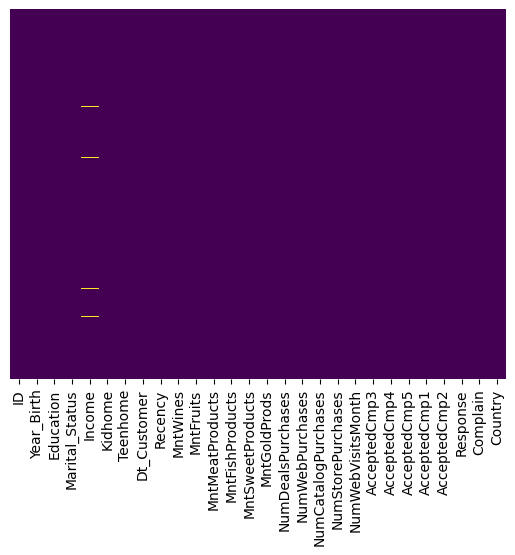

In [9]:
# checking for the null values 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
# Dt_Customer,Year_Birth,Incomebb

In [11]:
df

ID  Year_Birth   Education Marital_Status      Income  Kidhome  \
0      1826        1970  Graduation       Divorced  $84,835.00        0   
1         1        1961  Graduation         Single  $57,091.00        0   
2     10476        1958  Graduation        Married  $67,267.00        0   
3      1386        1967  Graduation       Together  $32,474.00        1   
4      5371        1989  Graduation         Single  $21,474.00        1   
...     ...         ...         ...            ...         ...      ...   
2235  10142        1976         PhD       Divorced  $66,476.00        0   
2236   5263        1977    2n Cycle        Married  $31,056.00        1   
2237     22        1976  Graduation       Divorced  $46,310.00        1   
2238    528        1978  Graduation        Married  $65,819.00        0   
2239   4070        1969         PhD        Married  $94,871.00        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0            0     6/16/14        0       189  ...                  6   
1            0     6/15/14        0       464  ...                  7   
2            1     5/13/14        0       134  ...                  5   
3            1     5/11/14        0        10  ...                  2   
4            0      4/8/14        0         6  ...                  2   
...        ...         ...      ...       ...  ...                ...   
2235         1      3/7/13       99       372  ...                 11   
2236         0     1/22/13       99         5  ...                  3   
2237         0     12/3/12       99       185  ...                  5   
2238         0    11/29/12       99       267  ...                 10   
2239         2      9/1/12       99       169  ...                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     1             0             0             0   
1                     5             0             0             0   
2                     2             0             0             0   
3                     7             0             0             0   
4                     7             1             0             0   
...                 ...           ...           ...           ...   
2235                  4             0             0             0   
2236                  8             0             0             0   
2237                  8             0             0             0   
2238                  3             0             0             0   
2239                  7             0             1             1   

      AcceptedCmp1  AcceptedCmp2  Response  Complain  Country  
0                0             0         1         0       SP  
1                0             1         1         0       CA  
2                0             0         0         0       US  
3                0             0         0         0      AUS  
4                0             0         1         0       SP  
...            ...           ...       ...       ...      ...  
2235             0             0         0         0       US  
2236             0             0         0         0       SP  
2237             0             0         0         0       SP  
2238             0             0         0         0      IND  
2239             0             0         1         0       CA  

[2240 rows x 28 columns]

### Data cleaning

In [12]:
df = df[df["Income"] !="nan"]
df = df.dropna()

In [13]:
def remove_symbol(col_values):
    clean_values= []
    for i in col_values:
        i = str(i)
        i = i.removeprefix("$")
        i = i.removesuffix(".00")
        i= i.replace(",","")
        clean_values.append(int(i))
    return clean_values
        

In [14]:
df["Income"] = remove_symbol(df["Income"])

In [15]:
df["Dt_Customer"]=pd.to_datetime(df['Dt_Customer'],format='%m/%d/%y')

### Check for the  duplicates

In [16]:
df.duplicated().sum()

0

### Getting the Unique values Count

In [17]:
def count_unique(datafrme,col_names):
    count = {}
    for i in col_names:
        value = len(df[i].unique().tolist())
        count[i]= value
    dataframe = pd.DataFrame([count])
    return dataframe

## Ploting the data and visulaizing the Distribution

In [18]:
def total_count(dataframes, col_name):
    
    value_counts = dataframes[col_name].value_counts()
    result_list = []
    for value, count in value_counts.items():
        result_list.append({col_name: value, "Counts": count})
    result_df = pd.DataFrame(result_list)

    return result_df



    
def subplots(columns,dataframe):
    size = len(columns) // 2
    #size = len(columns) // 2 + len(columns) % 2
    fig, axes = plt.subplots(size, 2, figsize=(10, 4 * size))
    axes = axes.flatten()
    for i, col in enumerate(columns):
        counts_df = total_count(dataframe, col)
    
        ax = sns.barplot(data=counts_df, x=col, y="Counts", ax=axes[i])
        ax.set_xlabel(col)
        ax.set_ylabel("Counts")
        ax.bar_label(ax.containers[0], fontsize=10)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


## Bar plot for the categorical values 

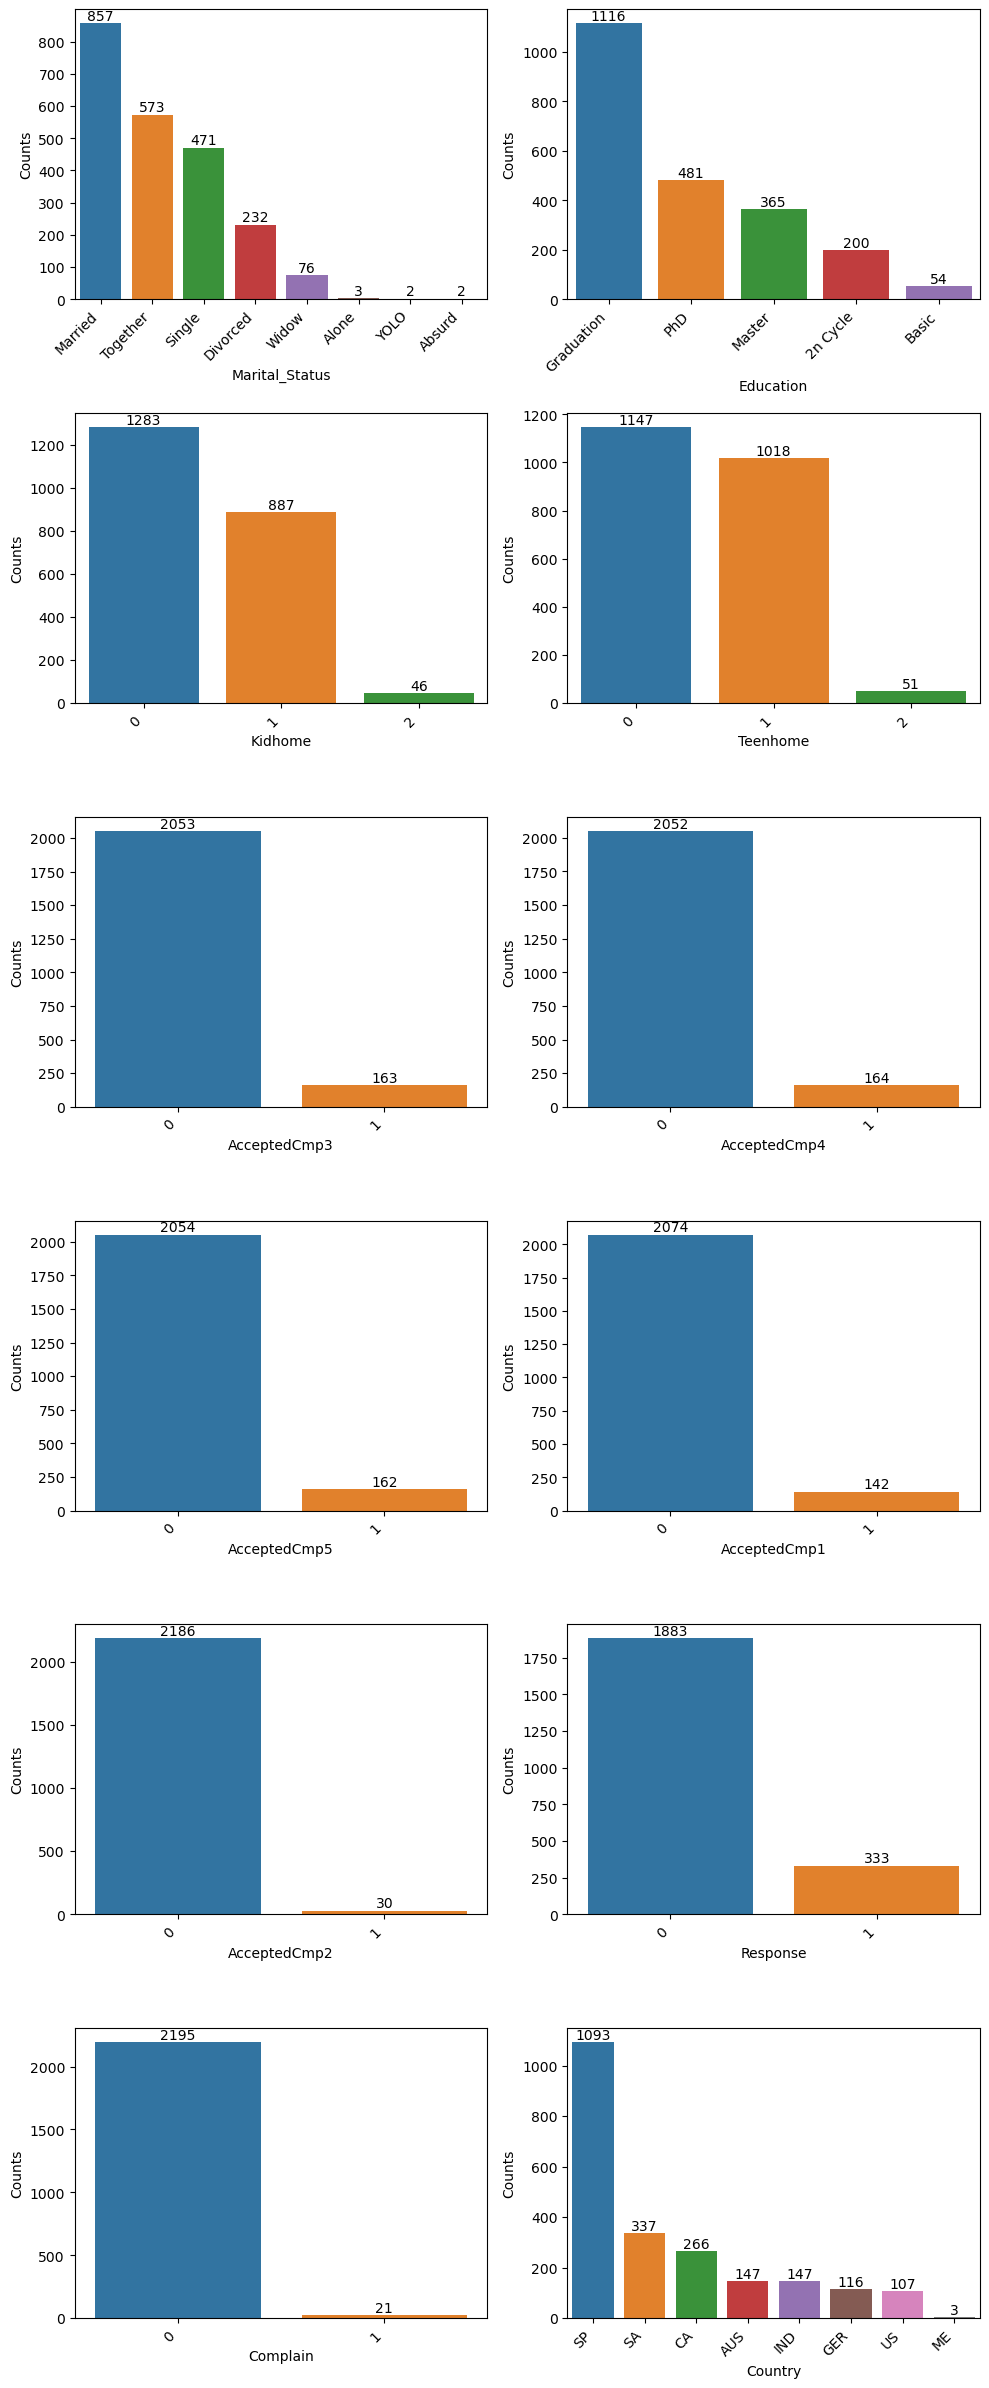

In [19]:
column = ["Marital_Status","Education","Kidhome","Teenhome","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Response","Complain","Country"]
subplots(column,df)

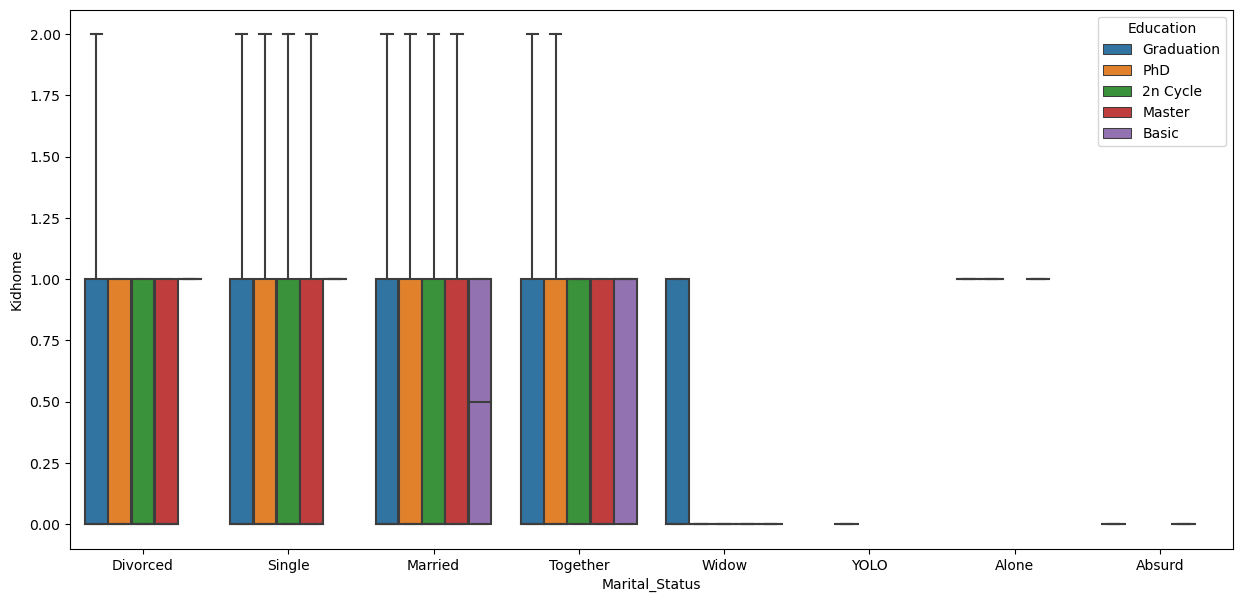

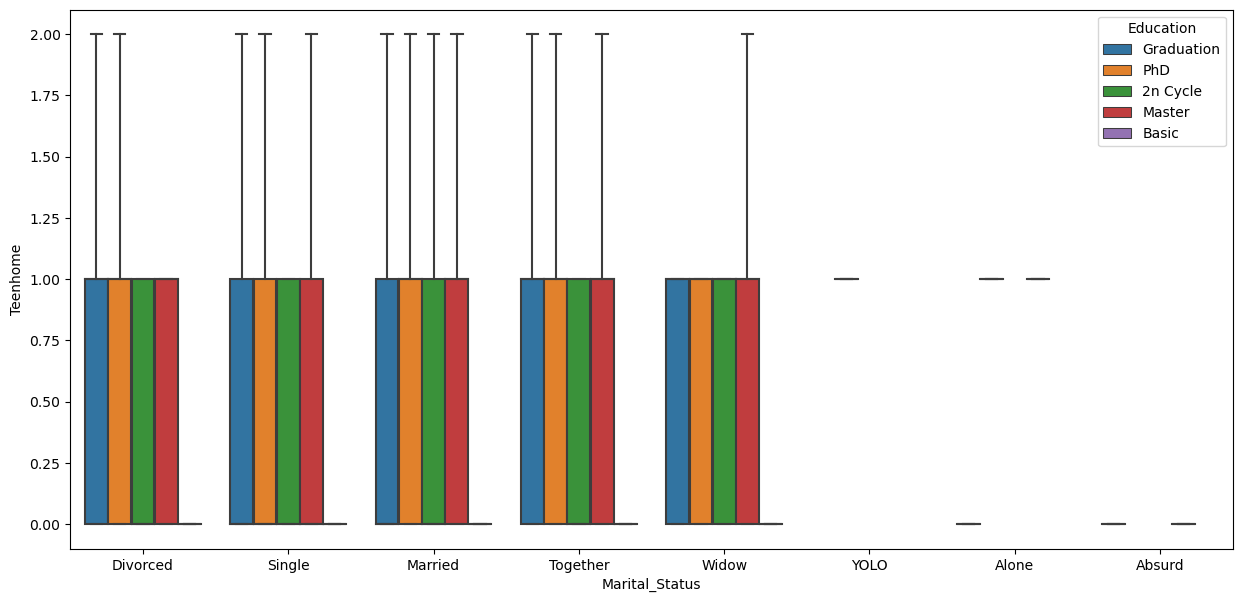

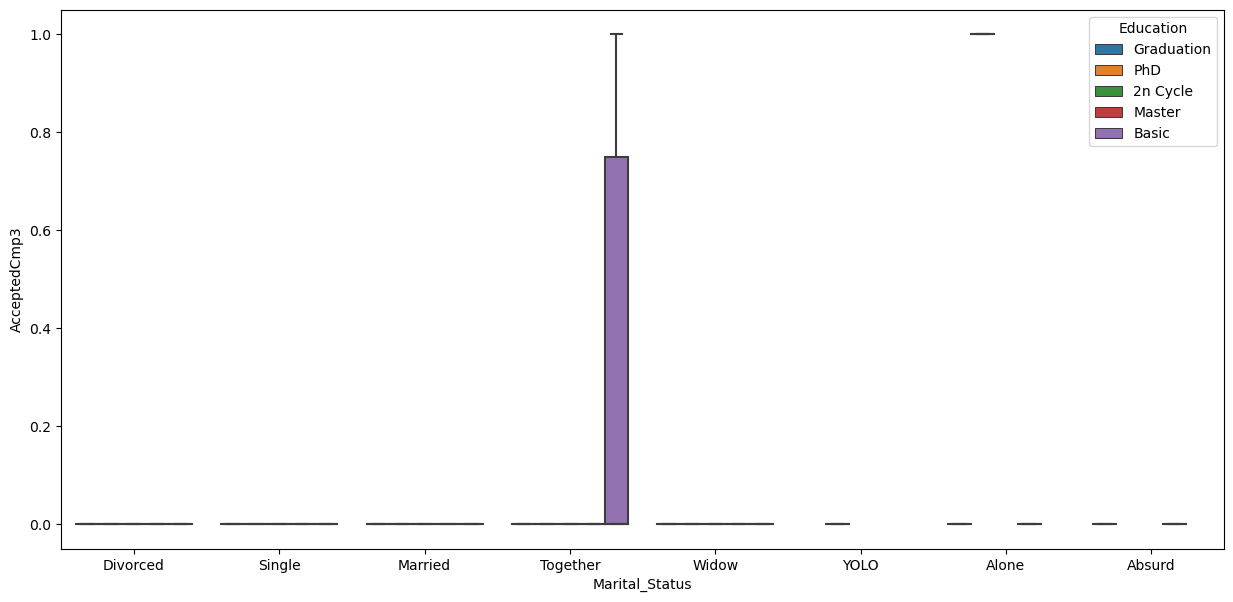

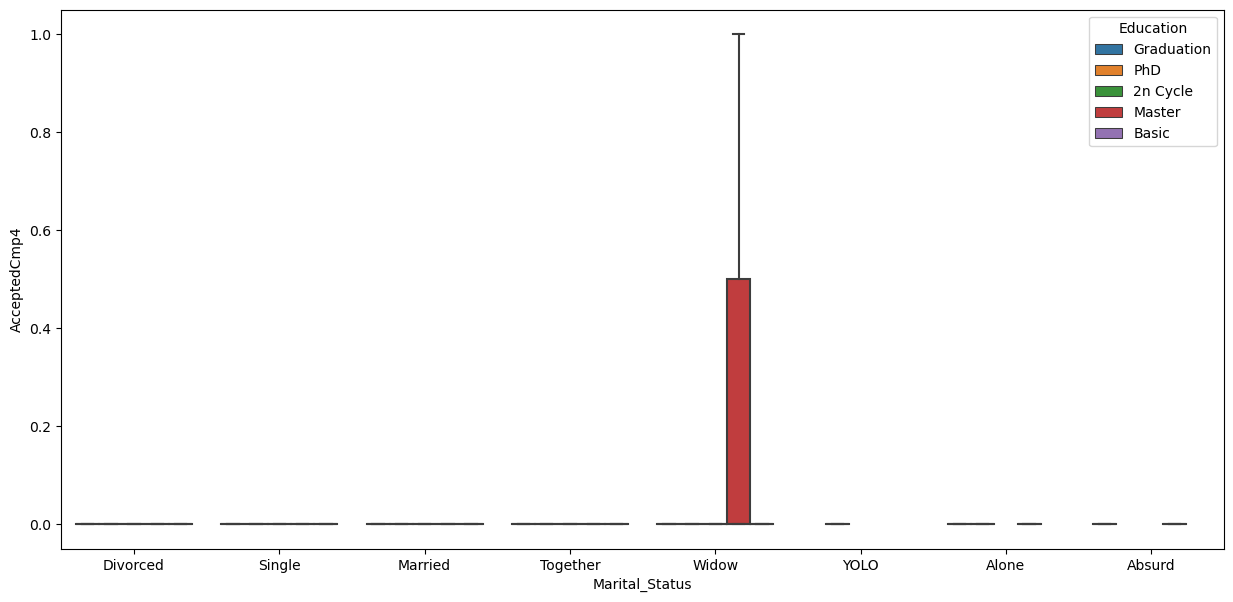

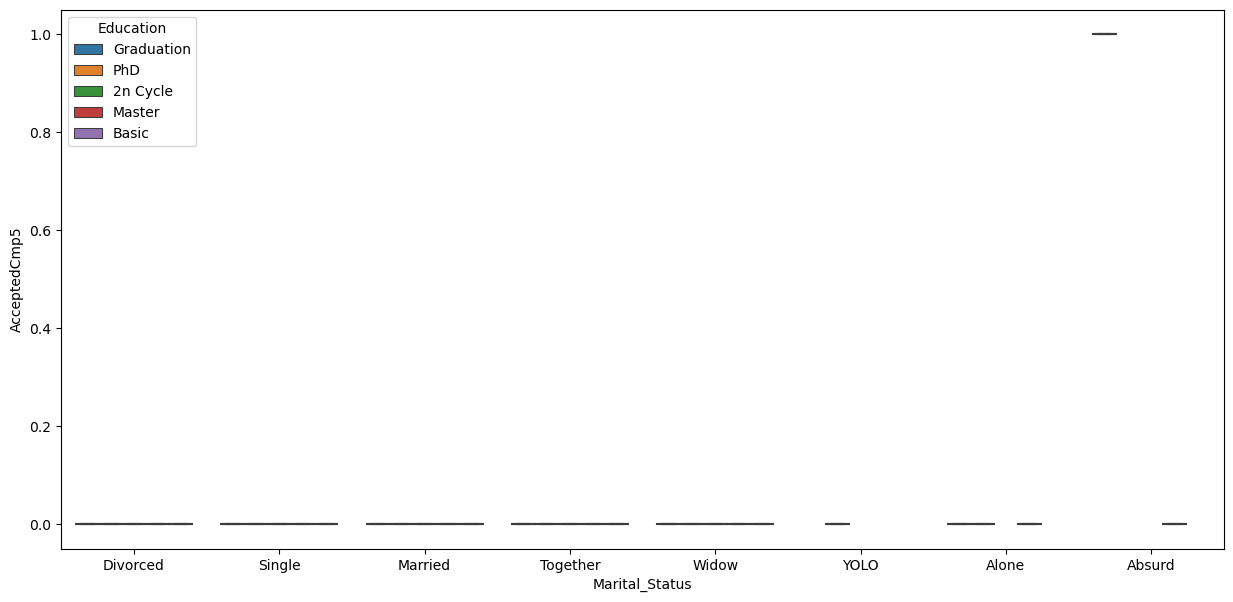

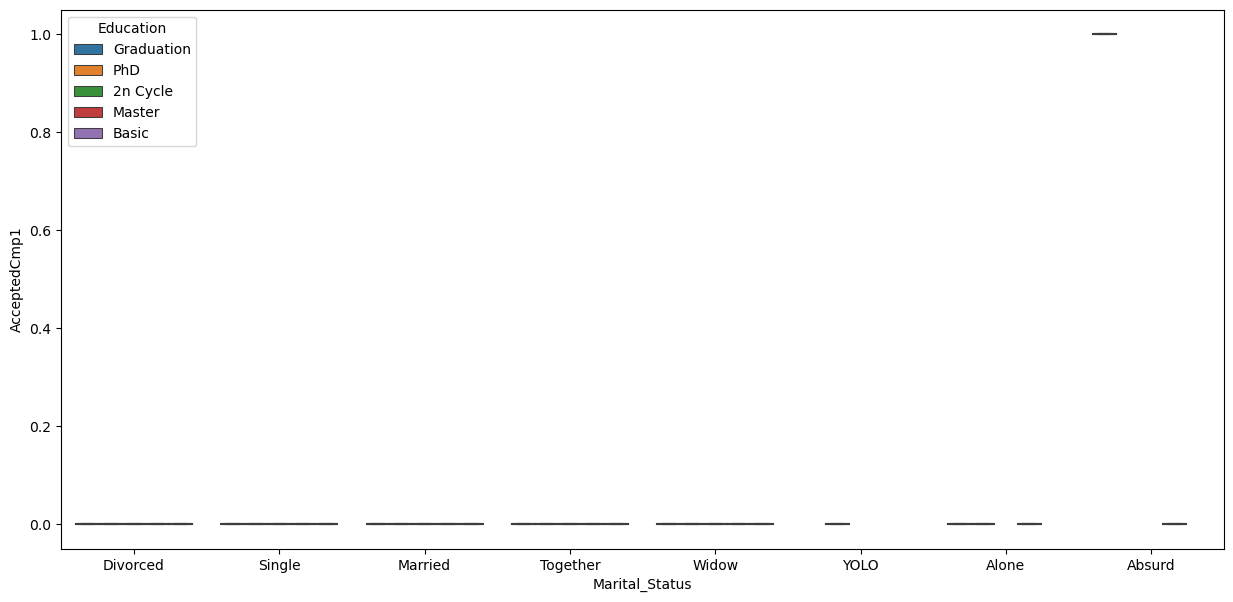

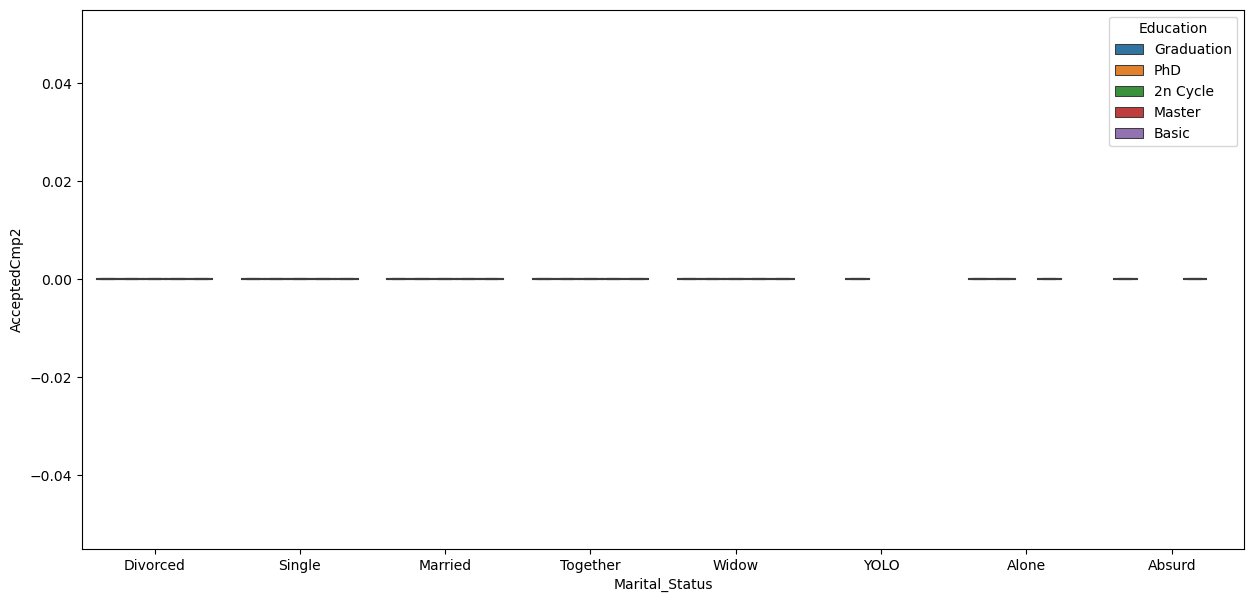

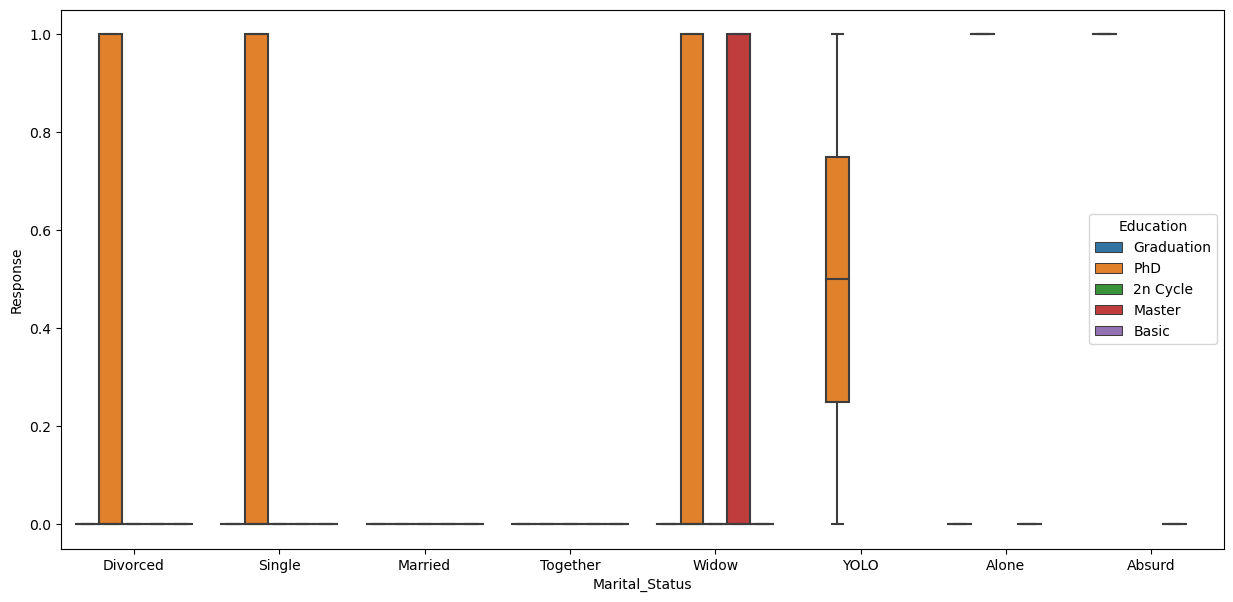

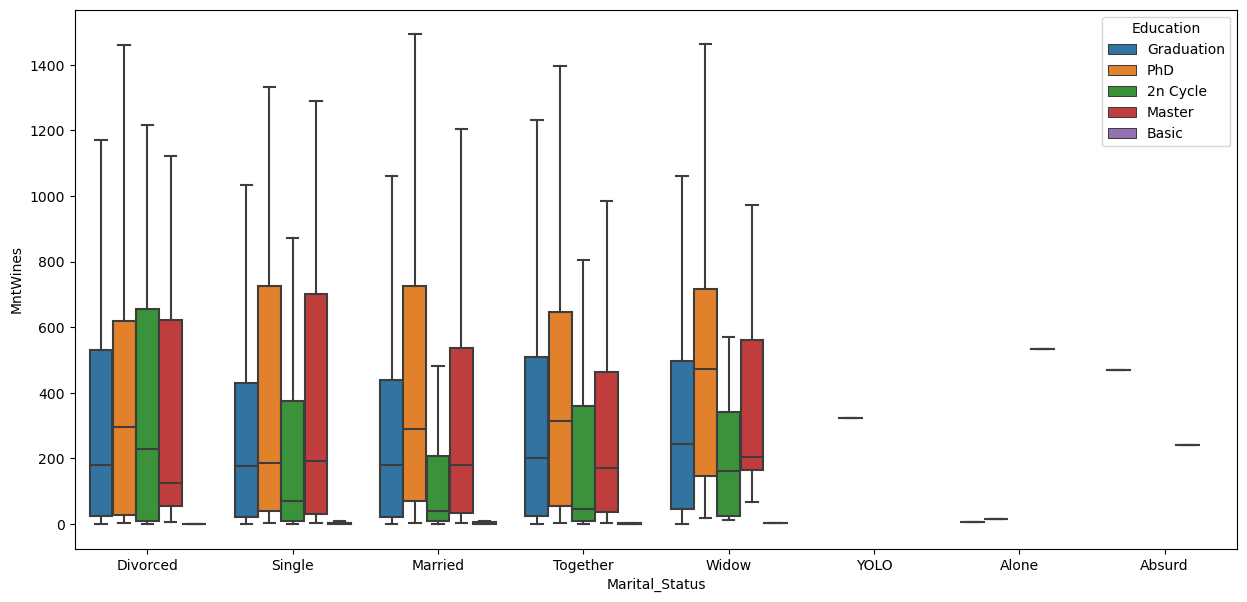

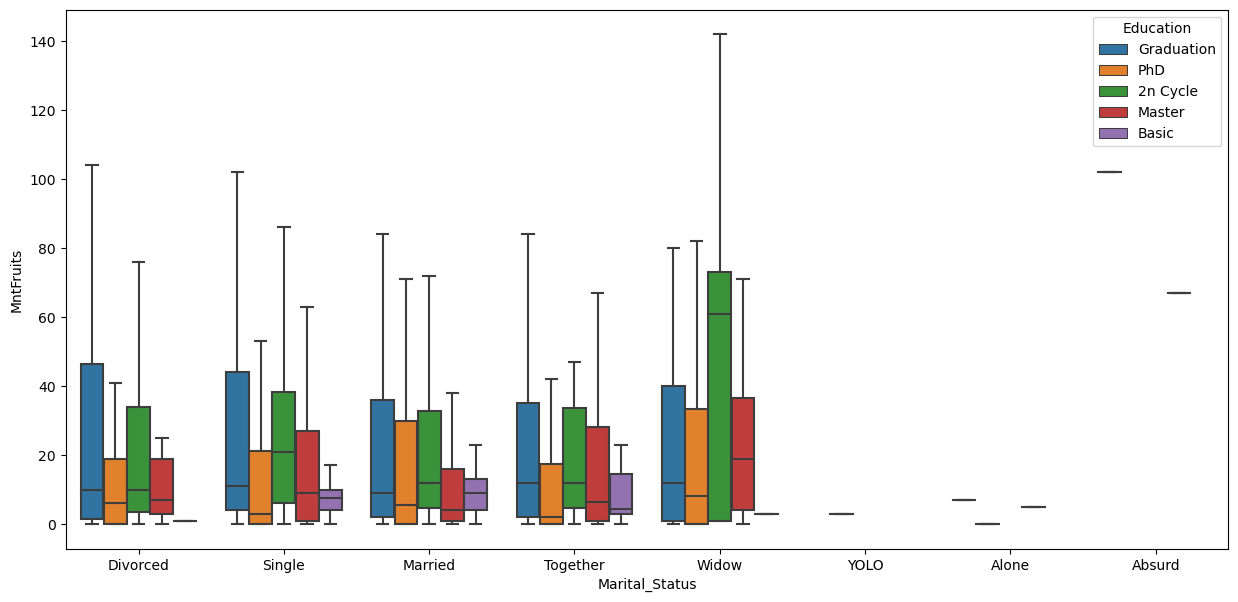

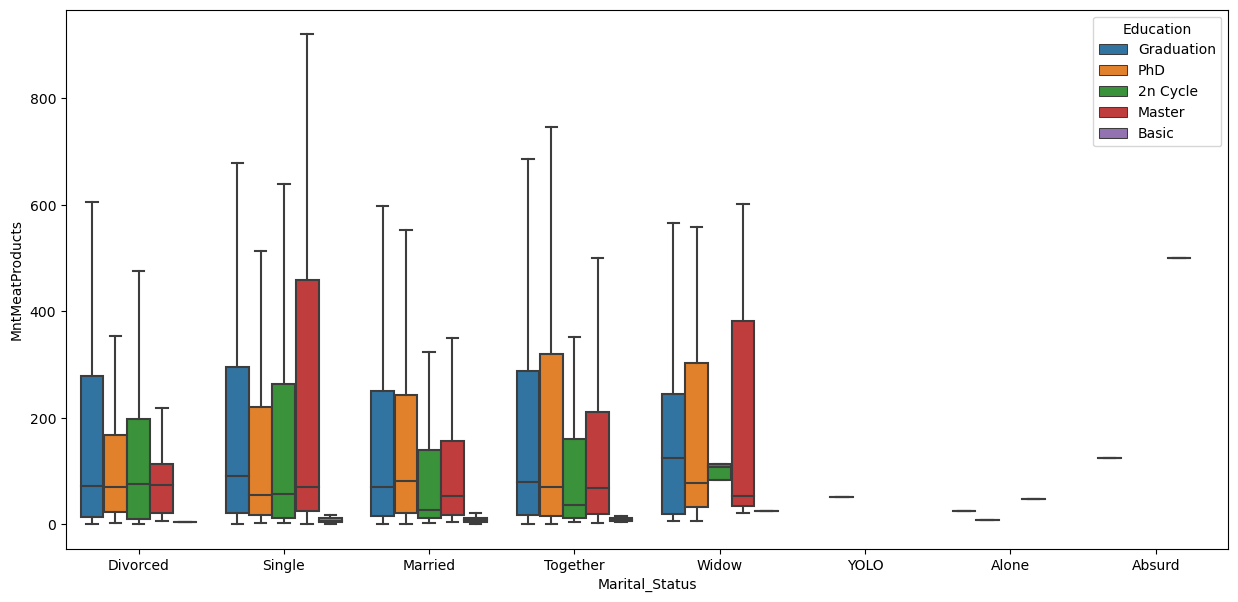

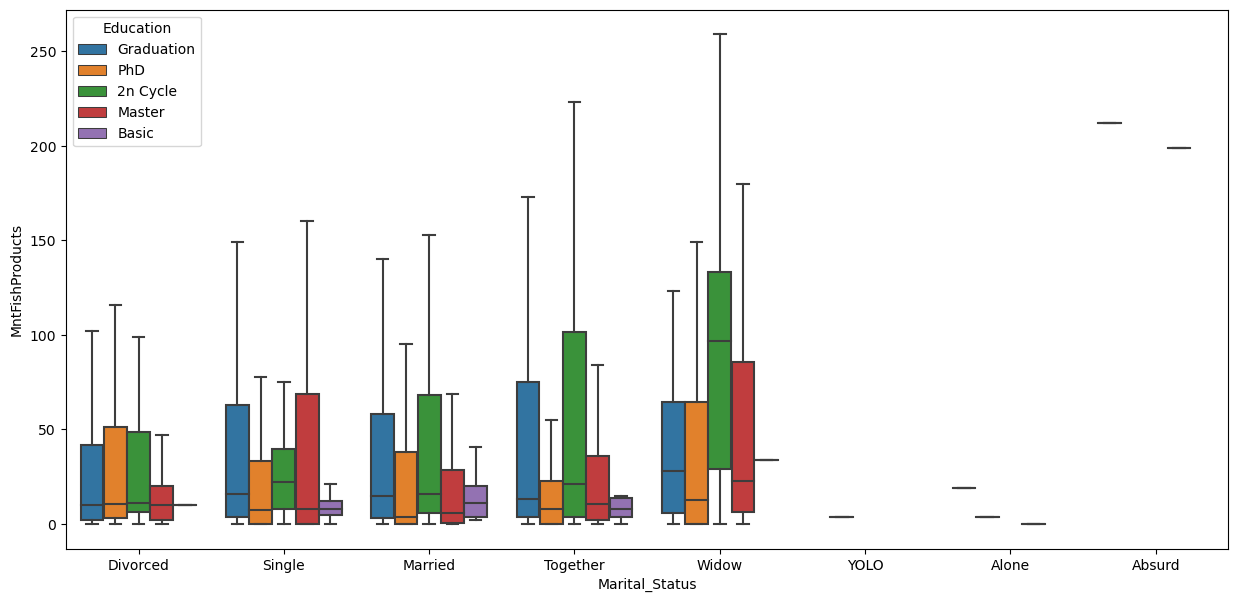

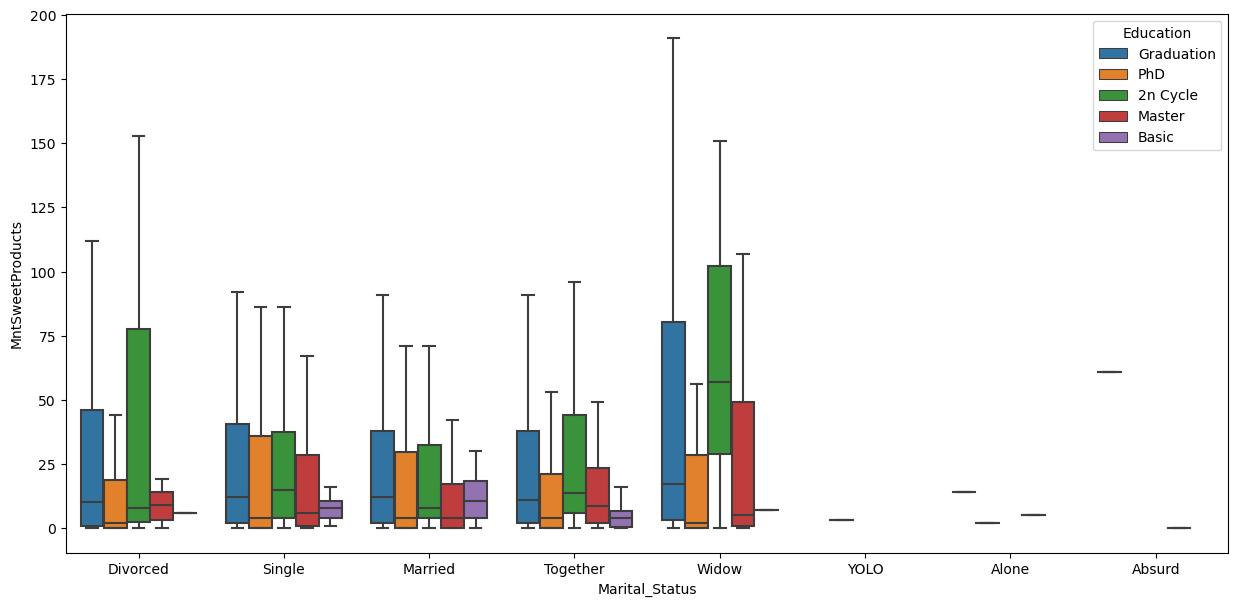

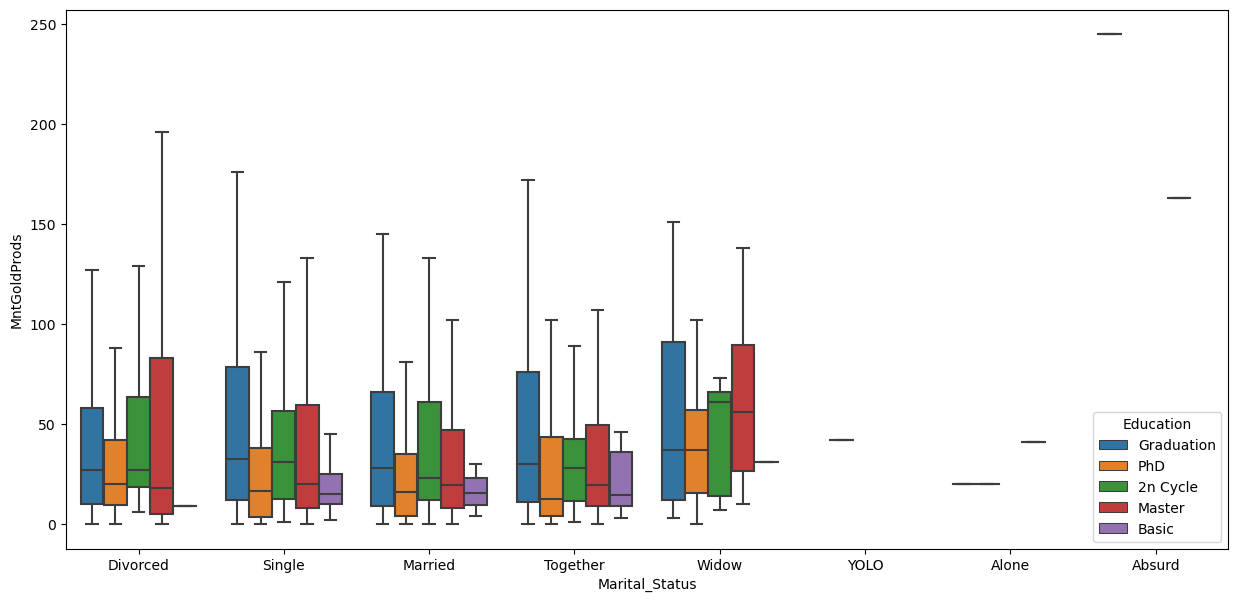

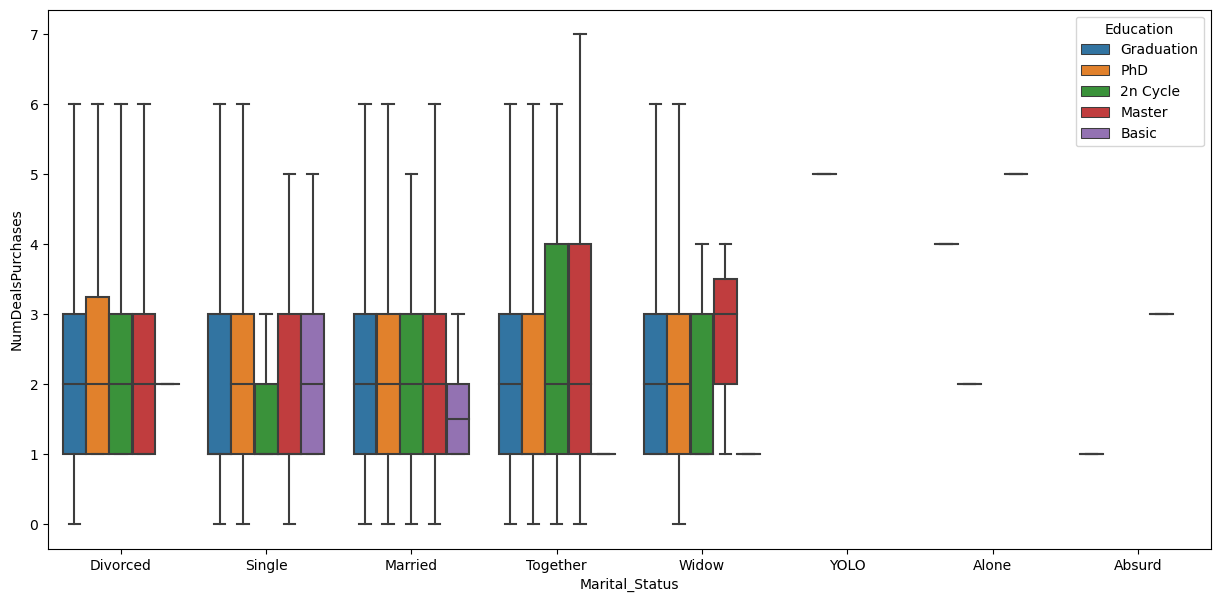

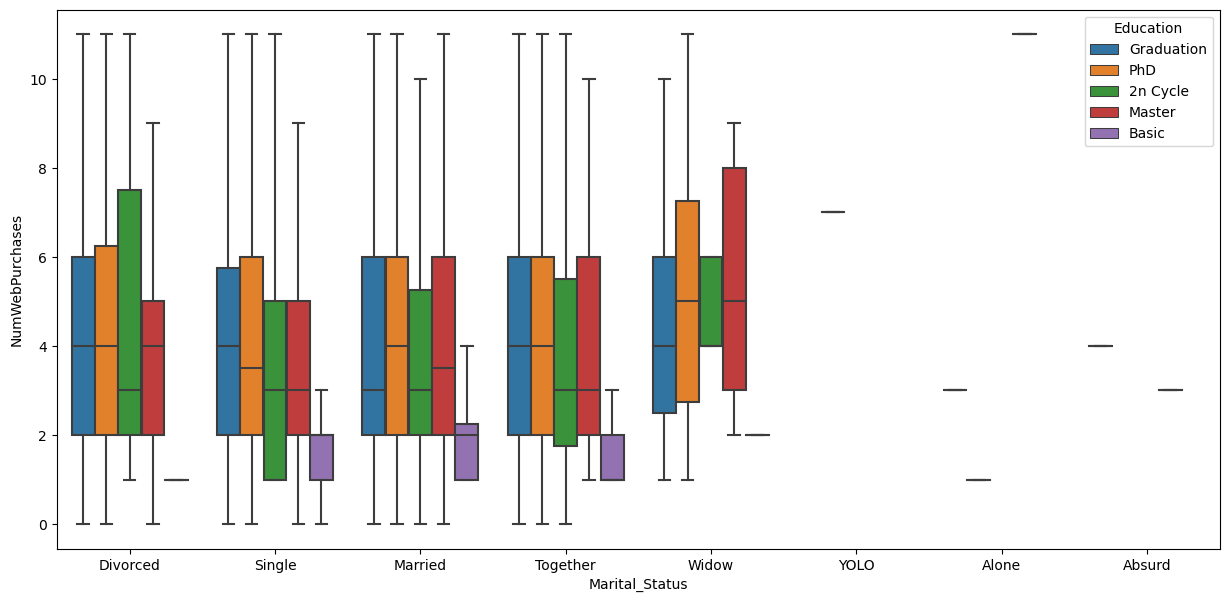

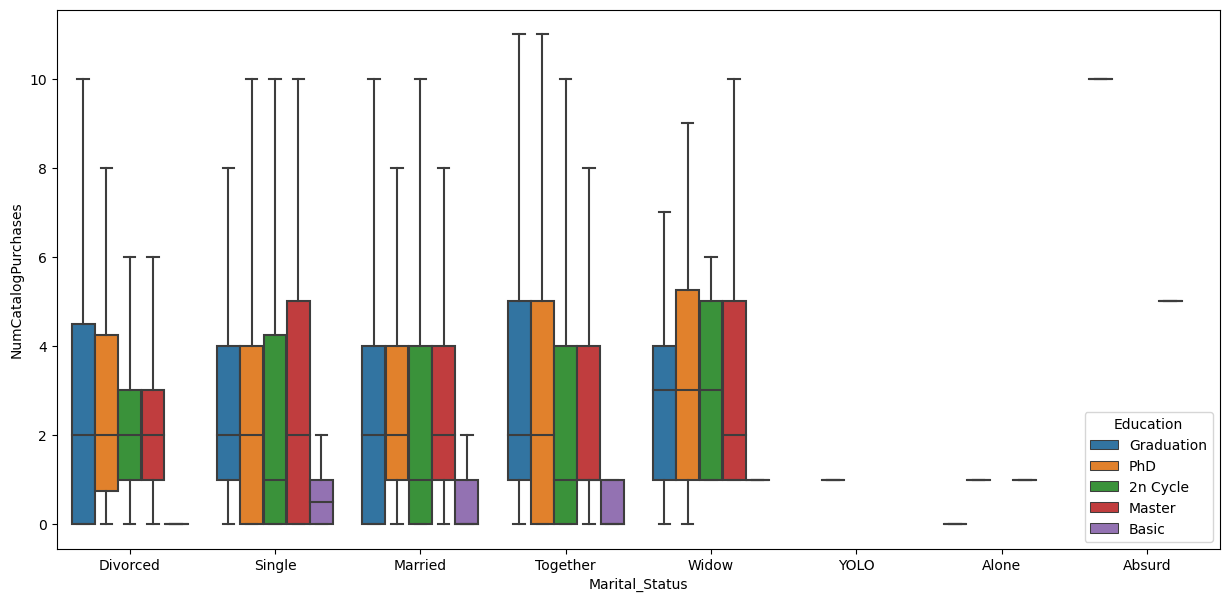

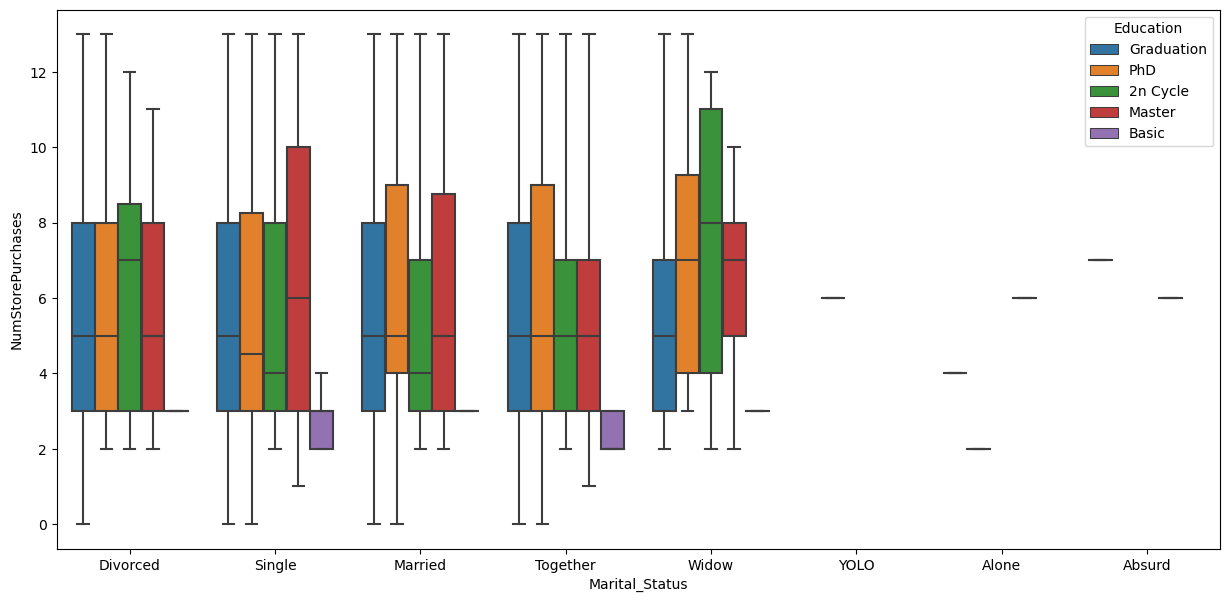

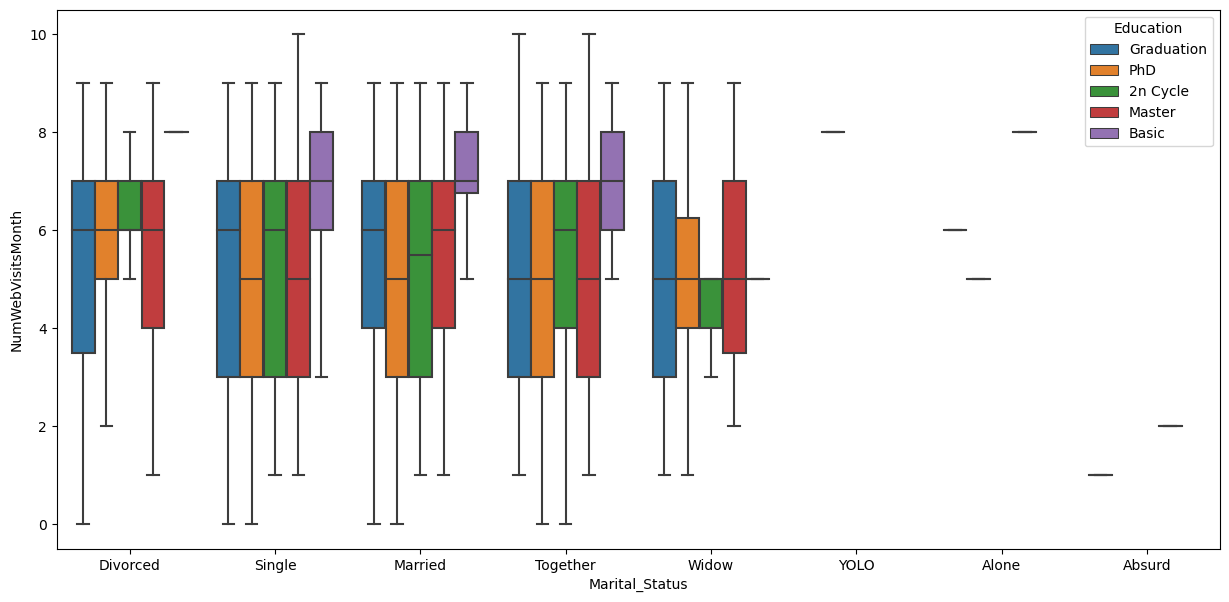

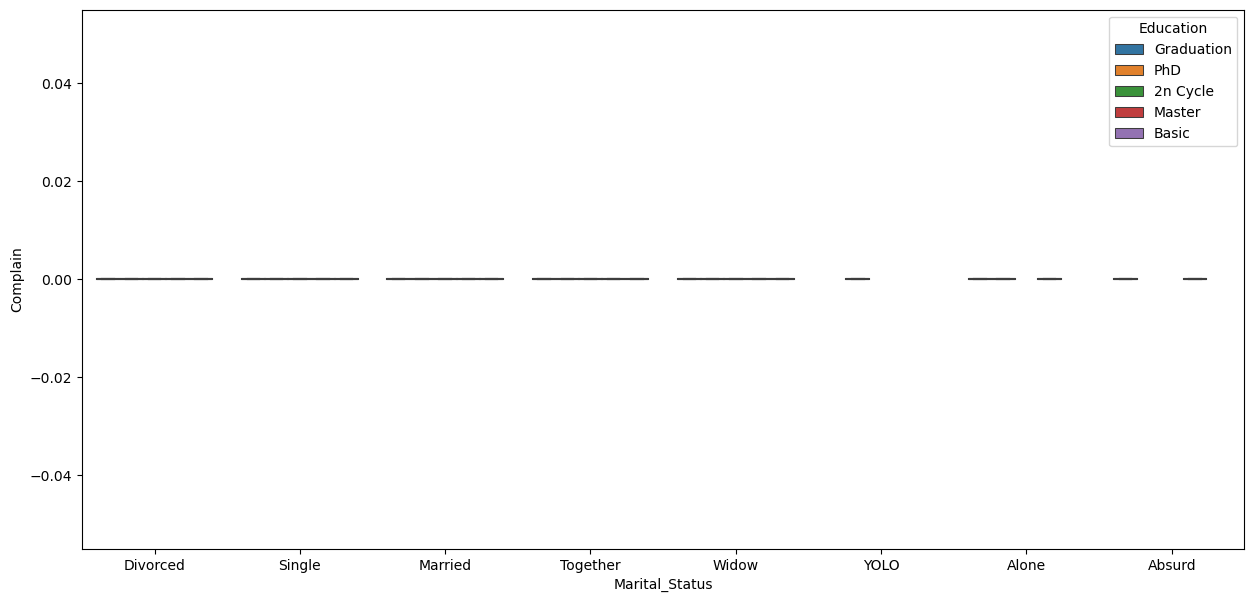

In [20]:
def box_plot_analysis(data,X,Y,Z):
    #size = (len(X) // 2 )+1
    #fig, axes = plt.subplots(size, 2, figsize=(10, 5* size))
    #axes = axes.flatten()
    for x1, y1, z1 in zip(X, Y, Z):
        plt.figure(figsize=(15, 7))
        ax =sns.boxplot(data=data, x=x1, y=y1, hue=z1,showfliers = False)
        ax.set_xlabel(x1)
        ax.set_ylabel(y1)
        plt.show()

Y = ["Kidhome","Teenhome","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Response",'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain']
X = ["Marital_Status"]*len(Y )
Z = ["Education"]*len(Y)
        
box_plot_analysis(df,X,Y,Z)    

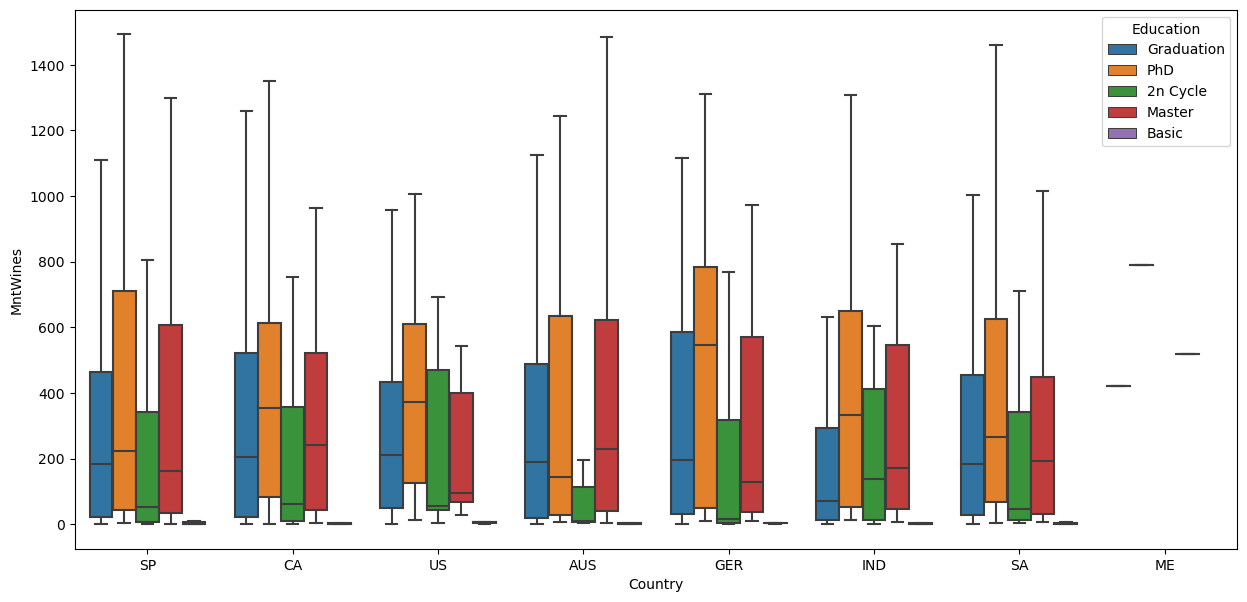

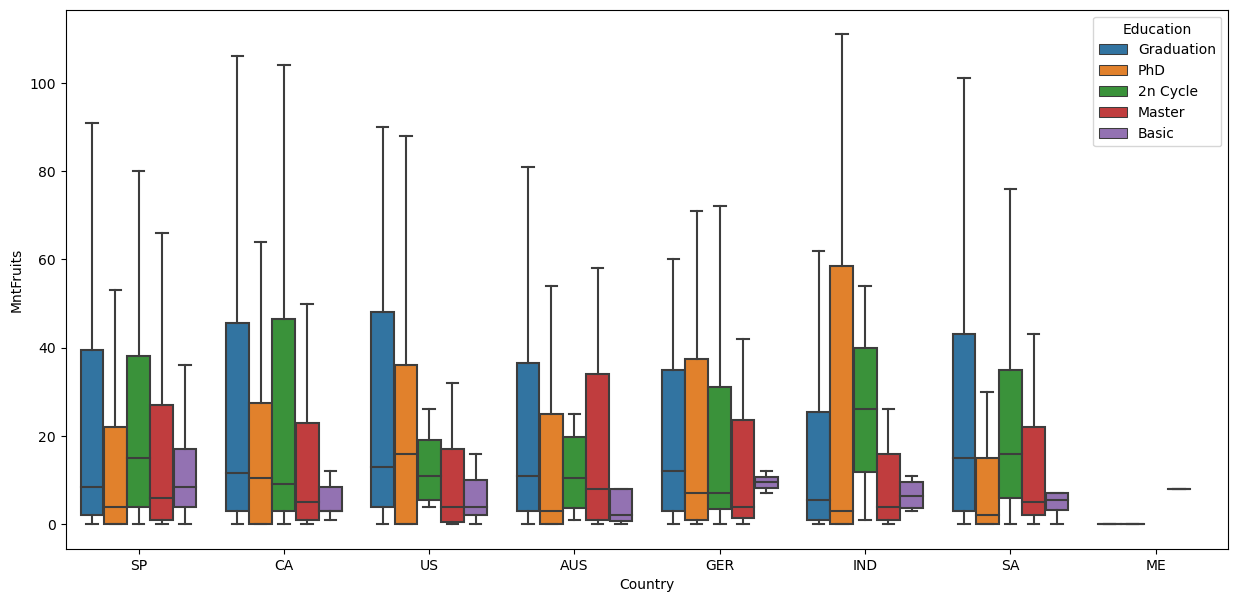

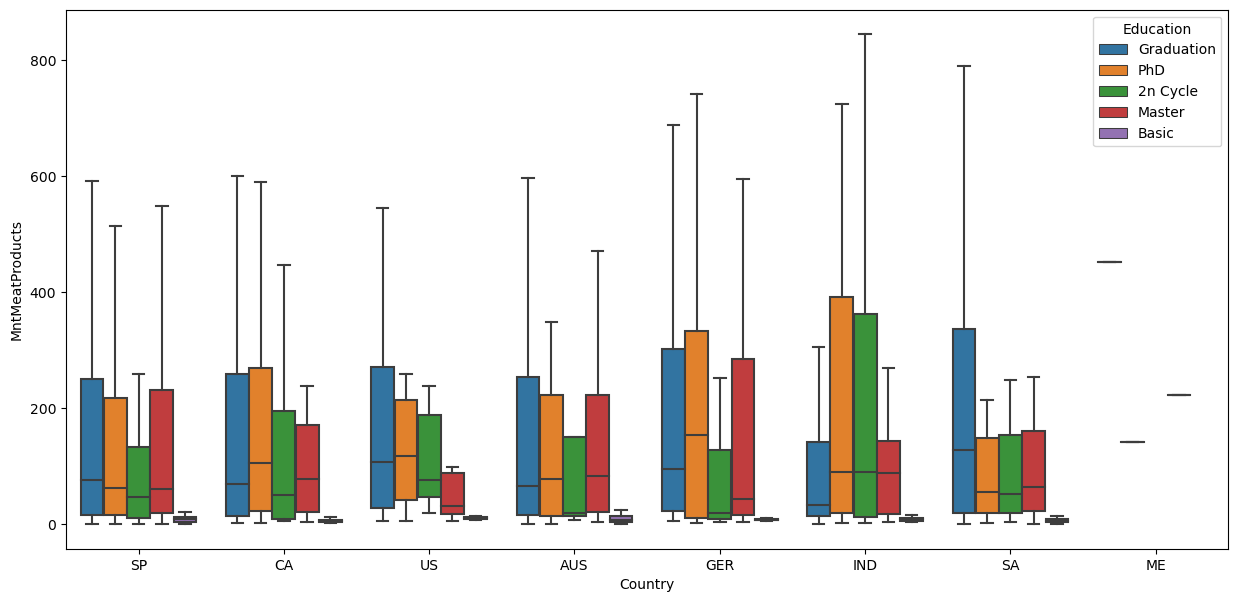

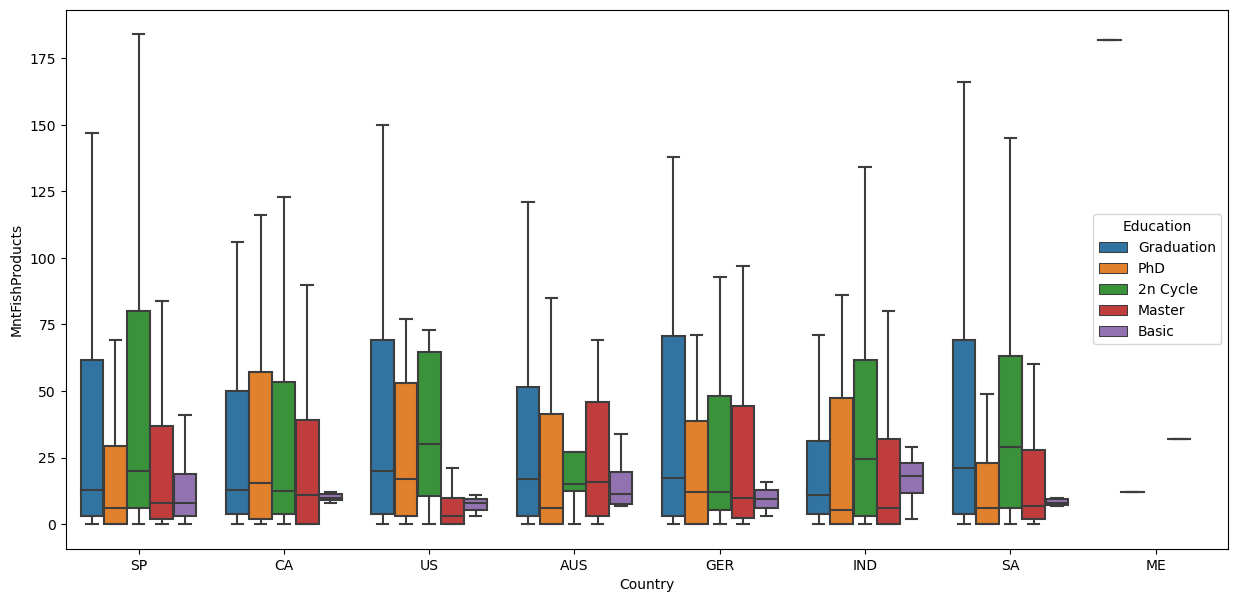

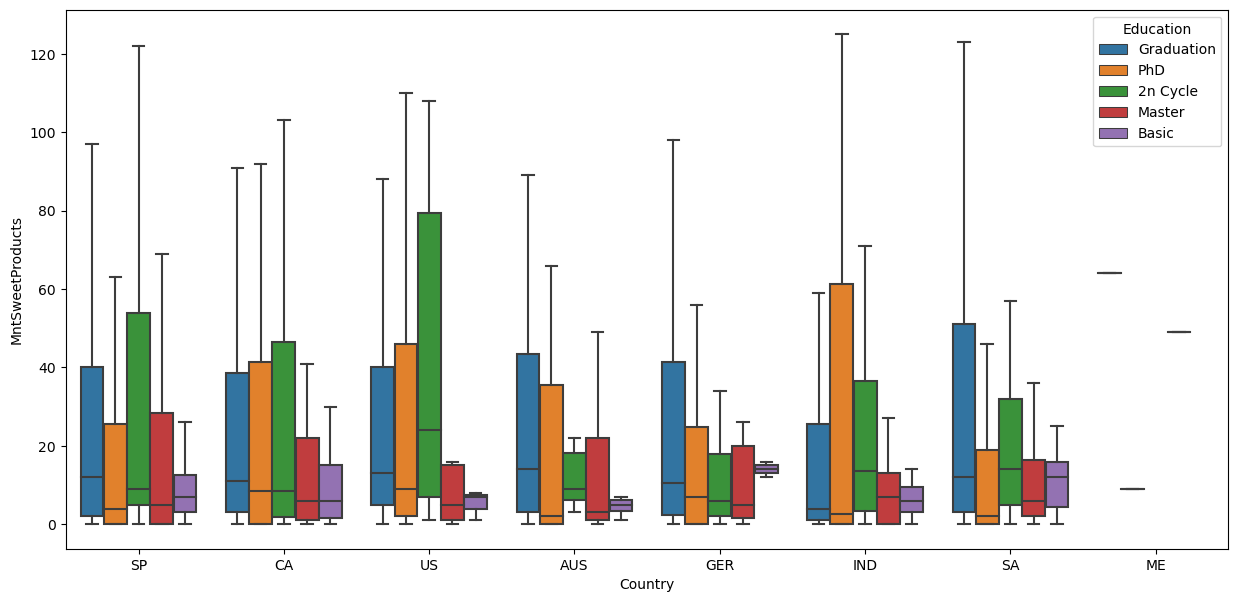

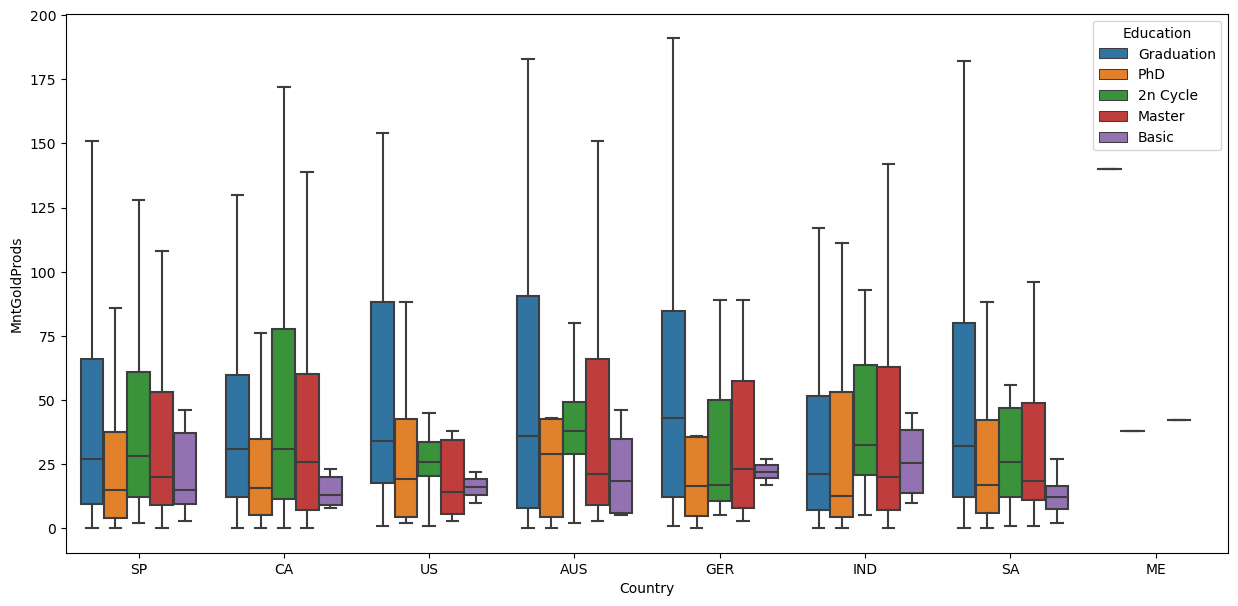

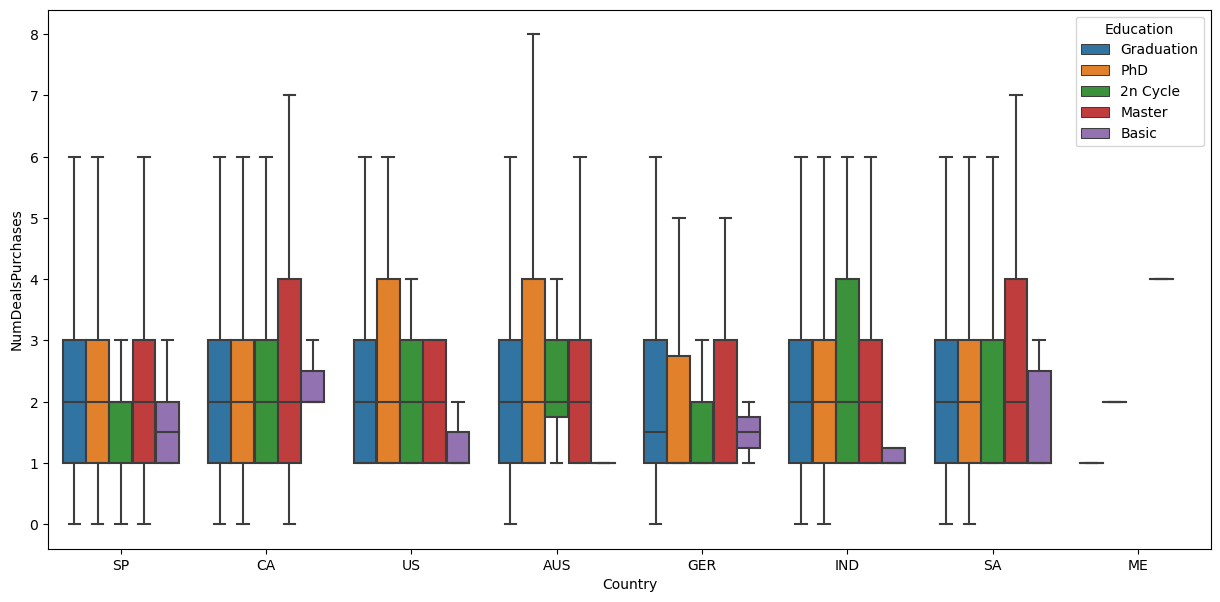

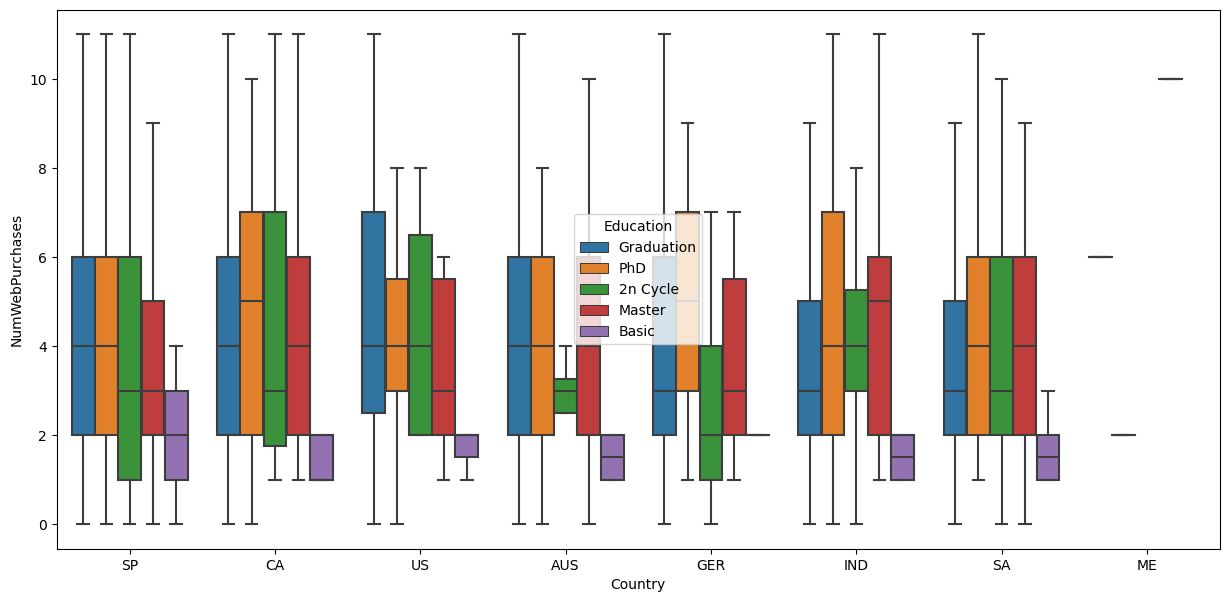

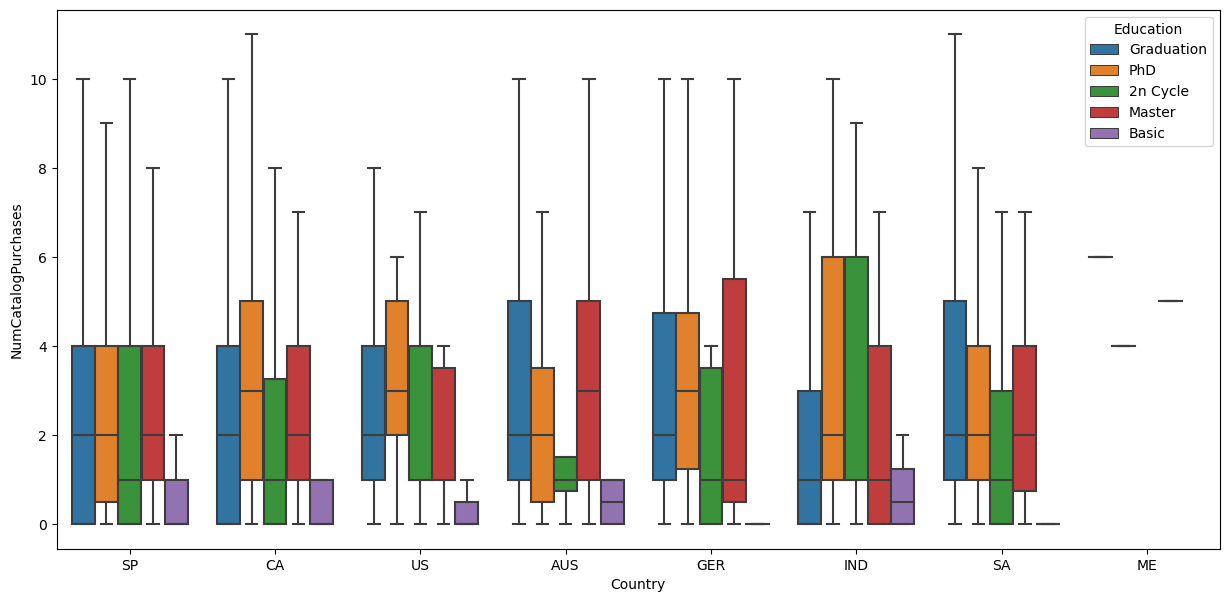

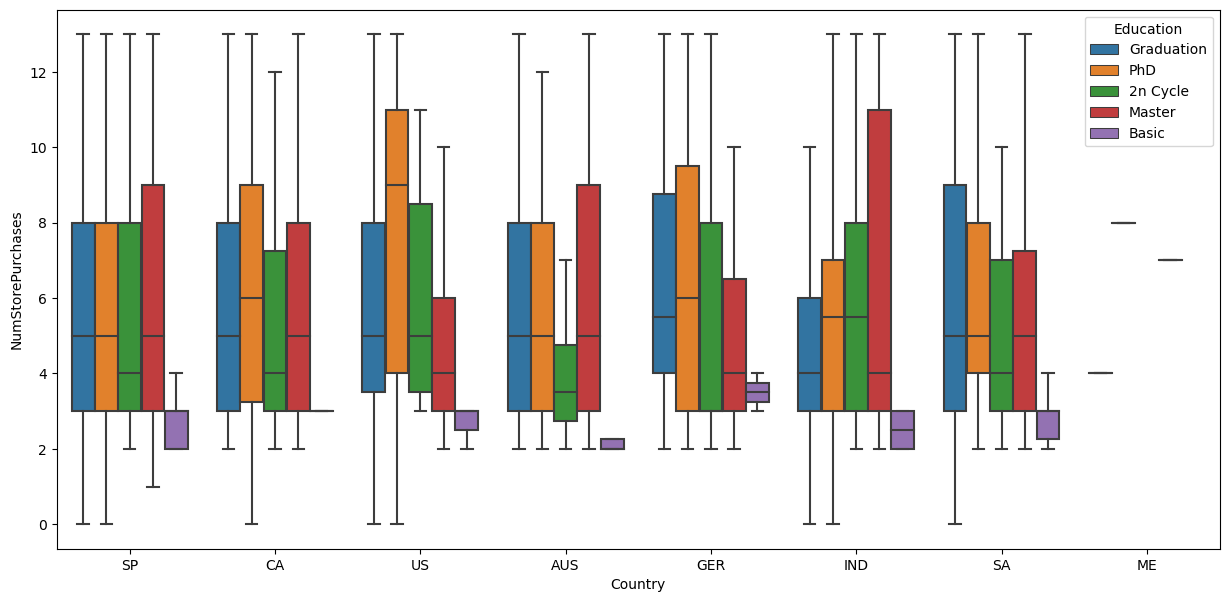

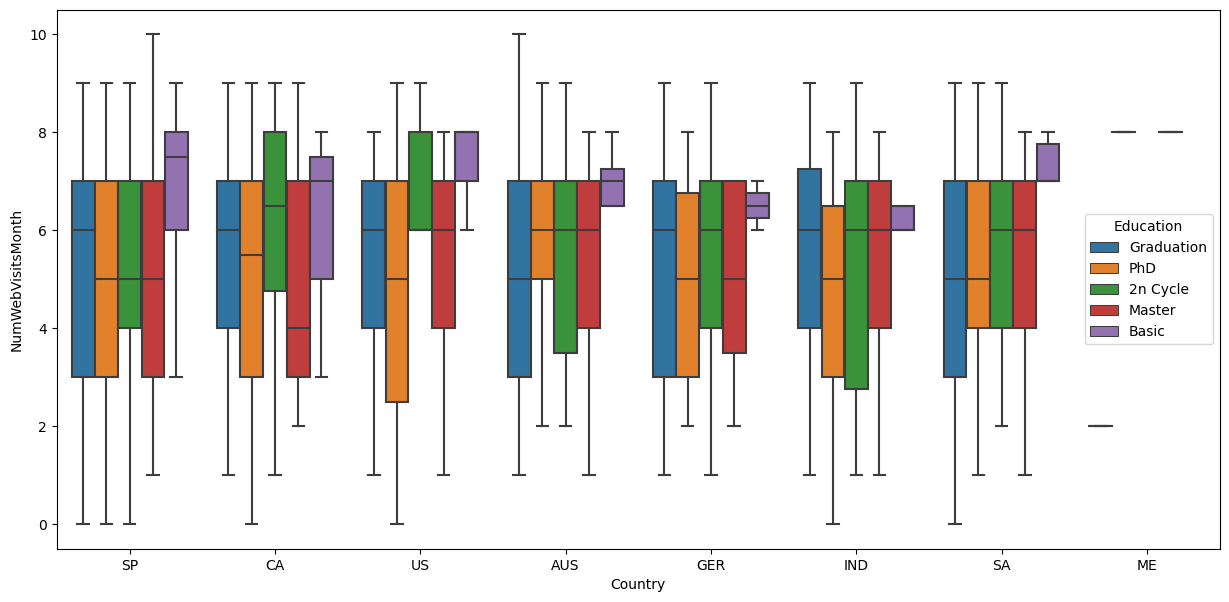

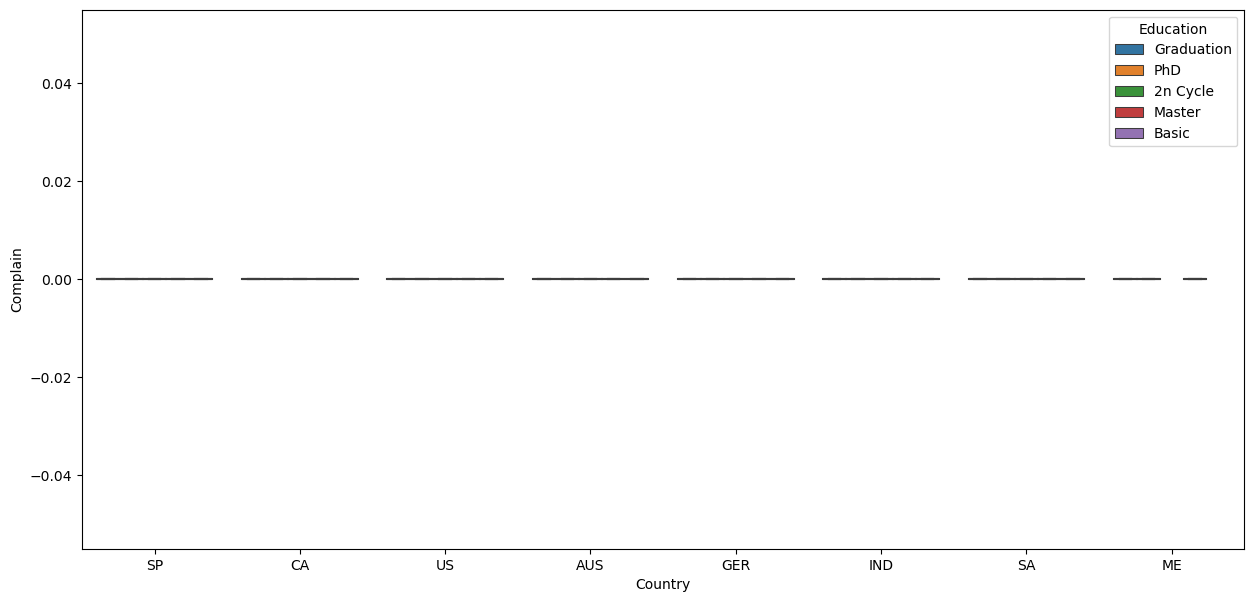

In [21]:
Y = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain']
X = ["Country"]*len(Y )
Z = ["Education"]*len(Y)
        
box_plot_analysis(df,X,Y,Z) 

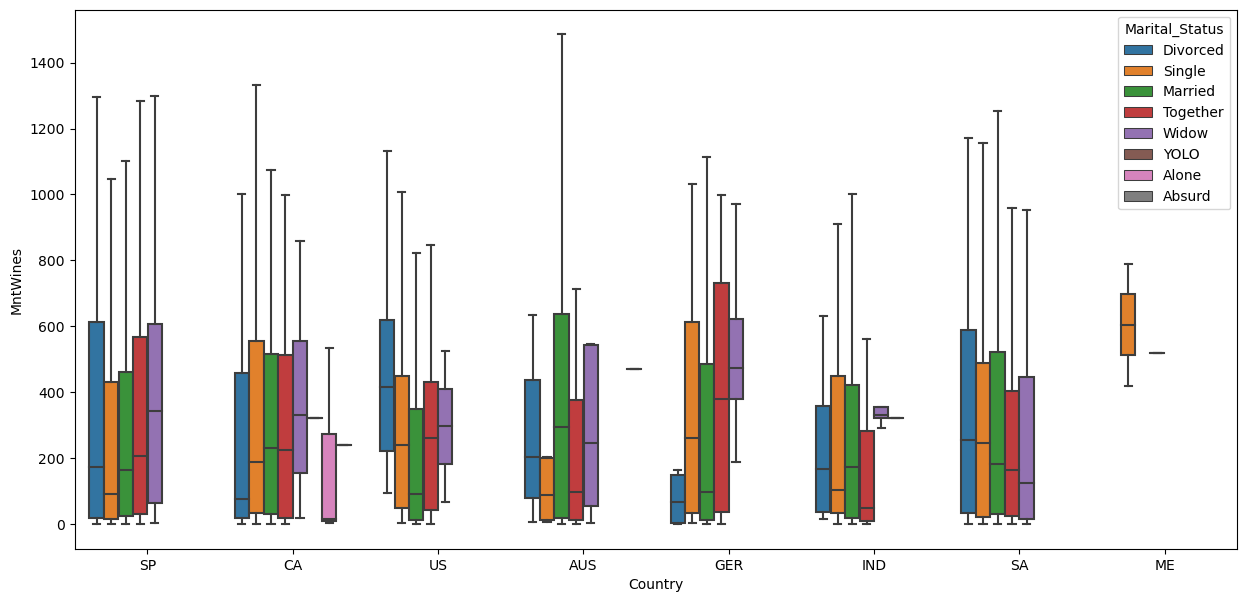

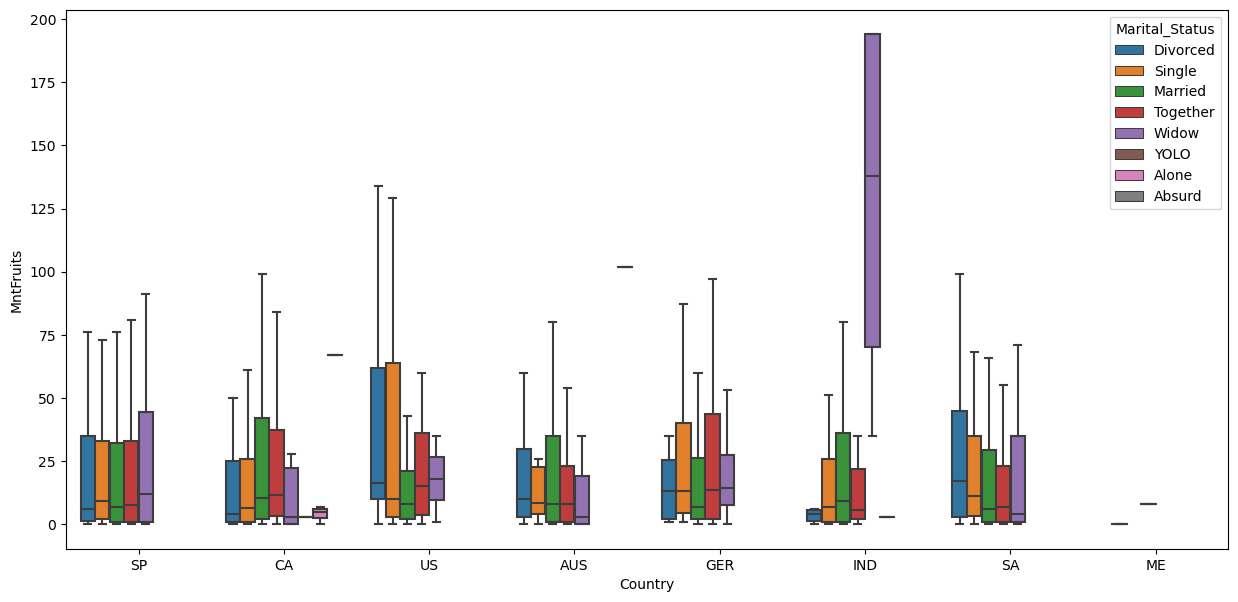

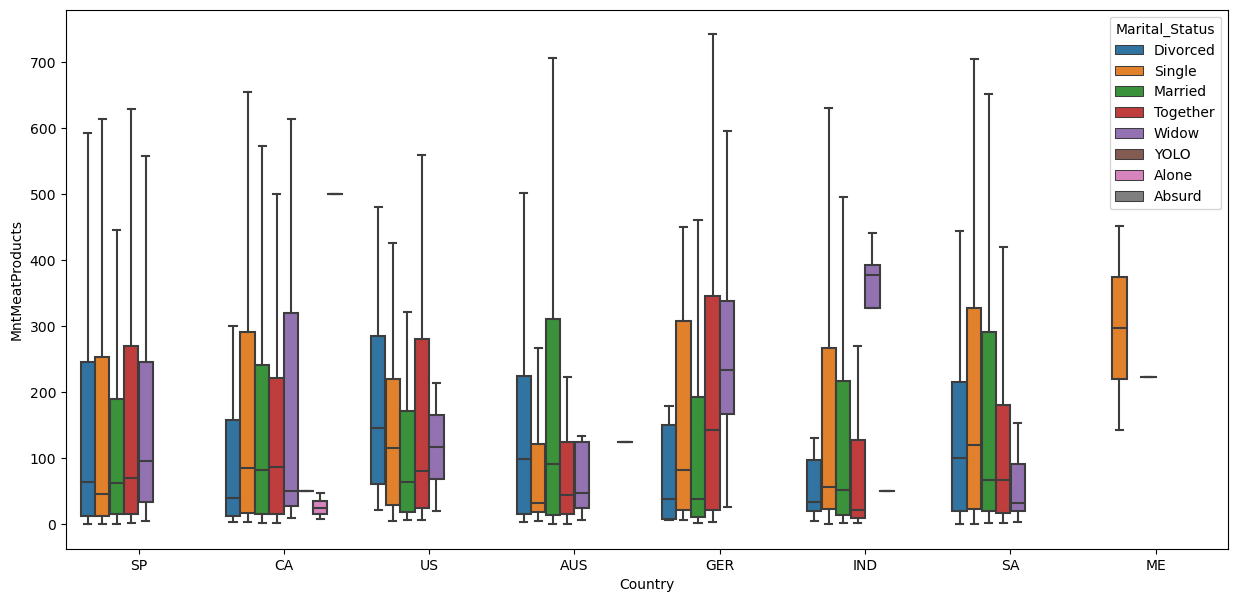

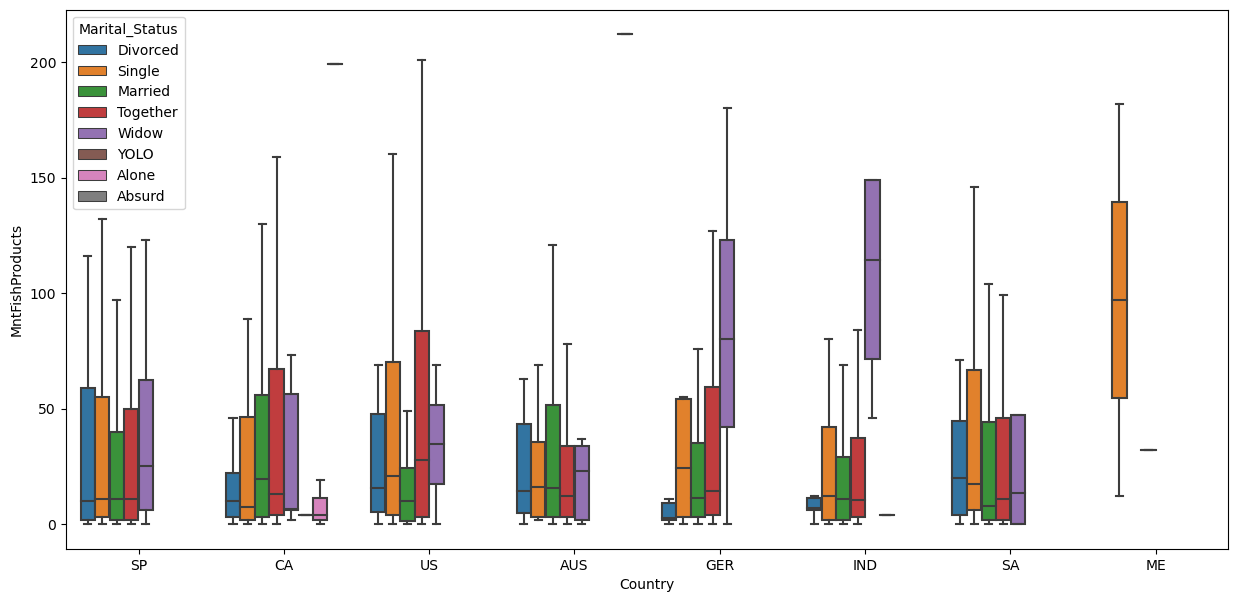

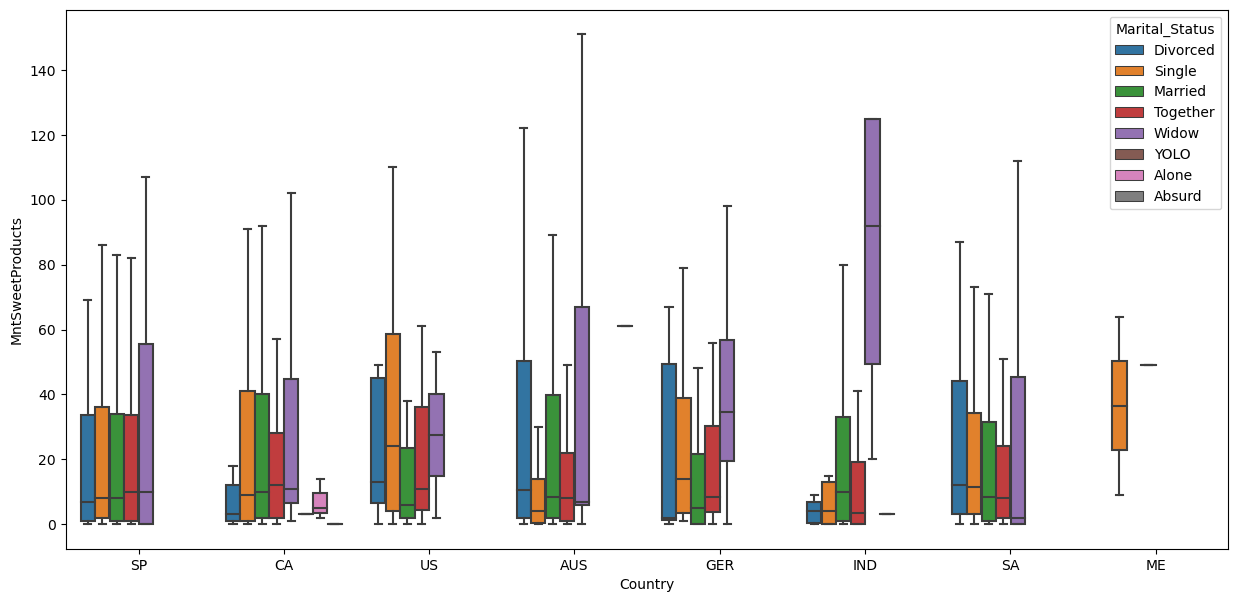

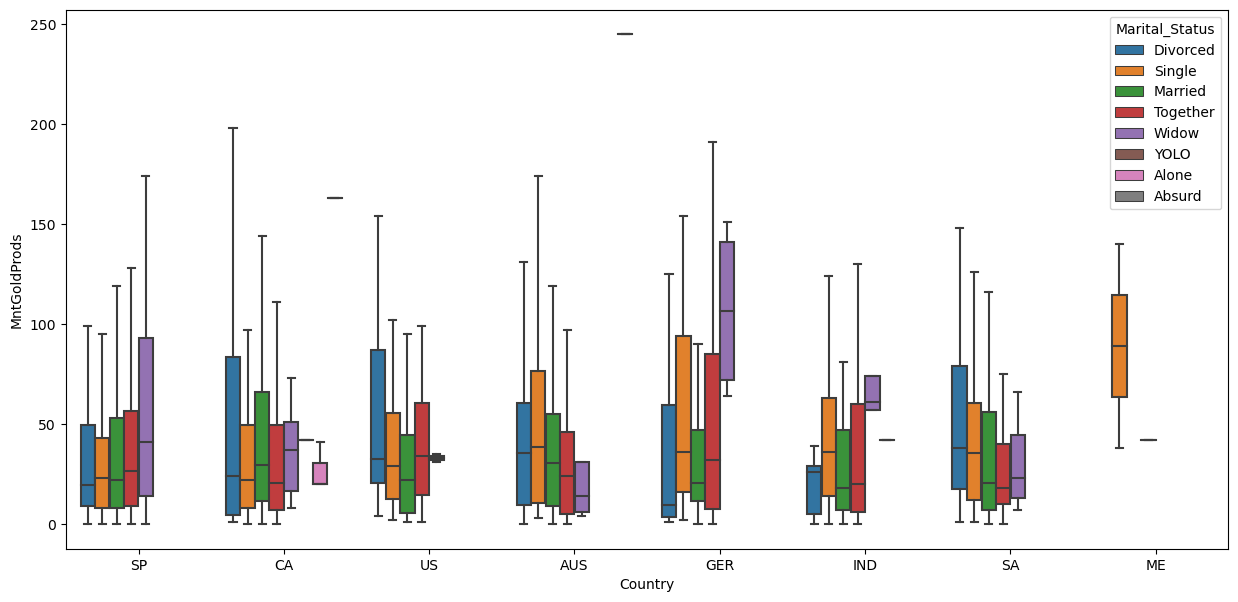

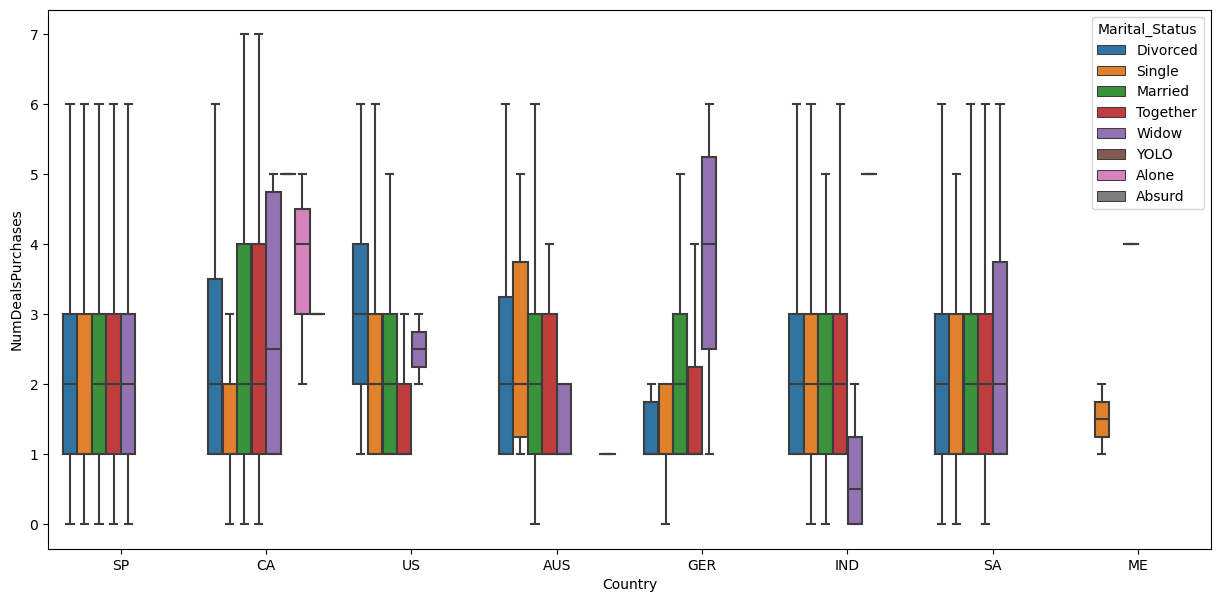

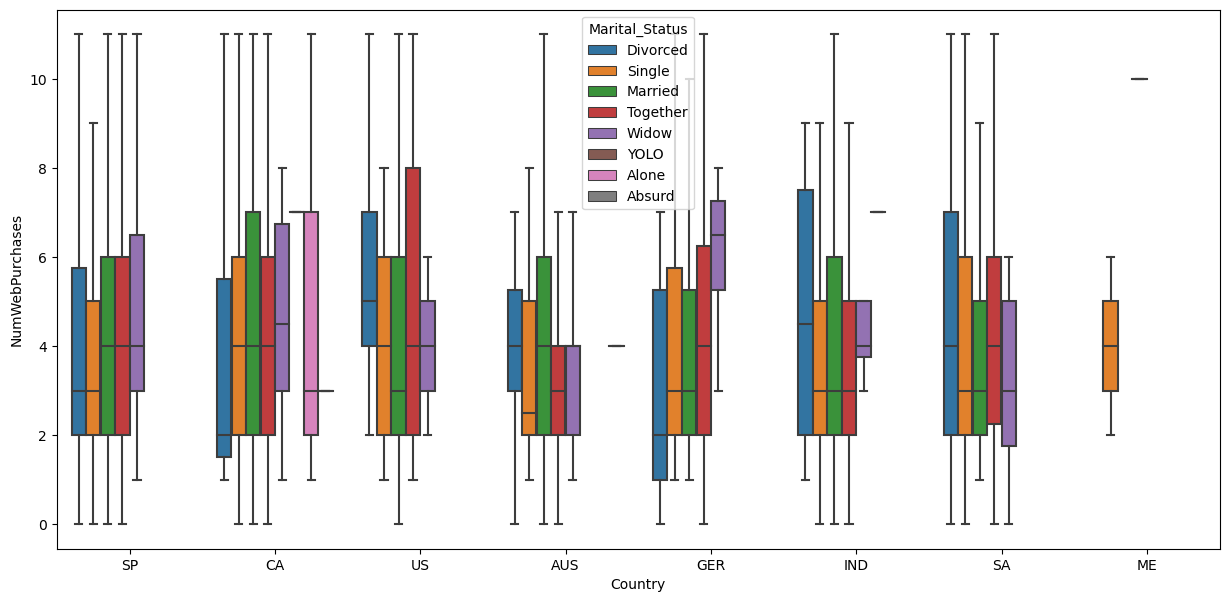

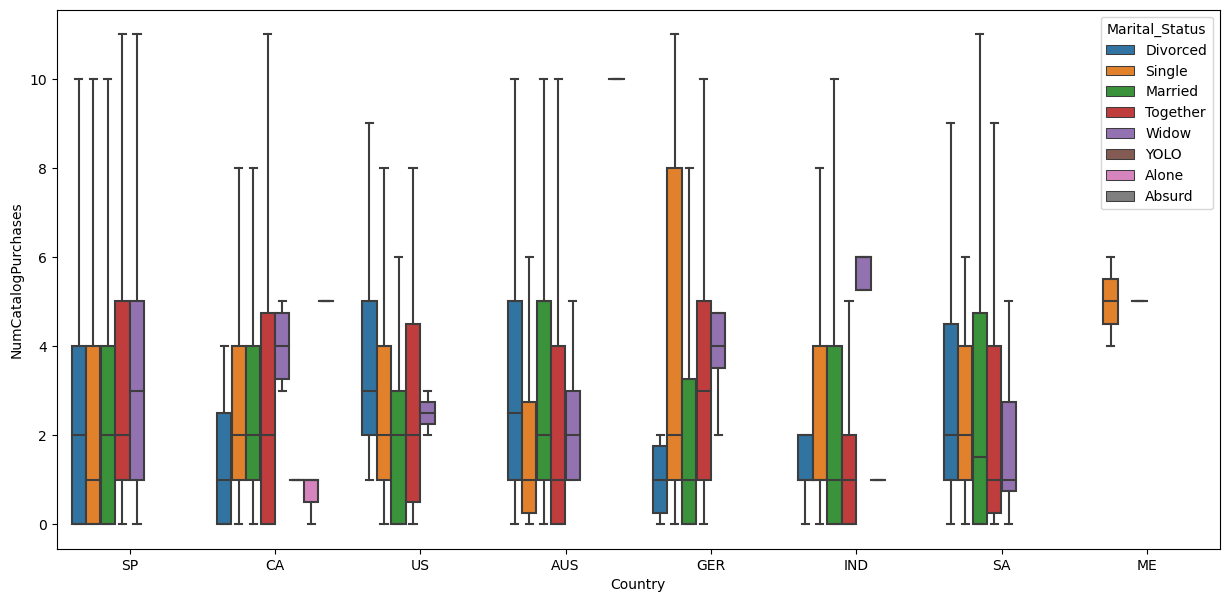

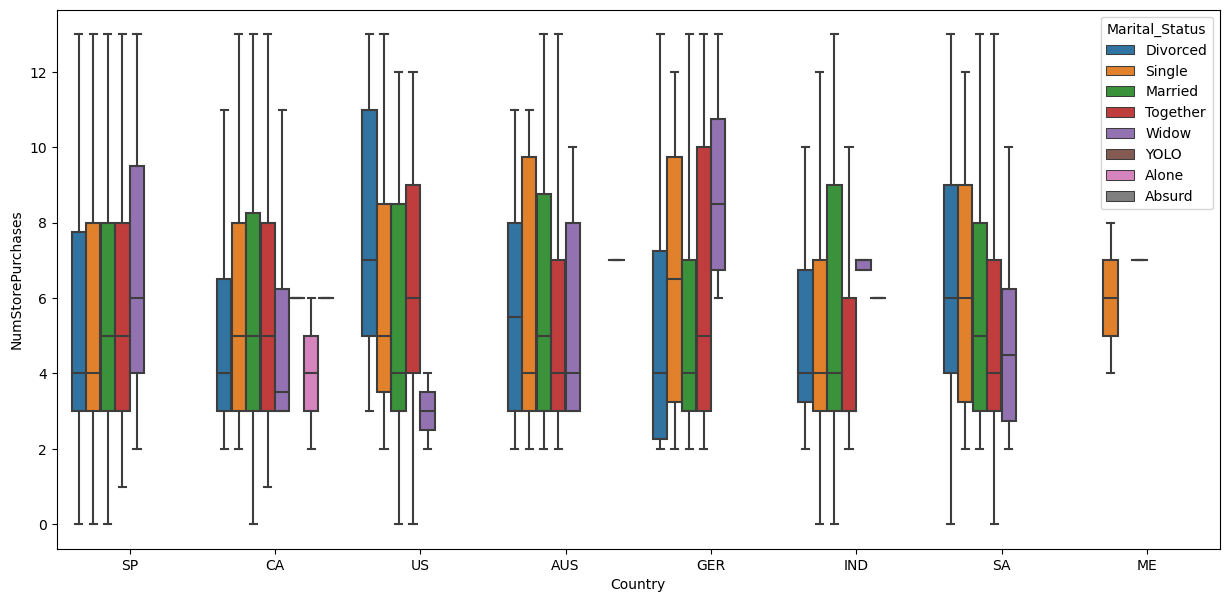

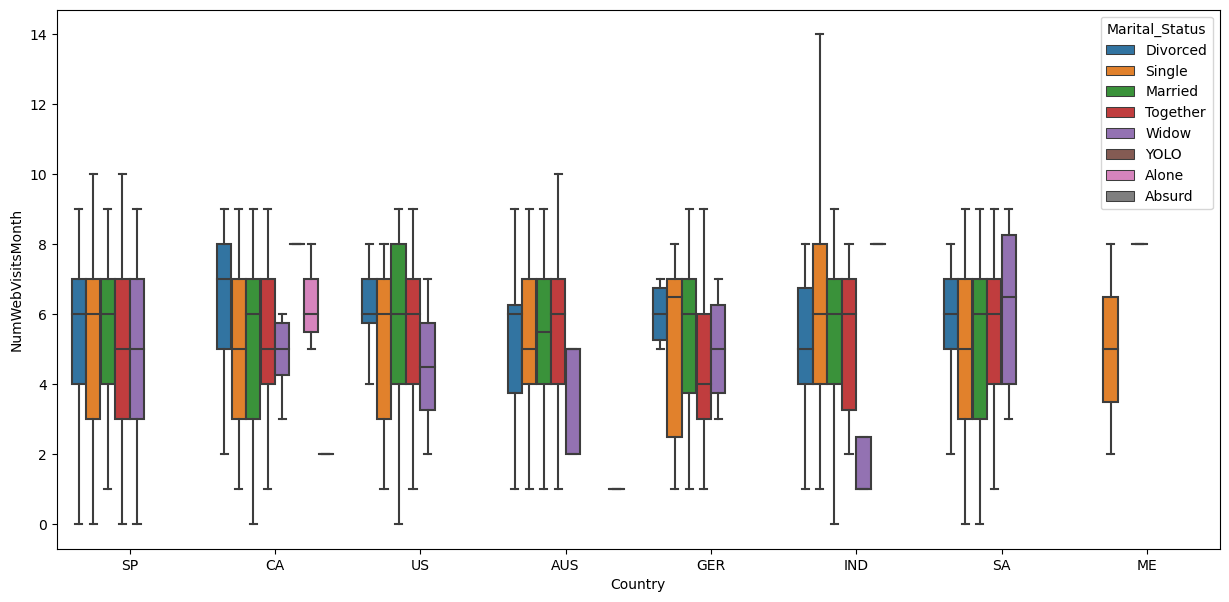

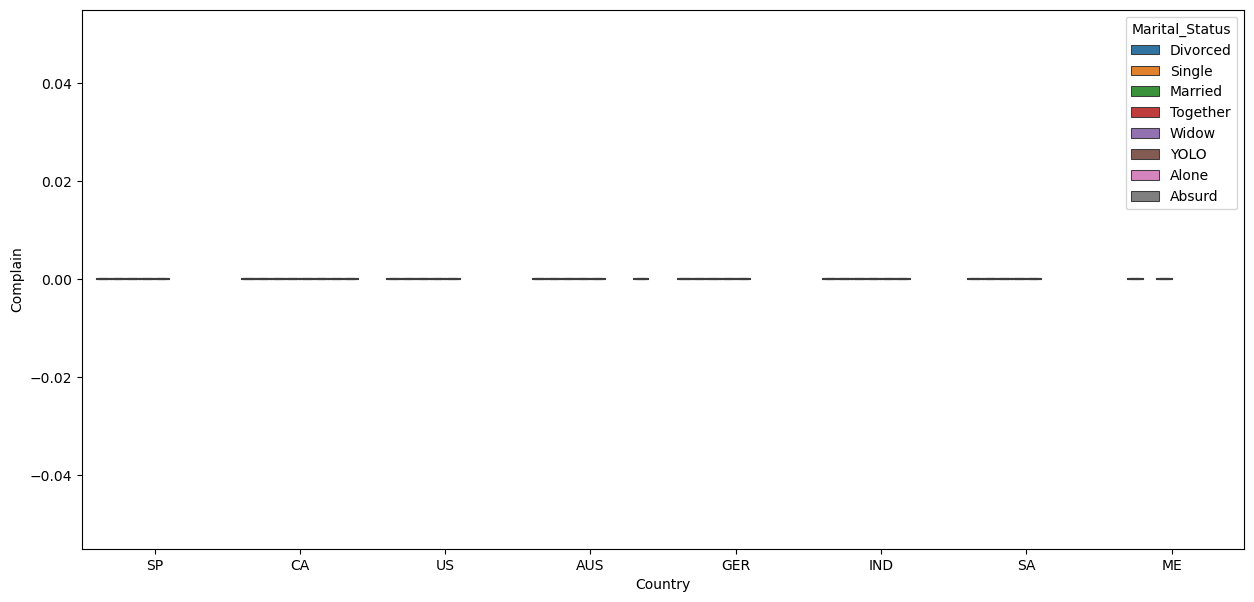

In [22]:
Y = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain']
X = ["Country"]*len(Y )
Z = ["Marital_Status"]*len(Y)
        
box_plot_analysis(df,X,Y,Z) 

<Figure size 1000x800 with 0 Axes>

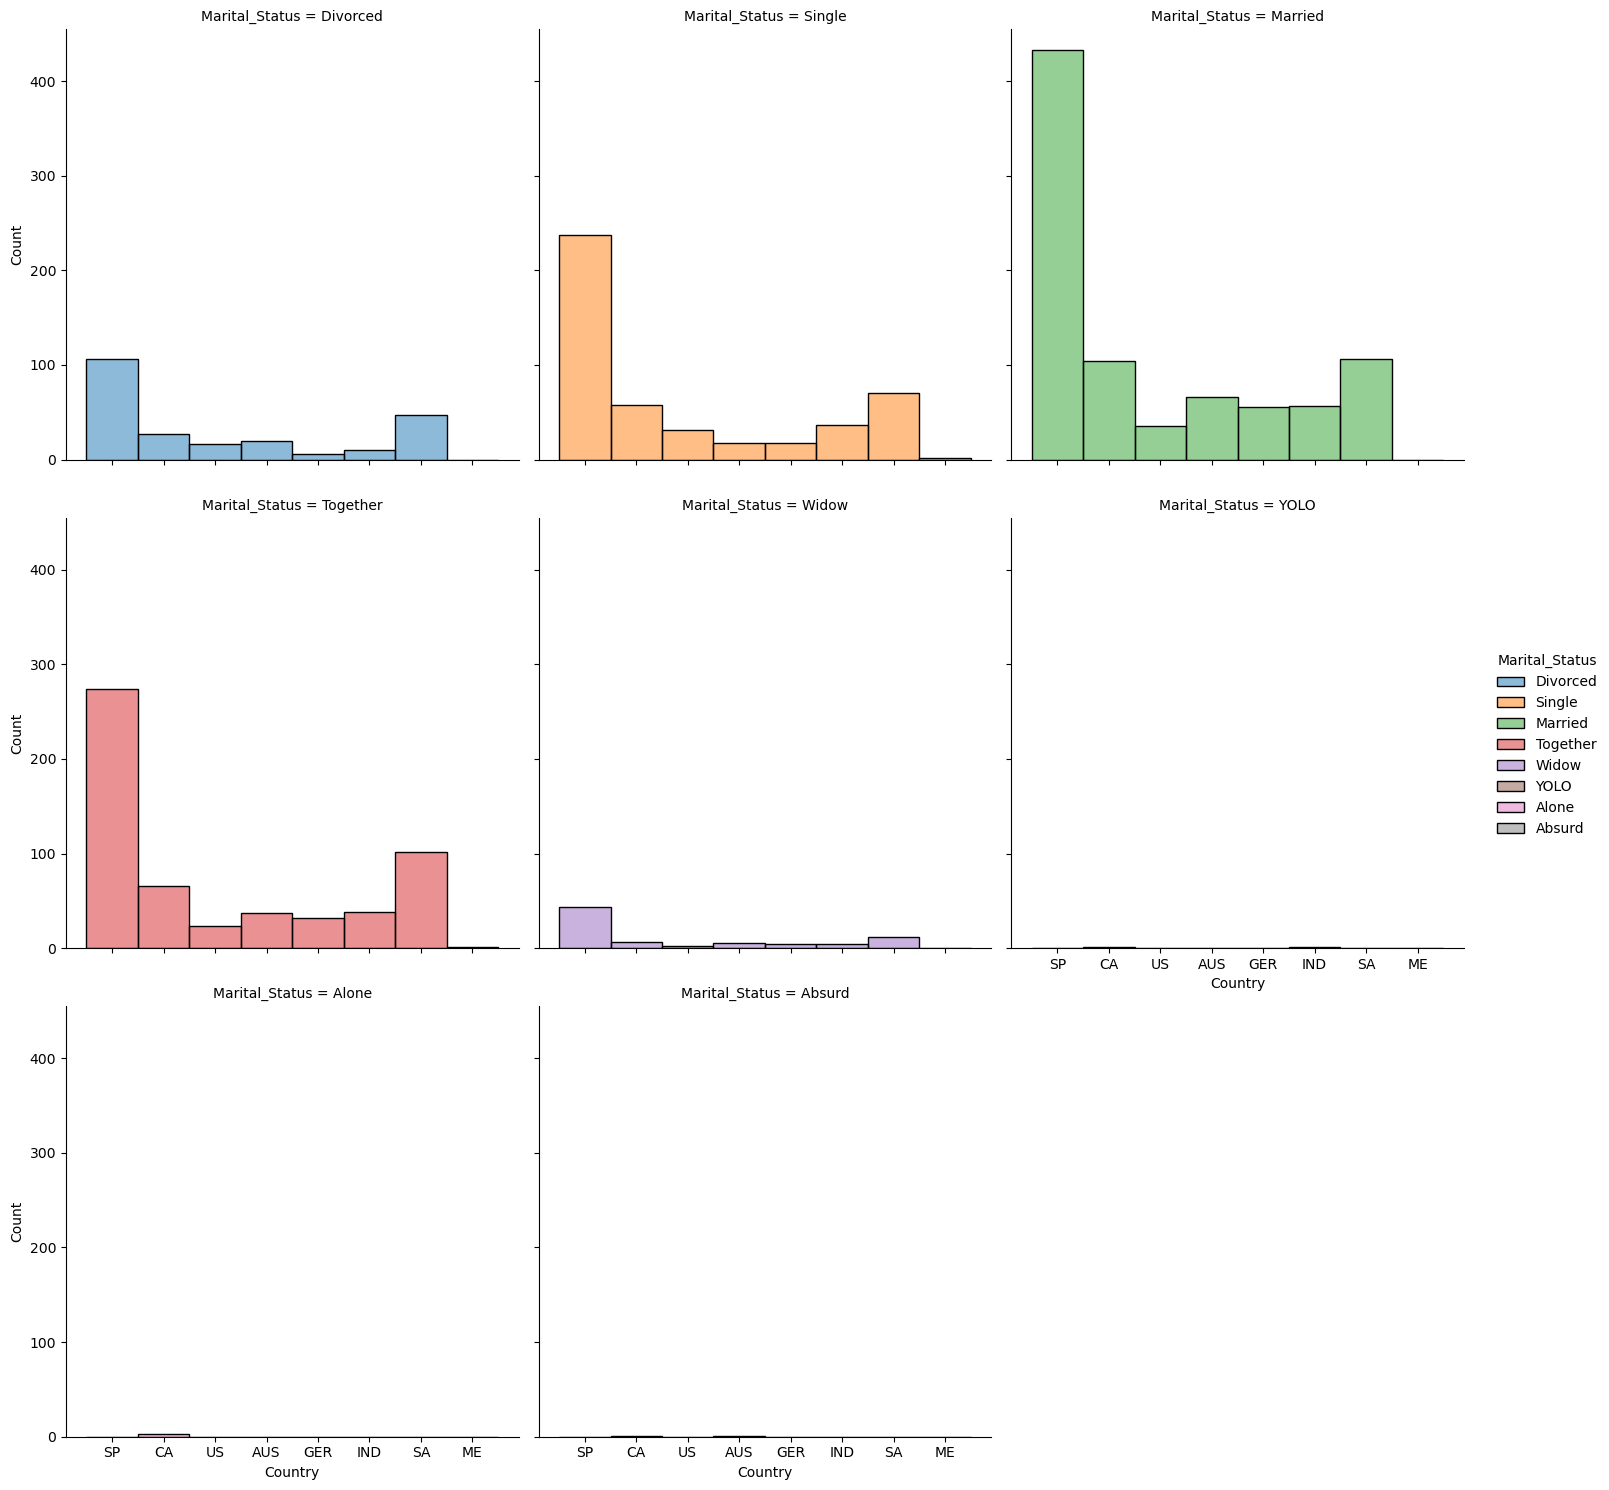

In [23]:
plt.figure(figsize=(10,8))
ax = sns.displot(data=df, x="Country", hue="Marital_Status", col="Marital_Status",col_wrap=3)
plt.show()

<Figure size 2500x2500 with 0 Axes>

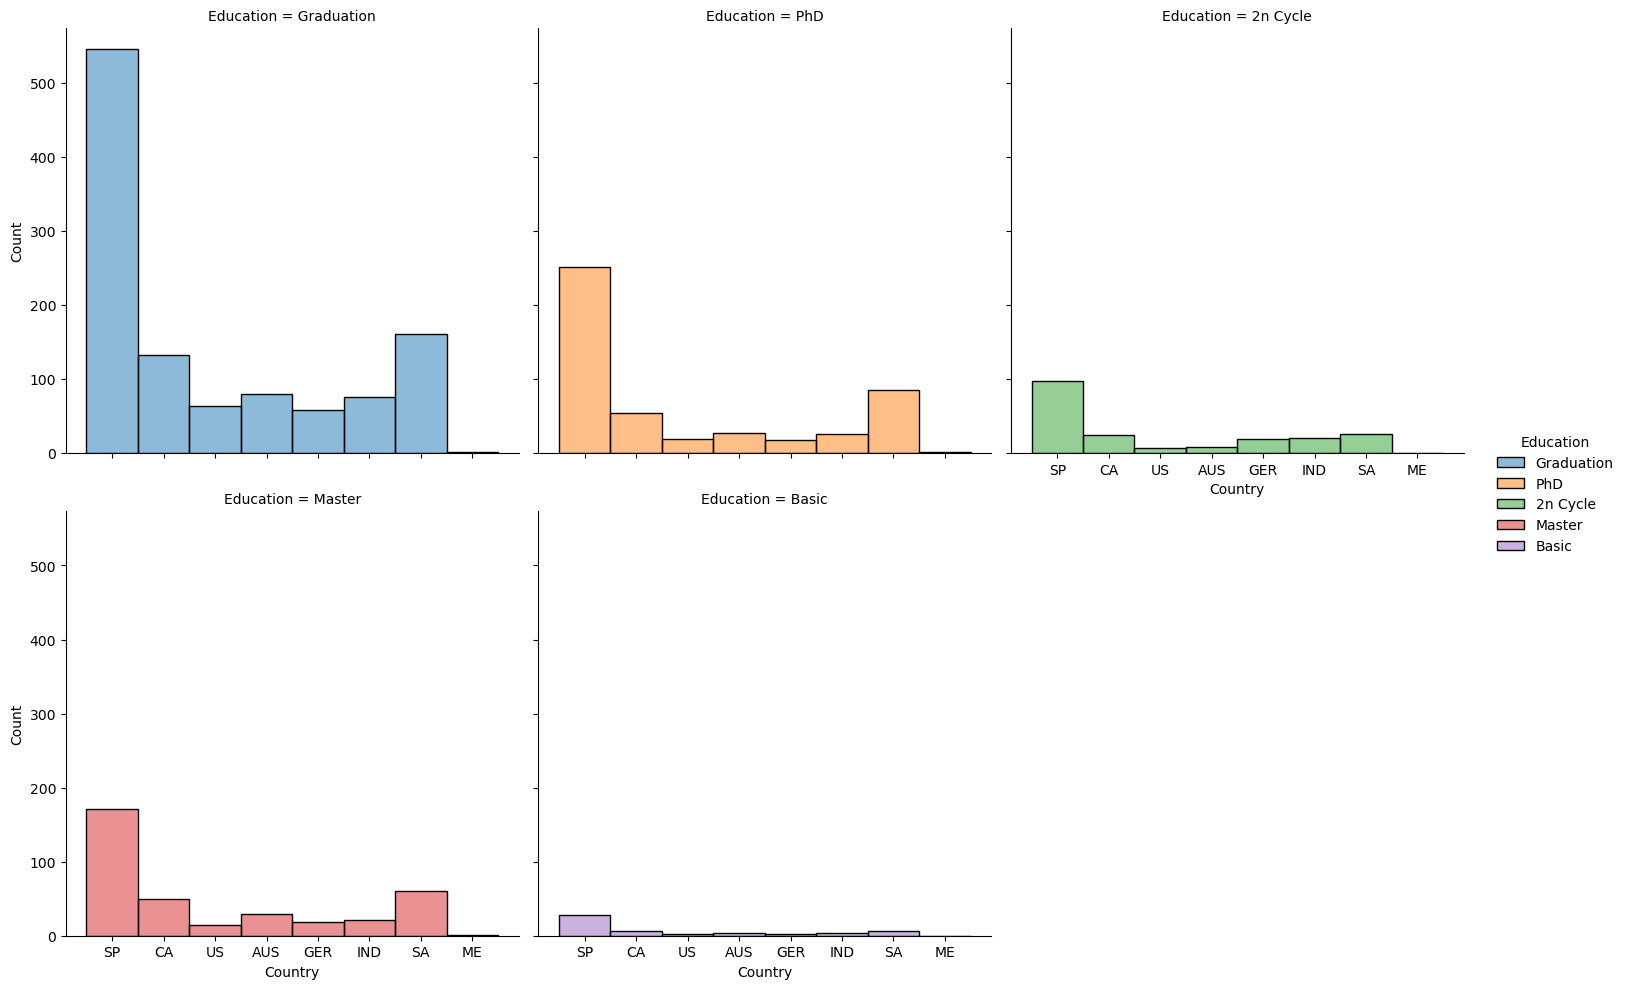

In [24]:
plt.figure(figsize=(25,25))
ax = sns.displot(data=df, x="Country", hue="Education", col="Education",col_wrap=3)
plt.show()

In [25]:
s = "h"
a =  f"Data Distribution {s} in each {s}"
a

'Data Distribution h in each h'

<Figure size 1400x1200 with 0 Axes>

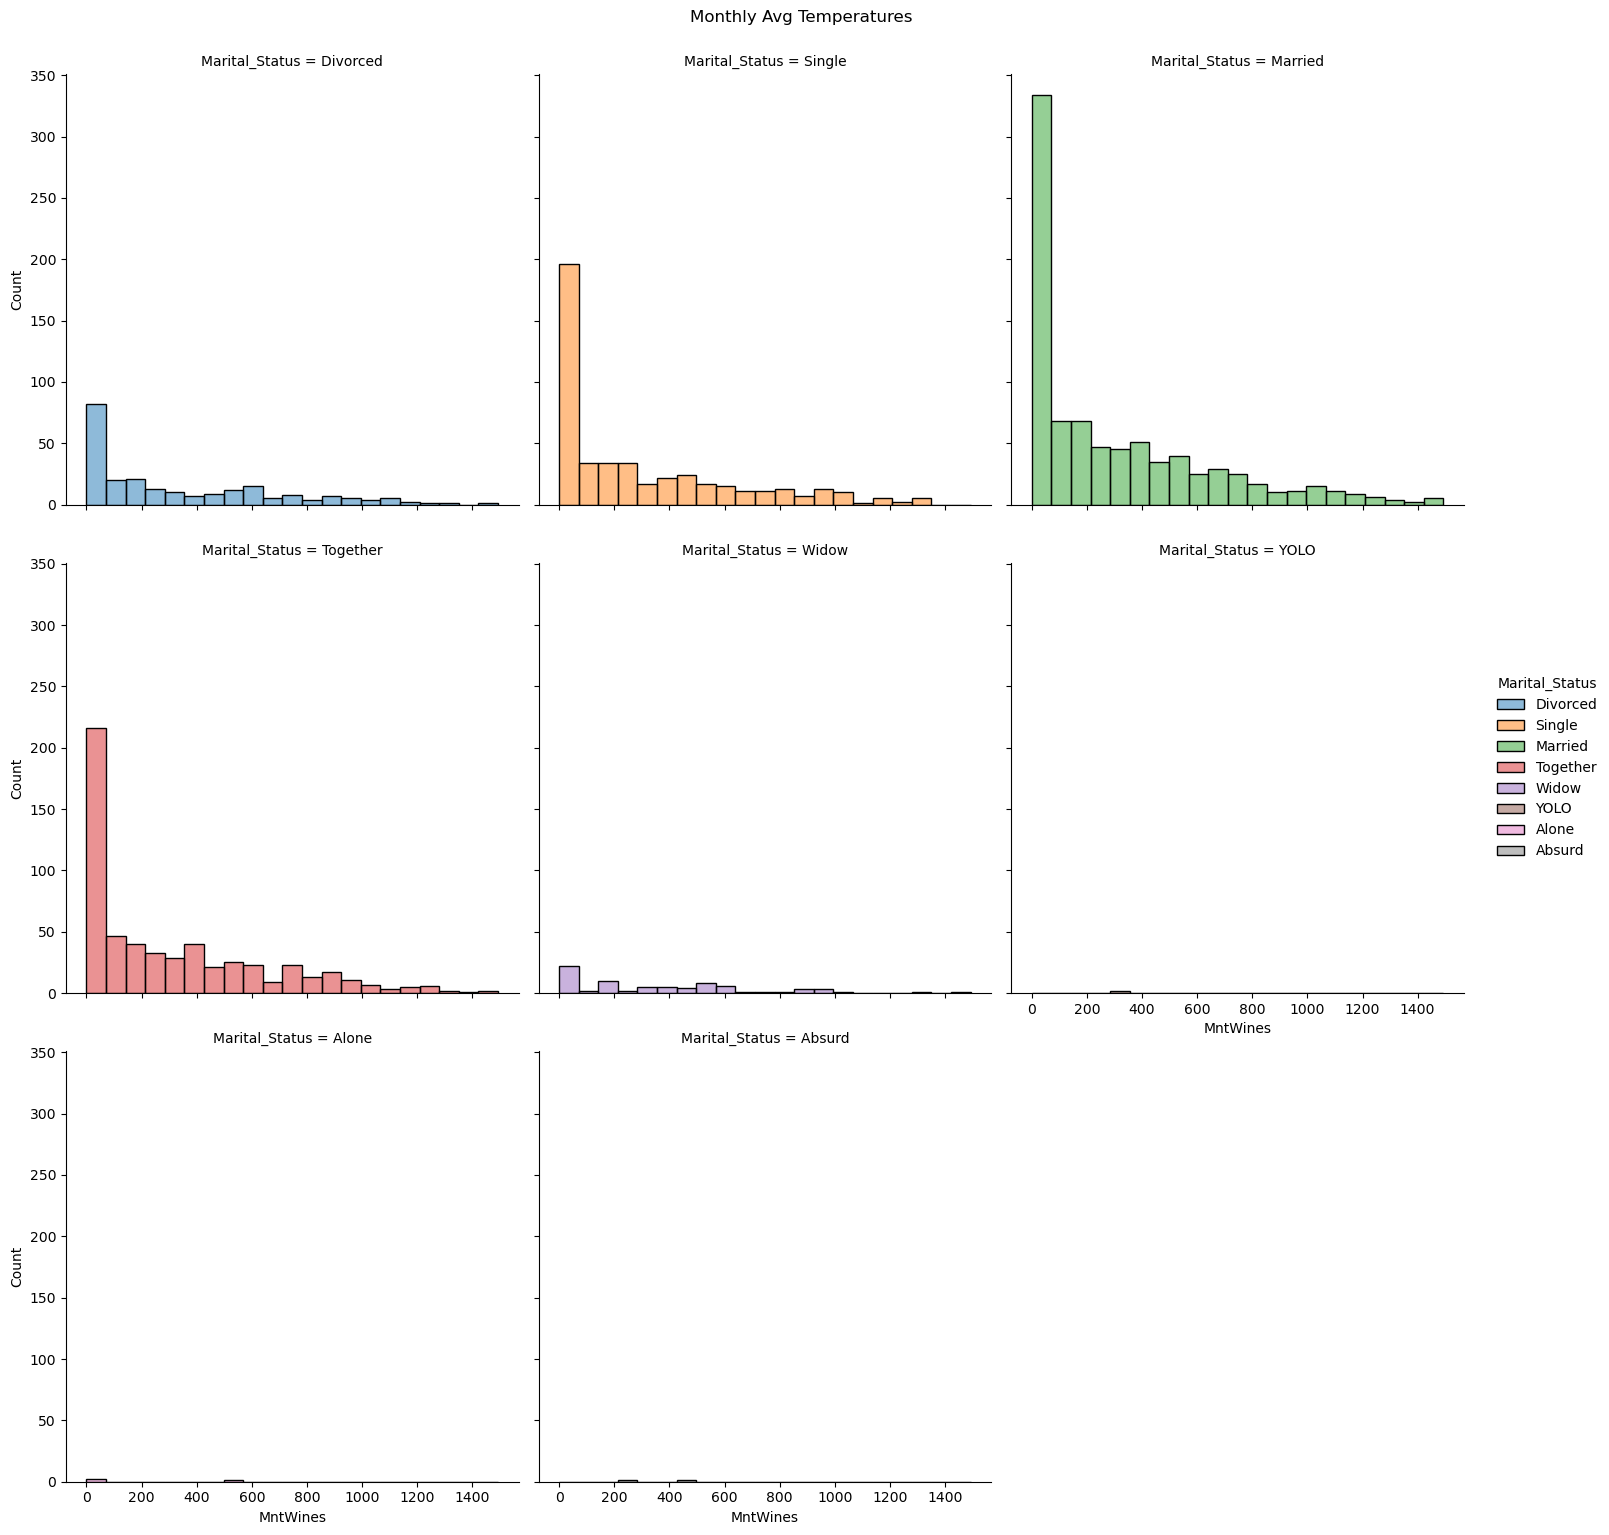

In [26]:
plt.figure(figsize=(14,12 ))
ax = sns.displot(data=df, x="MntWines", hue="Marital_Status", col="Marital_Status",col_wrap=3)
ax.fig.suptitle('Monthly Avg Temperatures',y=1.02) 
plt.show()

<Figure size 1400x1200 with 0 Axes>

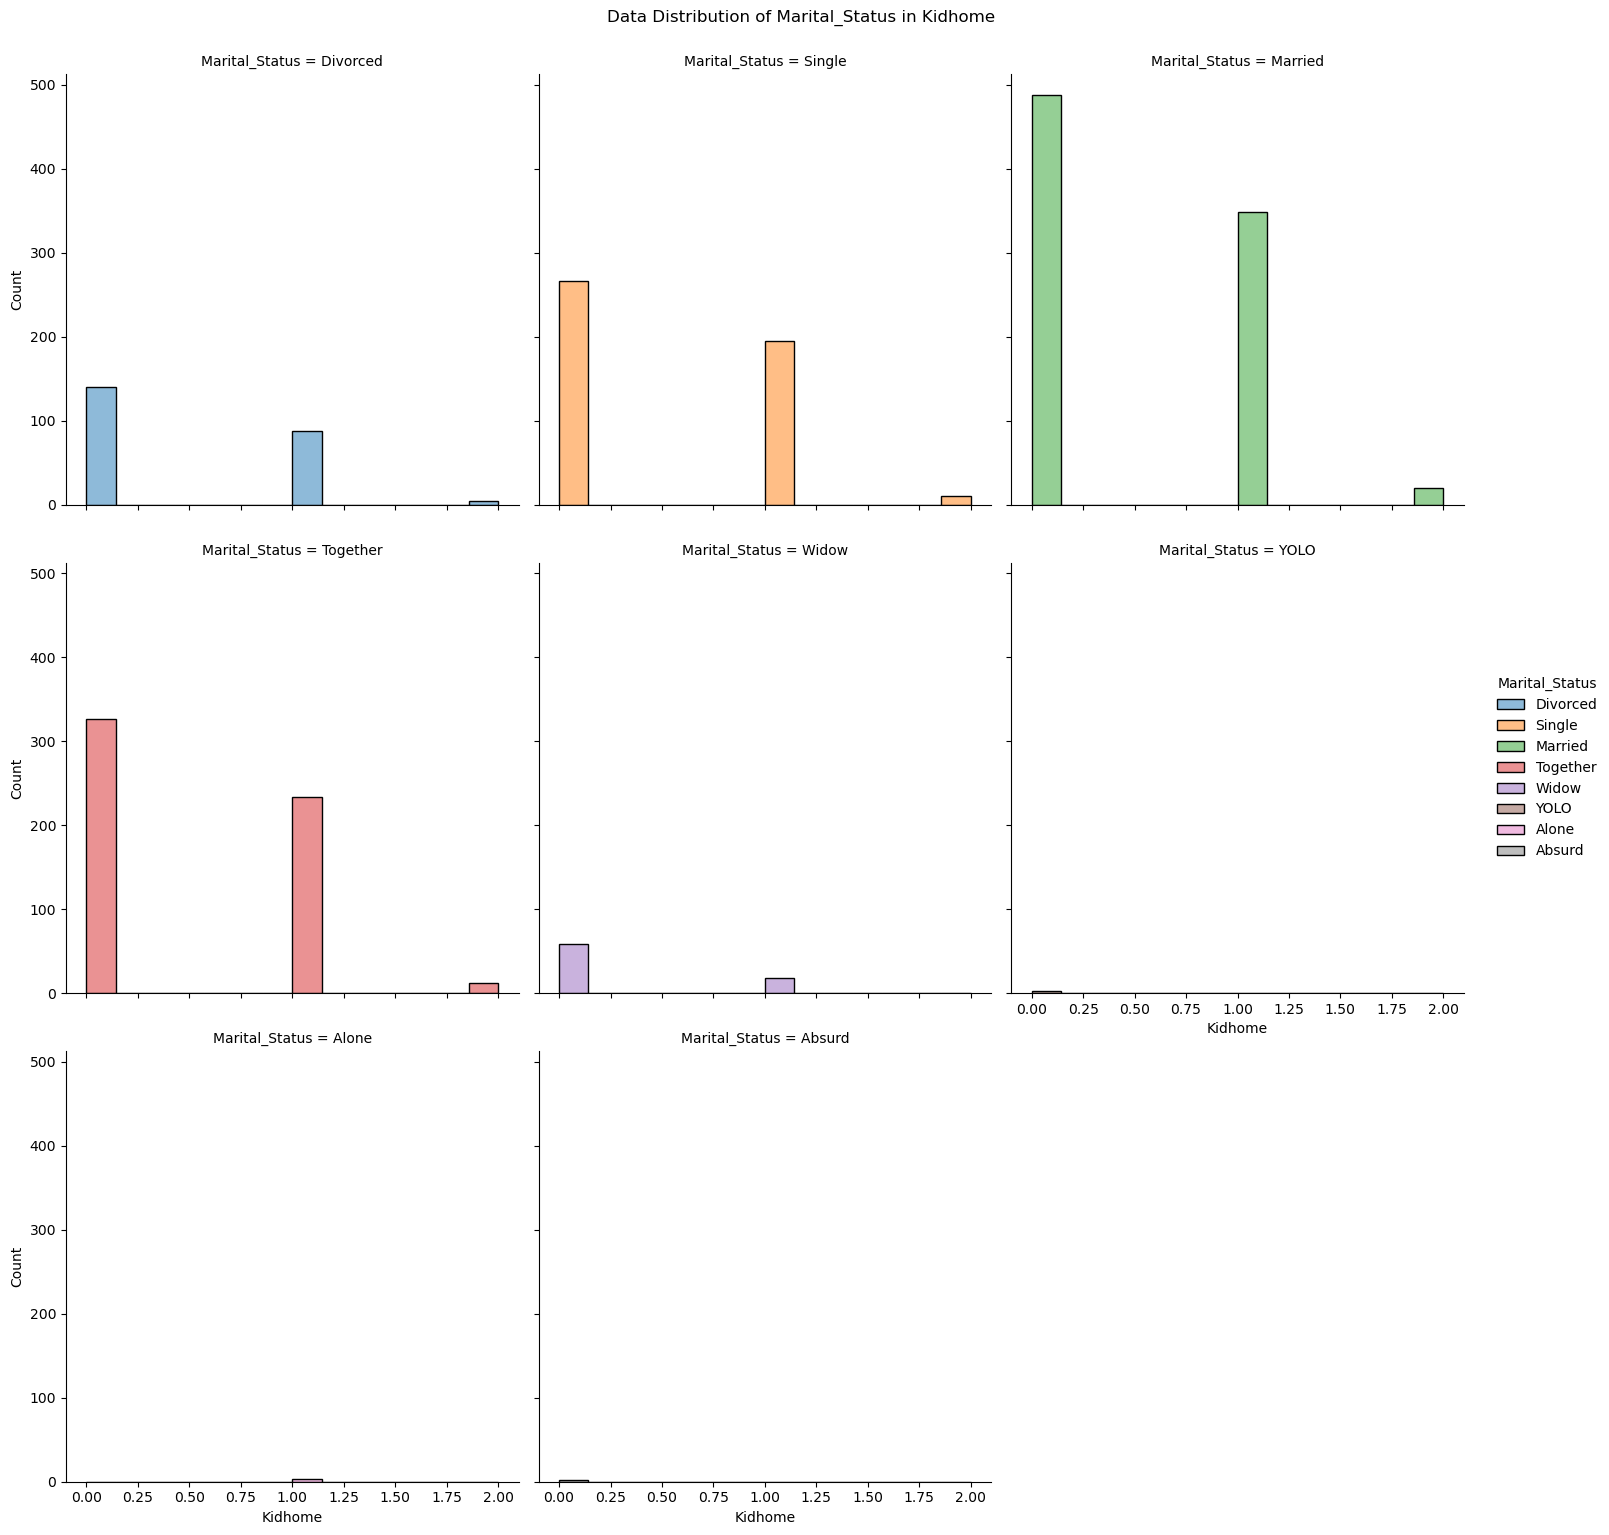

<Figure size 1400x1200 with 0 Axes>

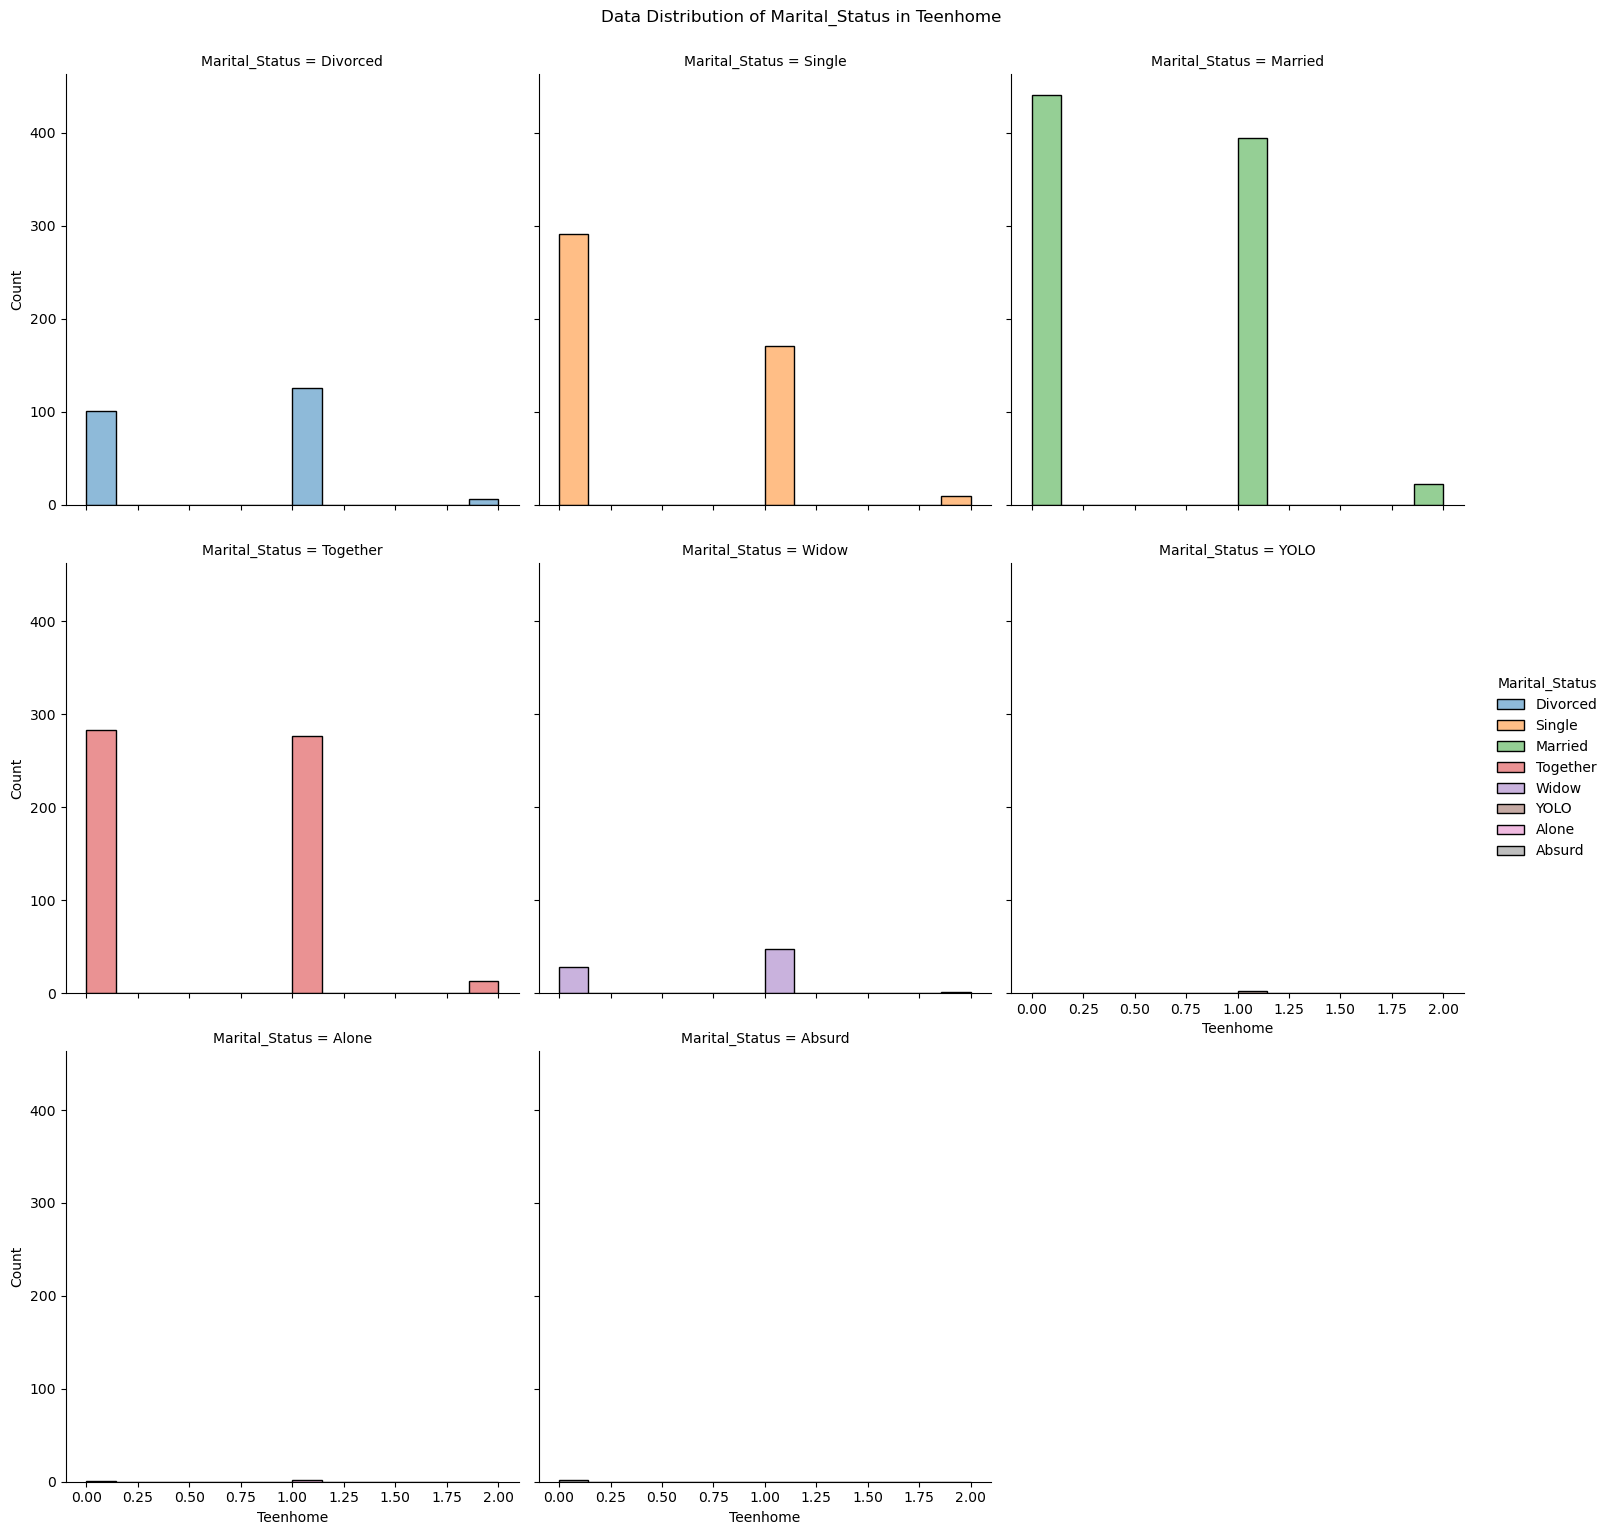

<Figure size 1400x1200 with 0 Axes>

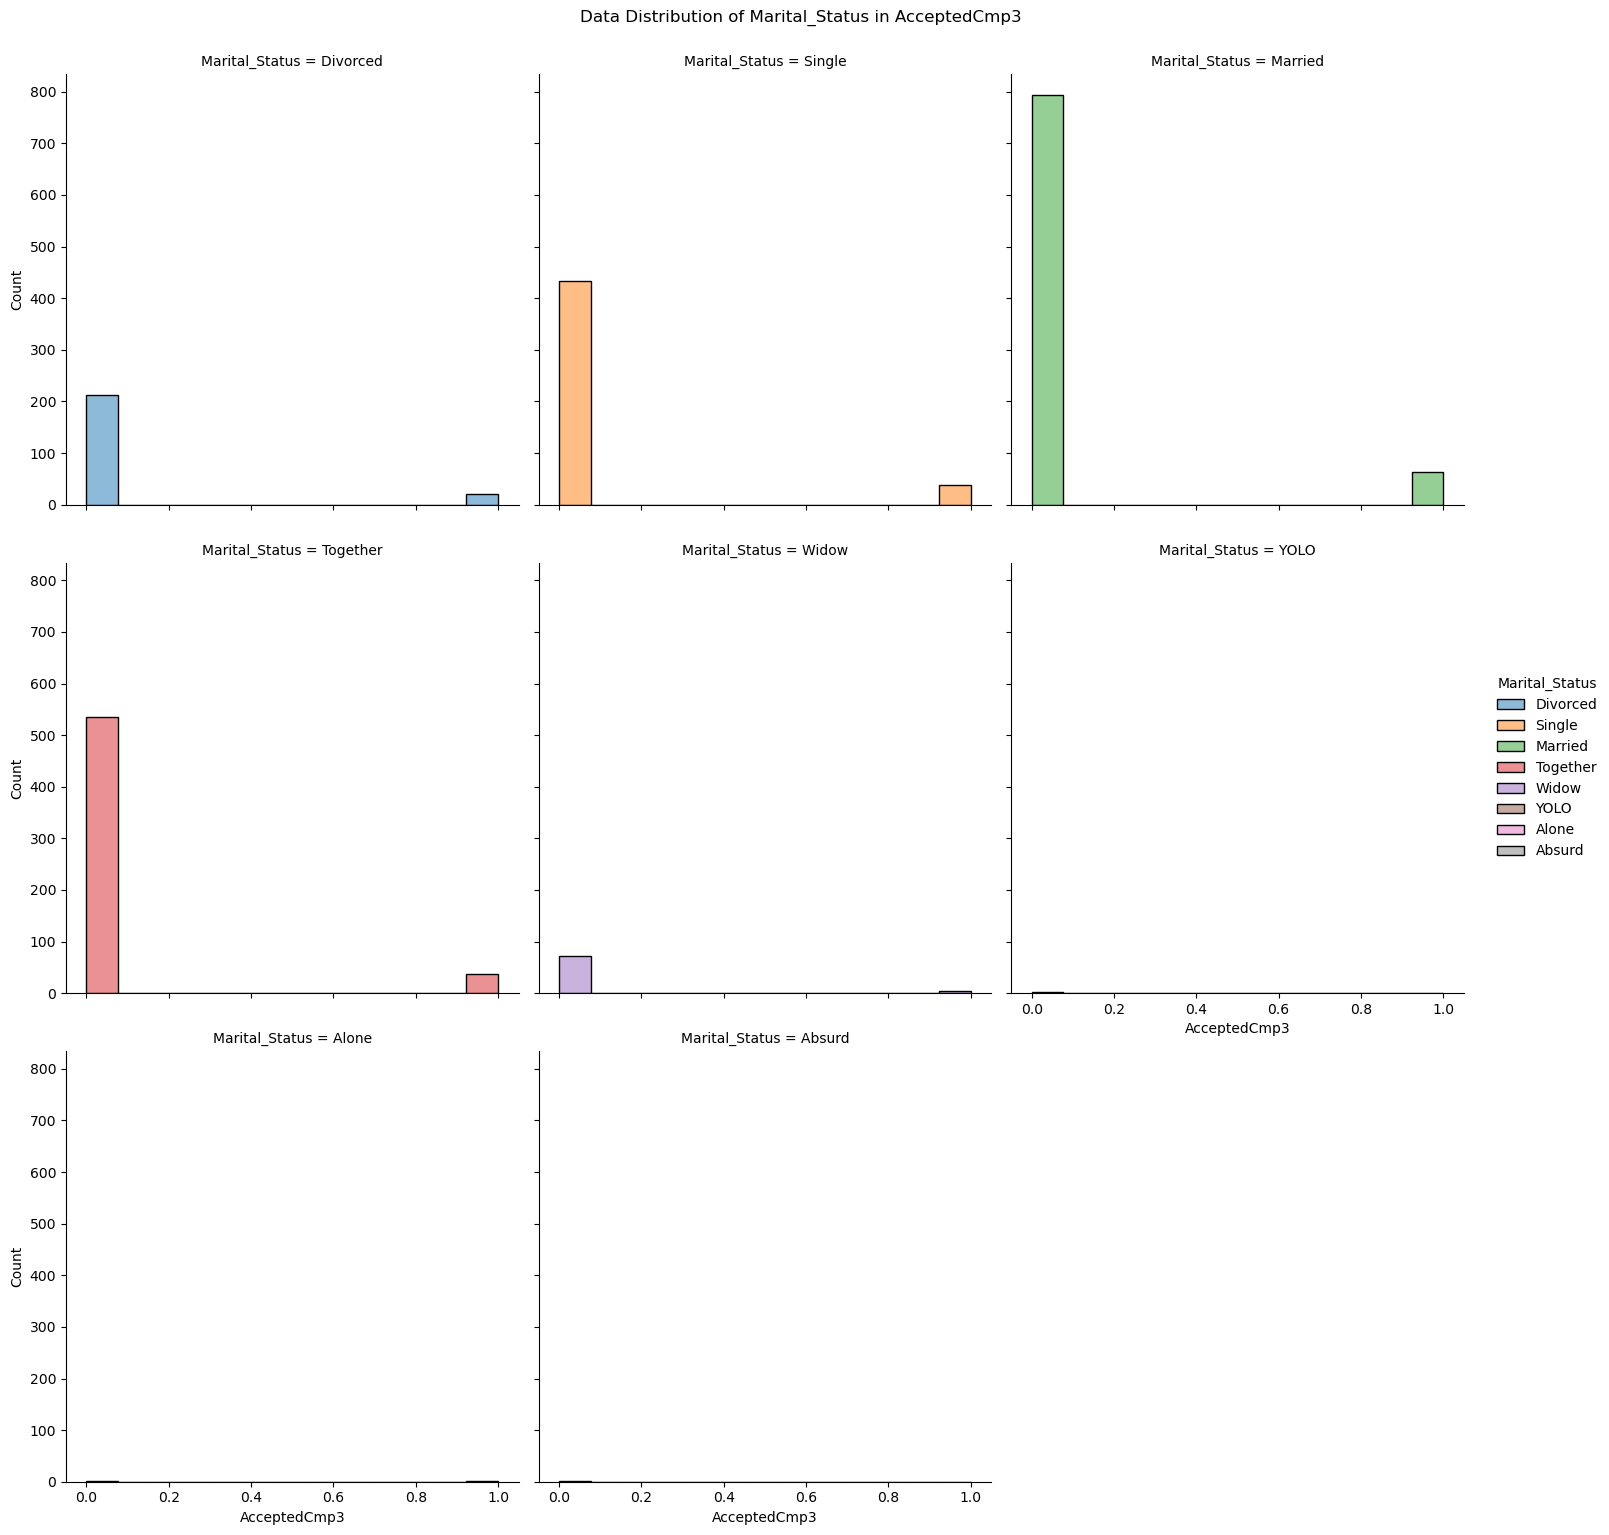

<Figure size 1400x1200 with 0 Axes>

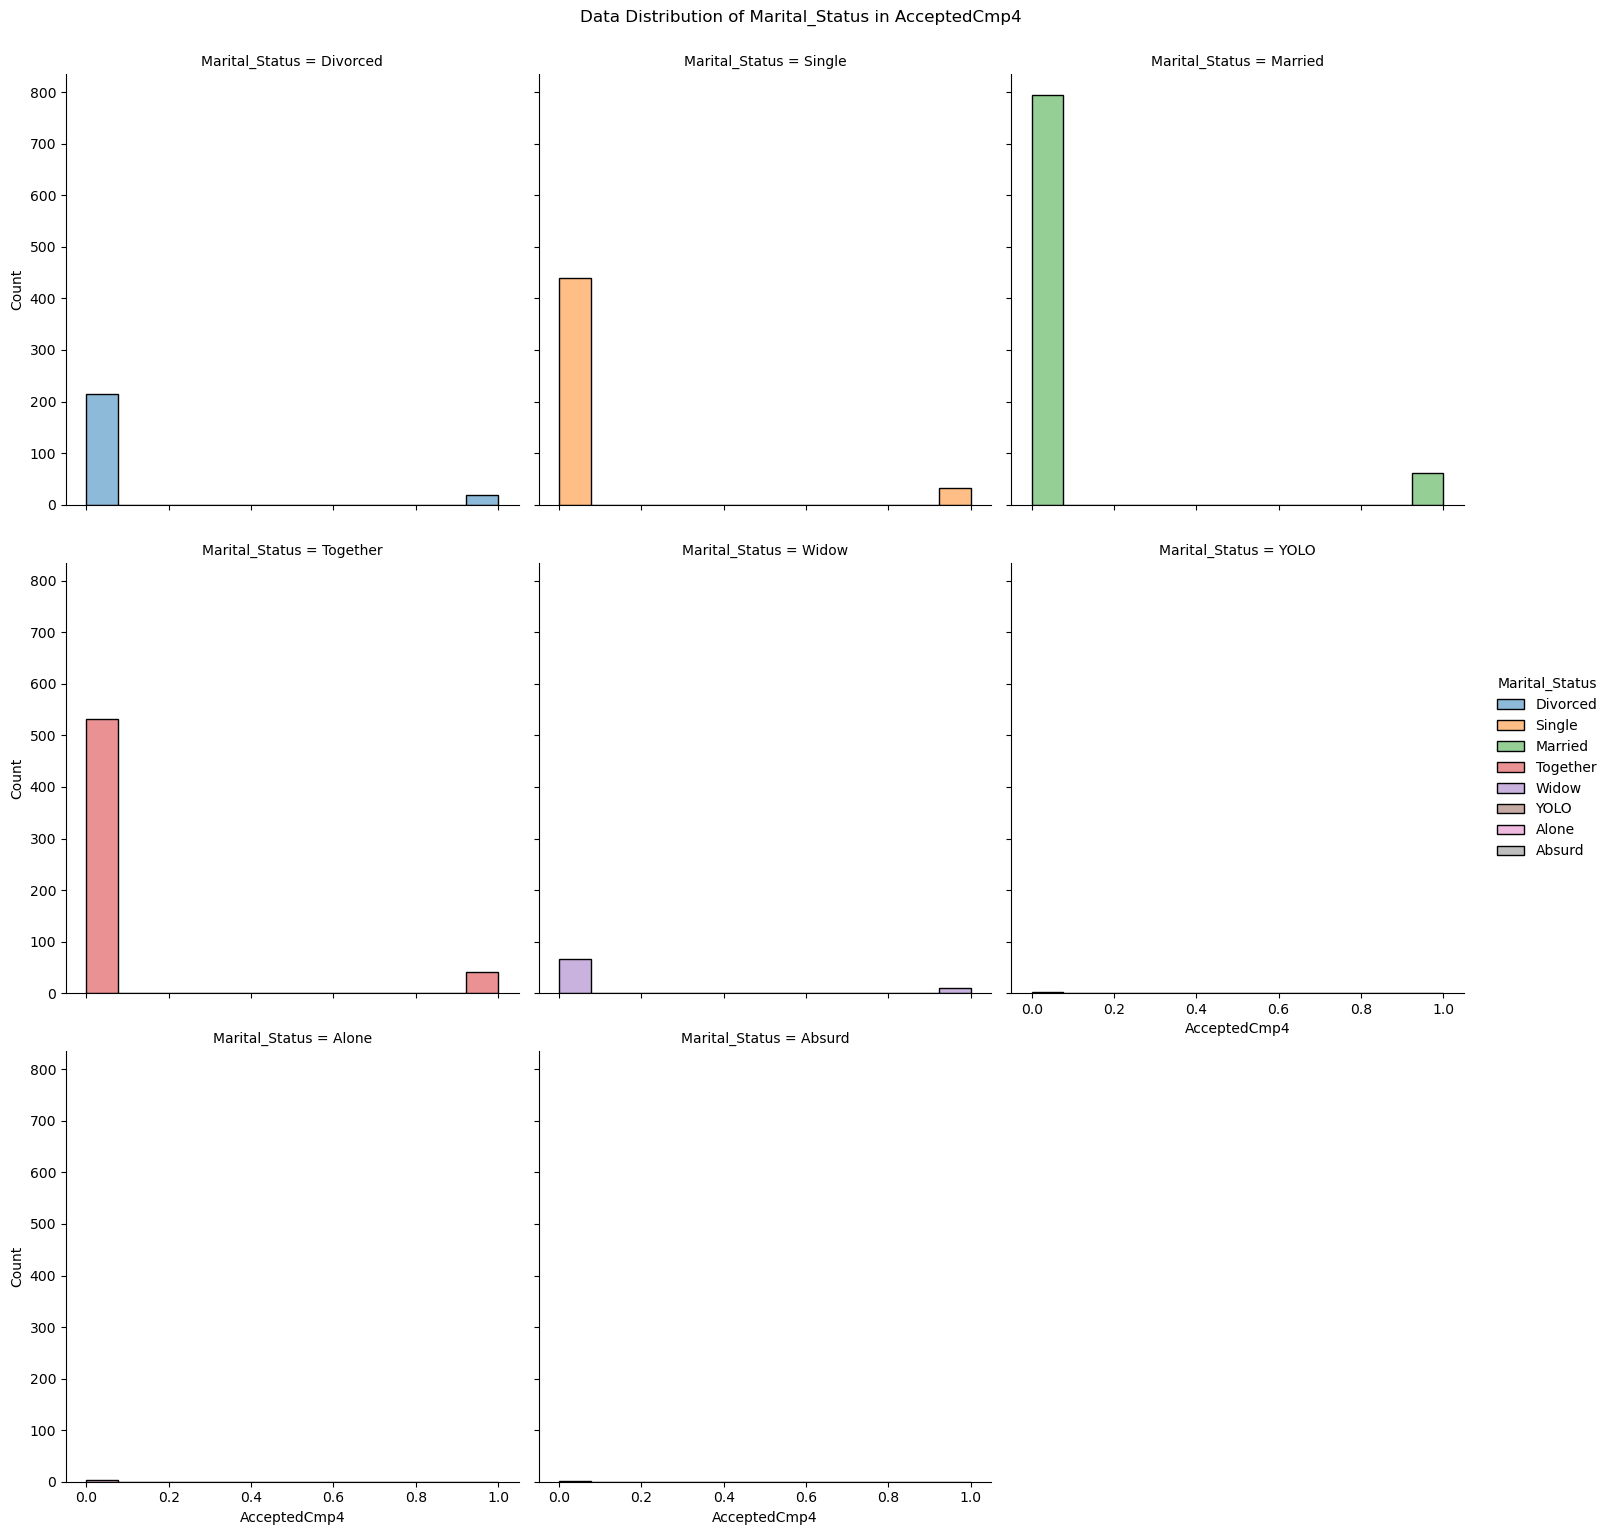

<Figure size 1400x1200 with 0 Axes>

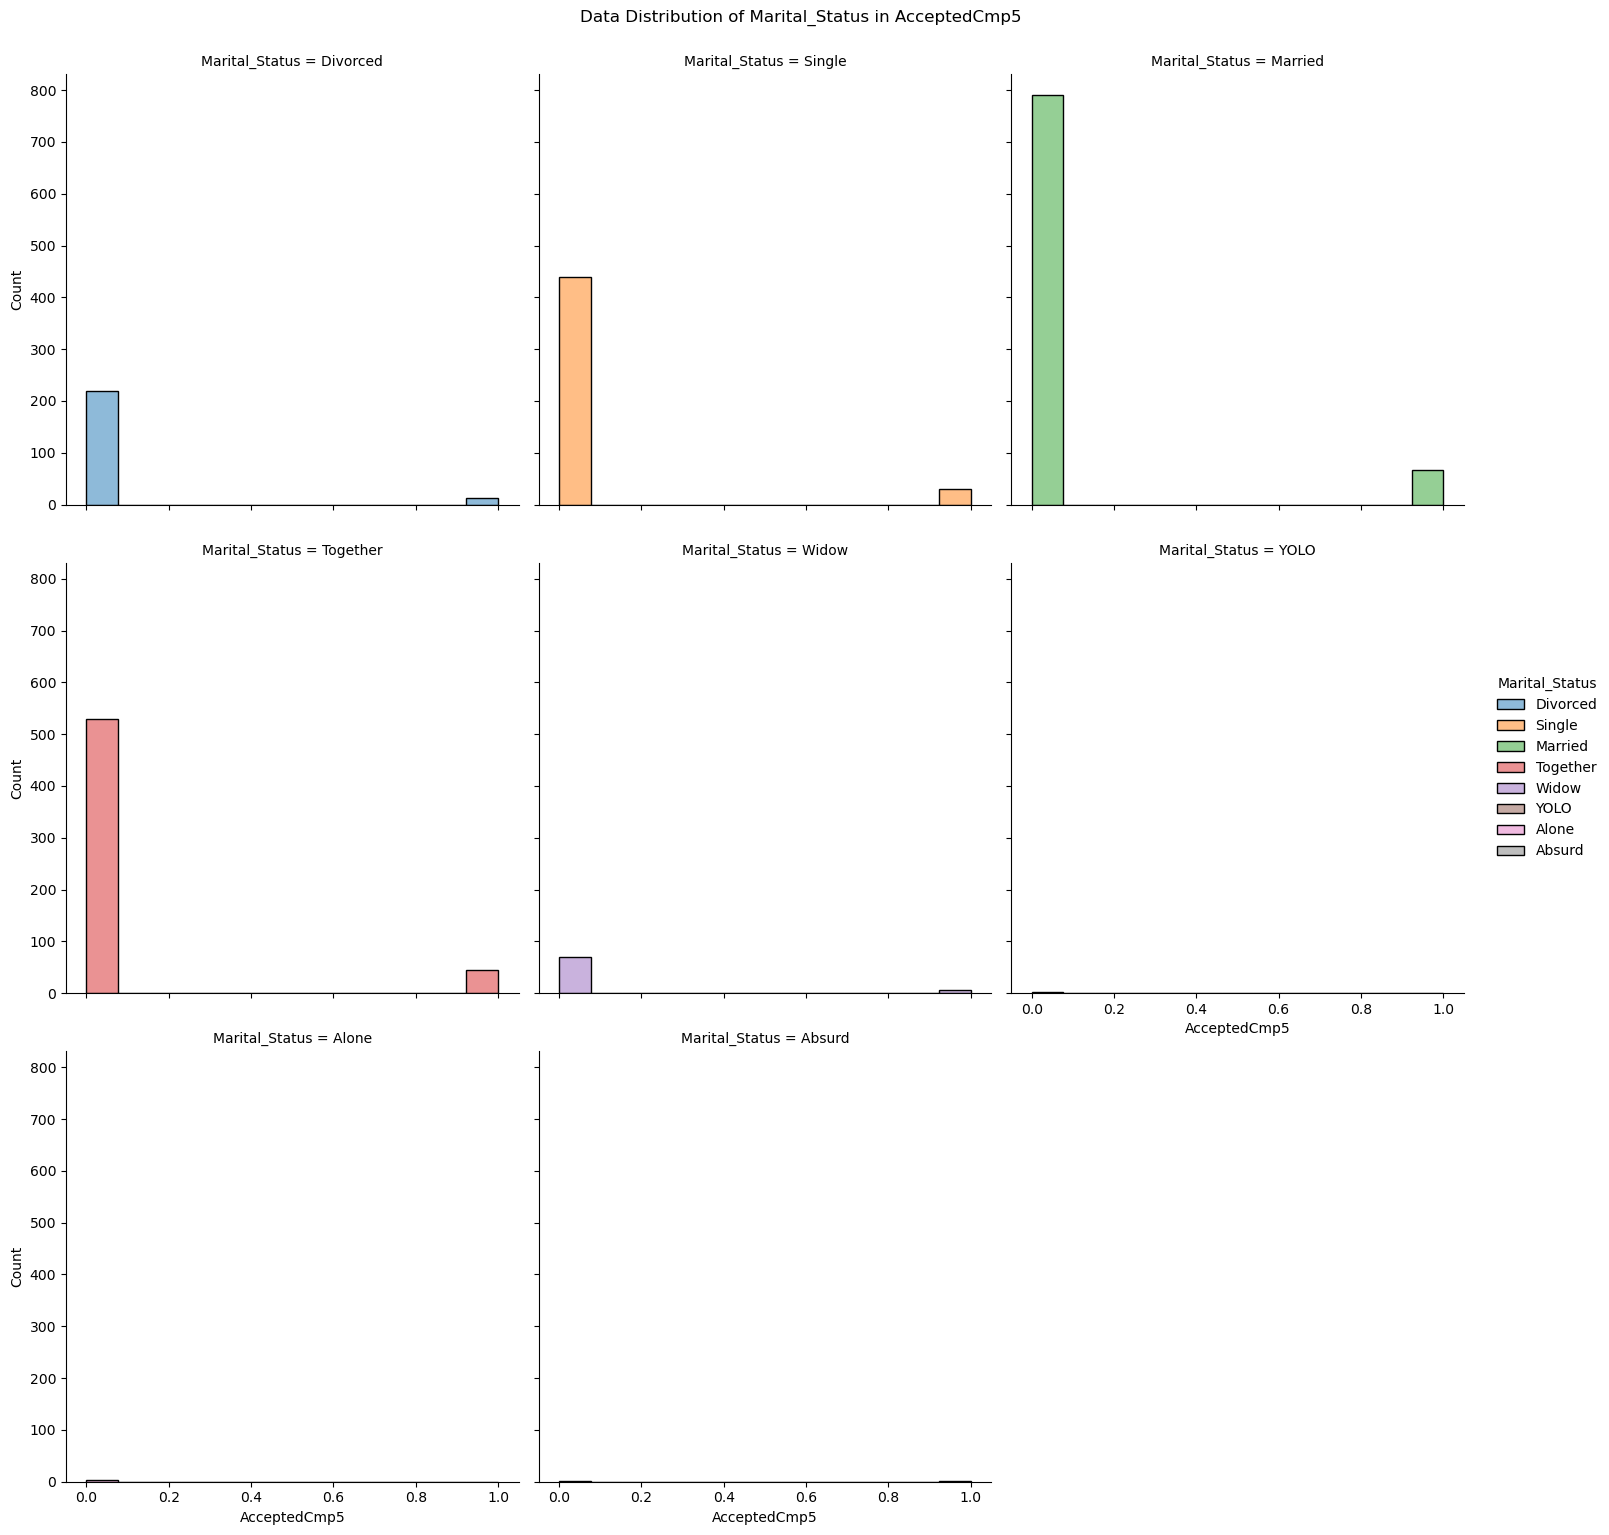

<Figure size 1400x1200 with 0 Axes>

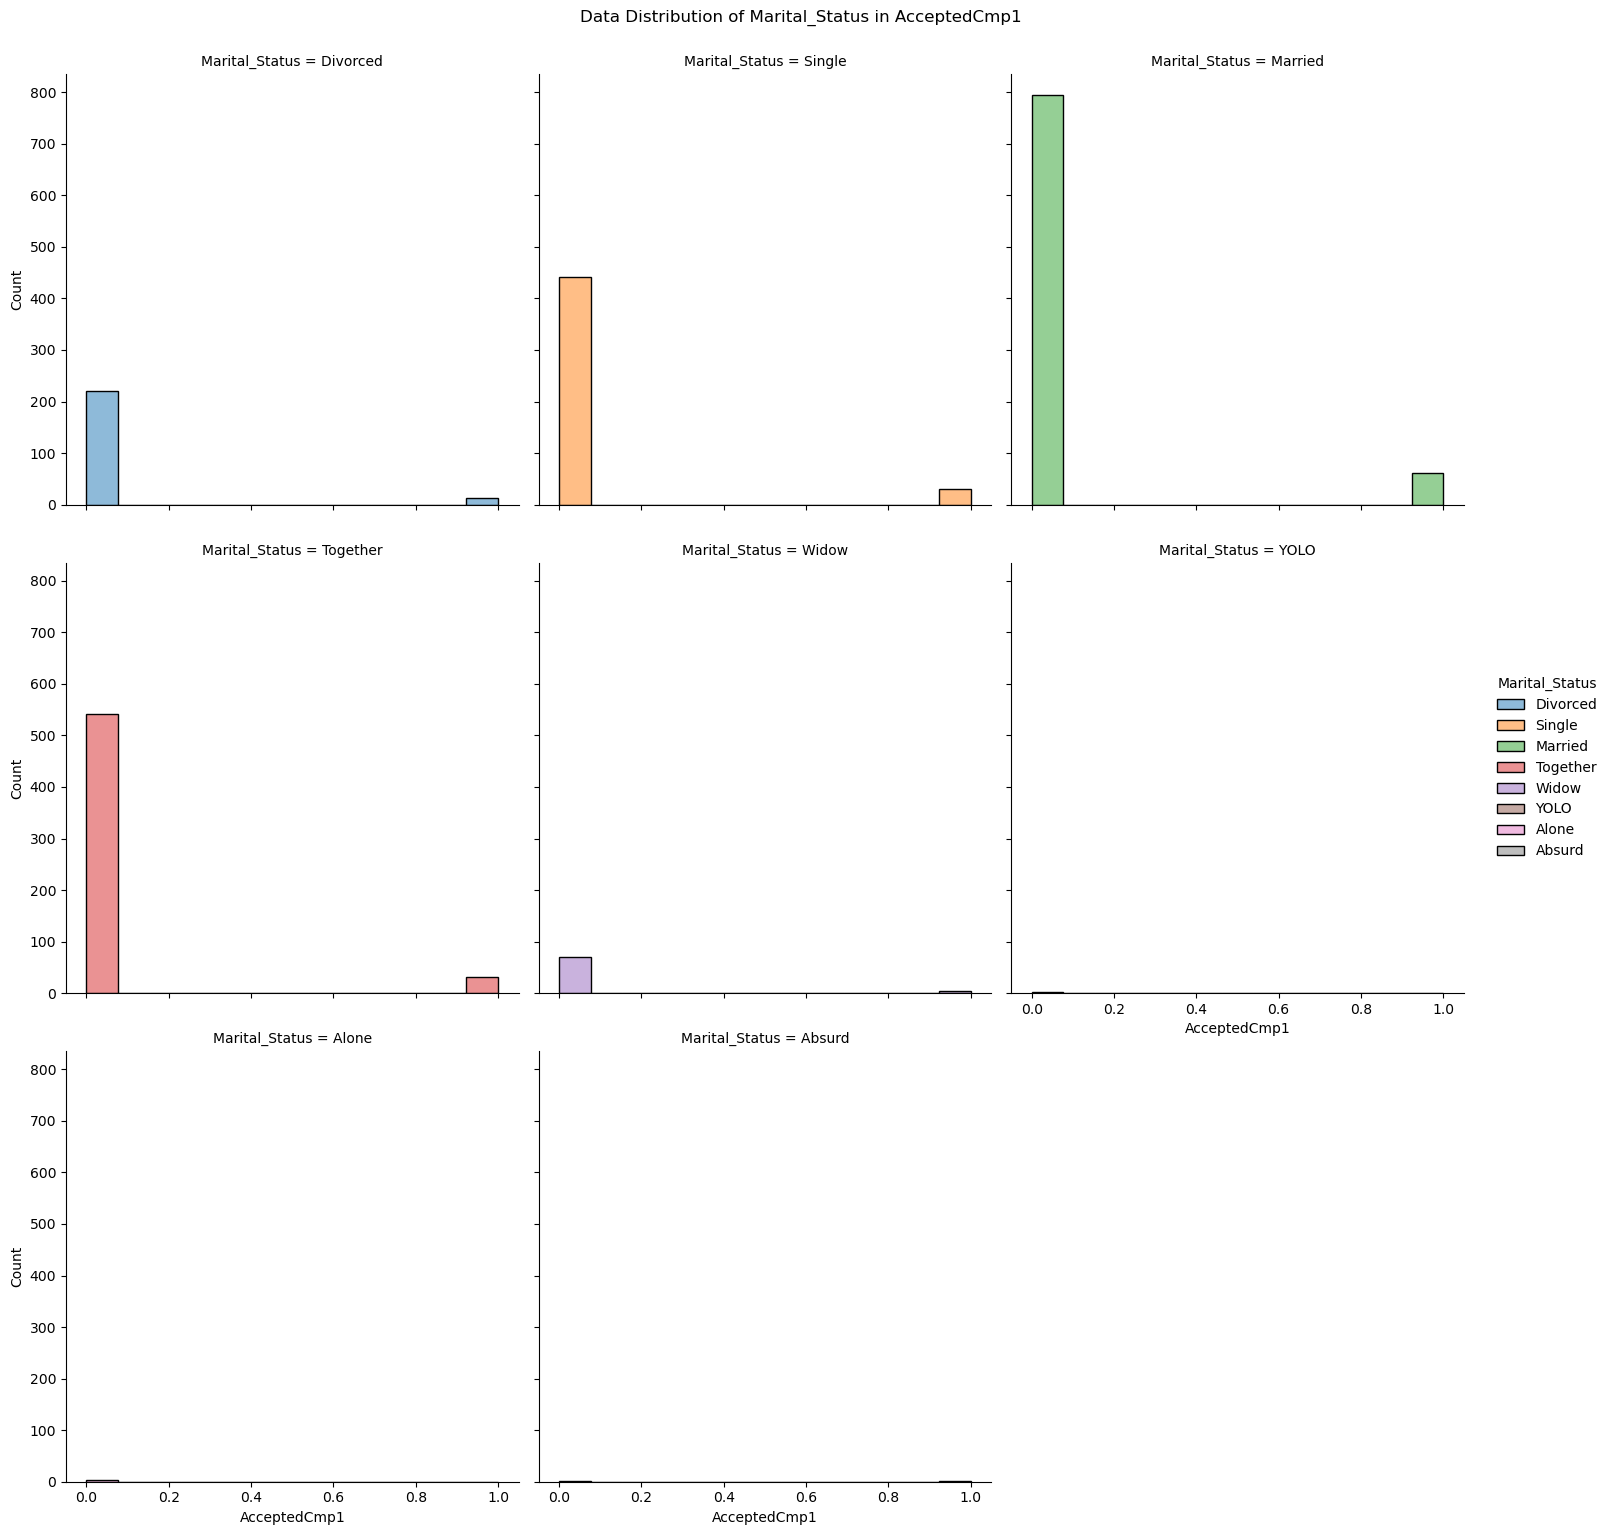

<Figure size 1400x1200 with 0 Axes>

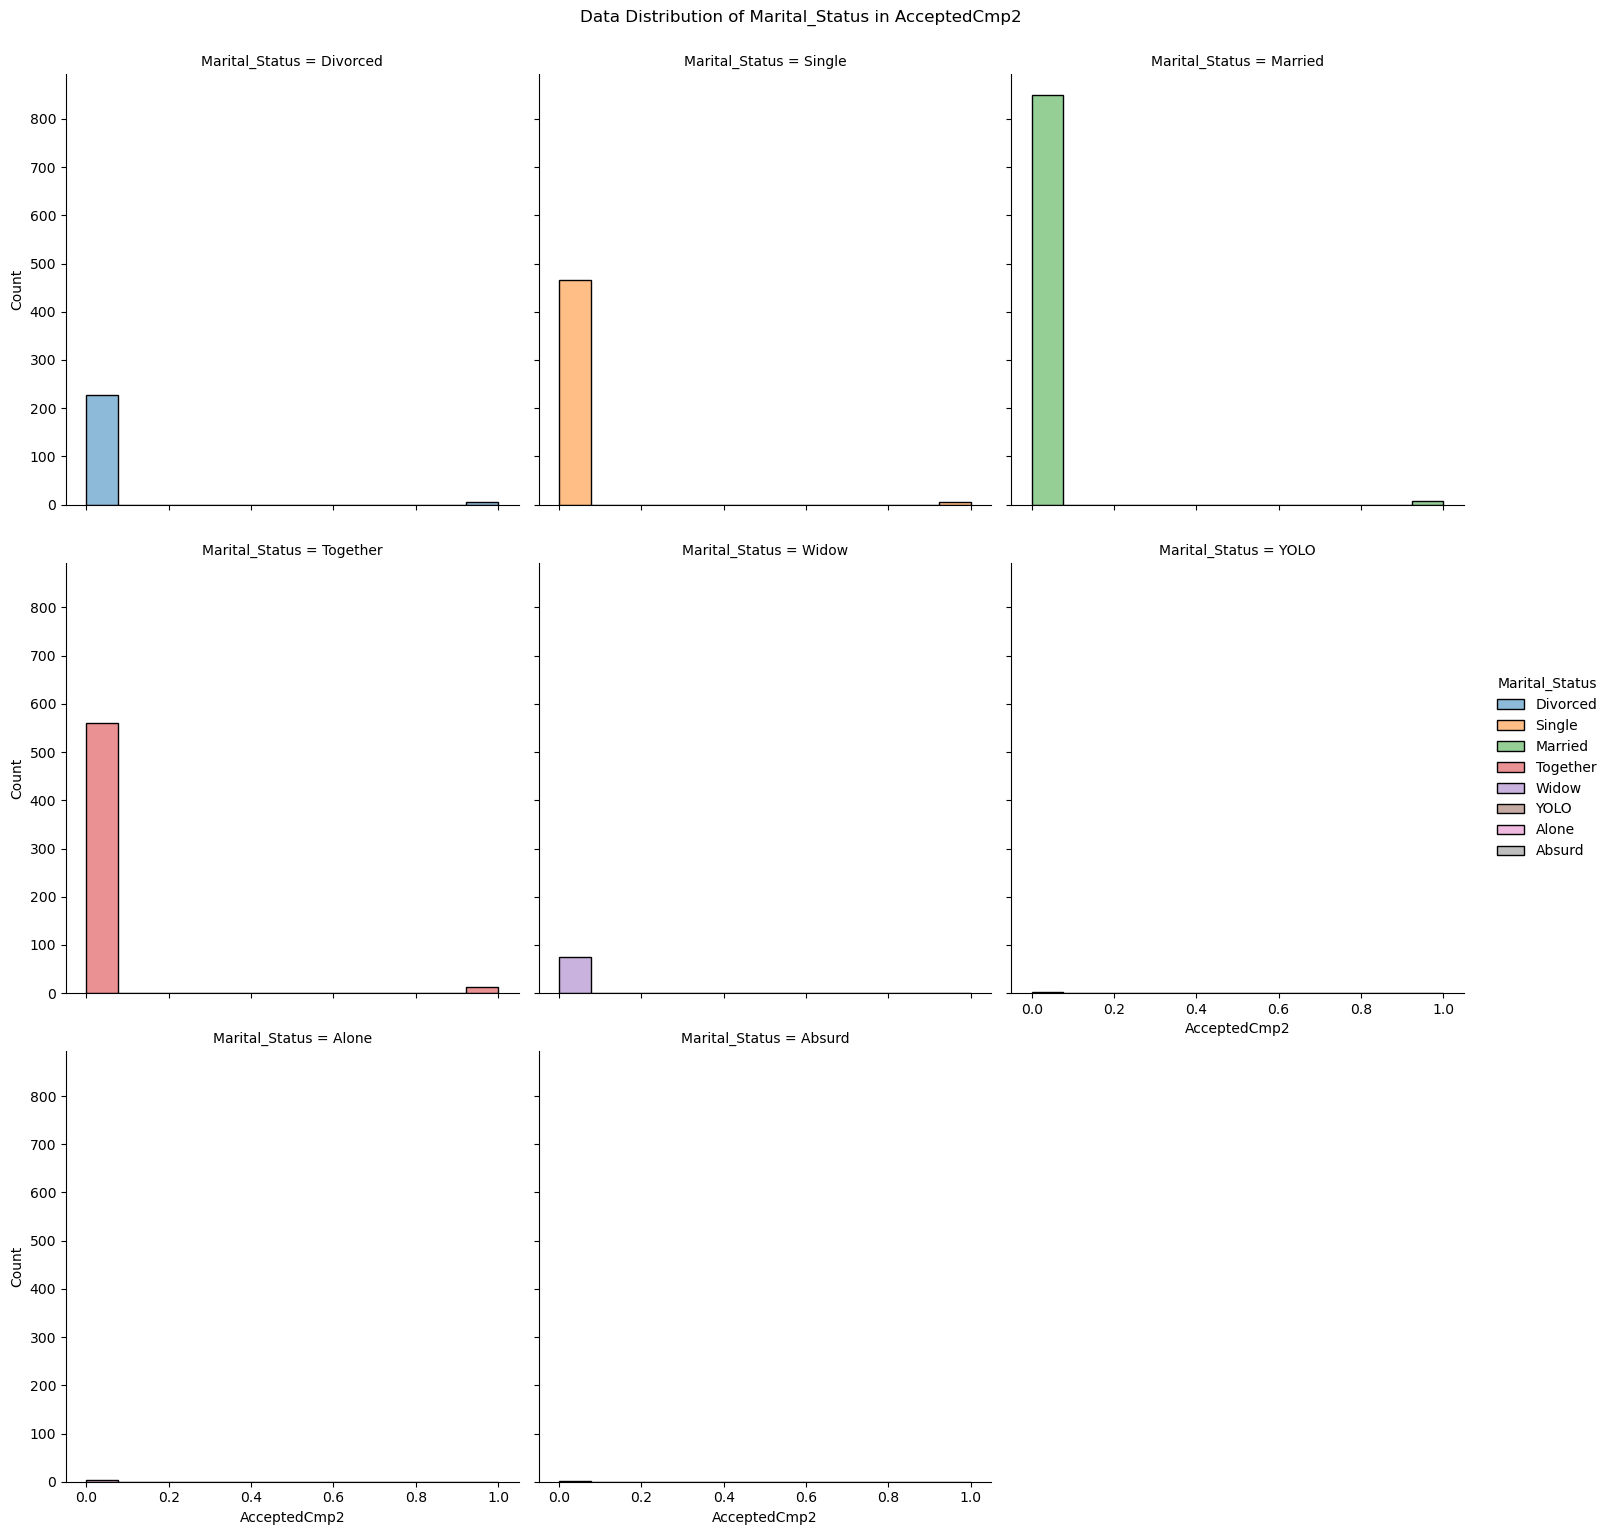

<Figure size 1400x1200 with 0 Axes>

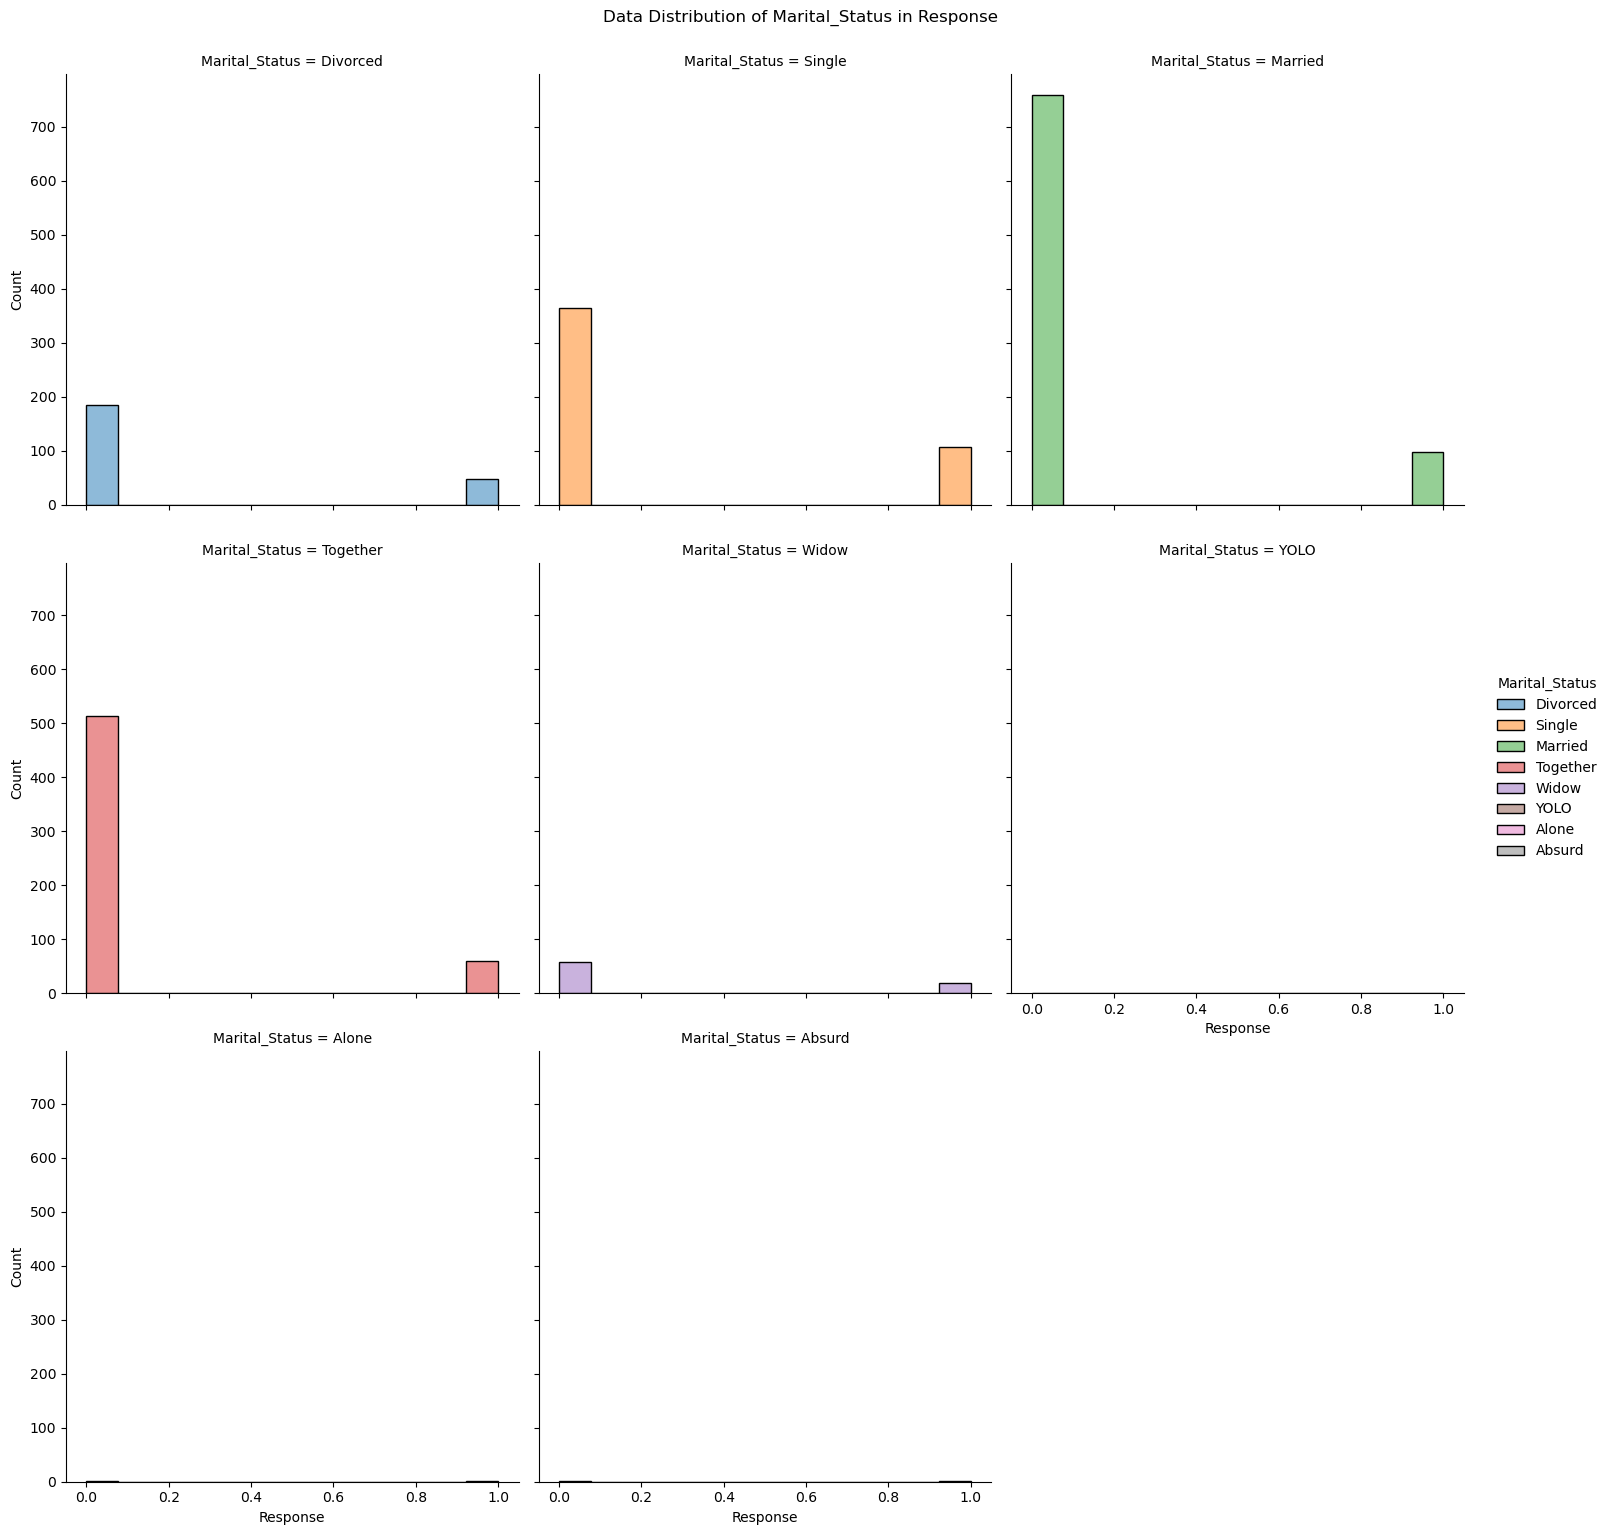

<Figure size 1400x1200 with 0 Axes>

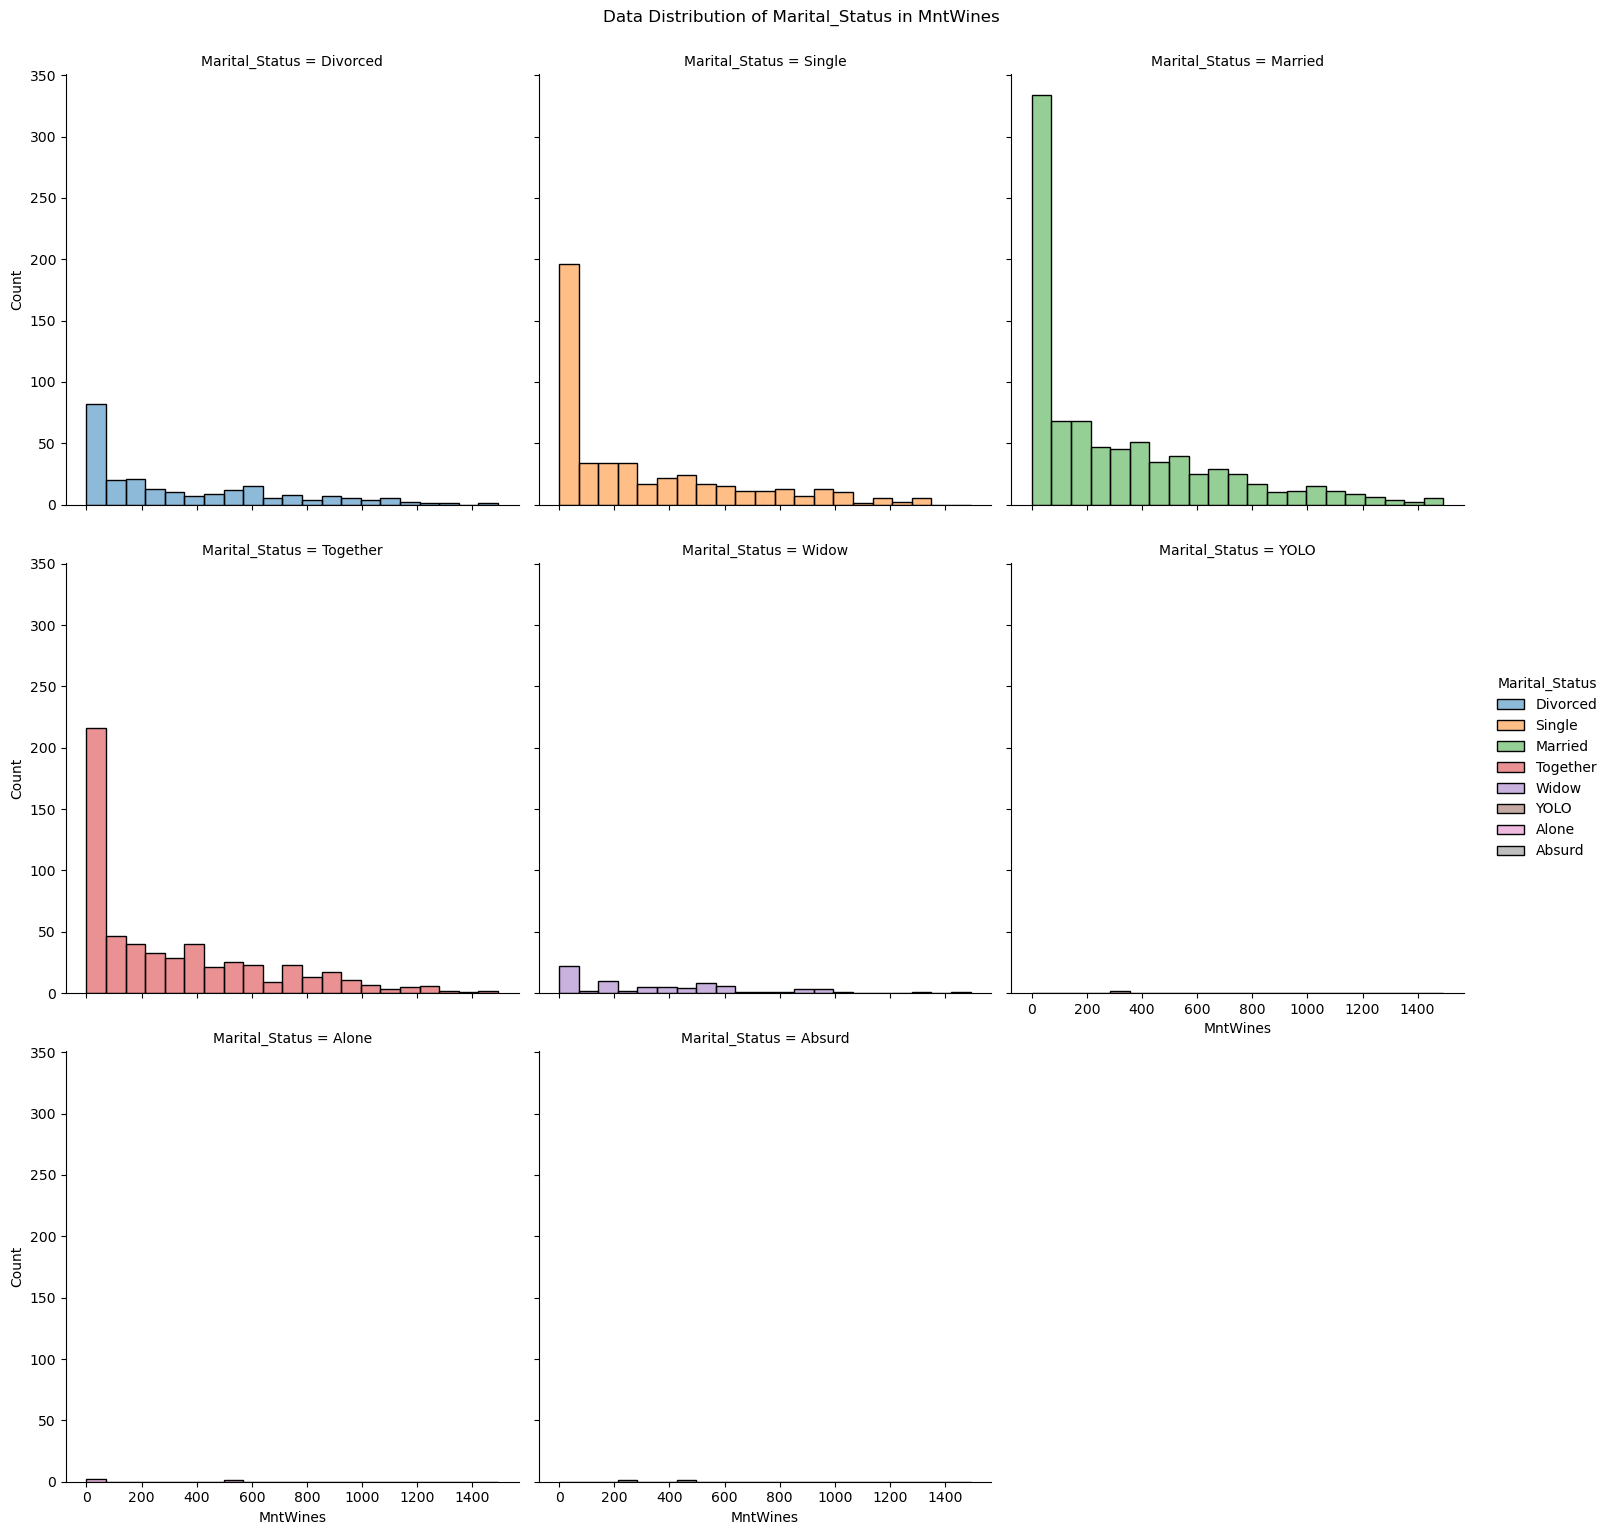

<Figure size 1400x1200 with 0 Axes>

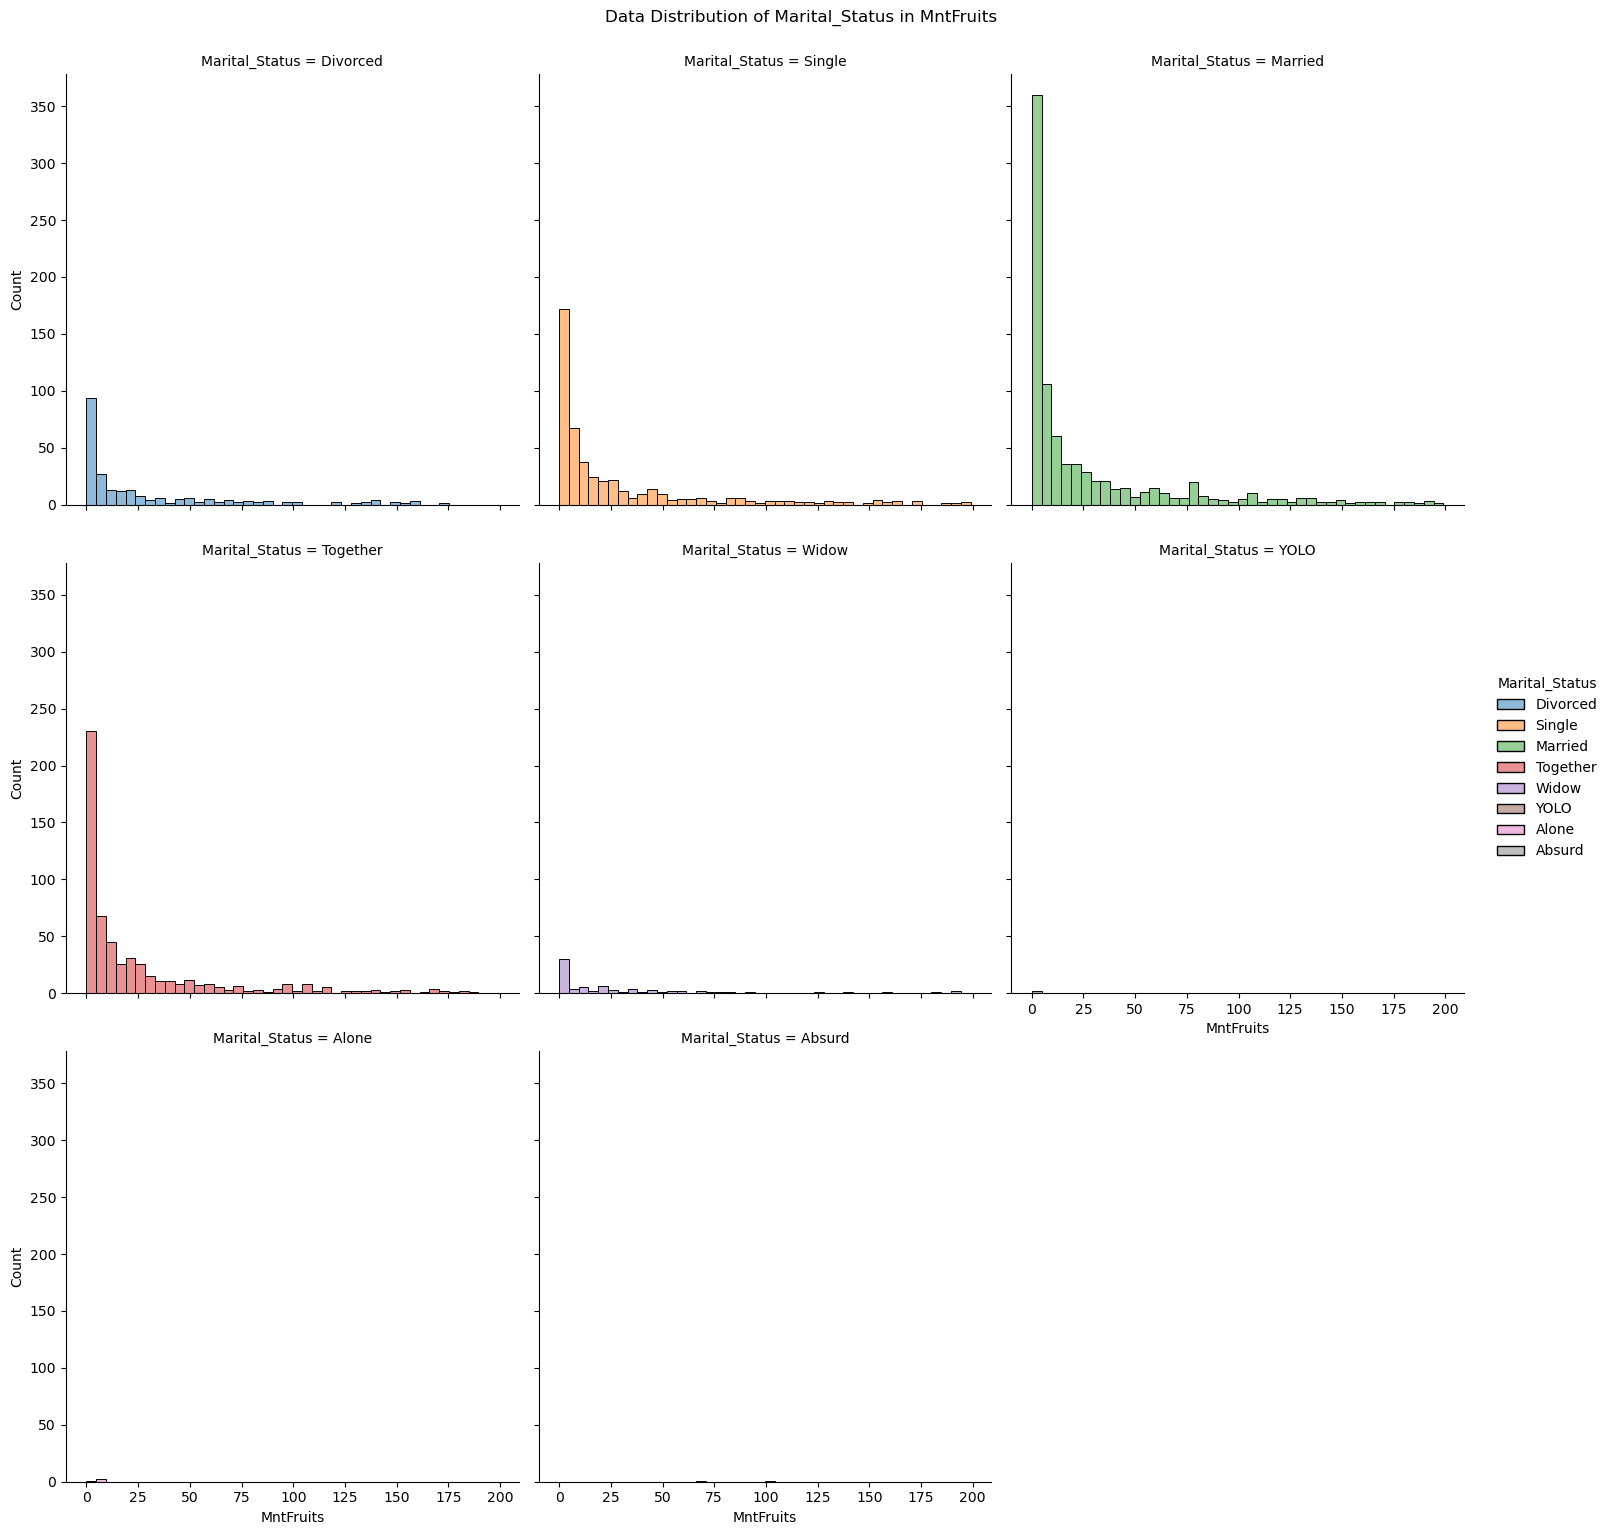

<Figure size 1400x1200 with 0 Axes>

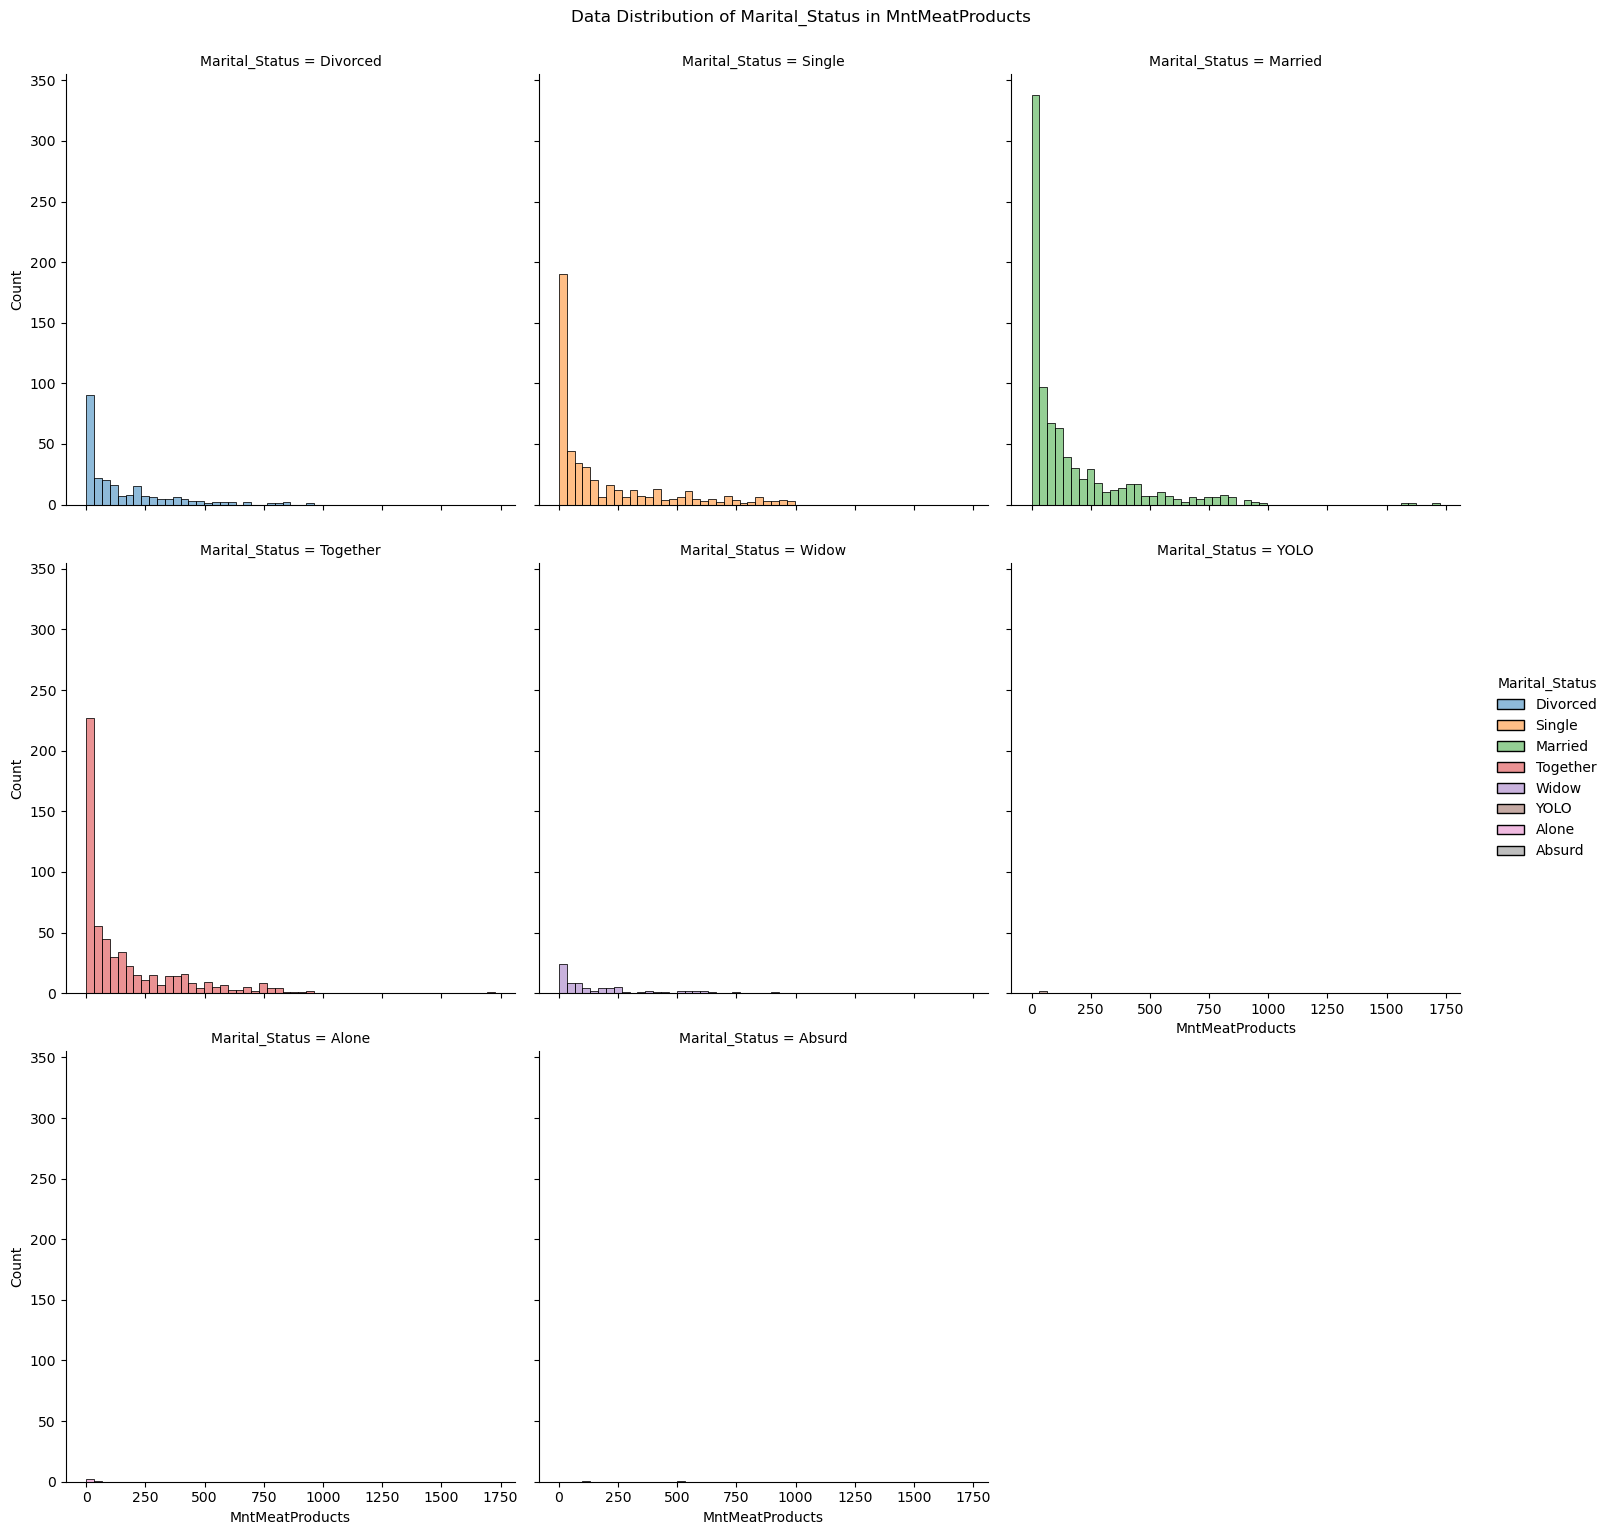

<Figure size 1400x1200 with 0 Axes>

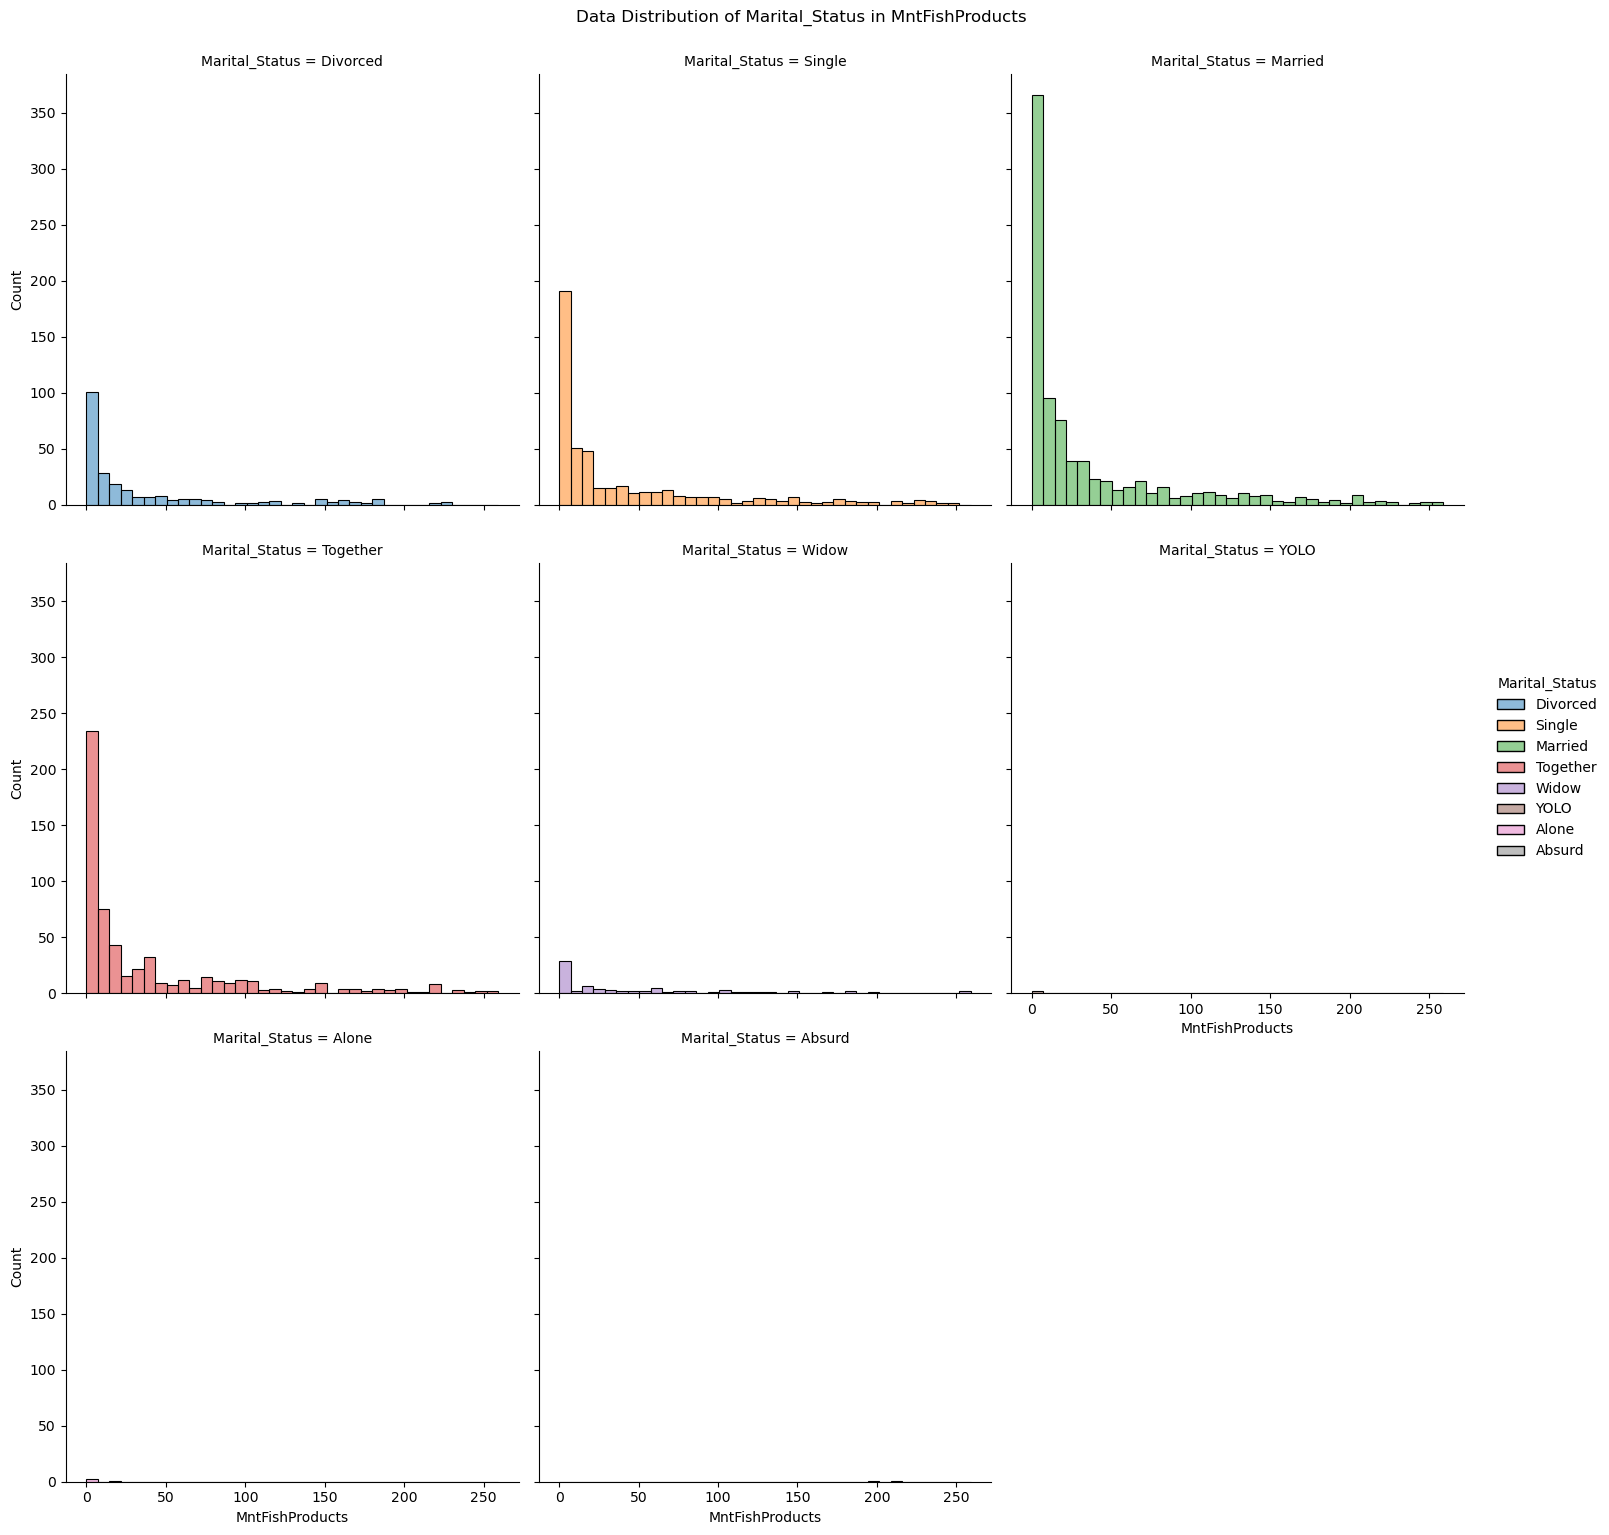

In [27]:
def box_plot_analysis(data,X,Y):
    for x1, y1 in zip(X, Y):
        plt.figure(figsize=(14, 12))
        ax = sns.displot(data=data, x=x1, hue=y1, col=y1,col_wrap=3)
        title_name =  f"Data Distribution of {y1} in {x1}"
        #title_name = r"\textbf{Data Distribution of " + f"{y1}" + r" in " + f"{x1}" + "}"
        ax.fig.suptitle(title_name,y=1.02)
        
        plt.show()

X = ["Kidhome","Teenhome","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Response",'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain']
Y = ["Marital_Status"]*len(Y )


box_plot_analysis(df,X,Y)

<Figure size 1400x1200 with 0 Axes>

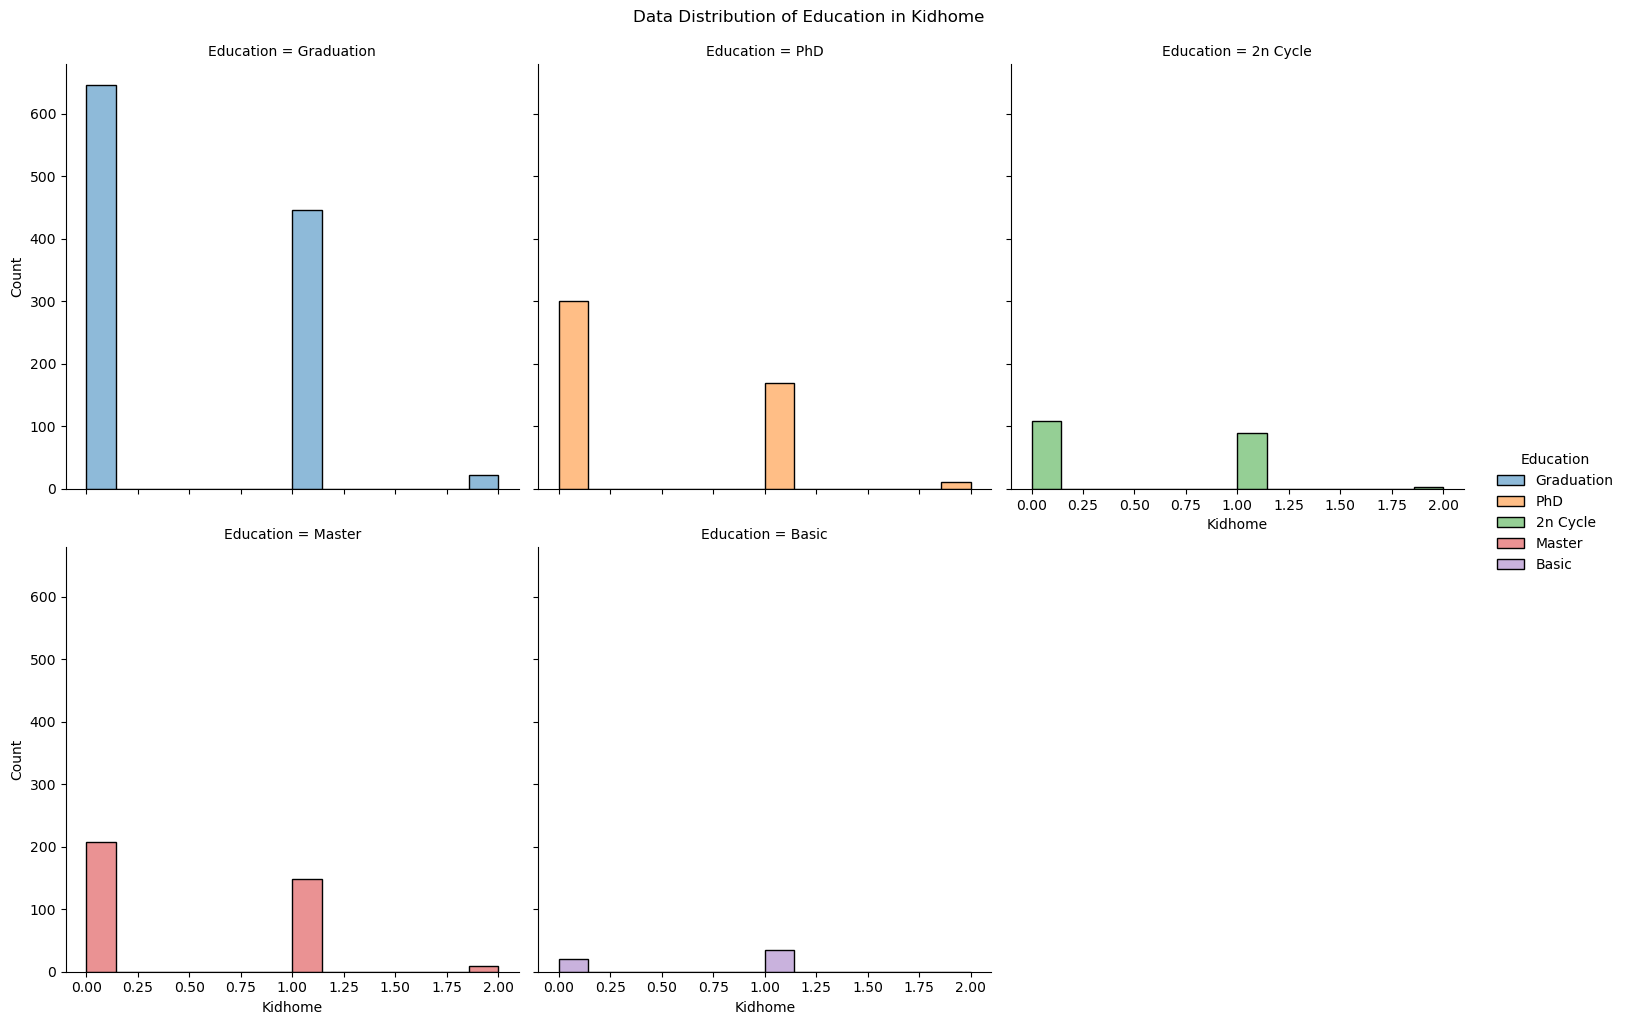

<Figure size 1400x1200 with 0 Axes>

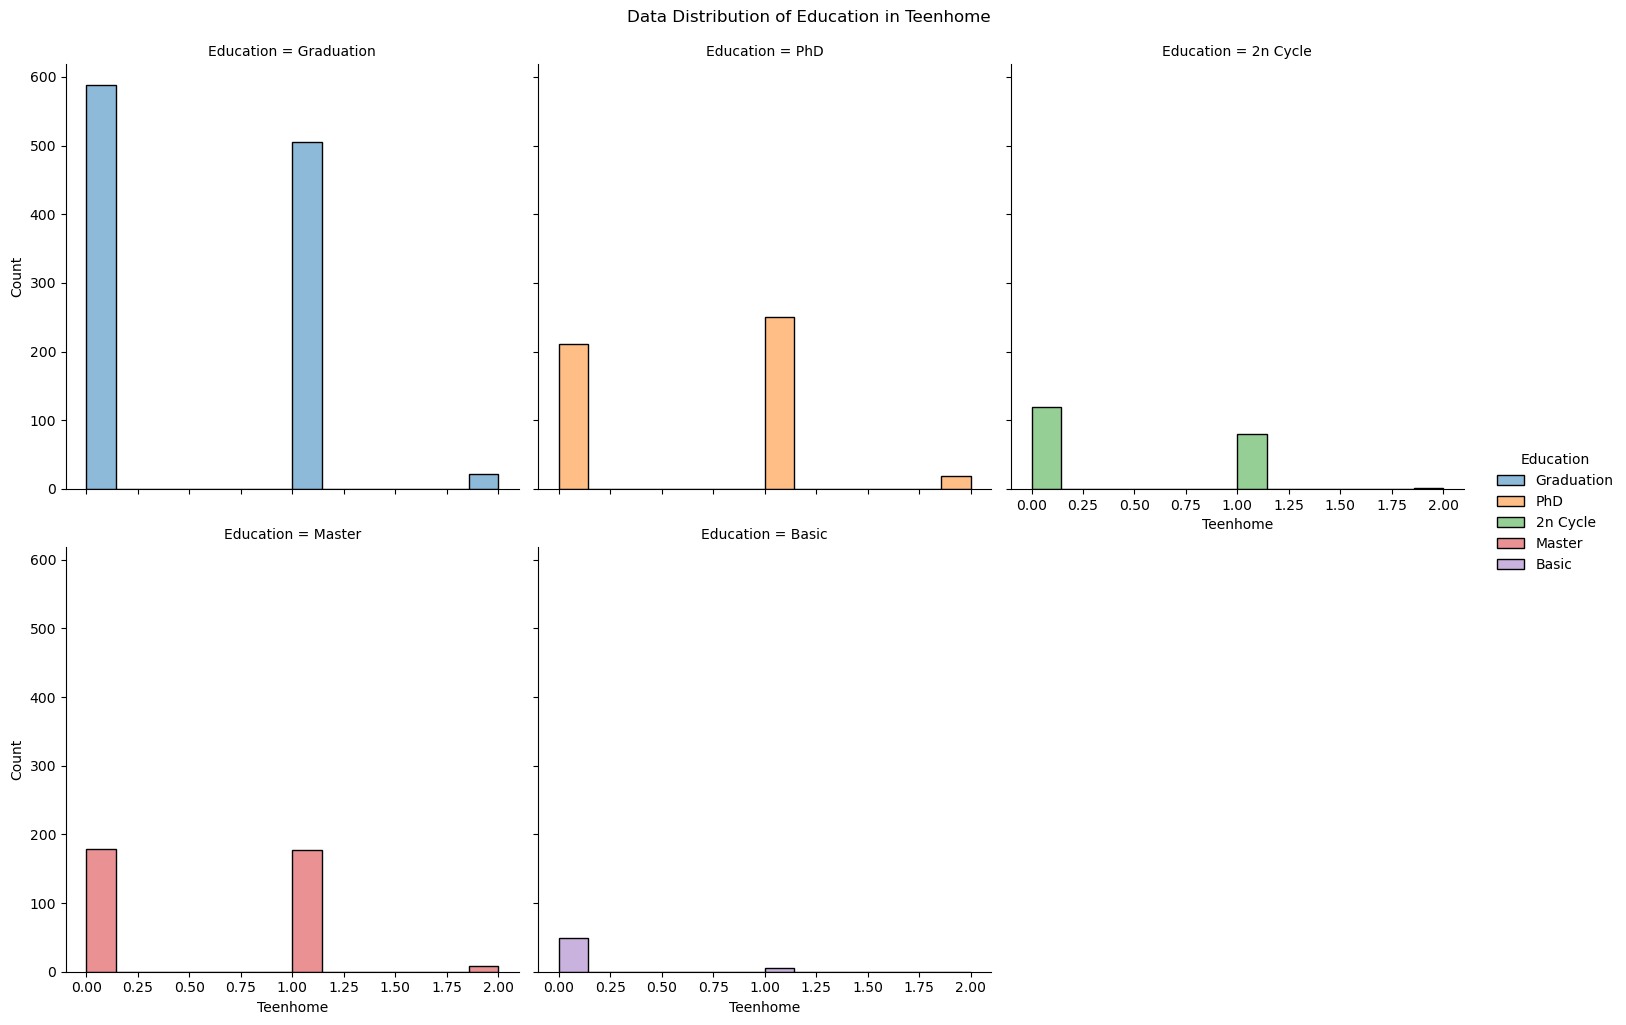

<Figure size 1400x1200 with 0 Axes>

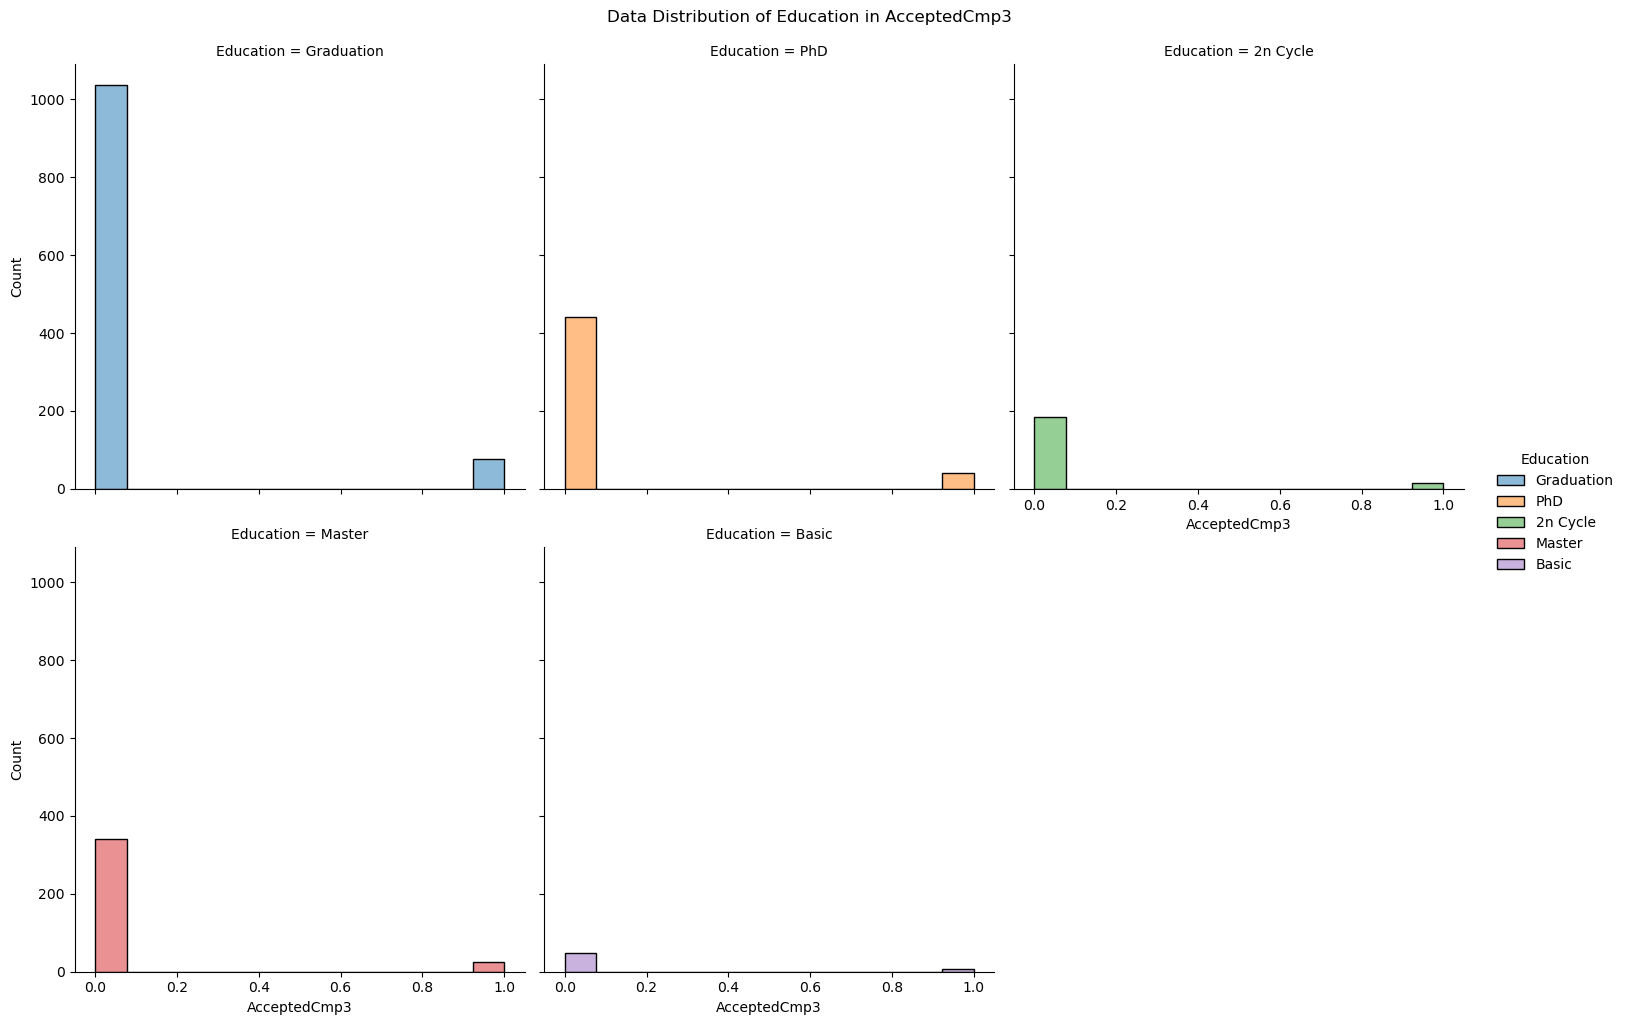

<Figure size 1400x1200 with 0 Axes>

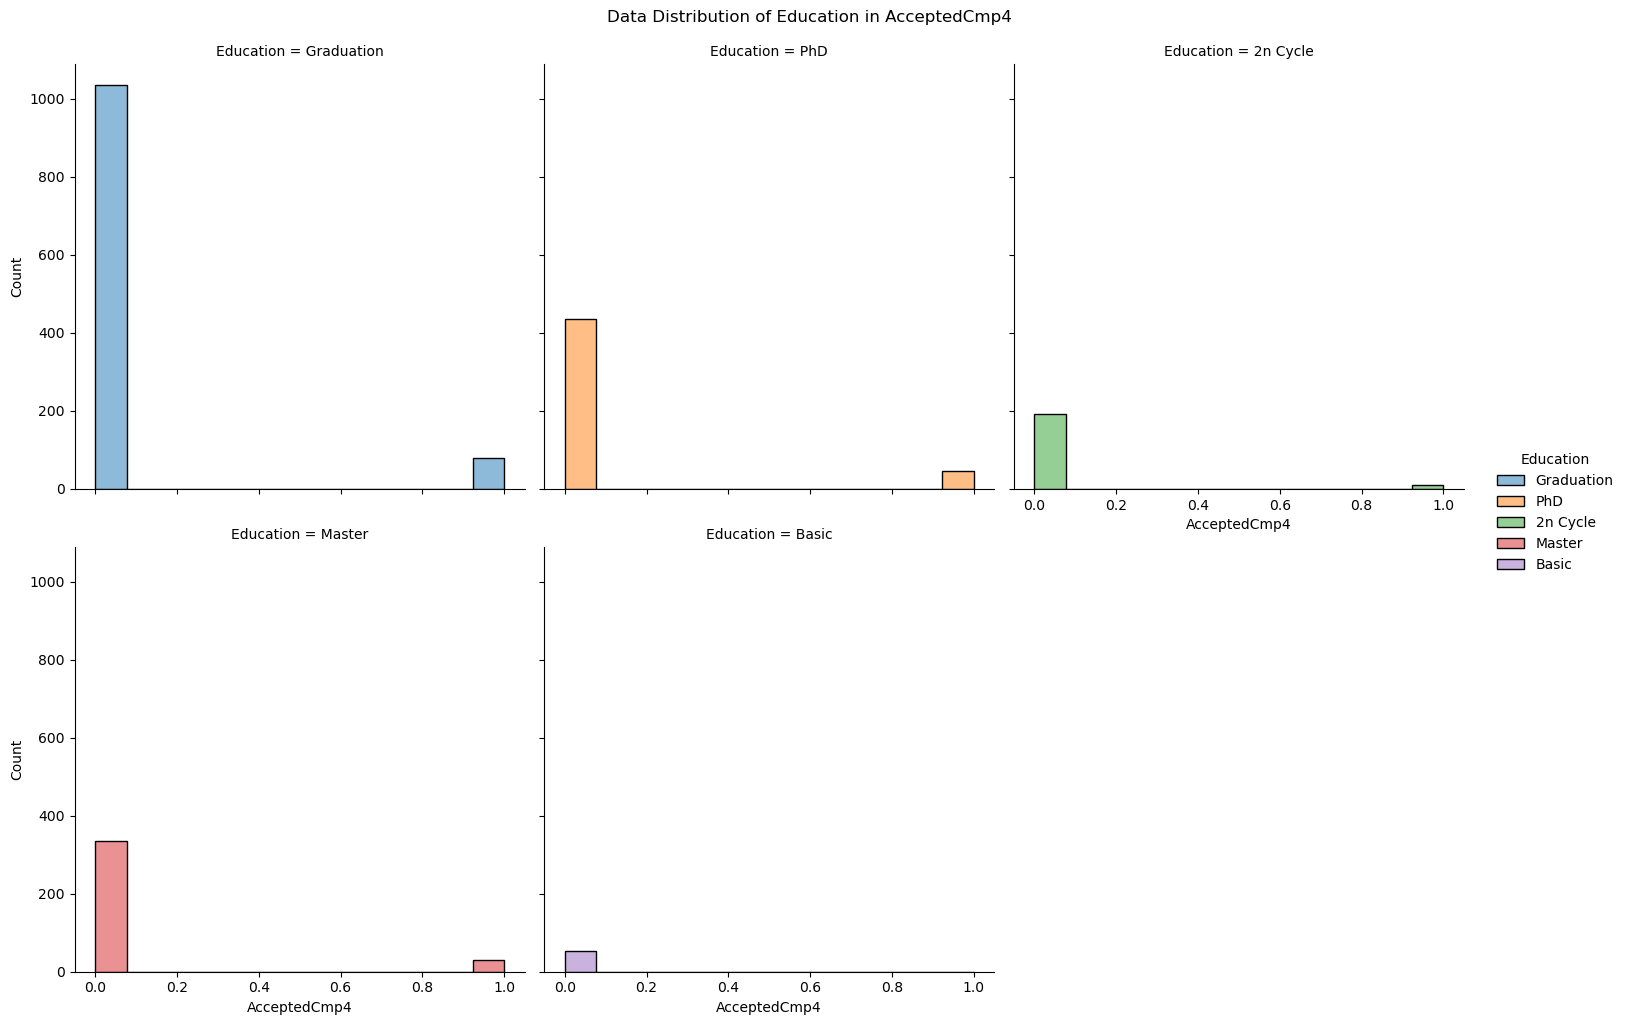

<Figure size 1400x1200 with 0 Axes>

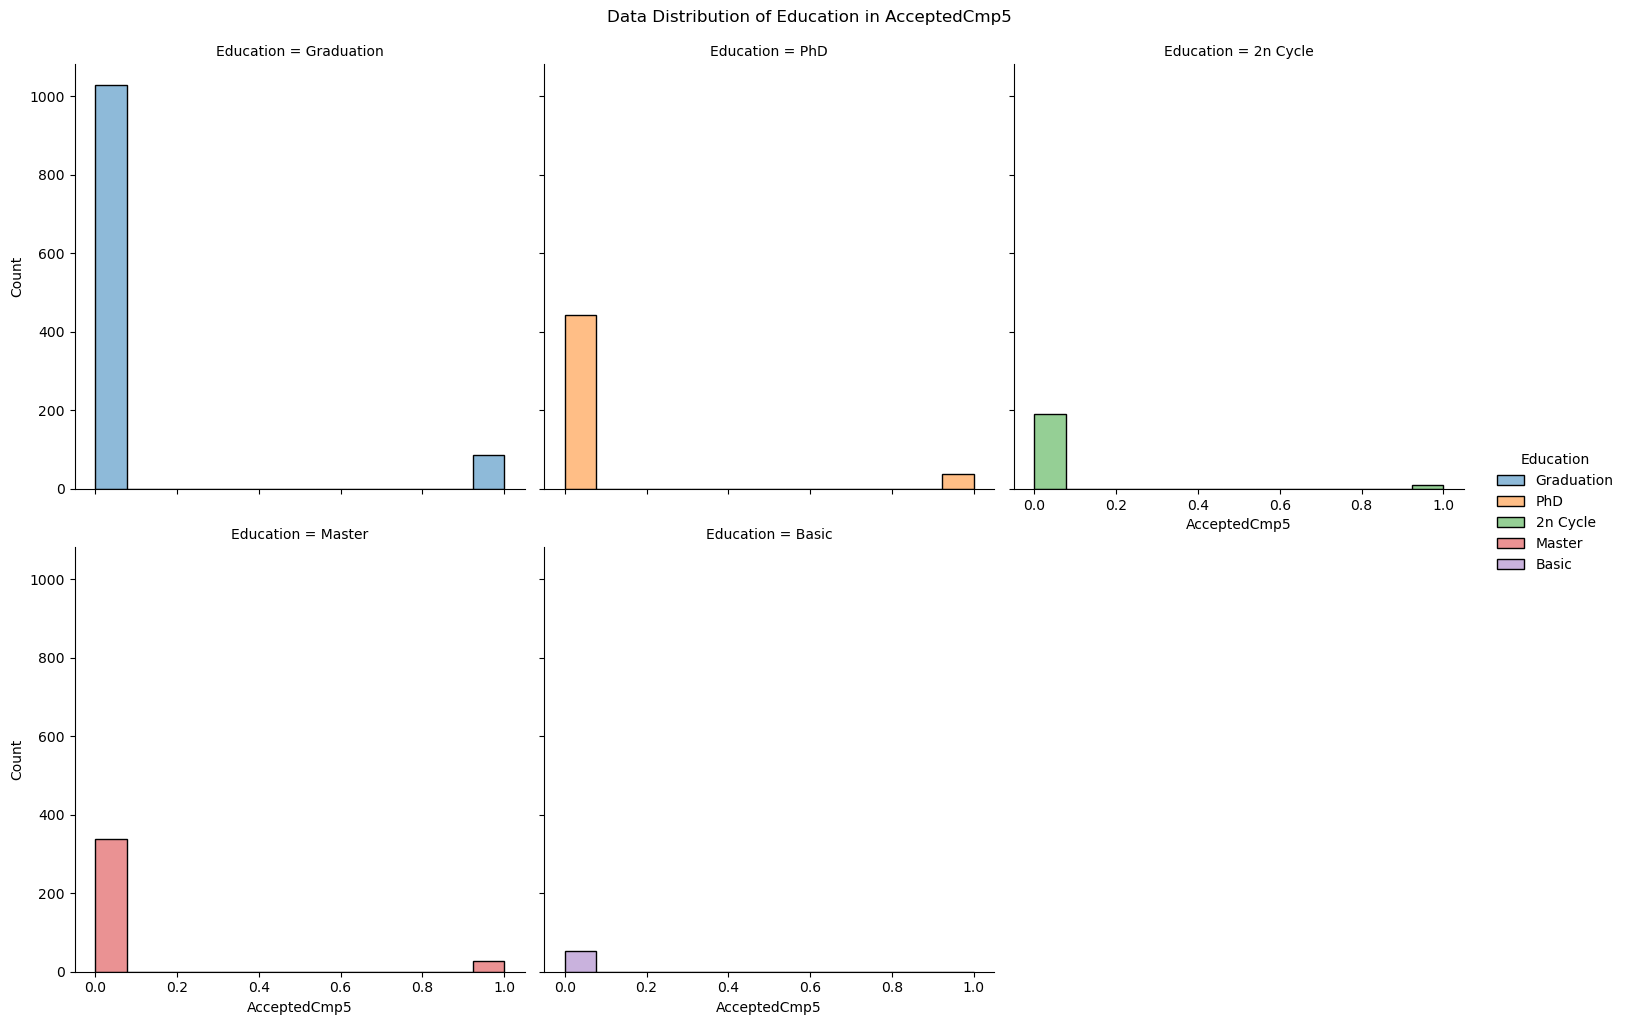

<Figure size 1400x1200 with 0 Axes>

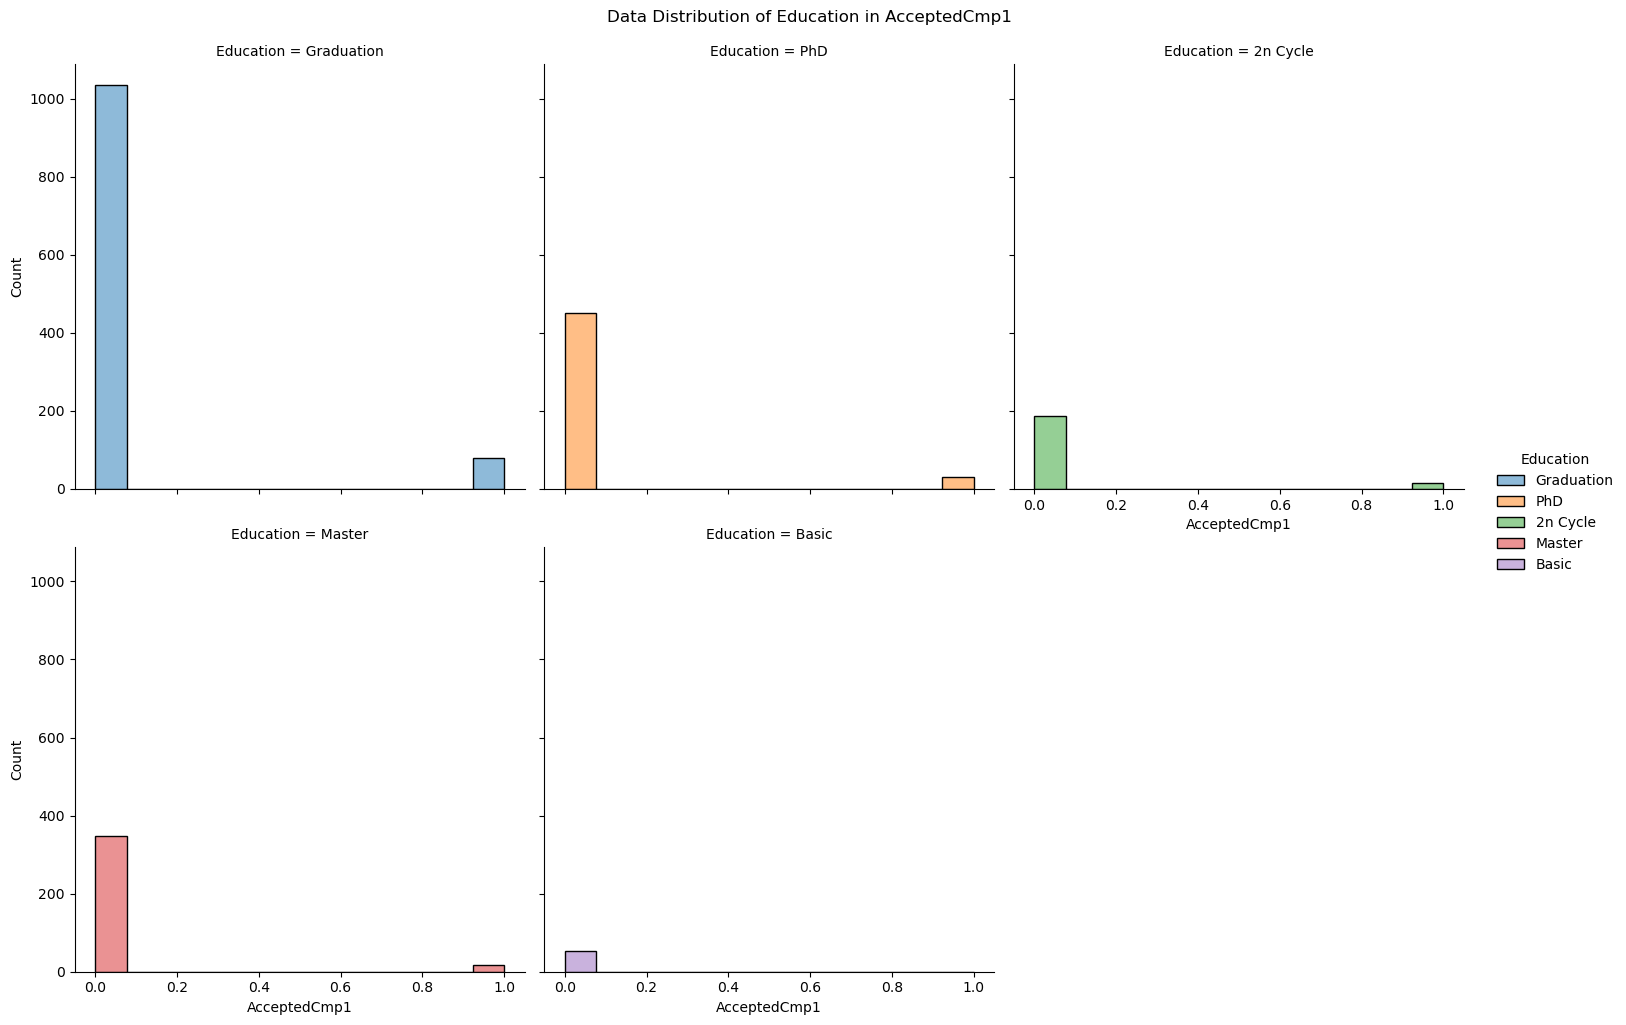

<Figure size 1400x1200 with 0 Axes>

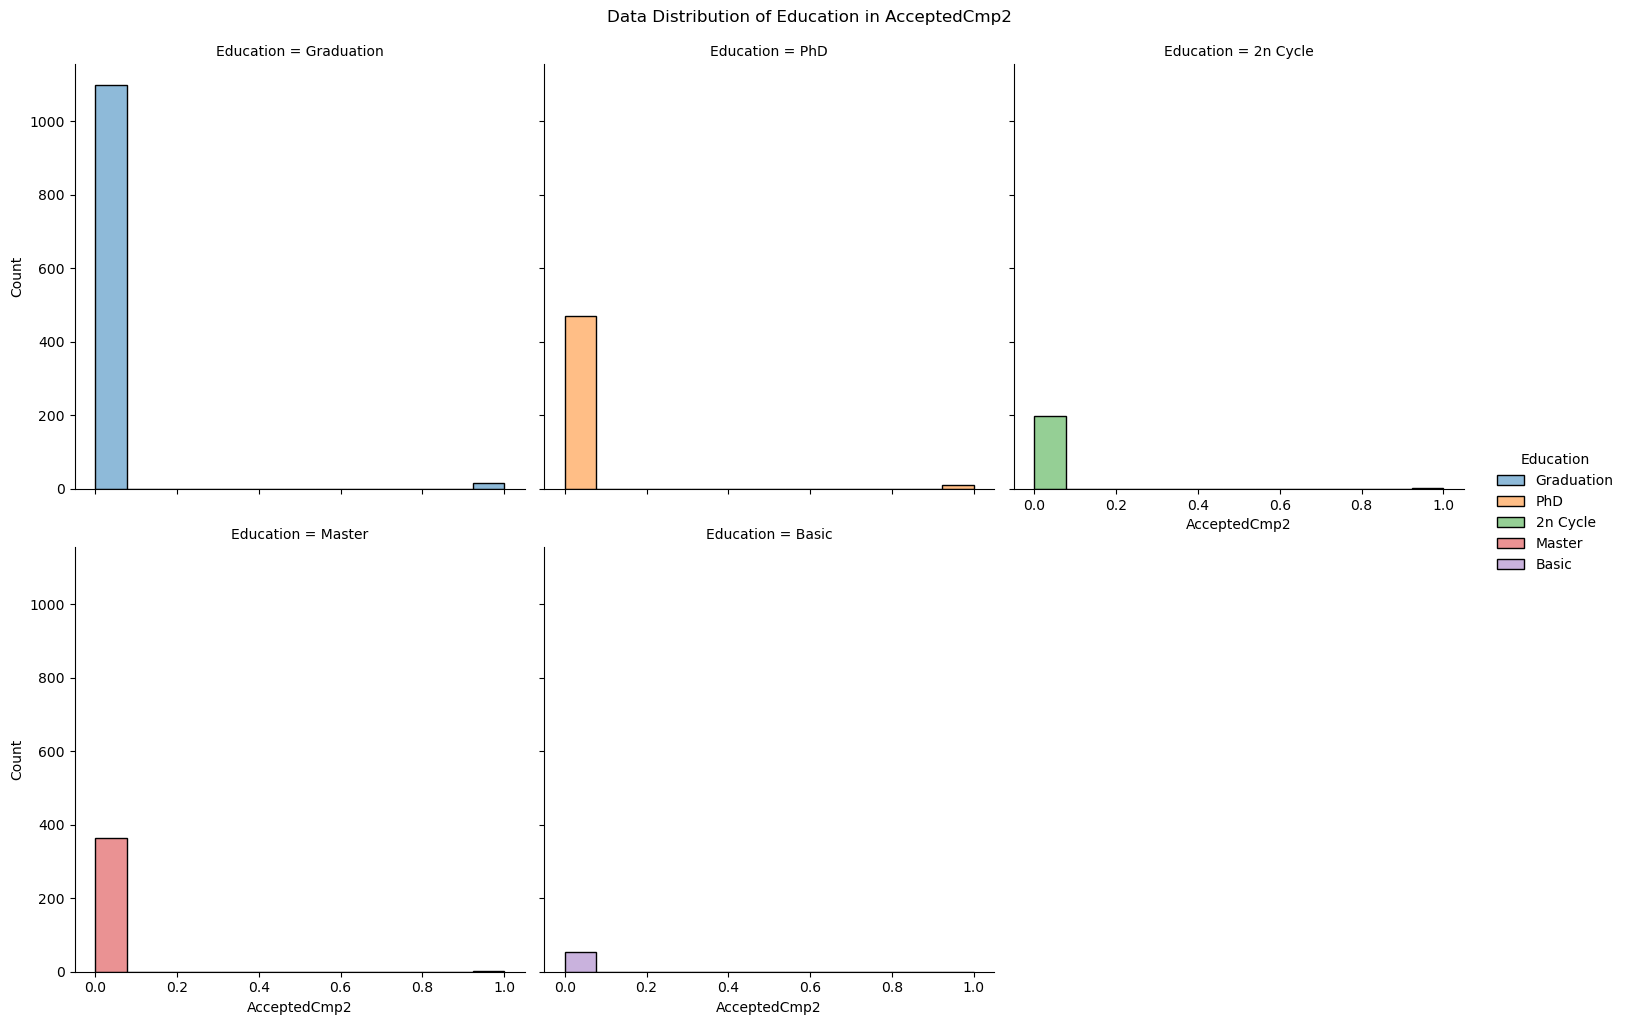

<Figure size 1400x1200 with 0 Axes>

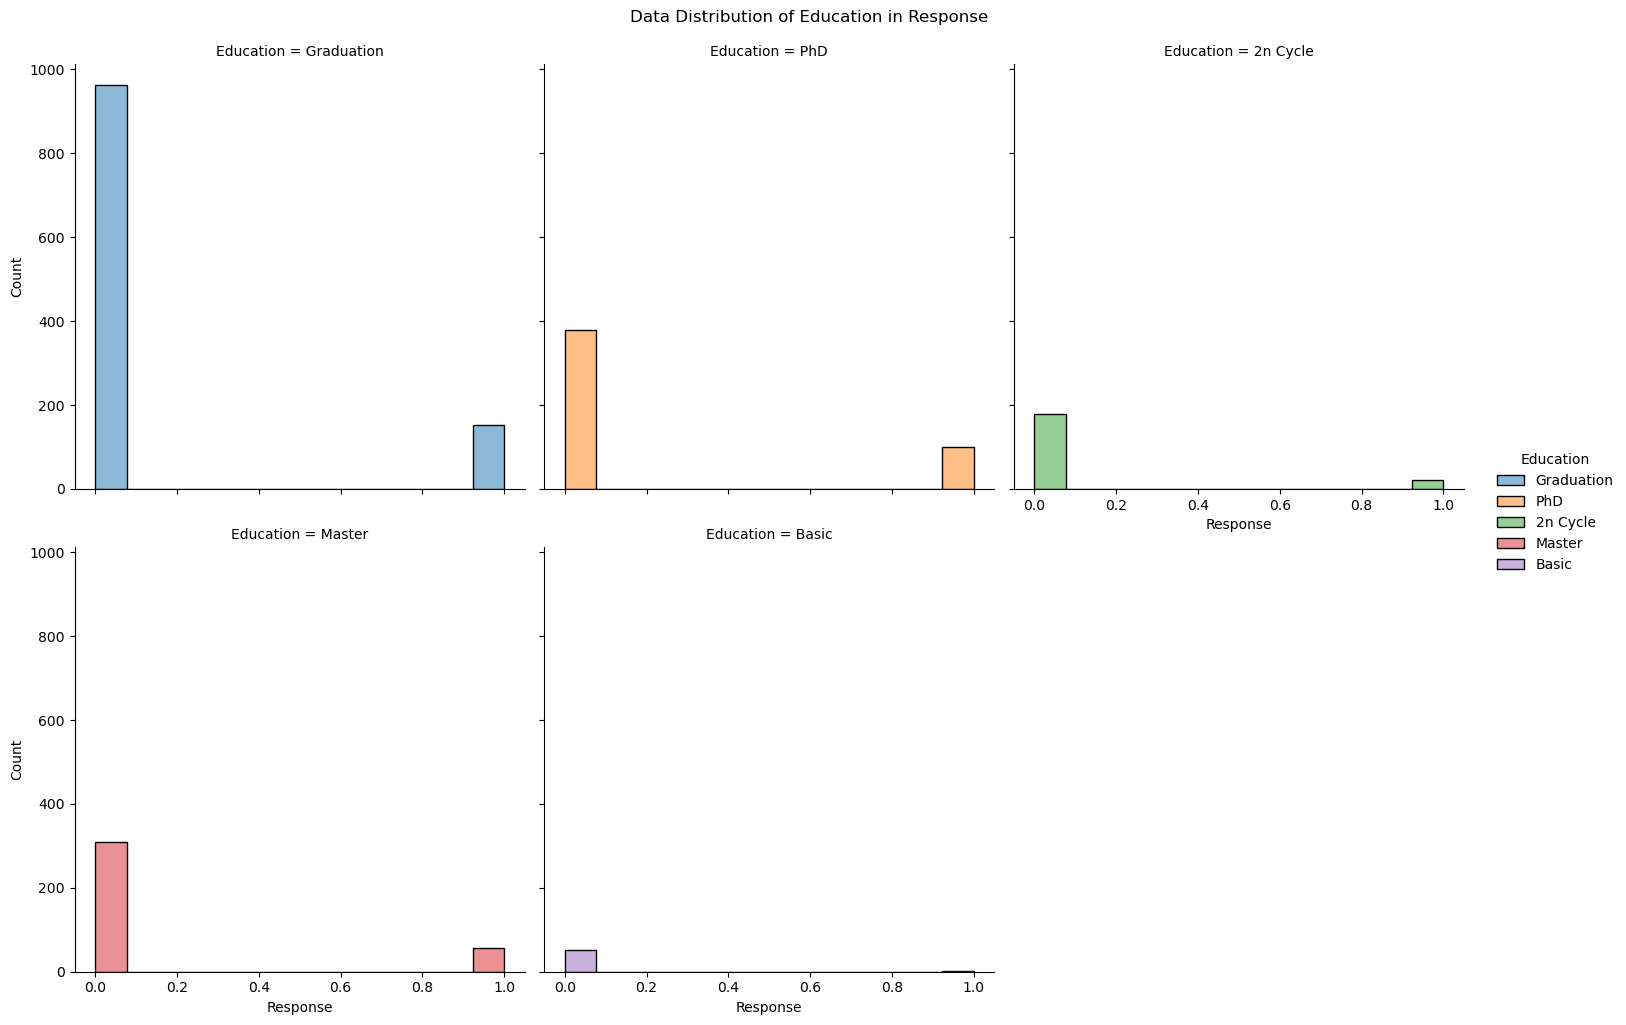

<Figure size 1400x1200 with 0 Axes>

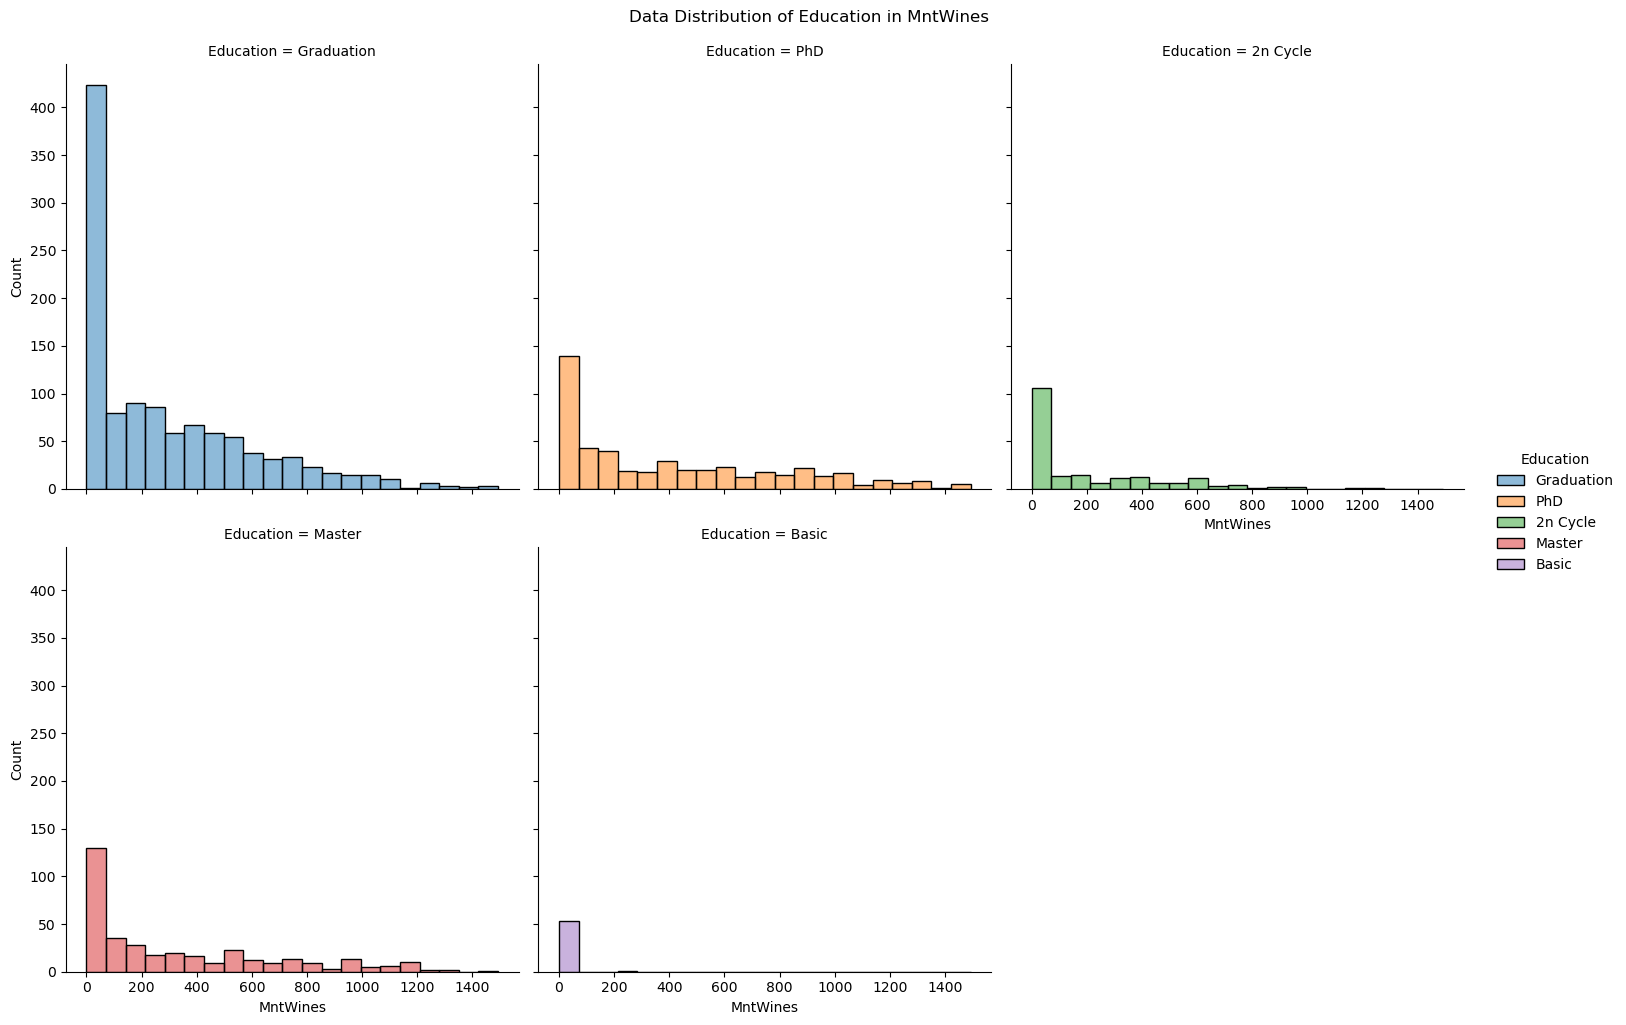

<Figure size 1400x1200 with 0 Axes>

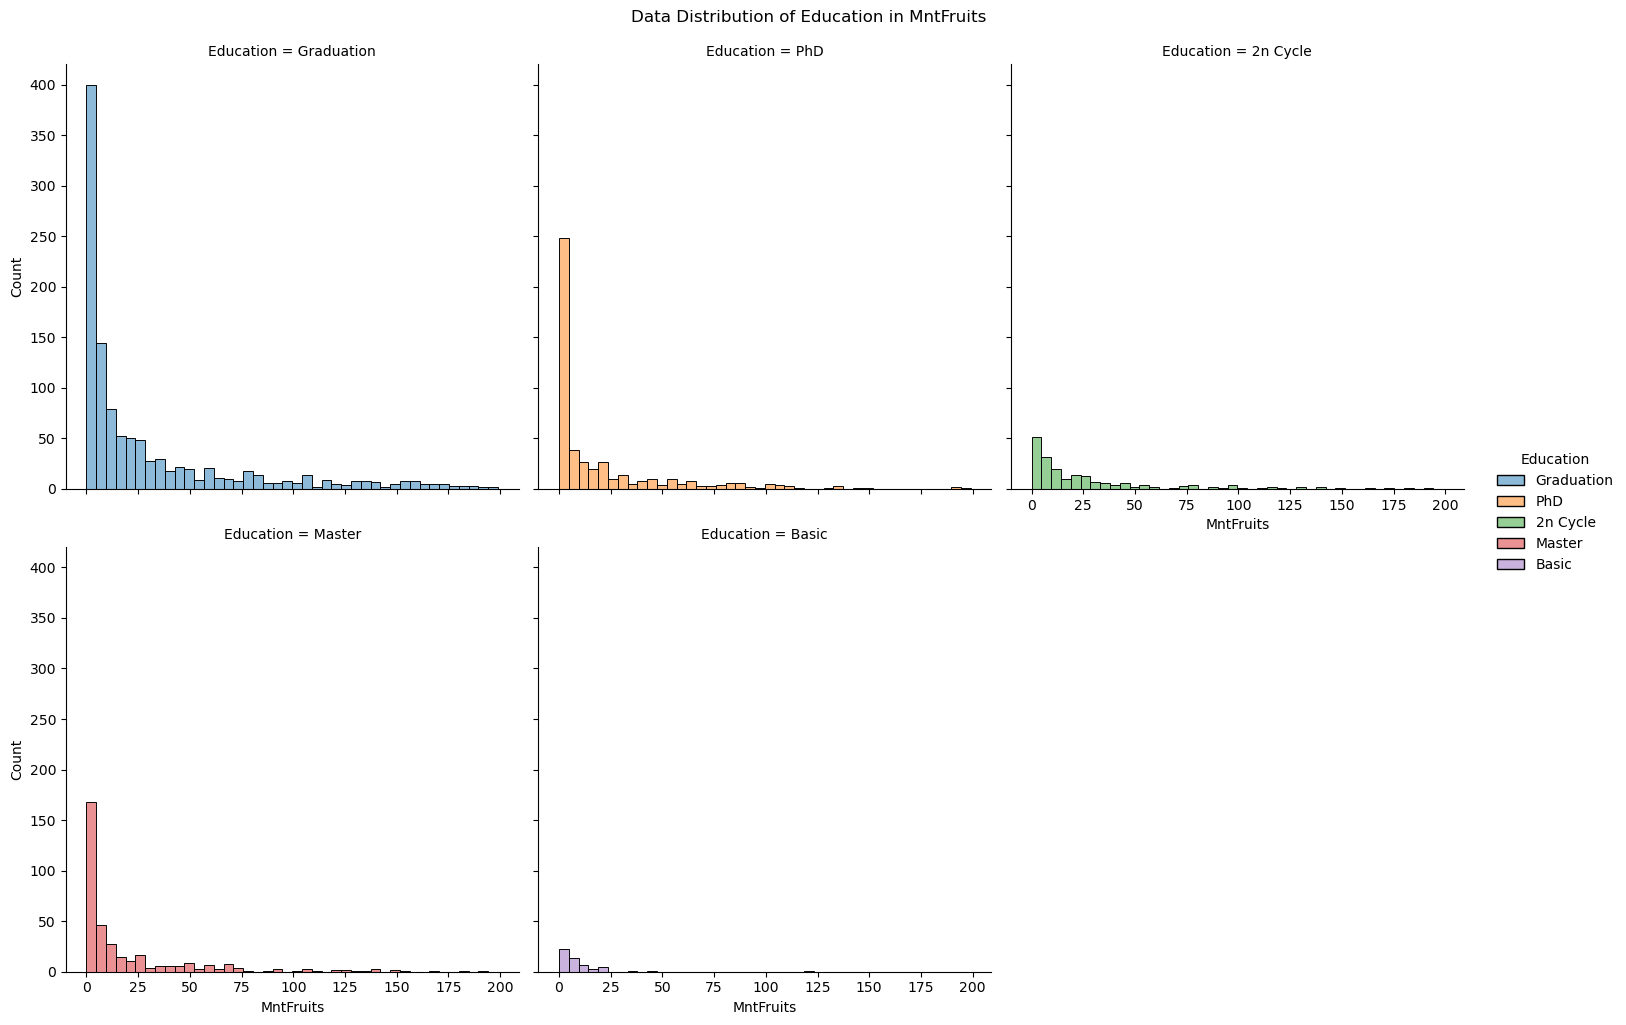

<Figure size 1400x1200 with 0 Axes>

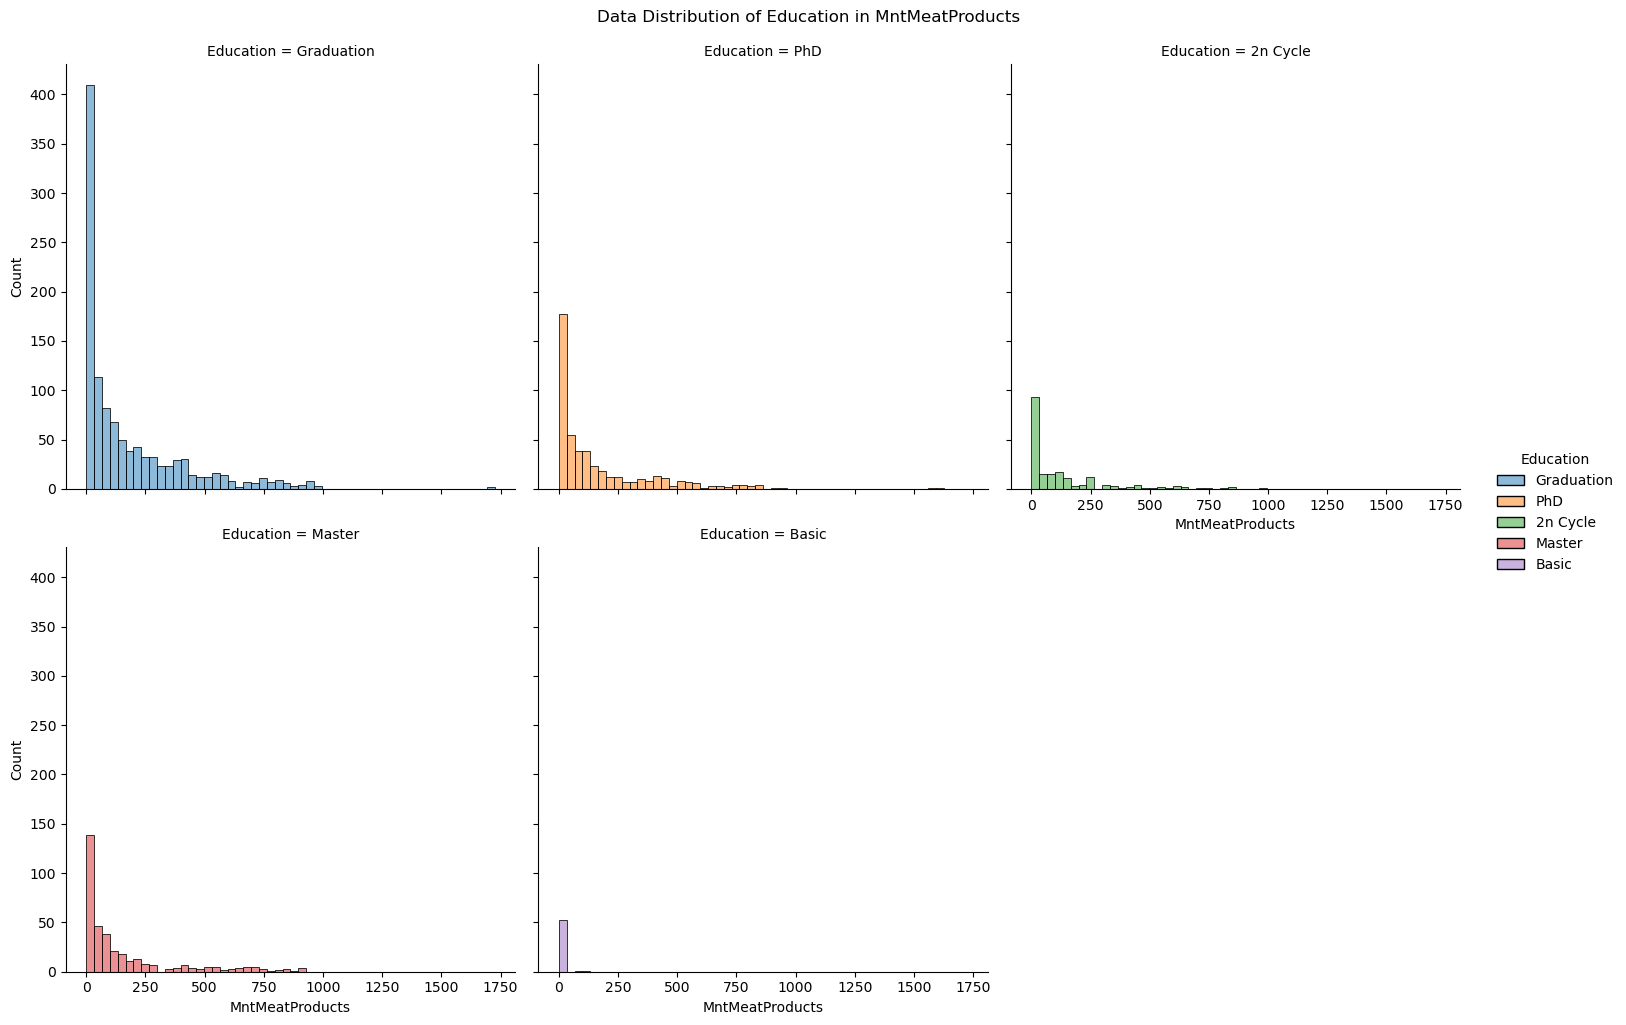

<Figure size 1400x1200 with 0 Axes>

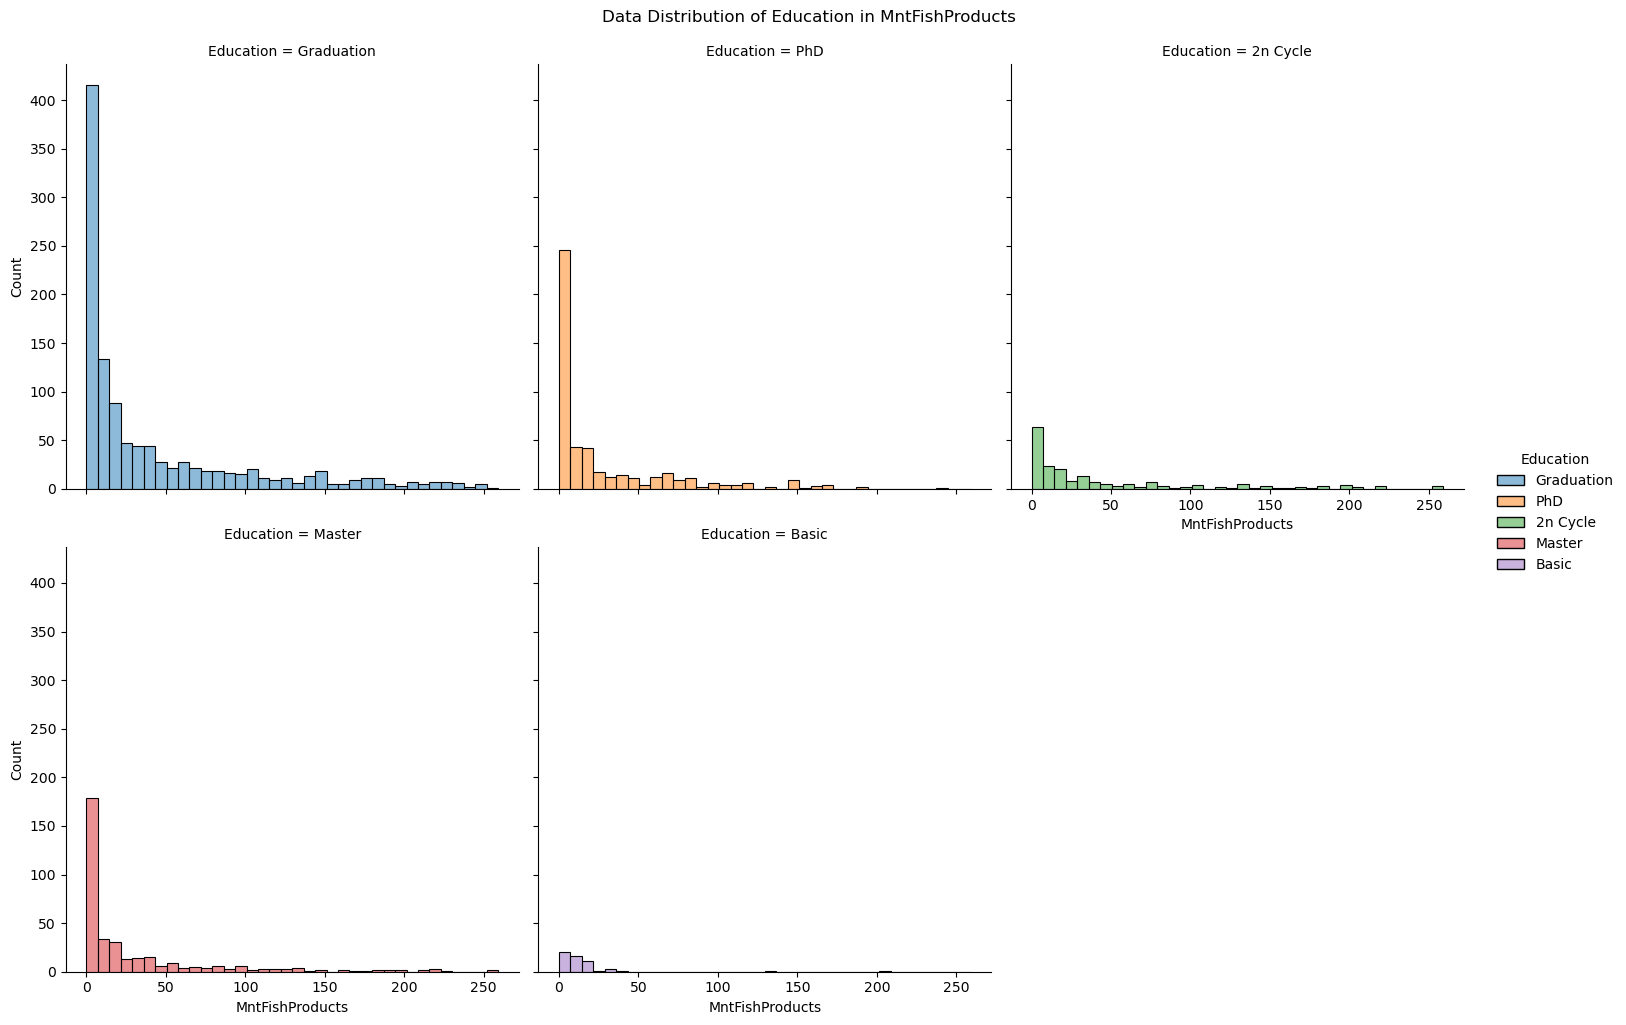

In [28]:
def box_plot_analysis(data,X,Y):
    for x1, y1 in zip(X, Y):
        plt.figure(figsize=(14, 12))
        ax = sns.displot(data=data, x=x1, hue=y1, col=y1,col_wrap=3)
        title_name =  f"Data Distribution of {y1} in {x1}"
        #title_name = r"\textbf{Data Distribution of " + f"{y1}" + r" in " + f"{x1}" + "}"
        ax.fig.suptitle(title_name,y=1.02)
        
        plt.show()

X = ["Kidhome","Teenhome","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Response",'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain']
Y = ["Education"]*len(Y )

box_plot_analysis(df,X,Y)

<Figure size 1400x1200 with 0 Axes>

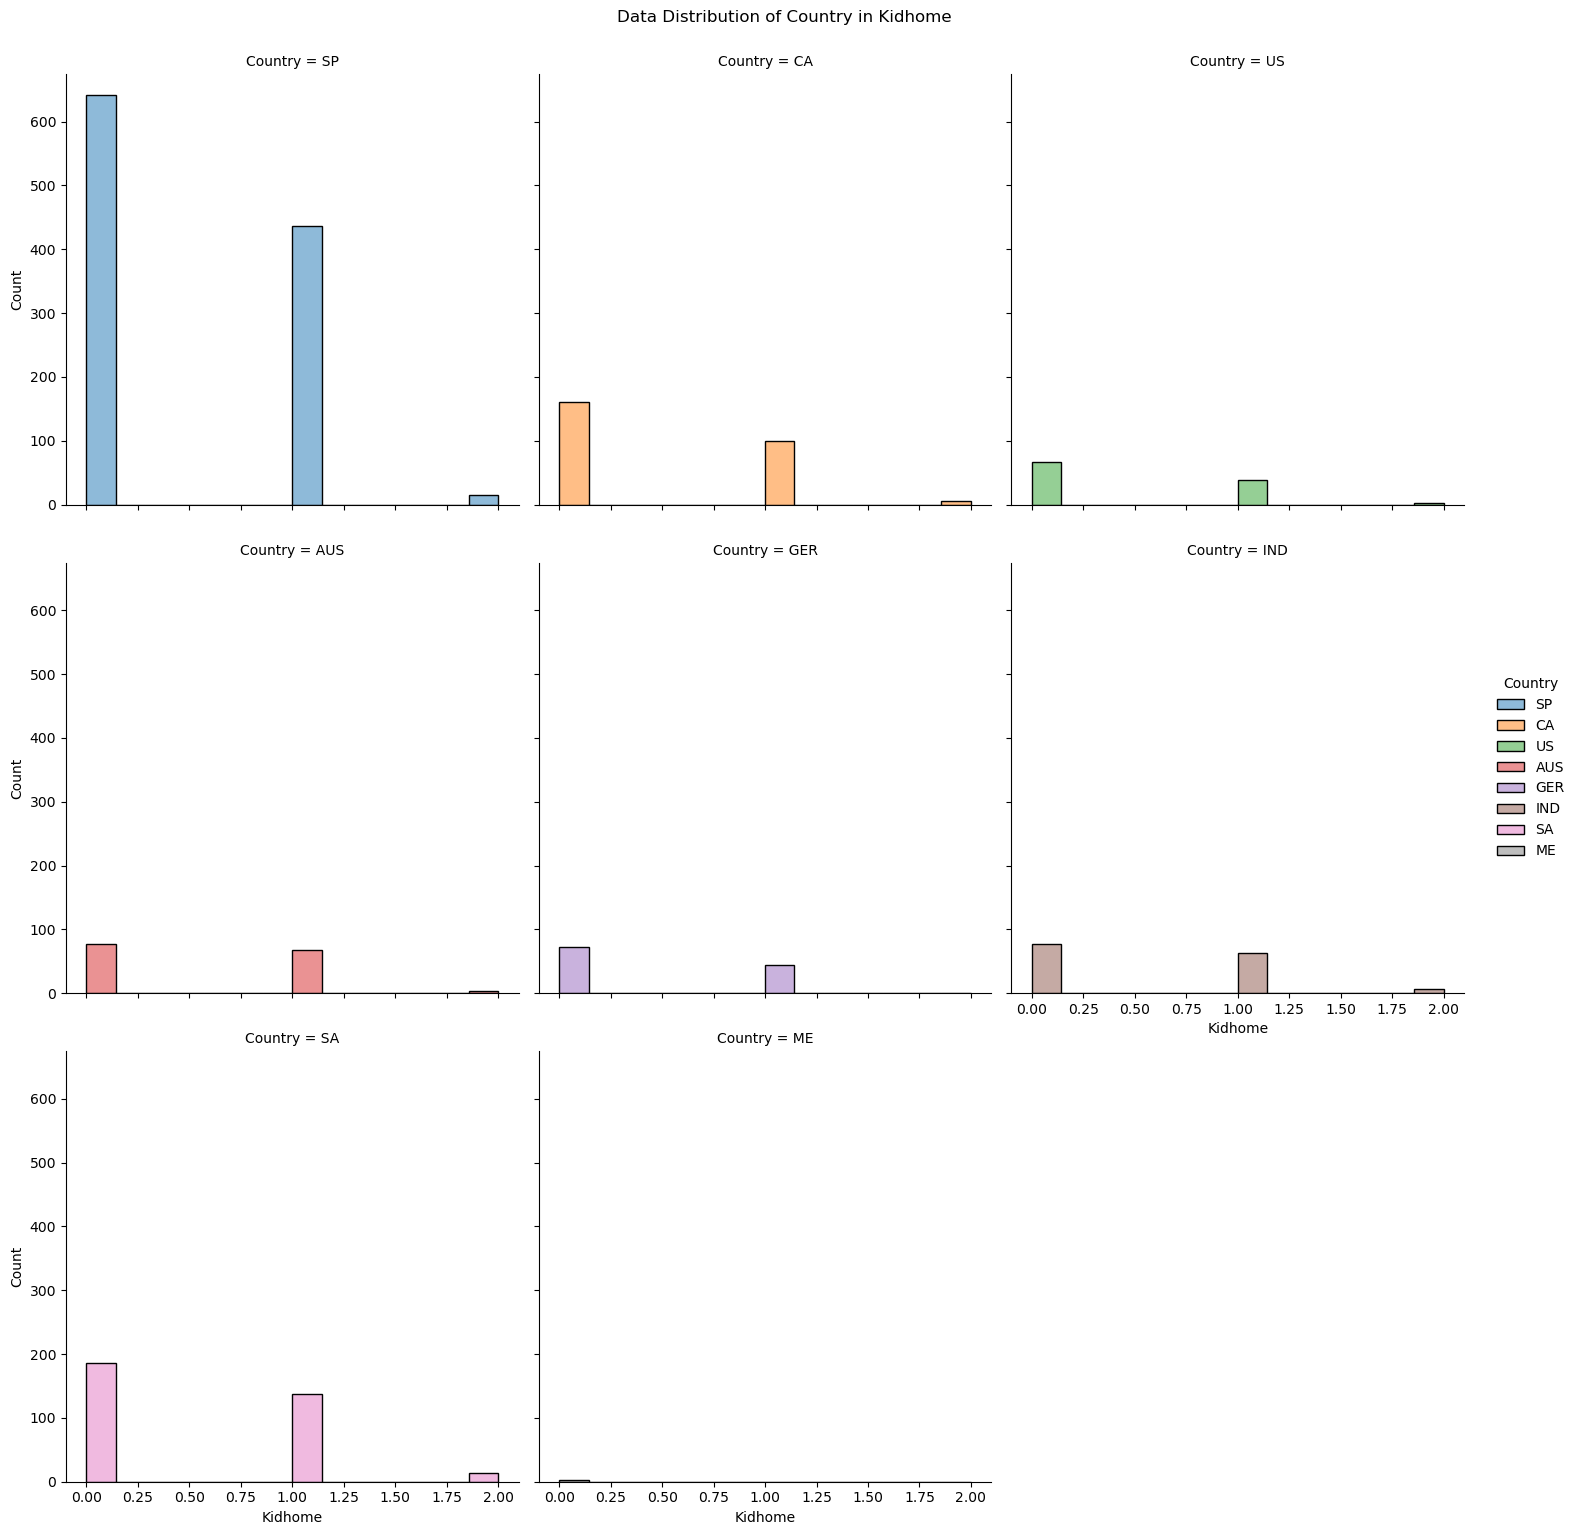

<Figure size 1400x1200 with 0 Axes>

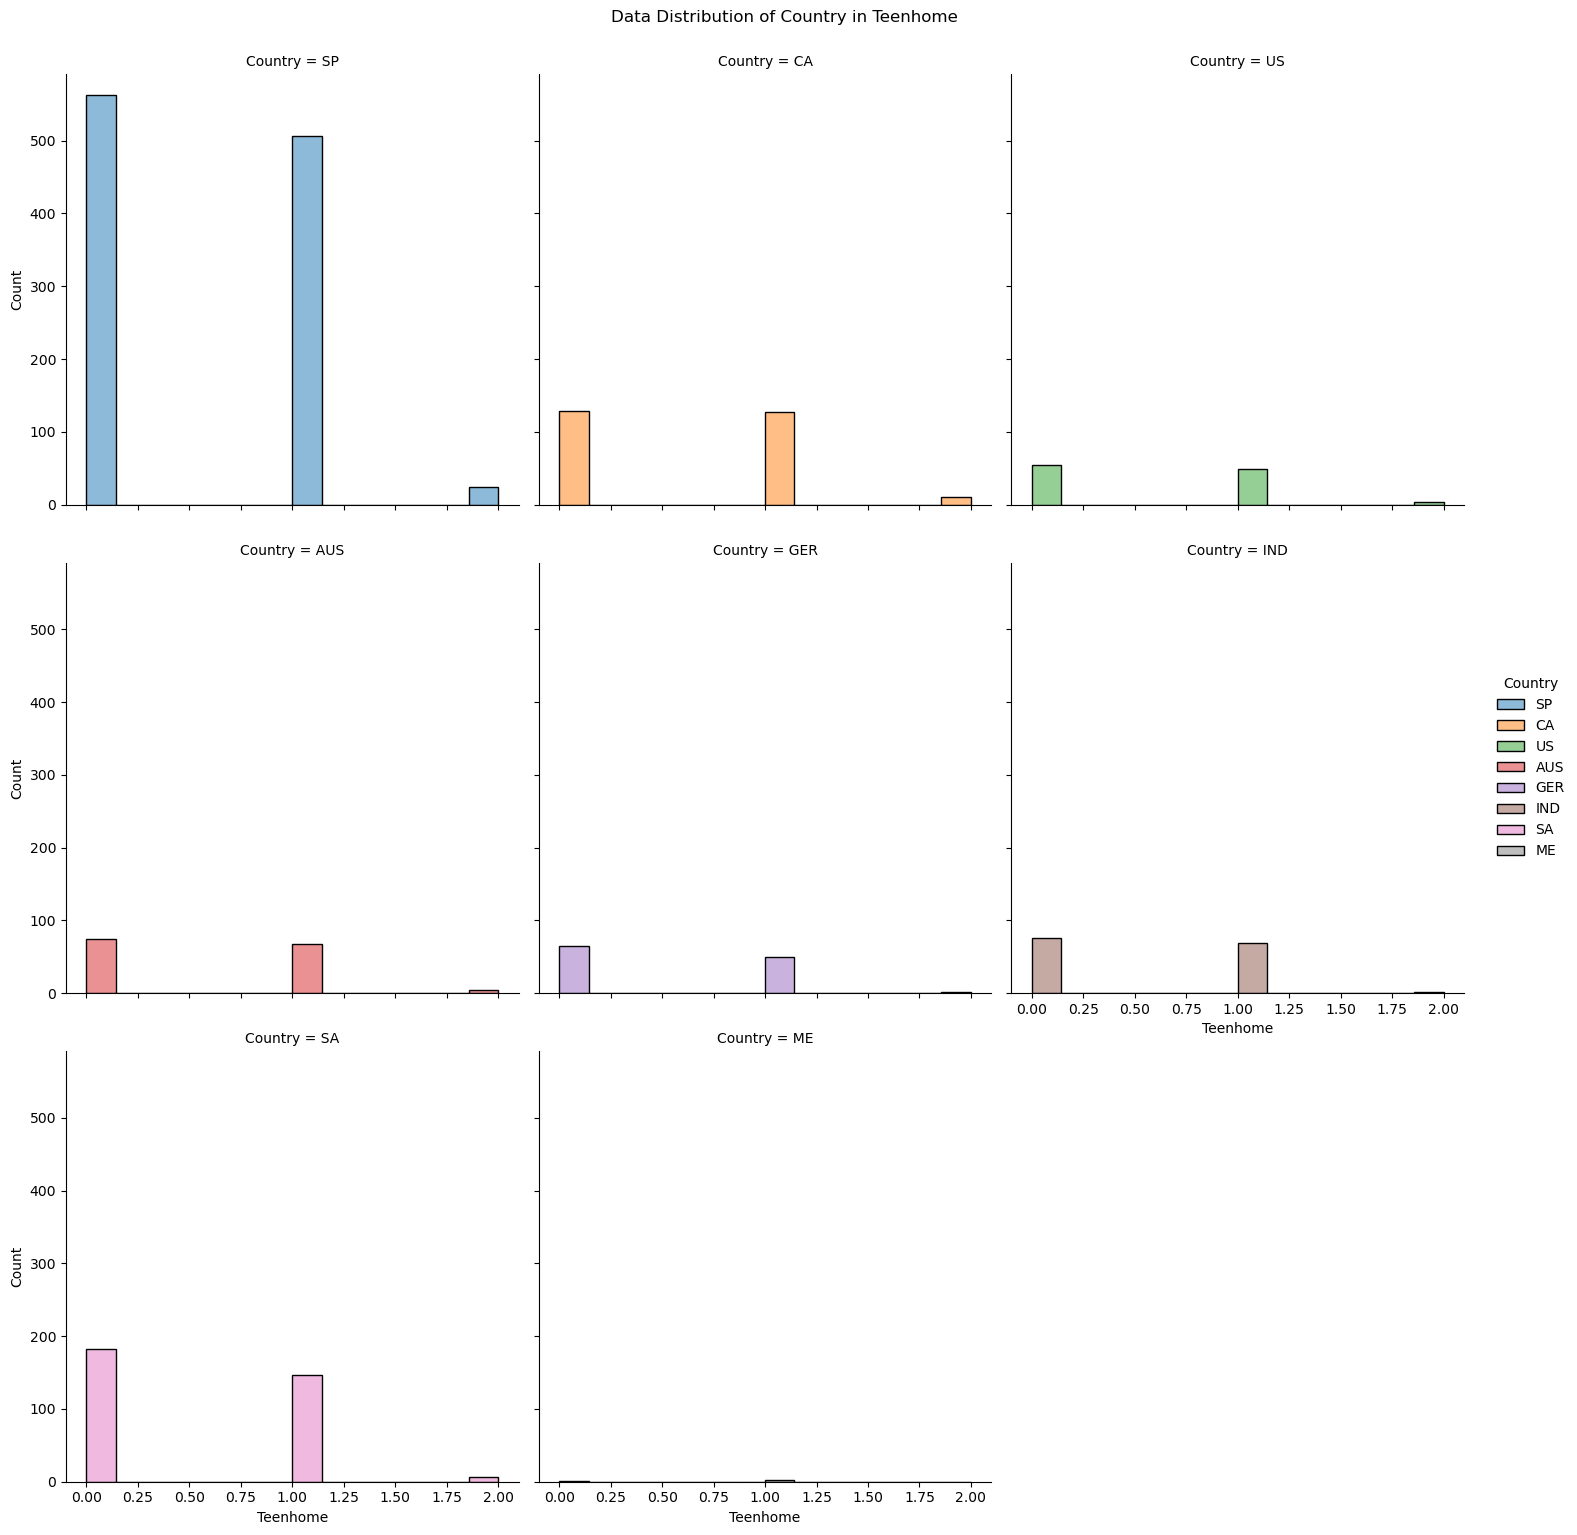

<Figure size 1400x1200 with 0 Axes>

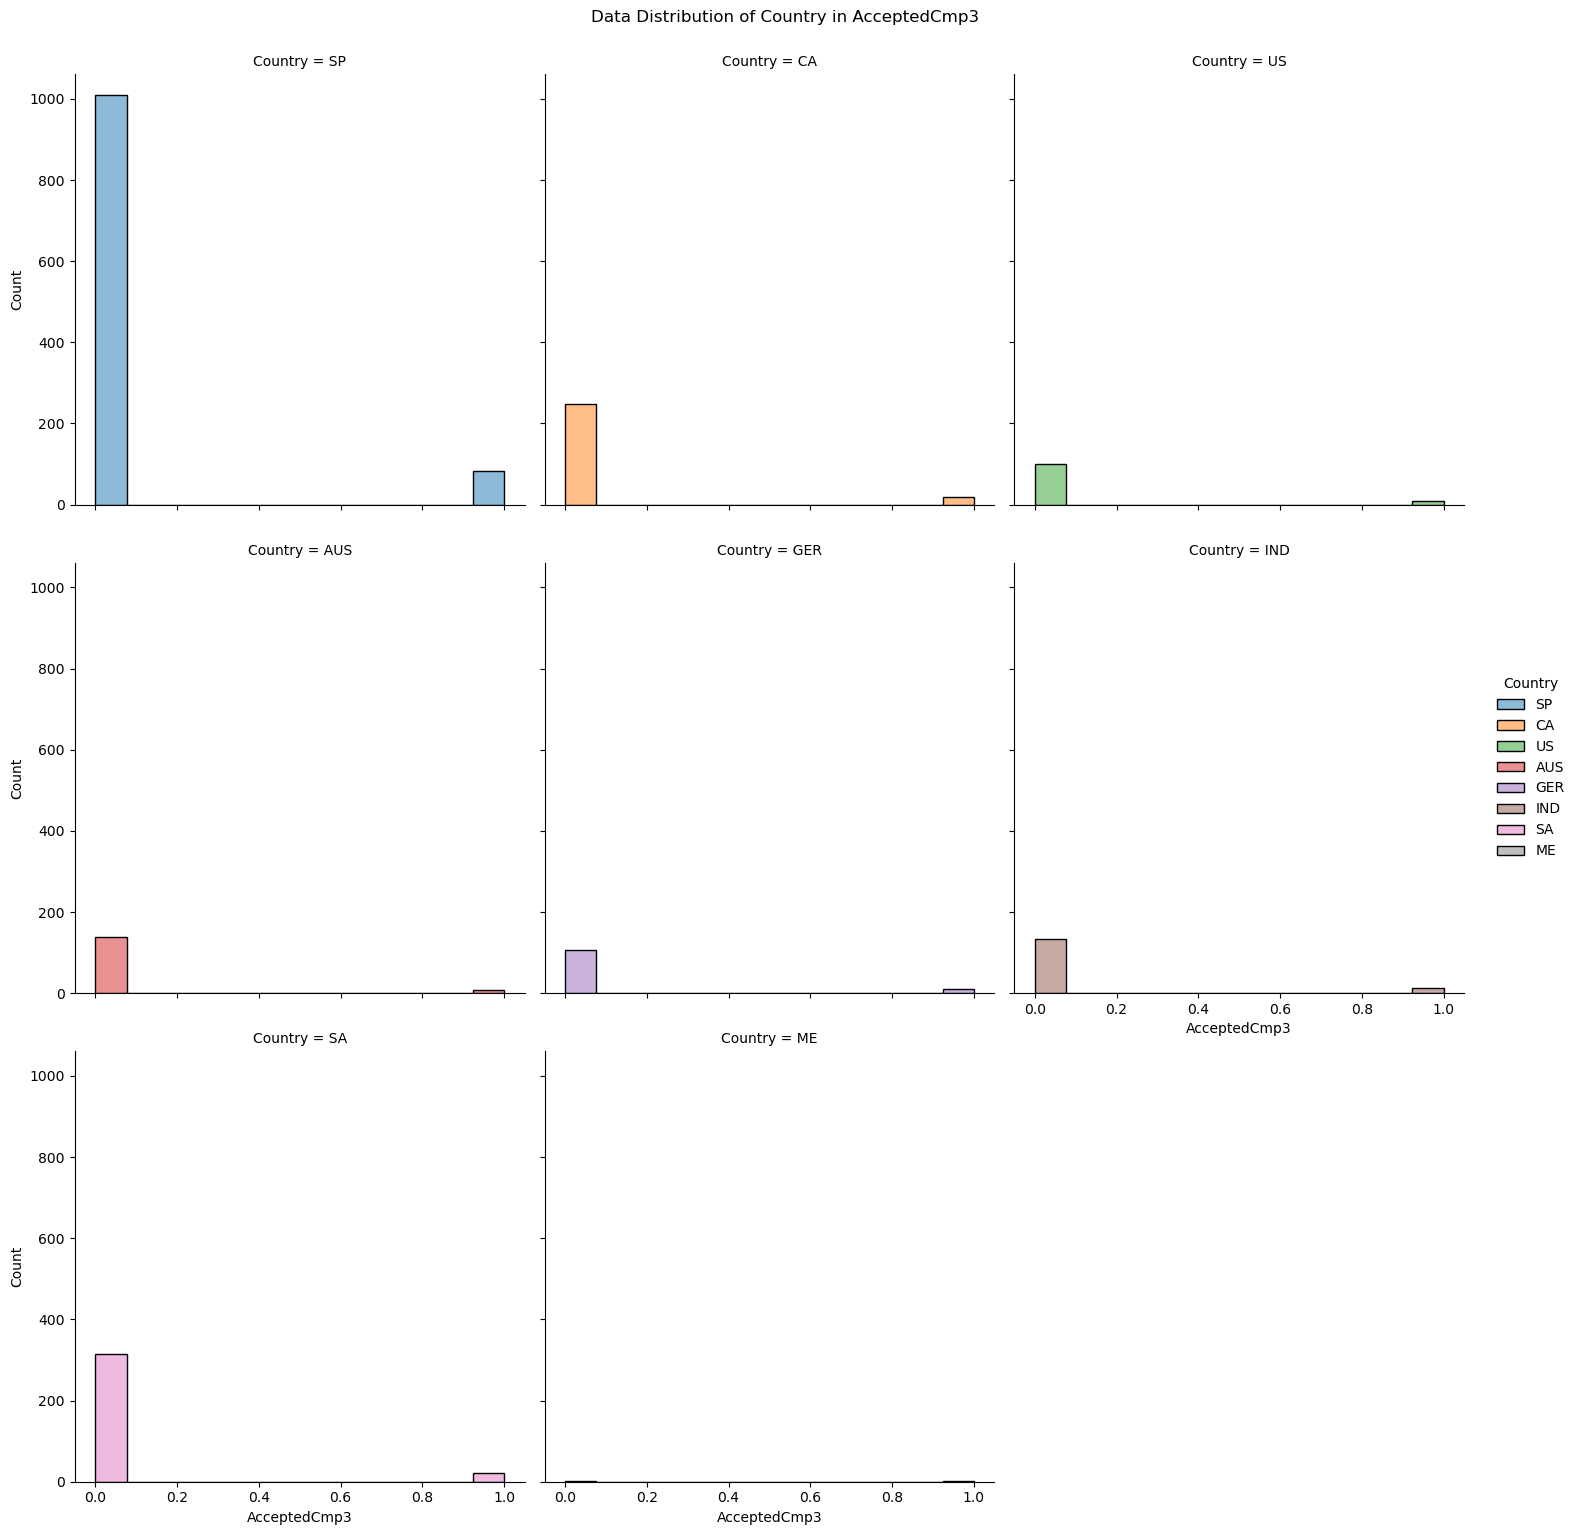

<Figure size 1400x1200 with 0 Axes>

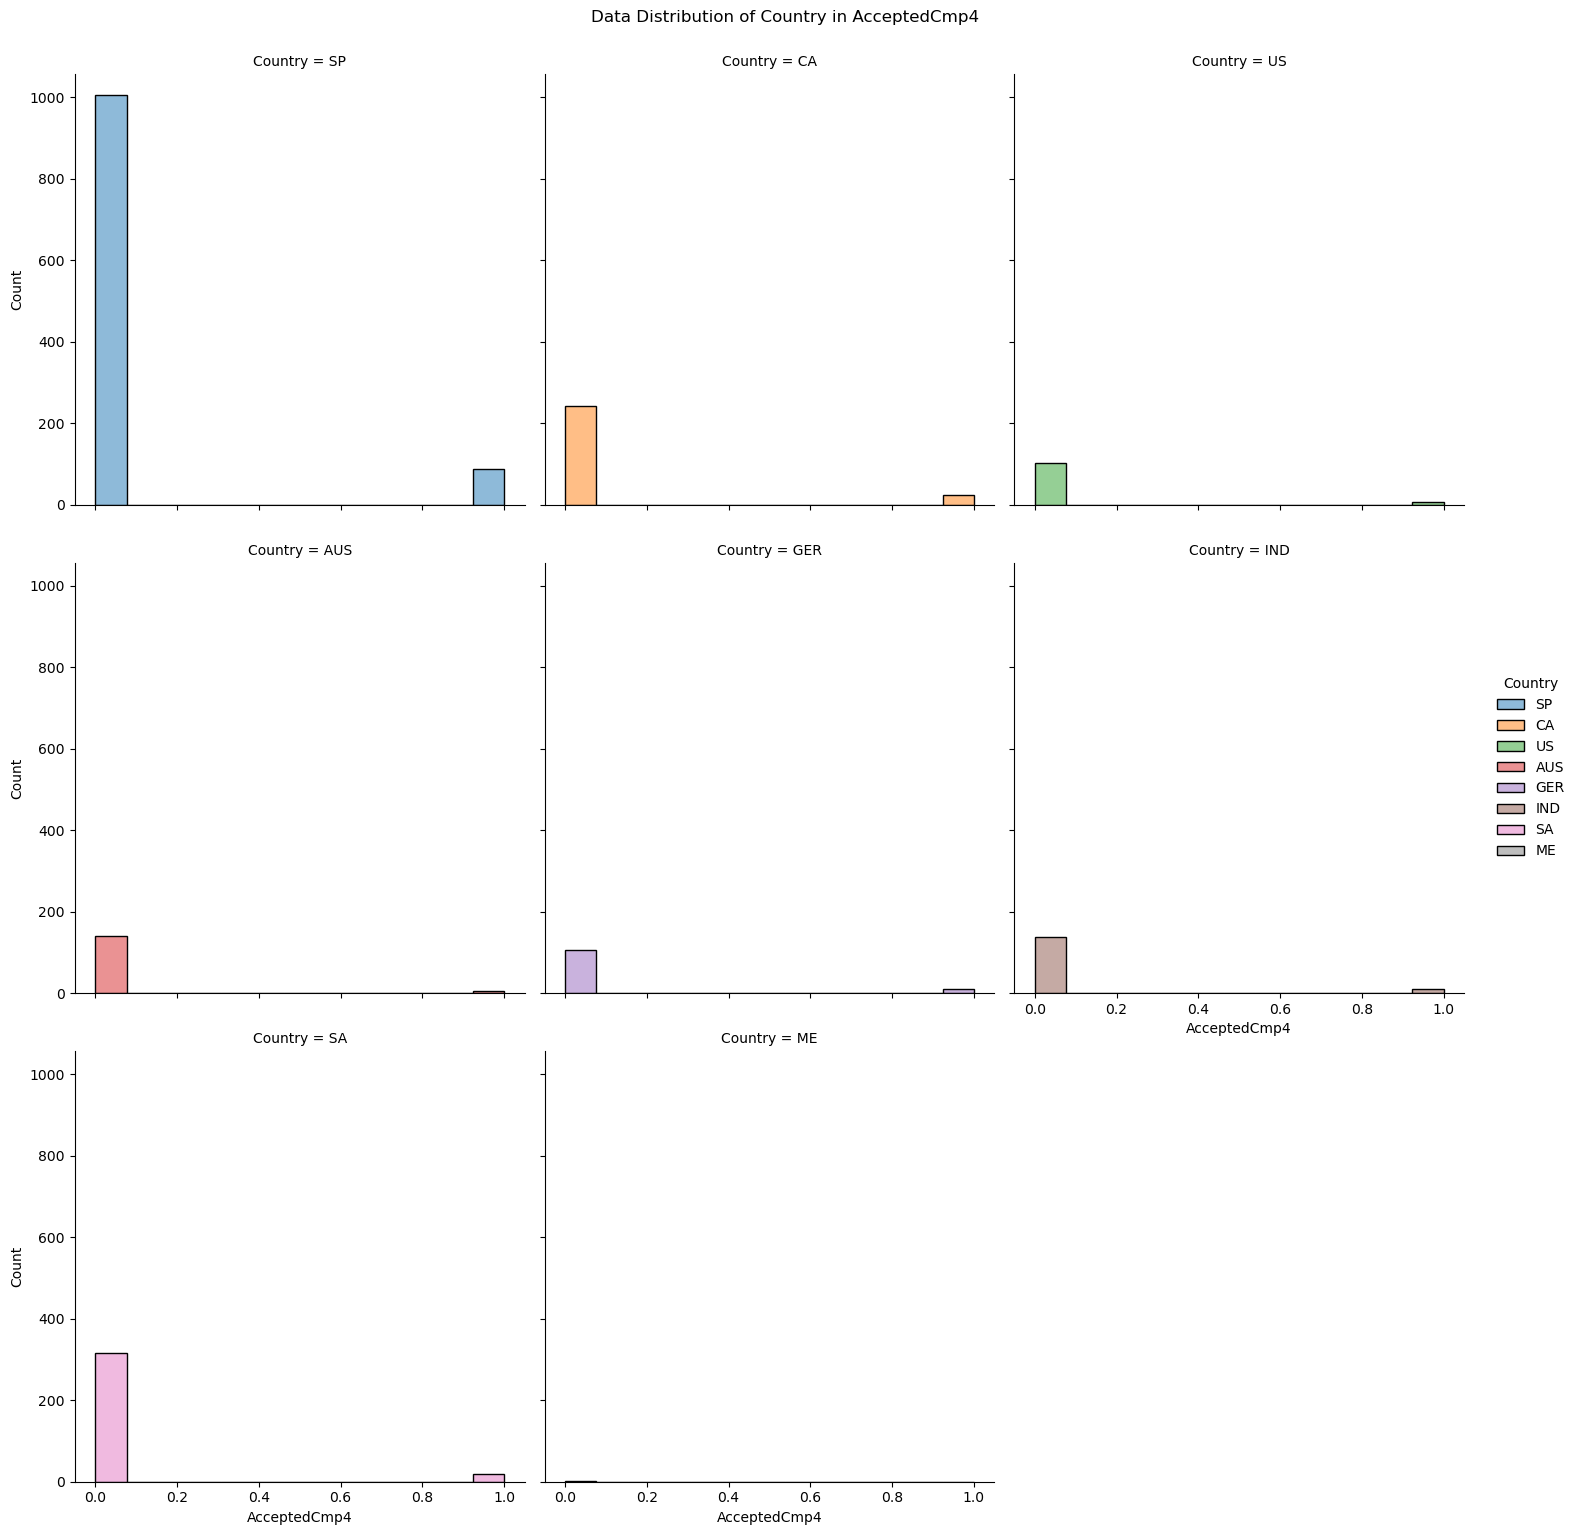

<Figure size 1400x1200 with 0 Axes>

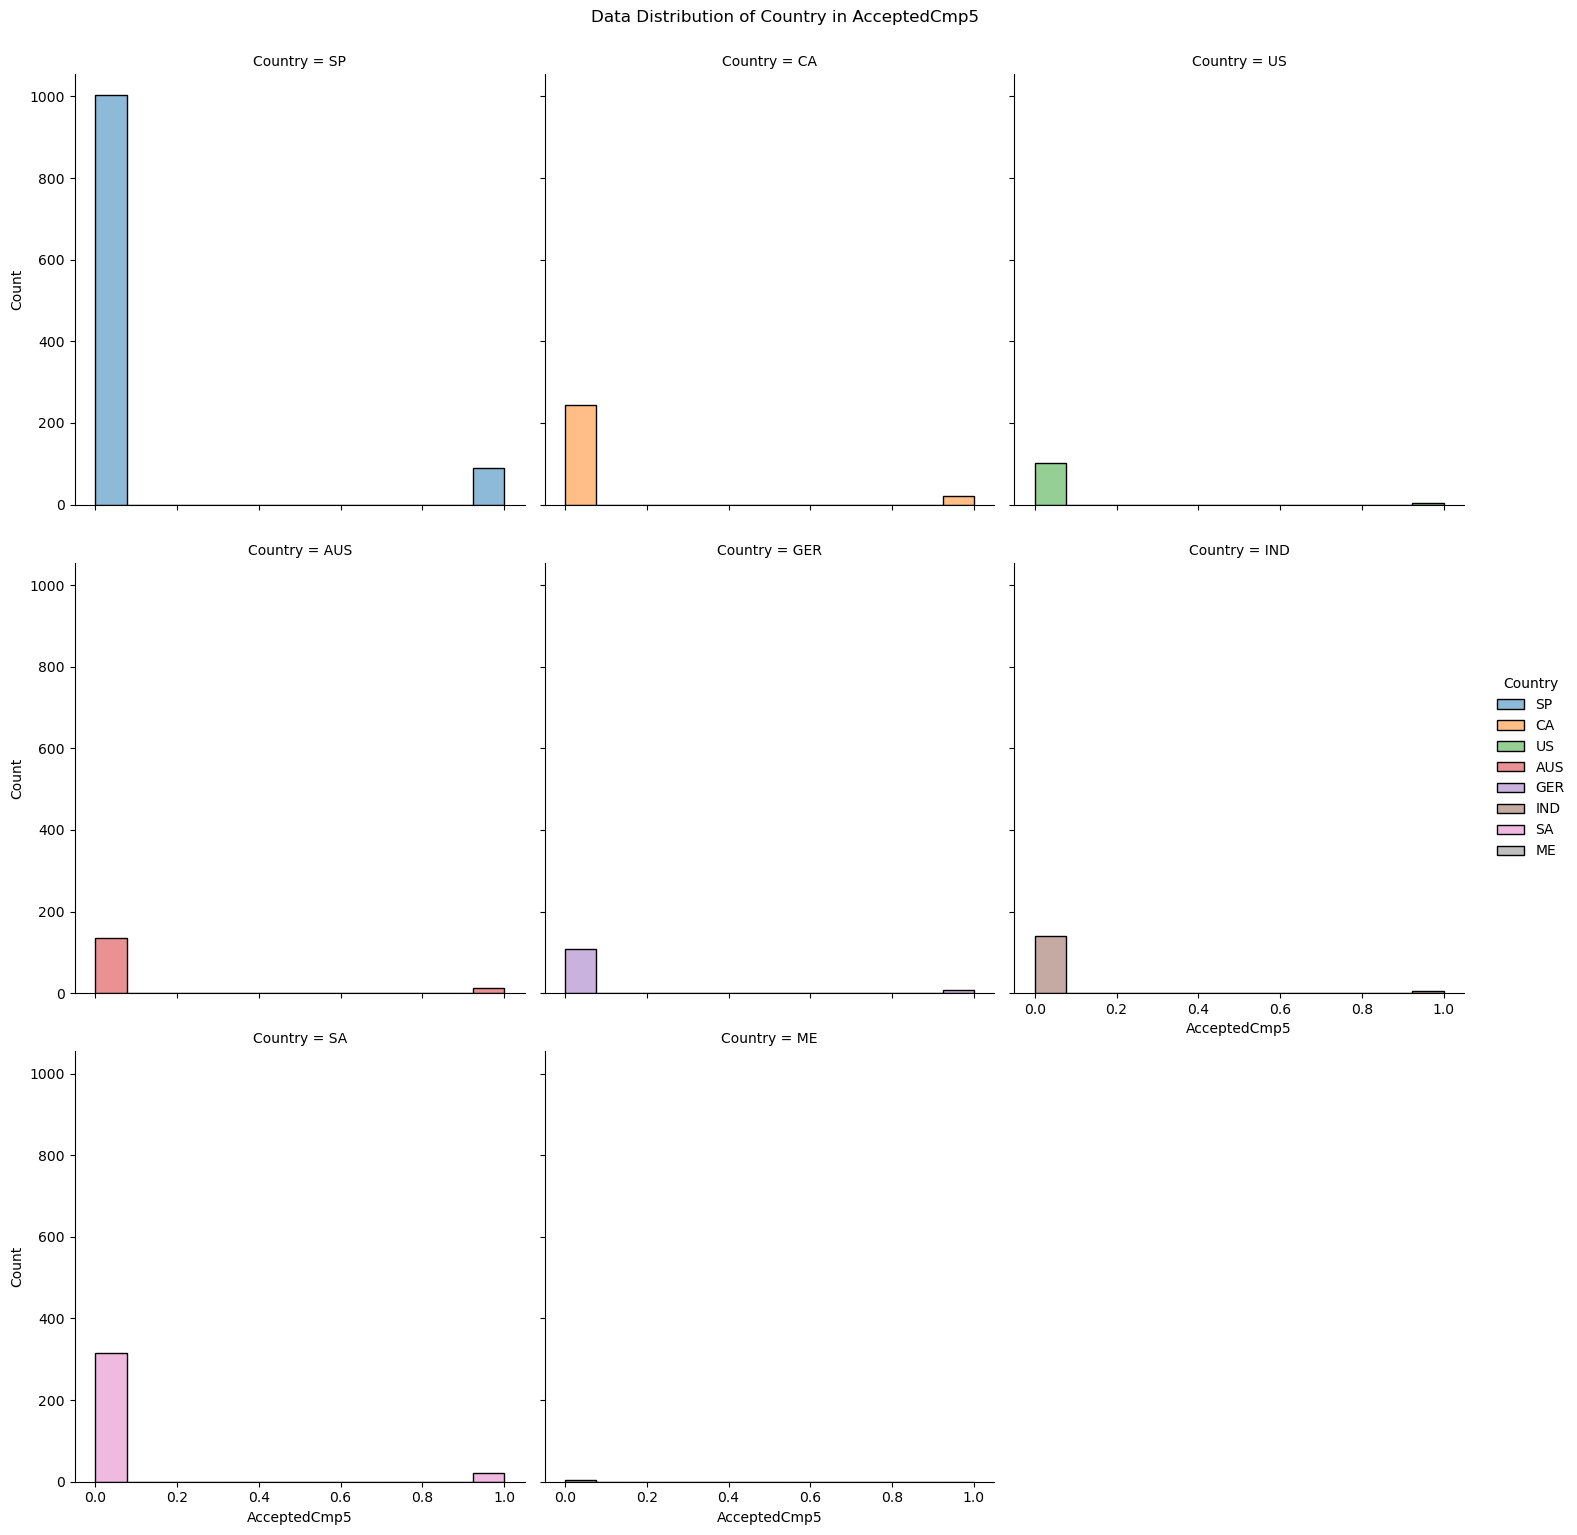

<Figure size 1400x1200 with 0 Axes>

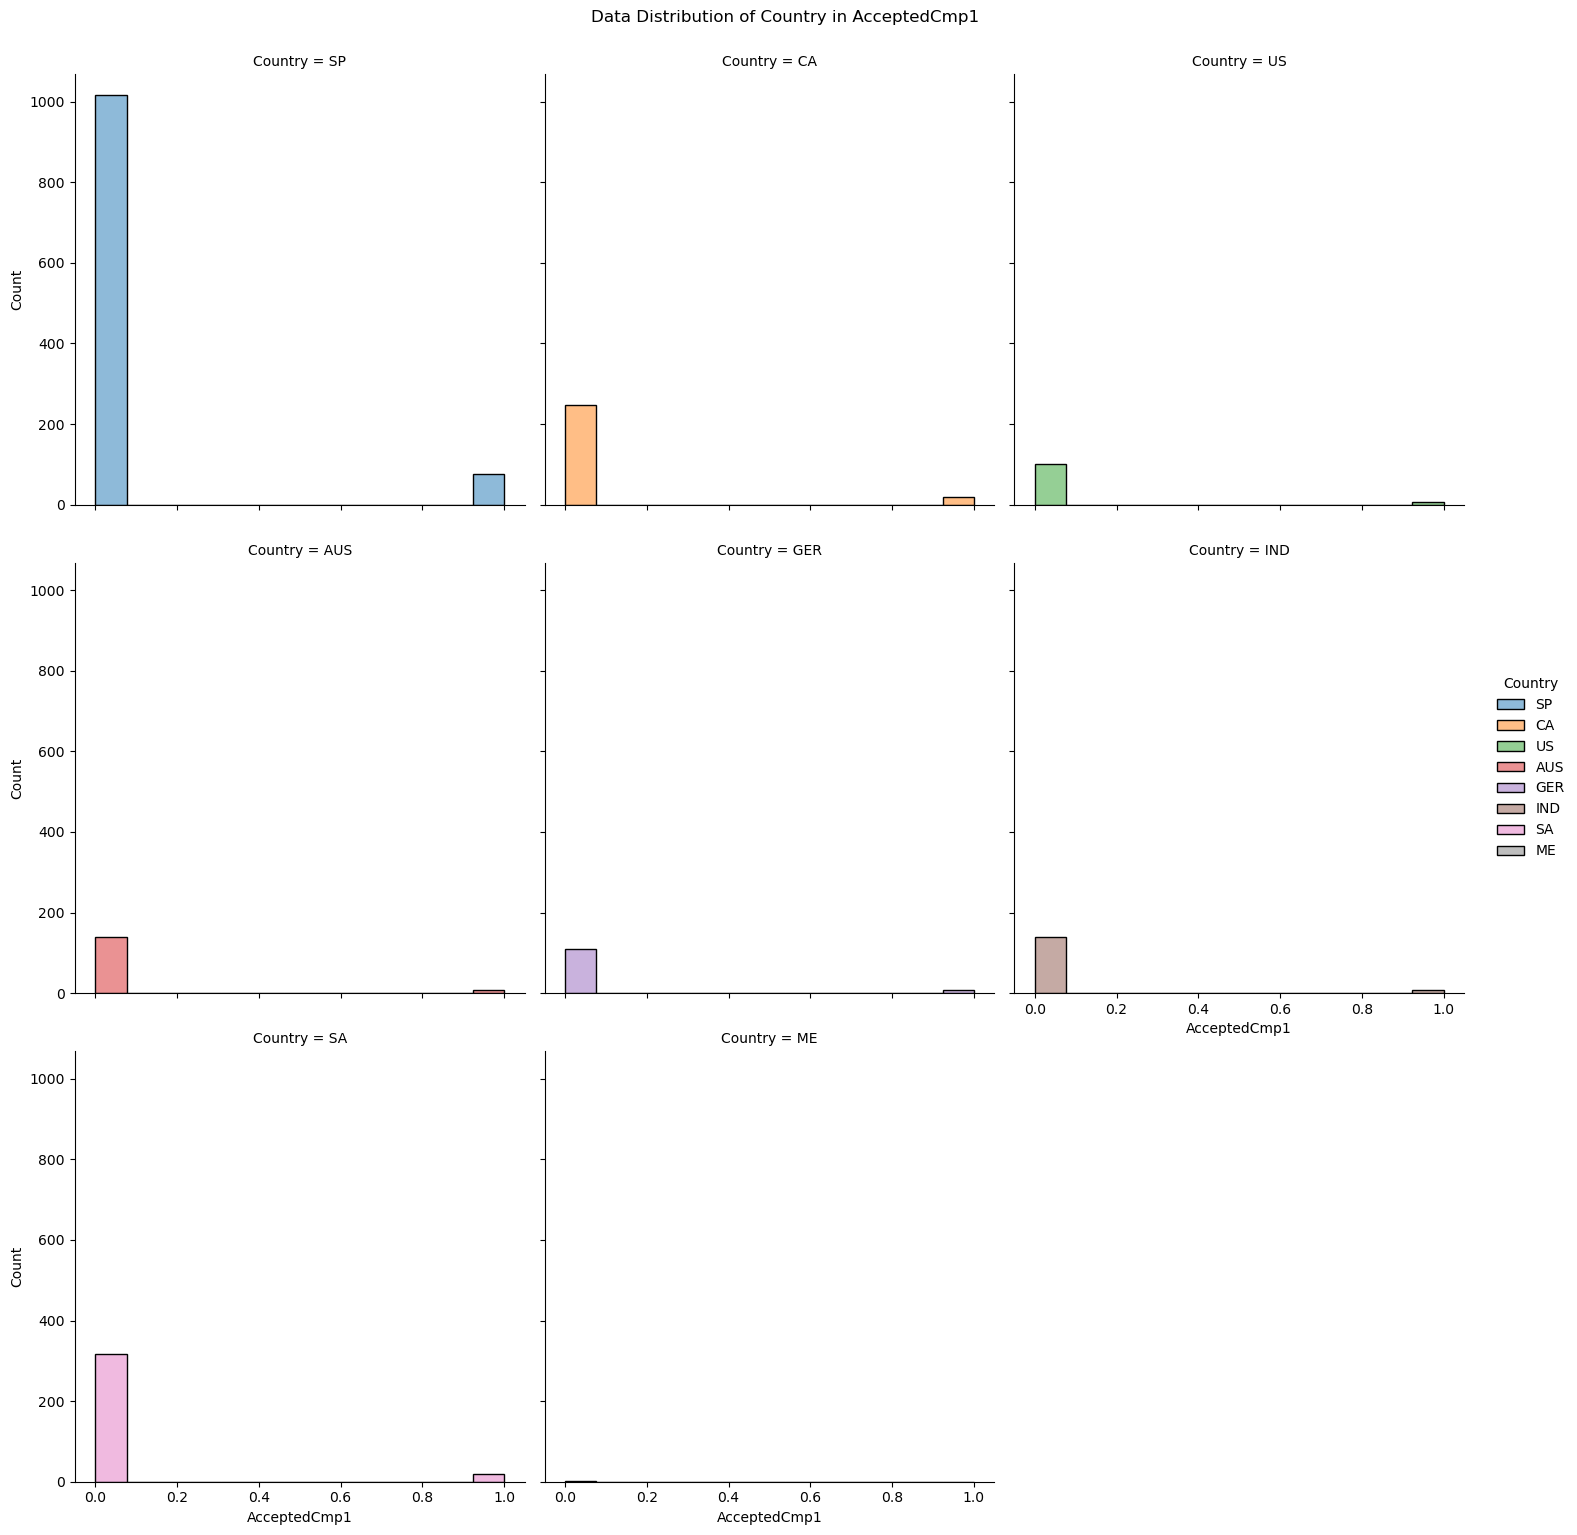

<Figure size 1400x1200 with 0 Axes>

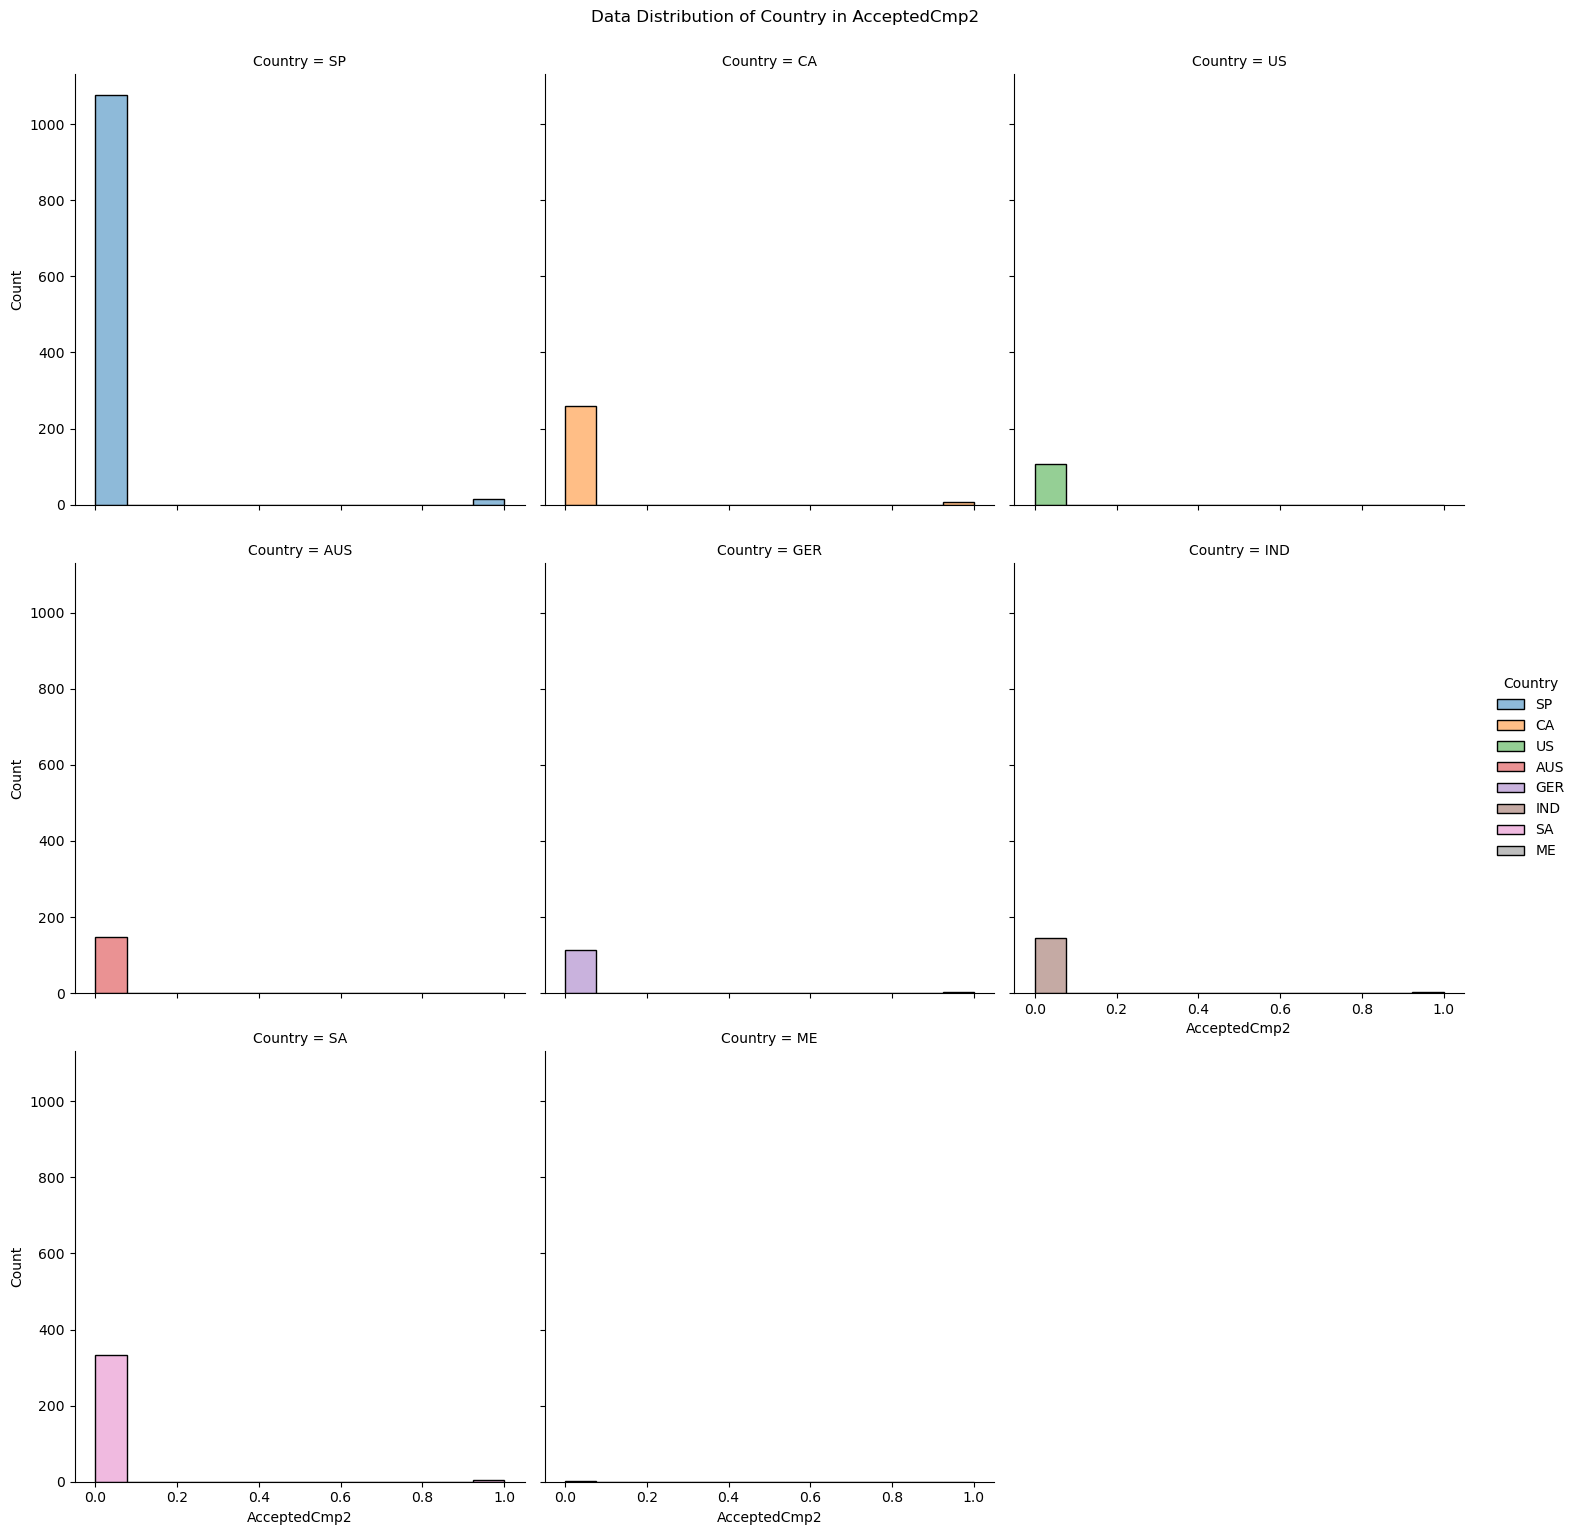

<Figure size 1400x1200 with 0 Axes>

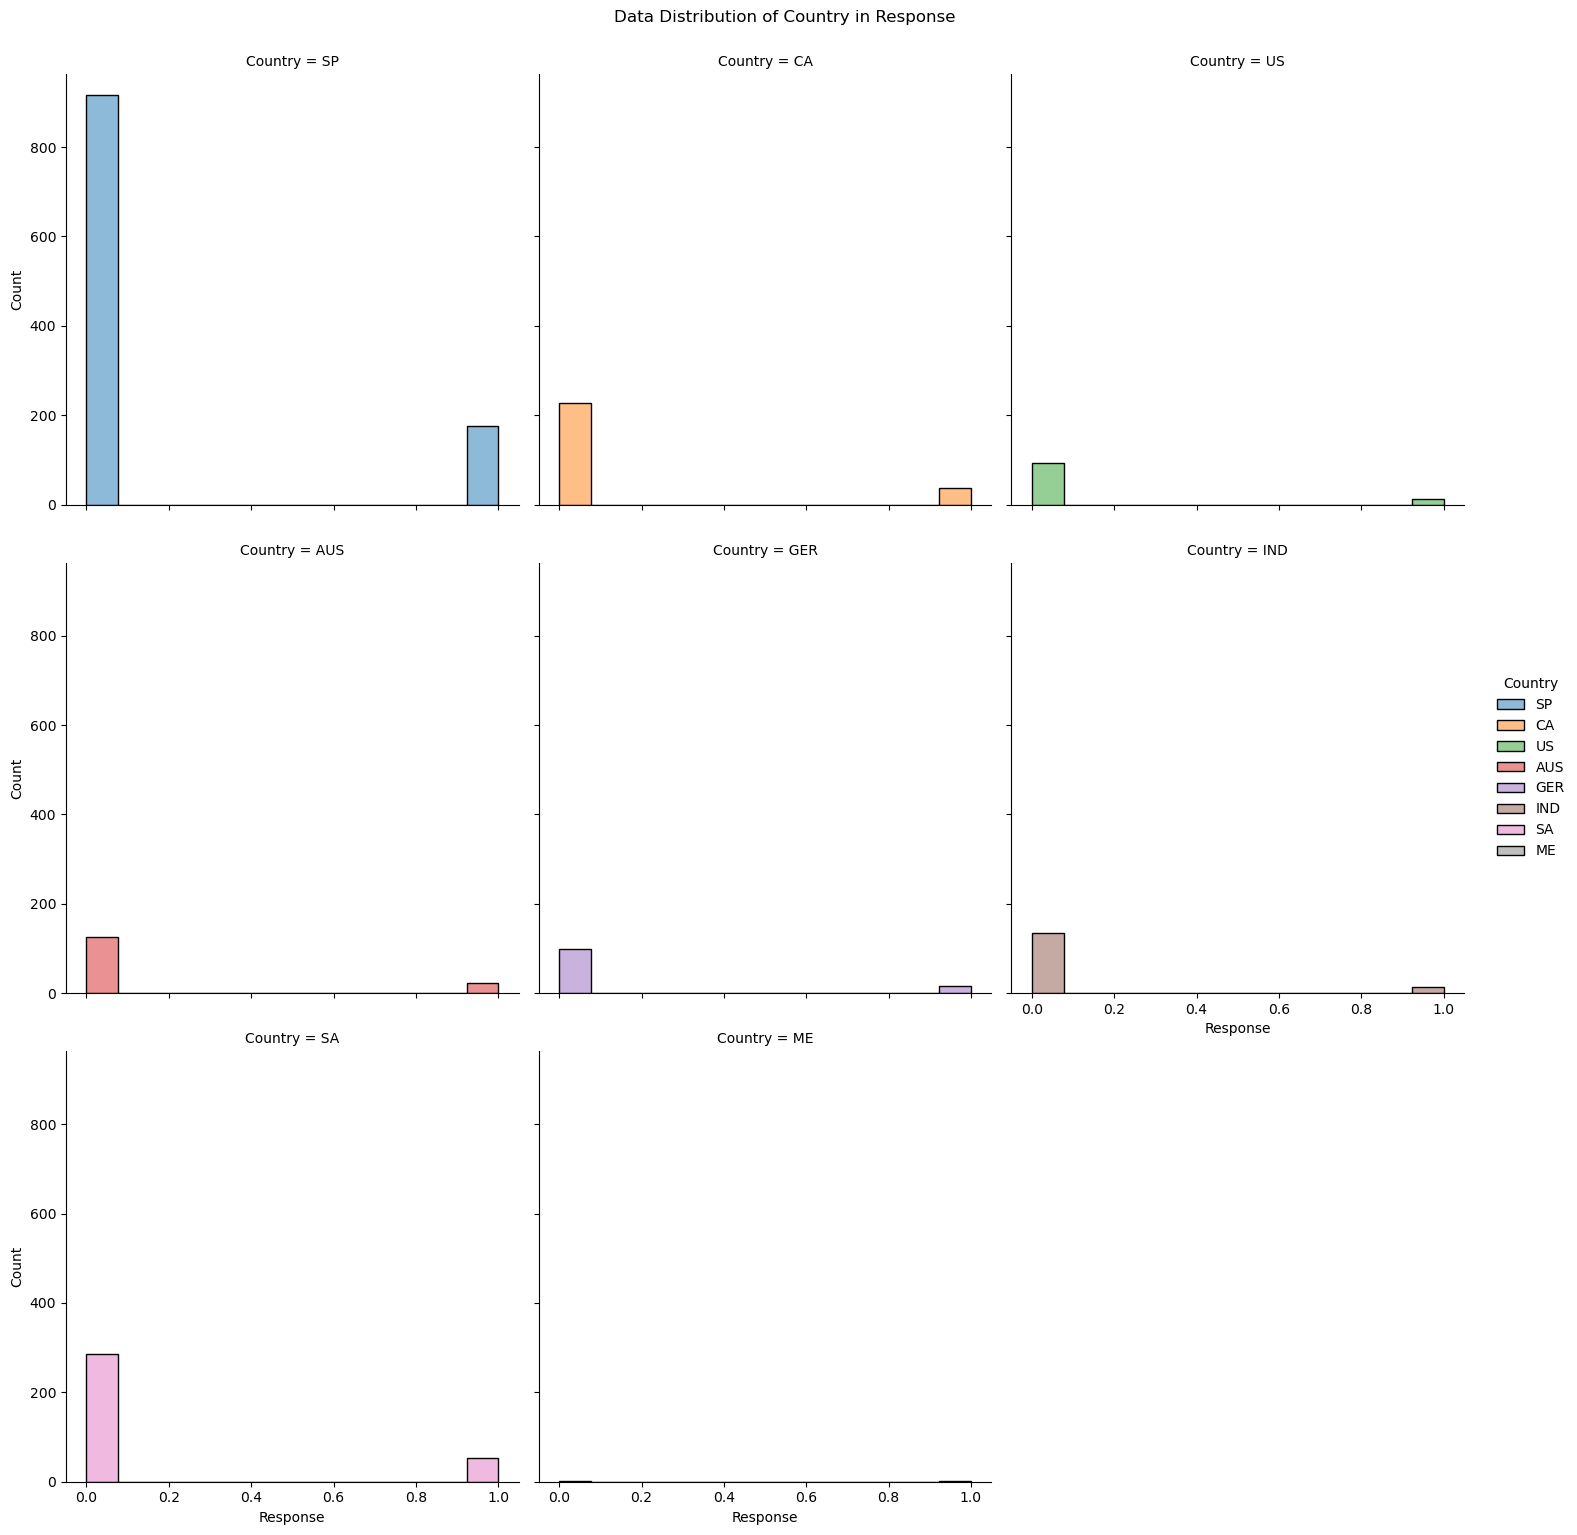

<Figure size 1400x1200 with 0 Axes>

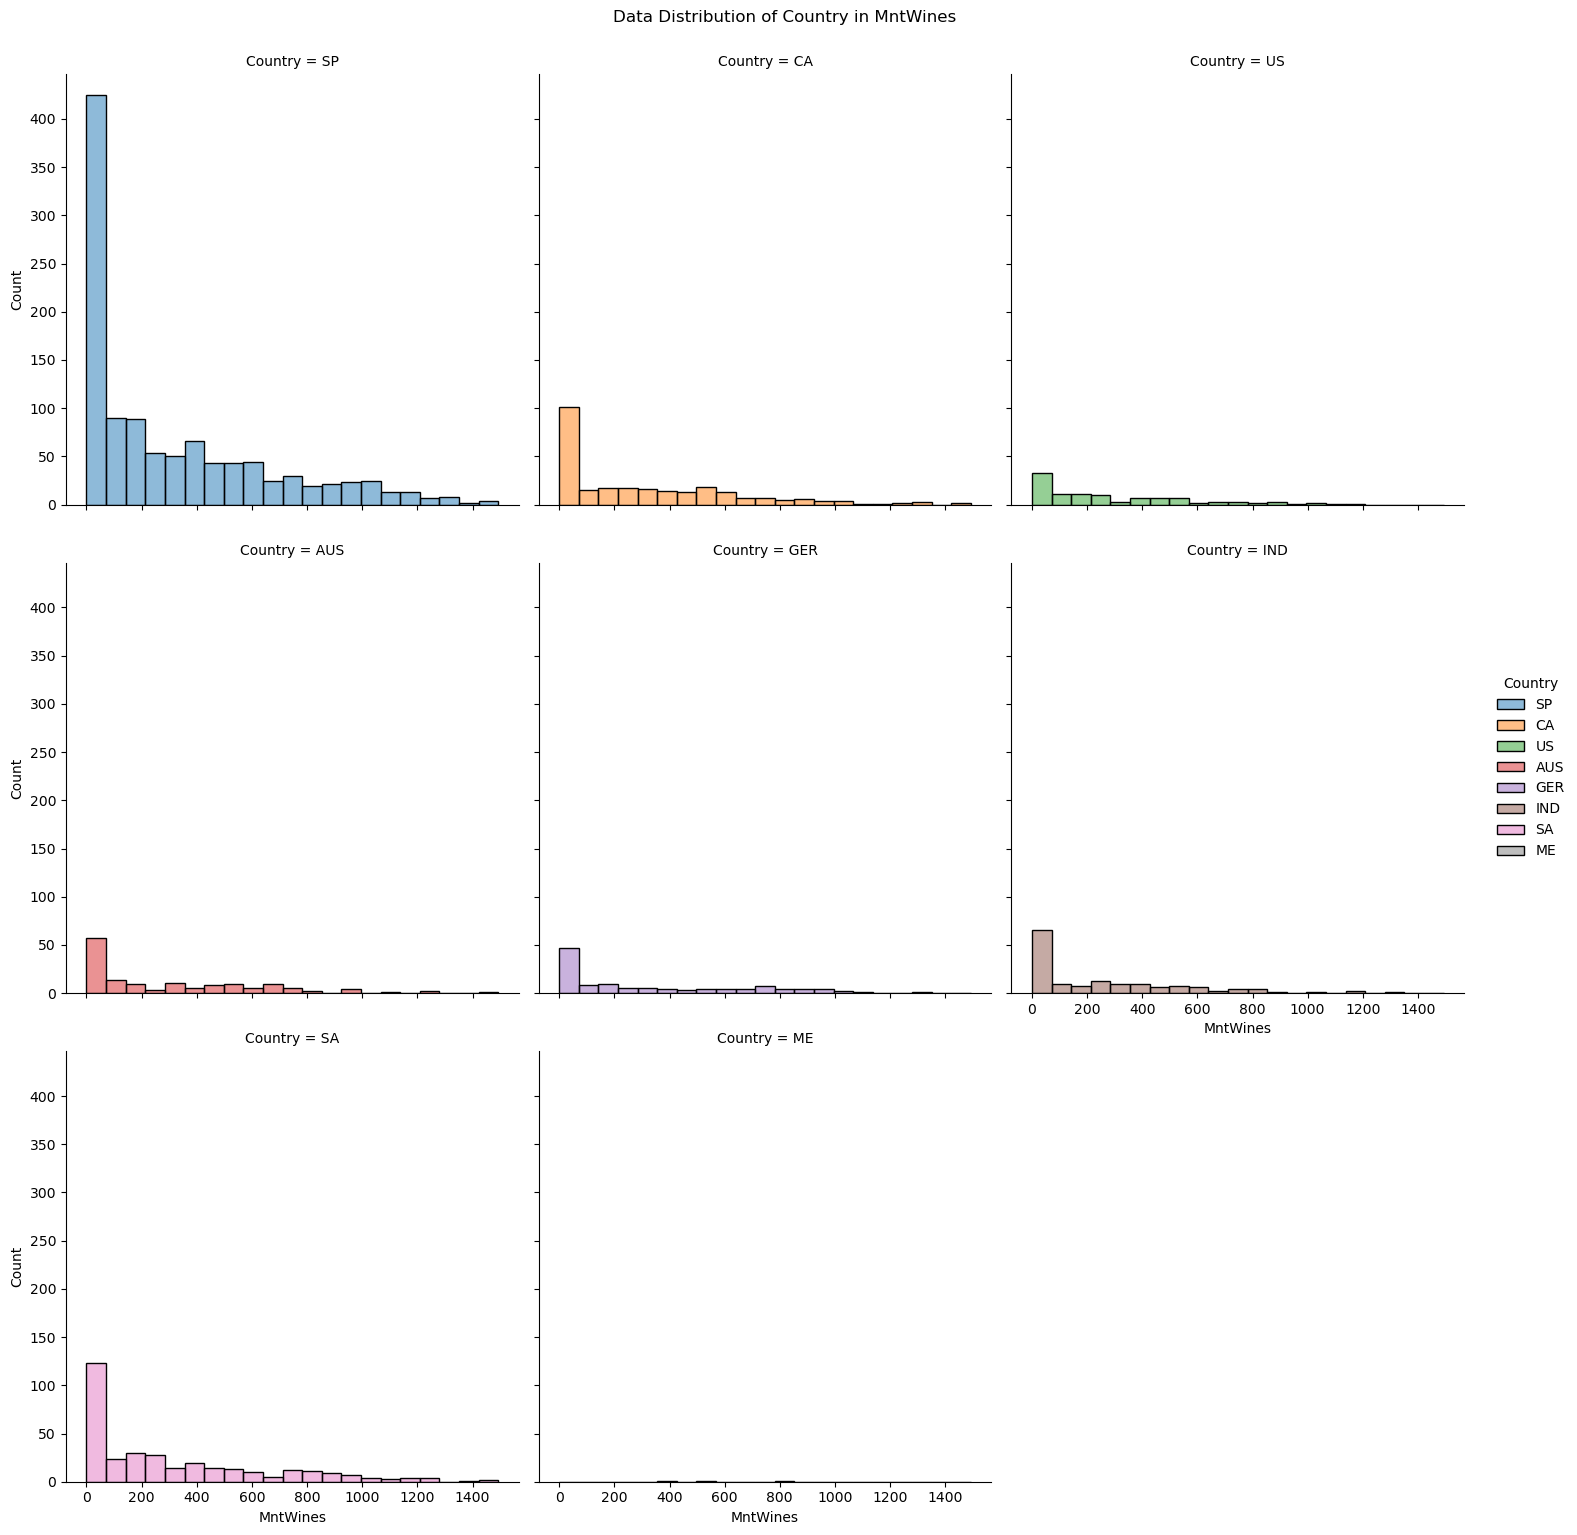

<Figure size 1400x1200 with 0 Axes>

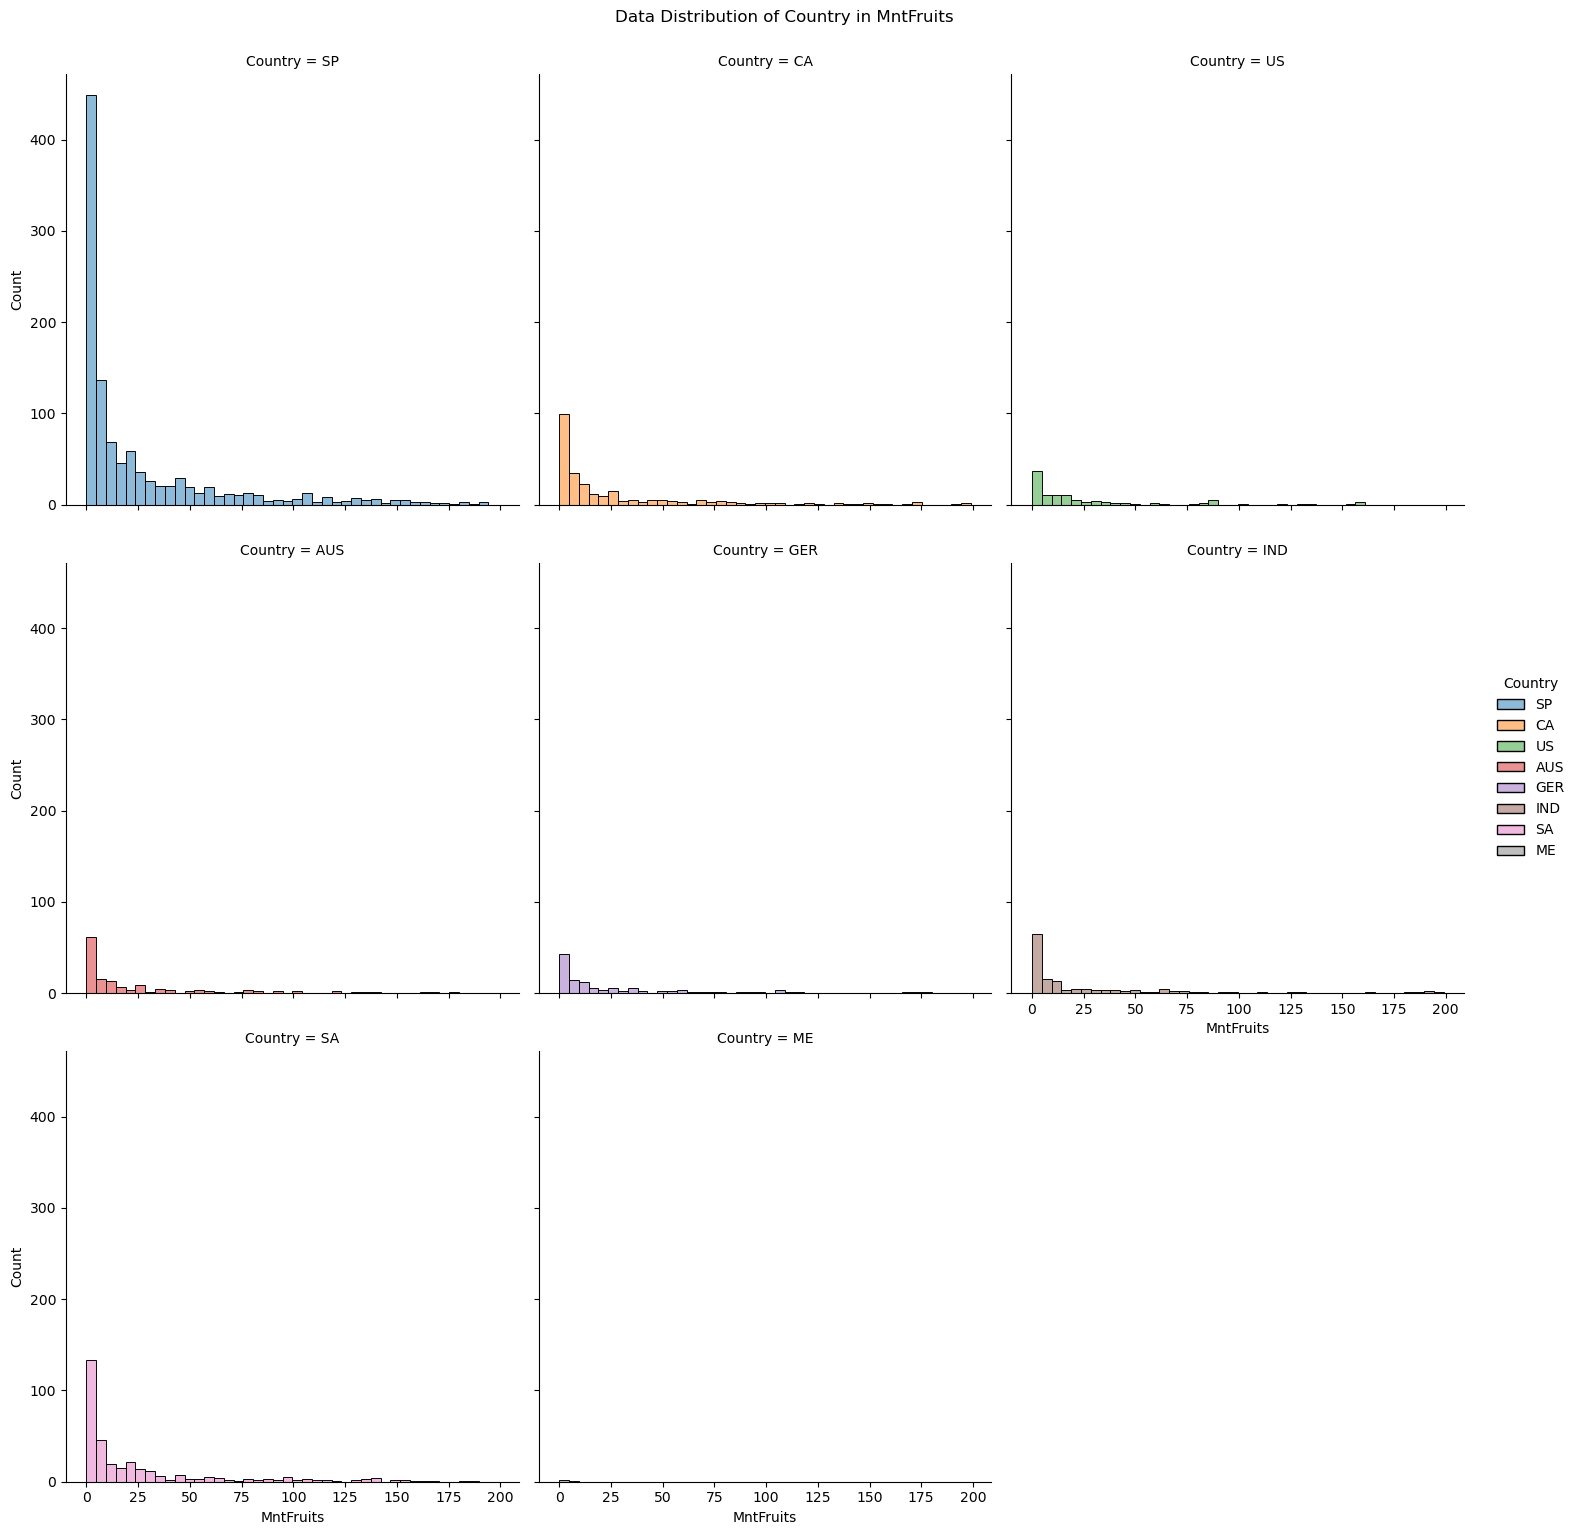

<Figure size 1400x1200 with 0 Axes>

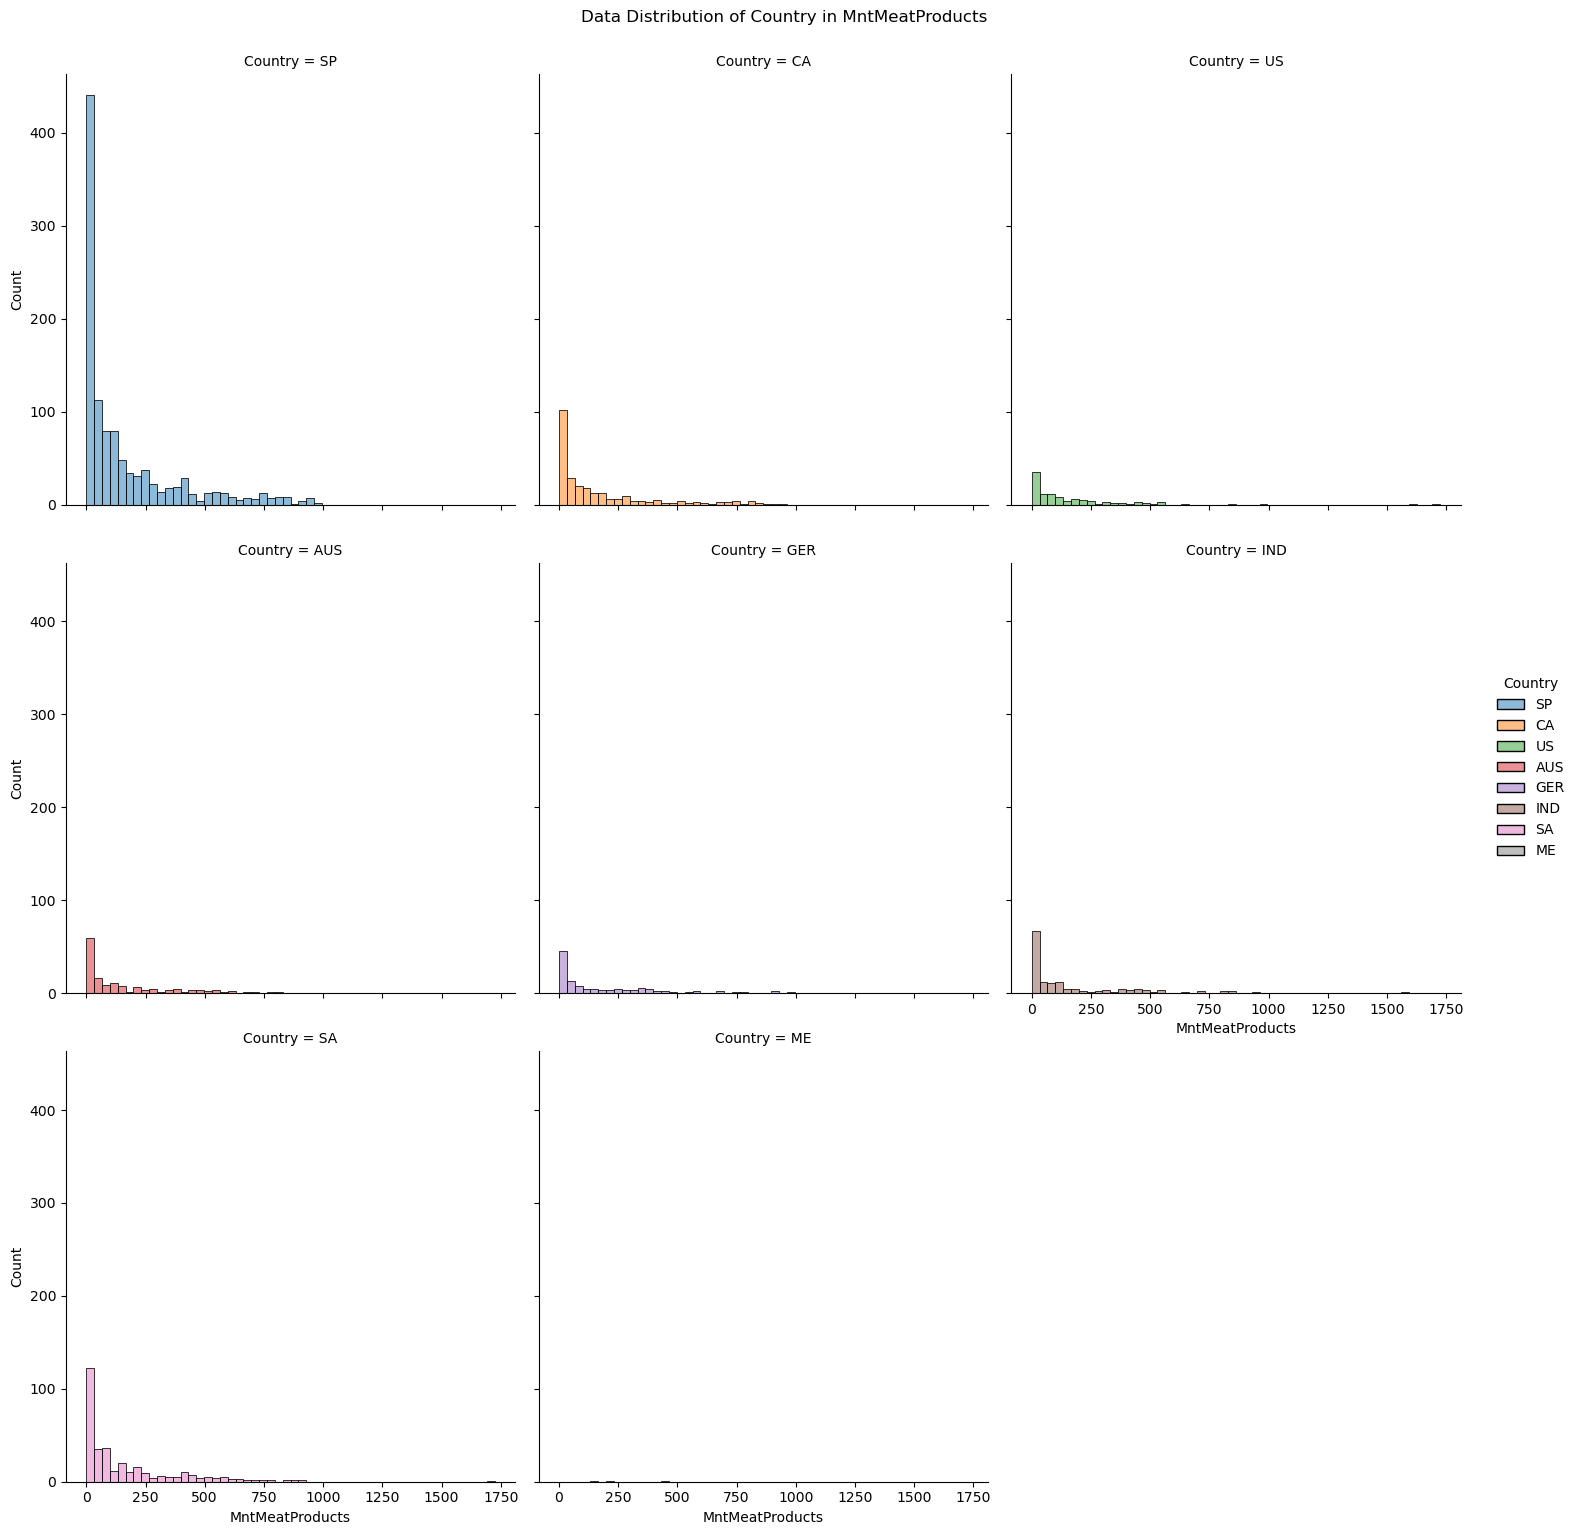

<Figure size 1400x1200 with 0 Axes>

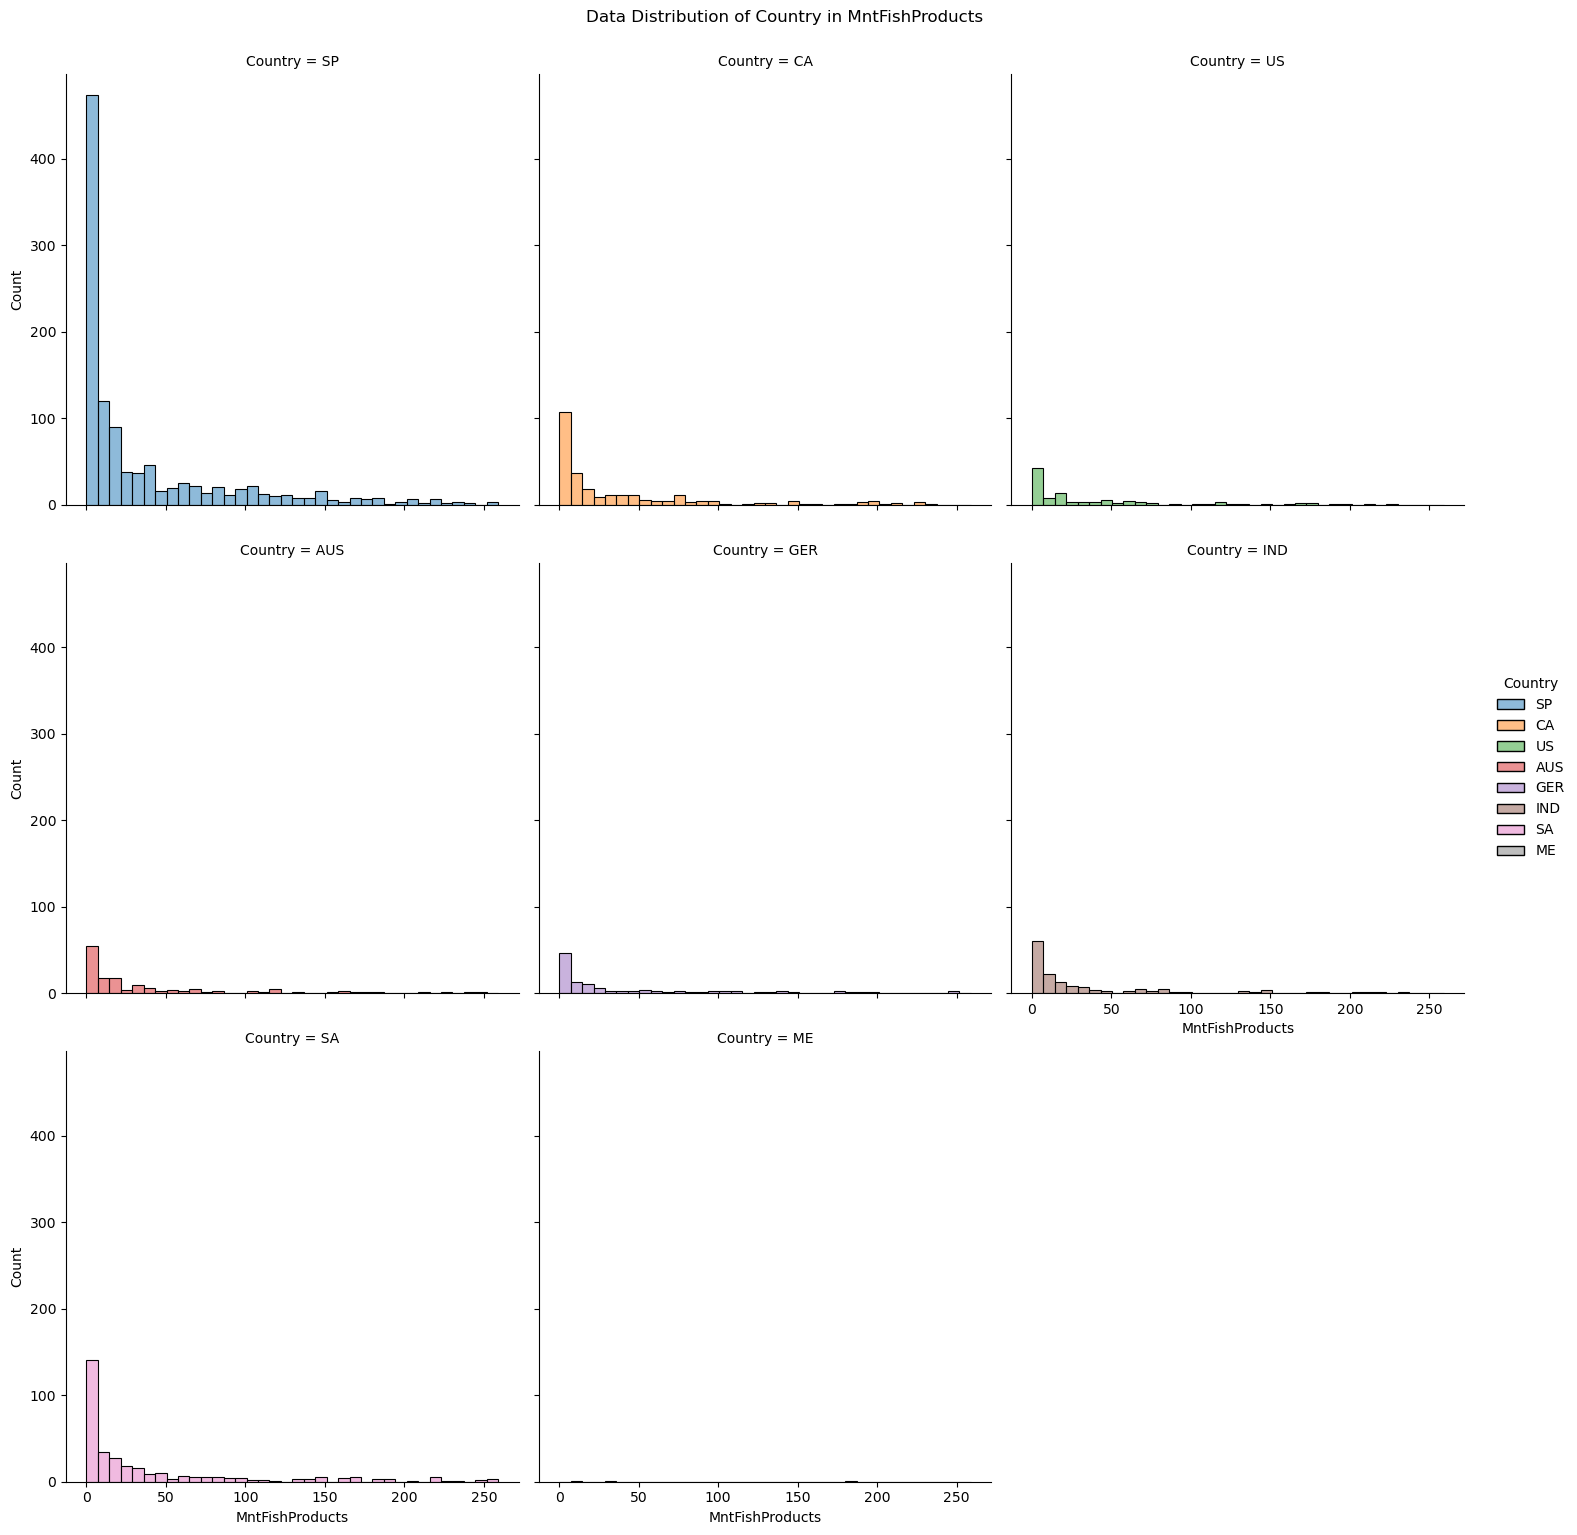

In [29]:
def box_plot_analysis(data,X,Y):
    for x1, y1 in zip(X, Y):
        plt.figure(figsize=(14, 12))
        ax = sns.displot(data=data, x=x1, hue=y1, col=y1,col_wrap=3)
        title_name =  f"Data Distribution of {y1} in {x1}"
        #title_name = r"\textbf{Data Distribution of " + f"{y1}" + r" in " + f"{x1}" + "}"
        ax.fig.suptitle(title_name,y=1.02)
        
        plt.show()

X = ["Kidhome","Teenhome","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Response",'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain']
Y = ["Country"]*len(Y )

box_plot_analysis(df,X,Y)

### Histogram plor for  data distribution

In [30]:
col = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain']

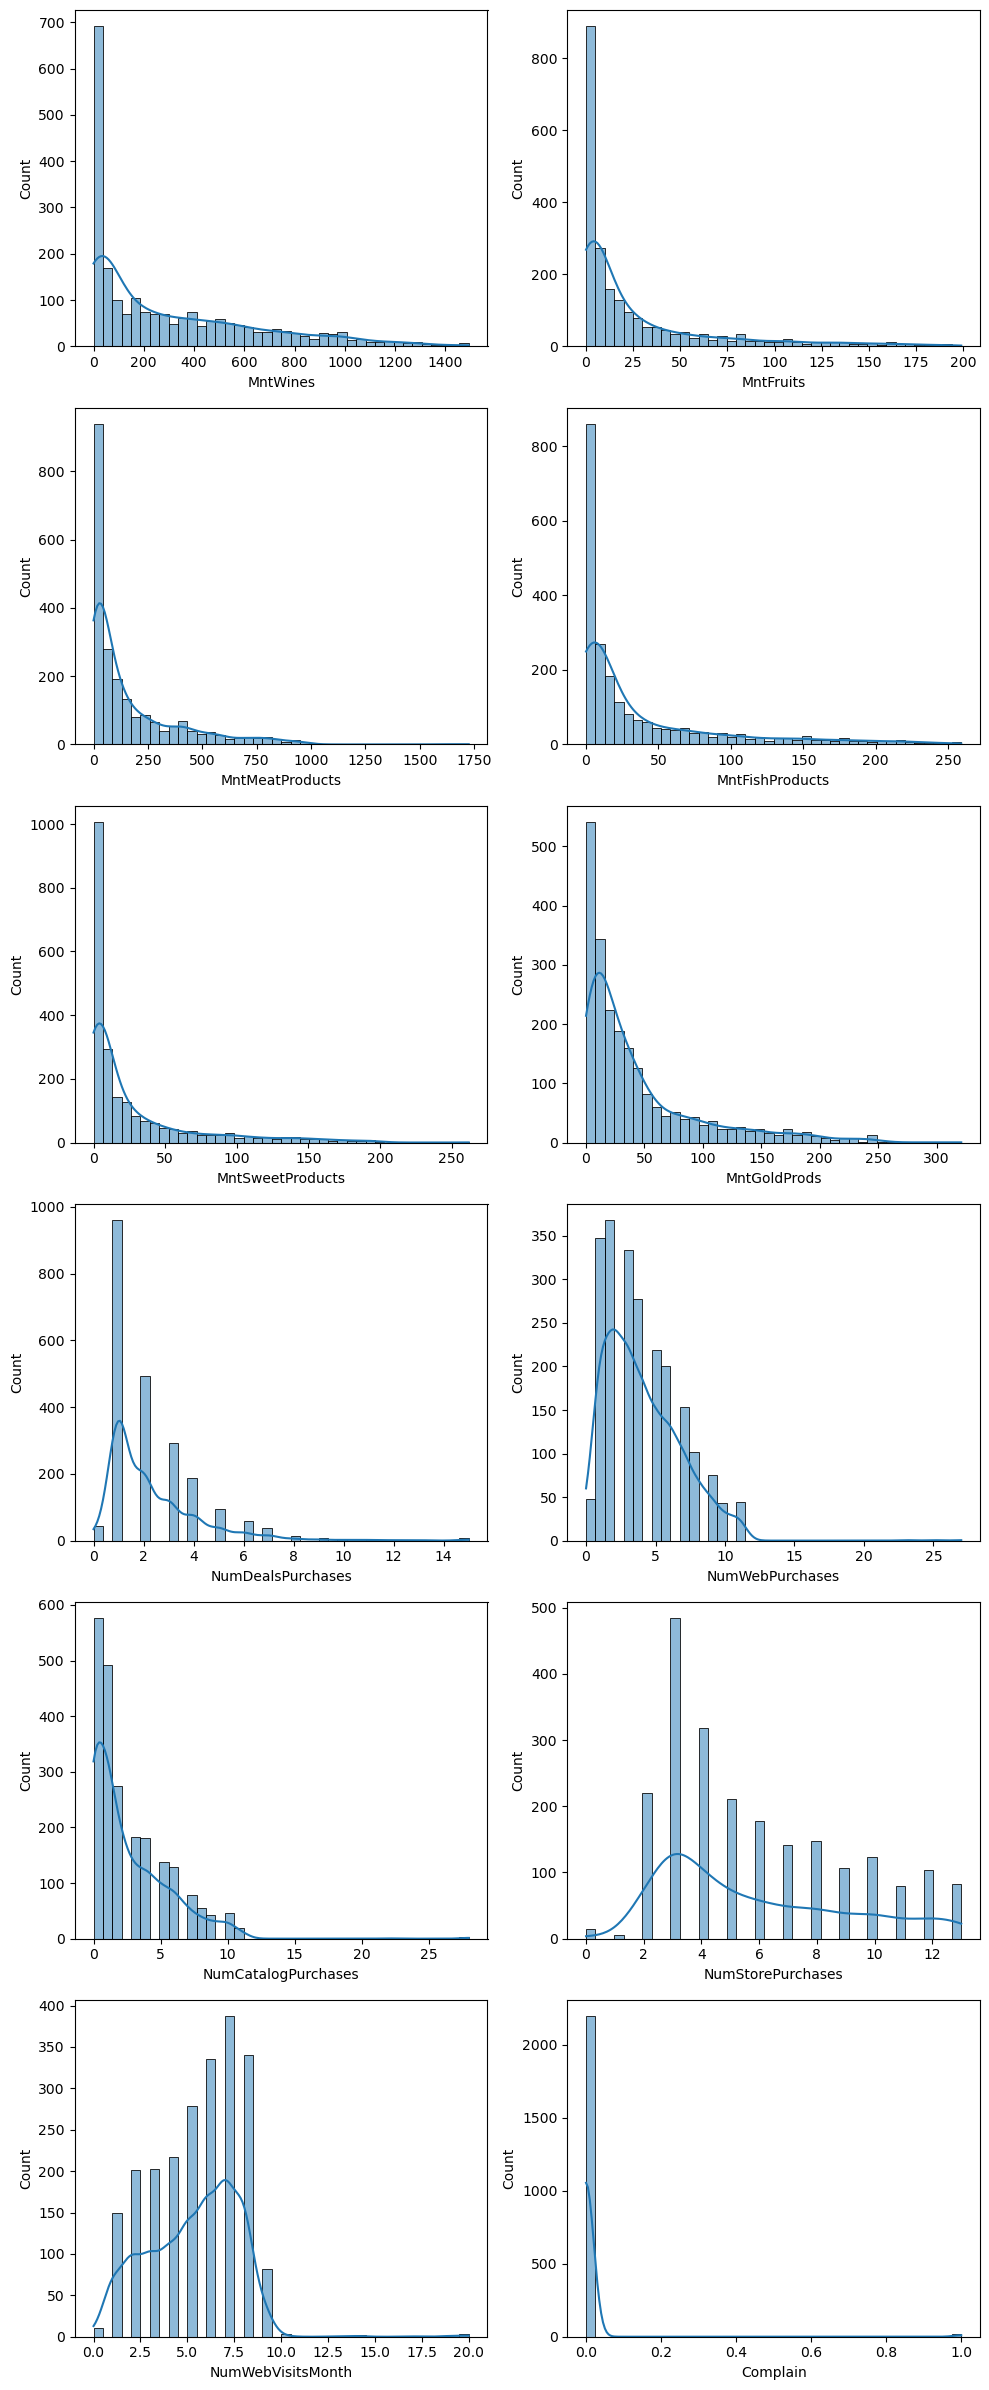

In [31]:
def subplots_his(columns,dataframe):
    #size = len(columns) // 2
    num_columns = len(columns)
    size = len(columns) // 2 + len(columns) % 2
    fig, axes = plt.subplots(size, 2, figsize=(10, 4 * size))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.histplot(data=dataframe, x=col, kde=True,bins=40,edgecolor='black',ax=axes[i])
    
    if num_columns % 2 != 0:
        fig.delaxes(axes[-1])
        
    plt.tight_layout()
    plt.show()
    

subplots_his(col, df)

 ### Box plot for Detect the outlayers

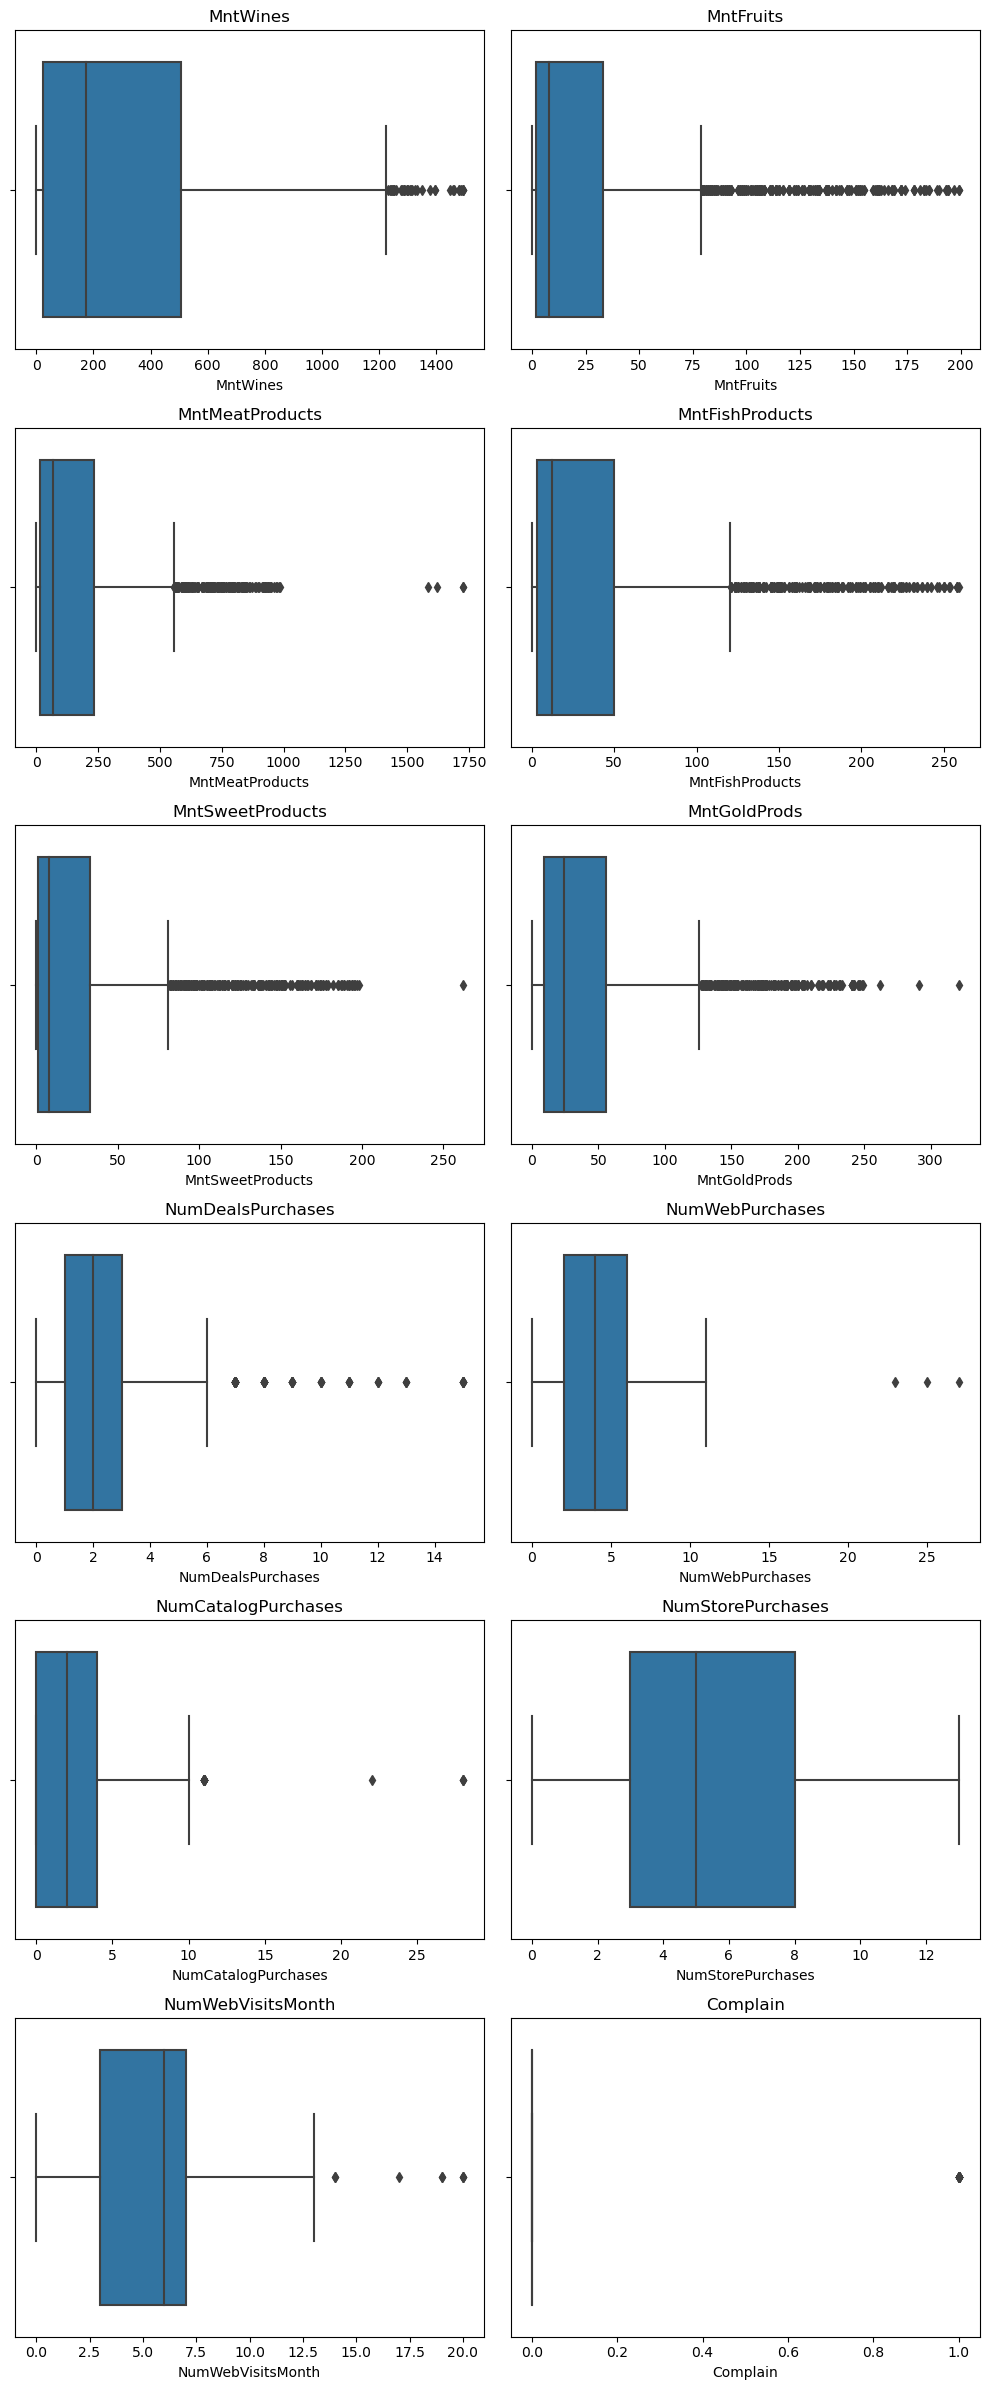

In [32]:
def subplots_box(columns, dataframe):
    num_columns = len(columns)
    size = len(columns) // 2 + len(columns) % 2
    fig, axes = plt.subplots(size, 2, figsize=(10, 4 * size))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        sns.boxplot(x=dataframe[col], ax=axes[i])
        axes[i].set_title(col) 
    
    if num_columns % 2 != 0:
        fig.delaxes(axes[-1])
        
    plt.tight_layout()
    plt.show()


    

subplots_box(col, df)

###  Ploting the Heatmap for the corerelation matrix

In [33]:
# "Year_Birth","Education","Marital_Status","Income","Teenhome","Country"

df_corr= df [[ 'Year_Birth',  'Income', 'Kidhome','Teenhome', 'Recency', 'MntWines', 'MntFruits',
             'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
             'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
             'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
             'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
             'AcceptedCmp2', 'Response', 'Complain']]
df_corr

Year_Birth  Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0           1970   84835        0         0        0       189        104   
1           1961   57091        0         0        0       464          5   
2           1958   67267        0         1        0       134         11   
3           1967   32474        1         1        0        10          0   
4           1989   21474        1         0        0         6         16   
...          ...     ...      ...       ...      ...       ...        ...   
2235        1976   66476        0         1       99       372         18   
2236        1977   31056        1         0       99         5         10   
2237        1976   46310        1         0       99       185          2   
2238        1978   65819        0         0       99       267         38   
2239        1969   94871        0         2       99       169         24   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0                 379              111               189  ...   
1                  64                7                 0  ...   
2                  59               15                 2  ...   
3                   1                0                 0  ...   
4                  24               11                 0  ...   
...               ...              ...               ...  ...   
2235              126               47                48  ...   
2236               13                3                 8  ...   
2237               88               15                 5  ...   
2238              701              149               165  ...   
2239              553              188                 0  ...   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                       4                  6                  1             0   
1                       3                  7                  5             0   
2                       2                  5                  2             0   
3                       0                  2                  7             0   
4                       1                  2                  7             1   
...                   ...                ...                ...           ...   
2235                    2                 11                  4             0   
2236                    0                  3                  8             0   
2237                    1                  5                  8             0   
2238                    4                 10                  3             0   
2239                    5                  4                  7             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  \
0                0             0             0             0         1   
1                0             0             0             1         1   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         1   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             0             0         0   
2237             0             0             0             0         0   
2238             0             0             0             0         0   
2239             1             1             0             0         1   

      Complain  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
2235         0  
2236         0  
2237         0  
2238         0  
2239         0  

[2216 rows x 23 columns]

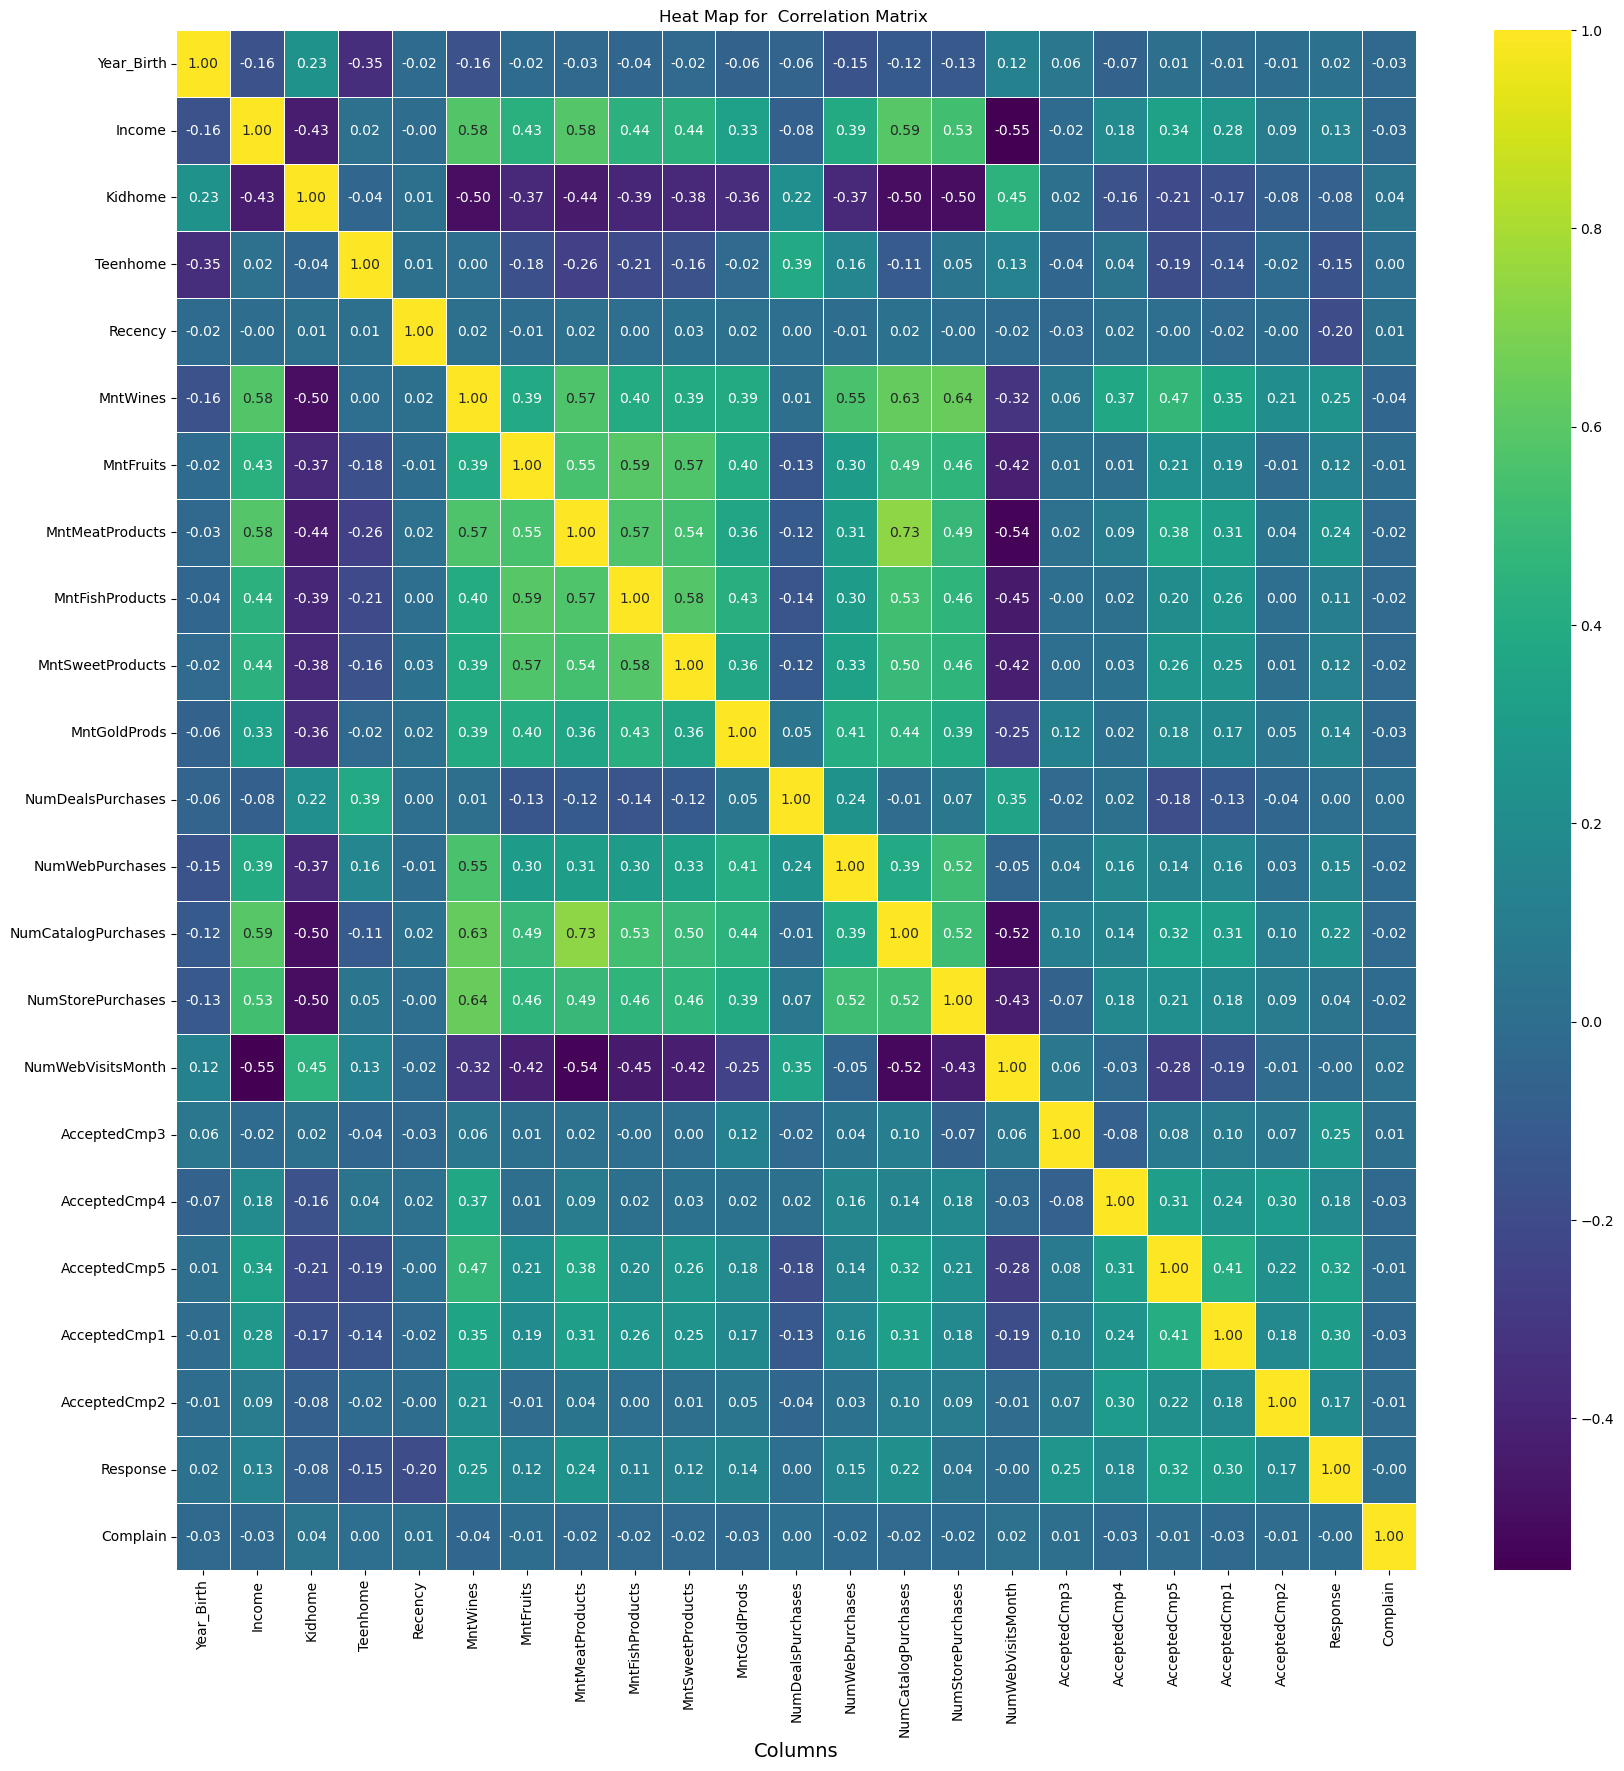

In [34]:
# Creating a corre;ation matrix

corr = df_corr.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr,annot=True,cmap='viridis',linewidth=.5,fmt='.2f')
plt.title("Heat Map for  Correlation Matrix ")
plt.xlabel("Columns", fontsize=14)
plt.show()

## Selecting the variable 

In [35]:
df_new = df[["Income","Education",'Marital_Status',"Country", 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
         'MntGoldProds','NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','AcceptedCmp4', 
         'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Response',"MntWines"]]
df_copy = df_new
df_new.describe()

Income    MntFruits  MntMeatProducts  MntFishProducts  \
count    2216.000000  2216.000000      2216.000000      2216.000000   
mean    52247.251354    26.356047       166.995939        37.637635   
std     25173.076661    39.793917       224.283273        54.752082   
min      1730.000000     0.000000         0.000000         0.000000   
25%     35303.000000     2.000000        16.000000         3.000000   
50%     51381.500000     8.000000        68.000000        12.000000   
75%     68522.000000    33.000000       232.250000        50.000000   
max    666666.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  \
count       2216.000000   2216.000000      2216.000000          2216.000000   
mean          27.028881     43.965253         4.085289             2.671029   
std           41.072046     51.815414         2.740951             2.926734   
min            0.000000      0.000000         0.000000             0.000000   
25%            1.000000      9.000000         2.000000             0.000000   
50%            8.000000     24.500000         4.000000             2.000000   
75%           33.000000     56.000000         6.000000             4.000000   
max          262.000000    321.000000        27.000000            28.000000   

       NumStorePurchases  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
count        2216.000000   2216.000000   2216.000000   2216.000000   
mean            5.800993      0.074007      0.073105      0.064079   
std             3.250785      0.261842      0.260367      0.244950   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             5.000000      0.000000      0.000000      0.000000   
75%             8.000000      0.000000      0.000000      0.000000   
max            13.000000      1.000000      1.000000      1.000000   

       AcceptedCmp2     Response     MntWines  
count   2216.000000  2216.000000  2216.000000  
mean       0.013538     0.150271   305.091606  
std        0.115588     0.357417   337.327920  
min        0.000000     0.000000     0.000000  
25%        0.000000     0.000000    24.000000  
50%        0.000000     0.000000   174.500000  
75%        0.000000     0.000000   505.000000  
max        1.000000     1.000000  1493.000000

## Cleaning the outlayers by Standard deviation method

In [36]:
sd_col = ['MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']

In [37]:
def sd_out(dataframe, col_names):
    for i in col_names:
        higher_bound = dataframe[i].mean() + 3 * dataframe[i].std()
        lower_bound = dataframe[i].mean() - 3 * dataframe[i].std()
        dataframe = dataframe[(dataframe[i] < higher_bound) & (dataframe[i] > lower_bound)]
    
    return dataframe

df_sd =sd_out(df_copy, sd_col)
df_sd

Income   Education Marital_Status Country  MntFruits  MntMeatProducts  \
2      67267  Graduation        Married      US         11               59   
3      32474  Graduation       Together     AUS          0                1   
7      44931  Graduation       Together      SP          0               11   
8      65324         PhD        Married      US          0              102   
9      65324         PhD        Married     IND          0              102   
...      ...         ...            ...     ...        ...              ...   
2233   36640    2n Cycle       Divorced     IND          6                8   
2234   78901  Graduation       Divorced      US         11              309   
2235   66476         PhD       Divorced      US         18              126   
2236   31056    2n Cycle        Married      SP         10               13   
2237   46310  Graduation       Divorced      SP          2               88   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumWebPurchases  \
2                  15                 2            30                3   
3                   0                 0             0                1   
7                   0                 0             7                2   
8                  21                32             5                6   
9                  21                32             5                6   
...               ...               ...           ...              ...   
2233                7                 4            25                2   
2234               33                26            34                9   
2235               47                48            78                5   
2236                3                 8            16                1   
2237               15                 5            14                6   

      NumCatalogPurchases  NumStorePurchases  AcceptedCmp4  AcceptedCmp5  \
2                       2                  5             0             0   
3                       0                  2             0             0   
7                       1                  3             0             0   
8                       2                  9             0             0   
9                       2                  9             0             0   
...                   ...                ...           ...           ...   
2233                    1                  2             0             0   
2234                    3                  5             0             0   
2235                    2                 11             0             0   
2236                    0                  3             0             0   
2237                    1                  5             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  MntWines  
2                0             0         0       134  
3                0             0         0        10  
7                0             0         0        78  
8                0             0         0       384  
9                0             0         0       384  
...            ...           ...       ...       ...  
2233             0             0         0        15  
2234             0             0         0       321  
2235             0             0         0       372  
2236             0             0         0         5  
2237             0             0         0       185  

[1518 rows x 18 columns]

In [38]:
df_sd.describe()

Income    MntFruits  MntMeatProducts  MntFishProducts  \
count    1518.000000  1518.000000      1518.000000      1518.000000   
mean    45983.411726    16.529644        93.389328        23.009223   
std     24586.455022    26.902374       134.177847        35.727895   
min      1730.000000     0.000000         0.000000         0.000000   
25%     31593.750000     1.000000        11.000000         2.000000   
50%     44320.500000     5.000000        32.000000         8.000000   
75%     59244.000000    18.000000       118.750000        25.000000   
max    666666.000000   142.000000       785.000000       184.000000   

       MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  \
count       1518.000000   1518.000000      1518.000000          1518.000000   
mean          15.882082     31.210804         3.523715             1.702899   
std           24.978064     37.119119         2.522234             2.068537   
min            0.000000      0.000000         0.000000             0.000000   
25%            1.000000      6.000000         2.000000             0.000000   
50%            5.000000     16.000000         3.000000             1.000000   
75%           18.000000     41.000000         5.000000             2.000000   
max          133.000000    182.000000        11.000000             9.000000   

       NumStorePurchases  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
count        1518.000000        1518.0        1518.0        1518.0   
mean            5.190382           0.0           0.0           0.0   
std             3.082472           0.0           0.0           0.0   
min             0.000000           0.0           0.0           0.0   
25%             3.000000           0.0           0.0           0.0   
50%             4.000000           0.0           0.0           0.0   
75%             7.000000           0.0           0.0           0.0   
max            13.000000           0.0           0.0           0.0   

       AcceptedCmp2  Response     MntWines  
count        1518.0    1518.0  1518.000000  
mean            0.0       0.0   195.687747  
std             0.0       0.0   251.242623  
min             0.0       0.0     0.000000  
25%             0.0       0.0    15.000000  
50%             0.0       0.0    70.000000  
75%             0.0       0.0   304.750000  
max             0.0       0.0  1396.000000

##  Data distribution after removing the outlayers

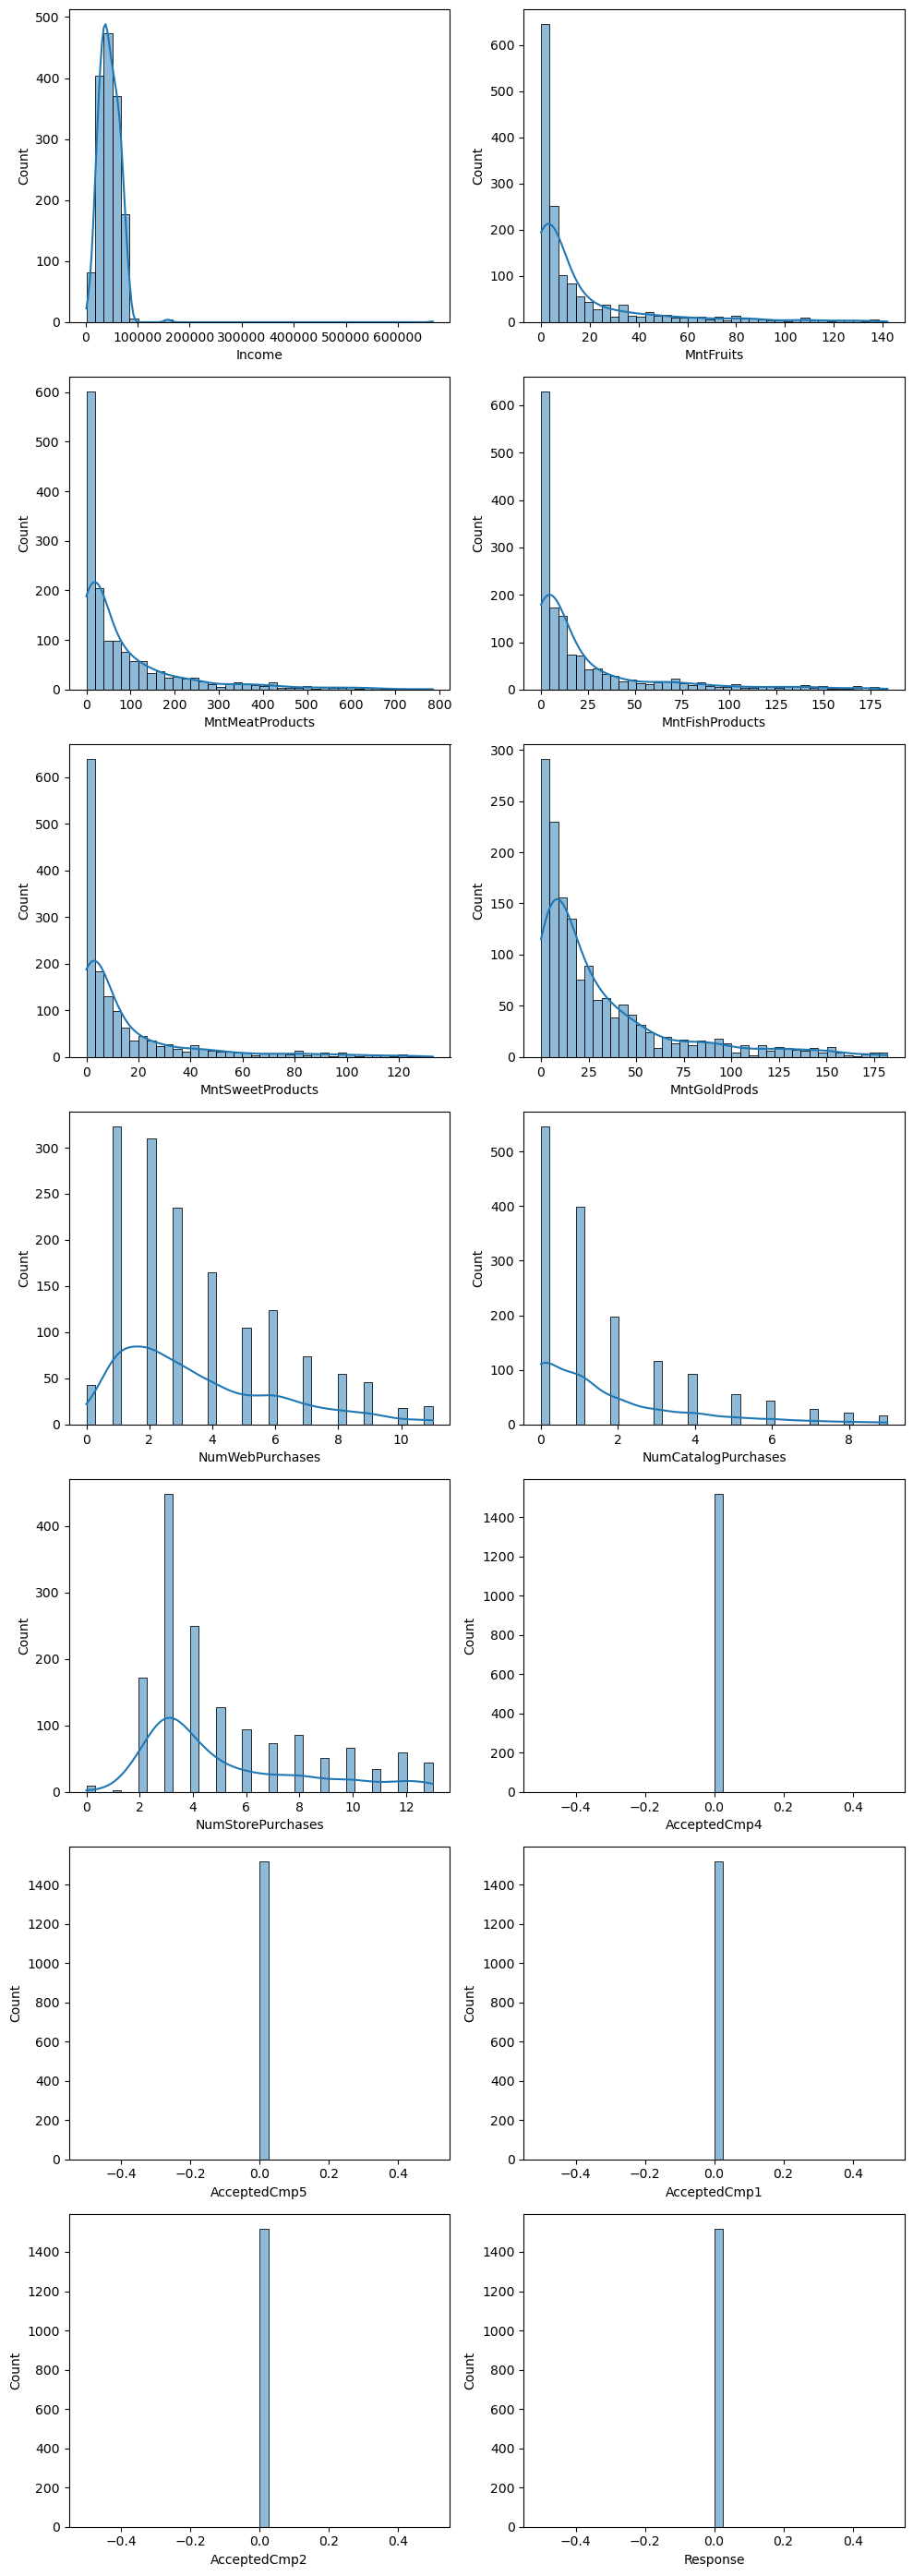

In [39]:
plot_col = ["Income",'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response']
subplots_his(plot_col,df_sd)

## Handling the skew ness with log Transform

In [40]:
def log_transform(col_values):
    return np.log(col_values[col_values > 0])


columns_to_transform = ["MntFruits","MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
                        "NumWebPurchases"]


df_log=df_sd
for column in columns_to_transform:
    df_log[column] = log_transform(df_log[column])
df_log

Income   Education Marital_Status Country  MntFruits  MntMeatProducts  \
2      67267  Graduation        Married      US   2.397895         4.077537   
3      32474  Graduation       Together     AUS        NaN         0.000000   
7      44931  Graduation       Together      SP        NaN         2.397895   
8      65324         PhD        Married      US        NaN         4.624973   
9      65324         PhD        Married     IND        NaN         4.624973   
...      ...         ...            ...     ...        ...              ...   
2233   36640    2n Cycle       Divorced     IND   1.791759         2.079442   
2234   78901  Graduation       Divorced      US   2.397895         5.733341   
2235   66476         PhD       Divorced      US   2.890372         4.836282   
2236   31056    2n Cycle        Married      SP   2.302585         2.564949   
2237   46310  Graduation       Divorced      SP   0.693147         4.477337   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumWebPurchases  \
2            2.708050          0.693147      3.401197         1.098612   
3                 NaN               NaN           NaN         0.000000   
7                 NaN               NaN      1.945910         0.693147   
8            3.044522          3.465736      1.609438         1.791759   
9            3.044522          3.465736      1.609438         1.791759   
...               ...               ...           ...              ...   
2233         1.945910          1.386294      3.218876         0.693147   
2234         3.496508          3.258097      3.526361         2.197225   
2235         3.850148          3.871201      4.356709         1.609438   
2236         1.098612          2.079442      2.772589         0.000000   
2237         2.708050          1.609438      2.639057         1.791759   

      NumCatalogPurchases  NumStorePurchases  AcceptedCmp4  AcceptedCmp5  \
2                       2                  5             0             0   
3                       0                  2             0             0   
7                       1                  3             0             0   
8                       2                  9             0             0   
9                       2                  9             0             0   
...                   ...                ...           ...           ...   
2233                    1                  2             0             0   
2234                    3                  5             0             0   
2235                    2                 11             0             0   
2236                    0                  3             0             0   
2237                    1                  5             0             0   

      AcceptedCmp1  AcceptedCmp2  Response  MntWines  
2                0             0         0       134  
3                0             0         0        10  
7                0             0         0        78  
8                0             0         0       384  
9                0             0         0       384  
...            ...           ...       ...       ...  
2233             0             0         0        15  
2234             0             0         0       321  
2235             0             0         0       372  
2236             0             0         0         5  
2237             0             0         0       185  

[1518 rows x 18 columns]

In [41]:
df_log.shape

(1518, 18)

In [42]:
df_log.isna().sum()

Income                   0
Education                0
Marital_Status           0
Country                  0
MntFruits              304
MntMeatProducts          1
MntFishProducts        288
MntSweetProducts       313
MntGoldProds            41
NumWebPurchases         43
NumCatalogPurchases      0
NumStorePurchases        0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Response                 0
MntWines                 0
dtype: int64

# Handling the missing values 

### Fill the missing values with univariate imputation (mean)

mean : 3.570149915591813
median 3.4657359027997265
Original variance 2.2112894046526153
Mean variance 2.209831732006173


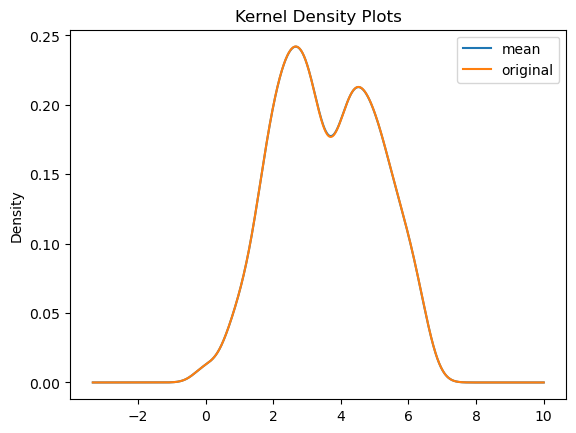

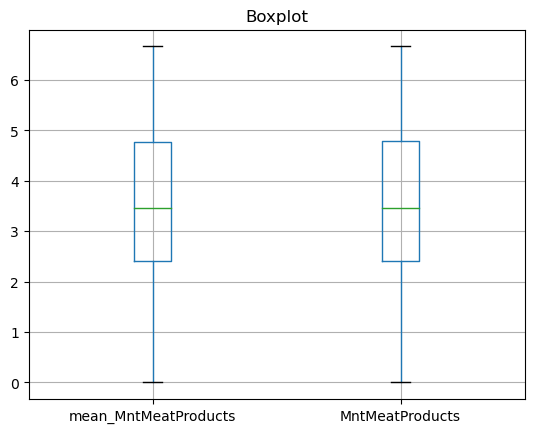

In [43]:
mean = df_log["MntMeatProducts"].mean()
median = df_log["MntMeatProducts"].median()

print("mean :" ,mean)
print("median",median)


df_log["mean_MntMeatProducts"]= df_log["MntMeatProducts"].fillna(mean)



variance1 = df_log["MntMeatProducts"].var()
print("Original variance",variance1)
variance2 = df_log["mean_MntMeatProducts"].var()
print("Mean variance",variance2)



df_log["mean_MntMeatProducts"].plot(kind="kde", label="mean")
df_log["MntMeatProducts"].plot(kind="kde", label="original")

plt.legend()
plt.title("Kernel Density Plots")
plt.show()

df_log[["mean_MntMeatProducts", "MntMeatProducts"]].boxplot()
plt.title("Boxplot")
plt.show()

mean : 2.7843274713182775
median 2.833213344056216
Original variance 1.6225675895498157
Mean variance 1.578714411453875


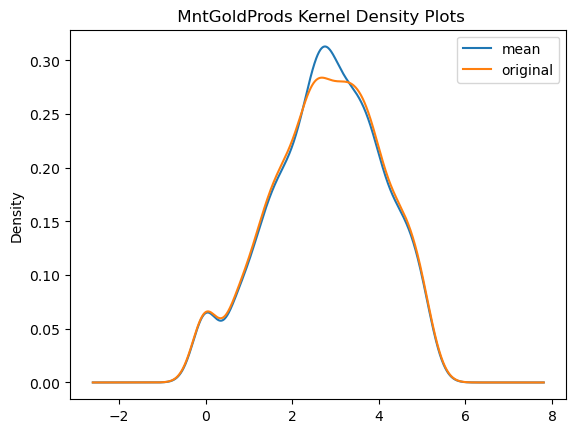

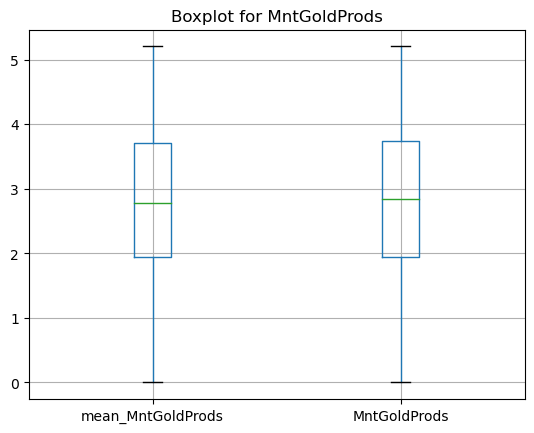

In [44]:
mean = df_log["MntGoldProds"].mean()
median = df_log["MntGoldProds"].median()

print("mean :" ,mean)
print("median",median)


df_log["mean_MntGoldProds"]= df_log["MntGoldProds"].fillna(mean)




variance1 = df_log["MntGoldProds"].var()
print("Original variance",variance1)
variance2 = df_log["mean_MntGoldProds"].var()
print("Mean variance",variance2)



df_log["mean_MntGoldProds"].plot(kind="kde", label="mean")
df_log["MntGoldProds"].plot(kind="kde", label="original")

plt.legend()
plt.title(" MntGoldProds Kernel Density Plots")
plt.show()

df_log[["mean_MntGoldProds", "MntGoldProds"]].boxplot()
plt.title("Boxplot for MntGoldProds")
plt.show()

mean : 1.0452885707762987
median 1.0986122886681098
Original variance 0.5146927659307506
Mean variance 0.5001035840355481


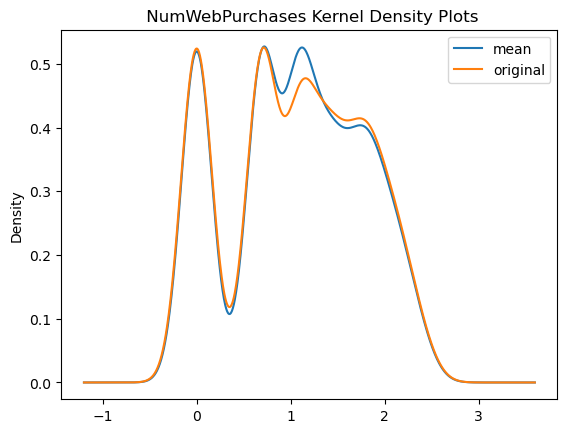

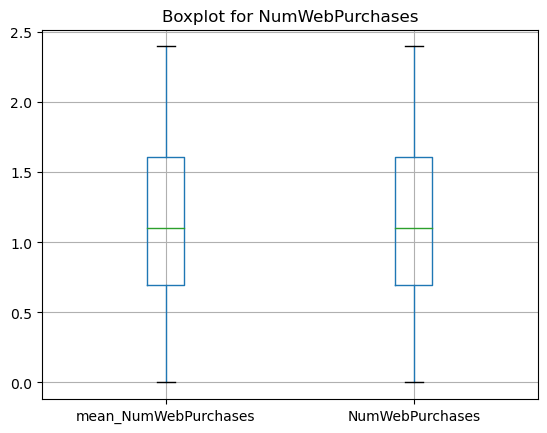

In [45]:
mean = df_log["NumWebPurchases"].mean()
median = df_log["NumWebPurchases"].median()

print("mean :" ,mean)
print("median",median)


df_log["mean_NumWebPurchases"]= df_log["NumWebPurchases"].fillna(mean)




variance1 = df_log["NumWebPurchases"].var()
print("Original variance",variance1)
variance2 = df_log["mean_NumWebPurchases"].var()
print("Mean variance",variance2)



df_log["mean_NumWebPurchases"].plot(kind="kde", label="mean")
df_log["NumWebPurchases"].plot(kind="kde", label="original")
plt.legend()
plt.title(" NumWebPurchases Kernel Density Plots")
plt.show()

df_log[["mean_NumWebPurchases","NumWebPurchases"]].boxplot()
plt.title("Boxplot for NumWebPurchases")
plt.show()

### Interploation  for handling the missing values 

Due to the data shrinkage when apply the mean value, to reduce that shrink we using the interploation method

Original variance 63122.85563091295
Interploate variance 1.6875772073546693


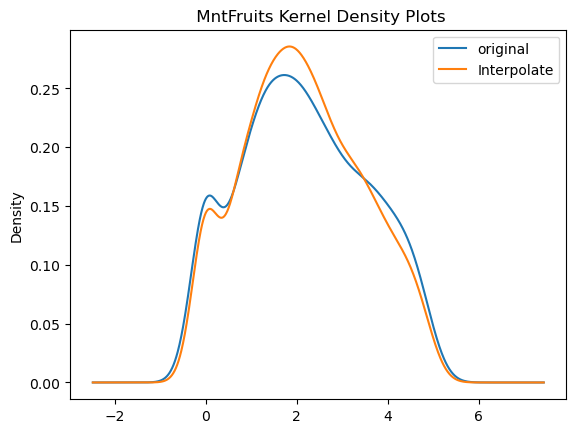

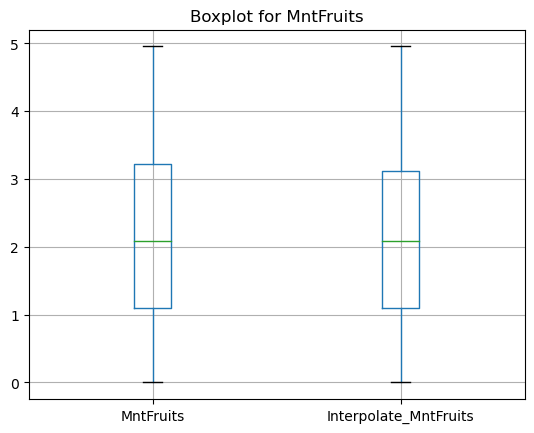

In [46]:
df_log["Interpolate_MntFruits"] = df_log["MntFruits"].interpolate(method="linear")


variance1 = df_log["MntWines"].var()
print("Original variance",variance1)
variance2 = df_log["Interpolate_MntFruits"].var()
print("Interploate variance",variance2)


df_log["MntFruits"].plot(kind="kde", label="original")
df_log["Interpolate_MntFruits"].plot(kind="kde", label="Interpolate")
plt.legend()
plt.title(" MntFruits Kernel Density Plots")
plt.show()


df_log[["MntFruits","Interpolate_MntFruits"]].boxplot()
plt.title("Boxplot for MntFruits")
plt.show()




Original variance 1.6573514865930528
Interploate variance 1.497421298769792


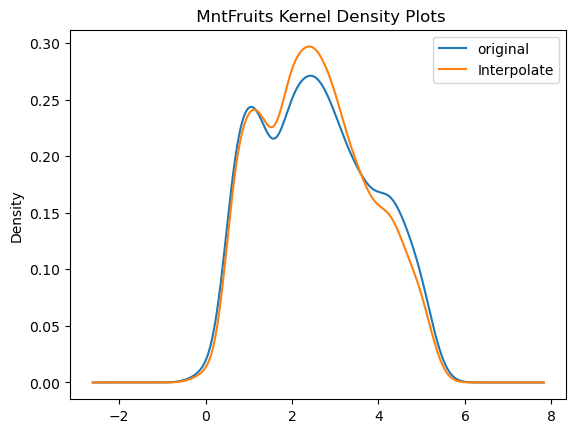

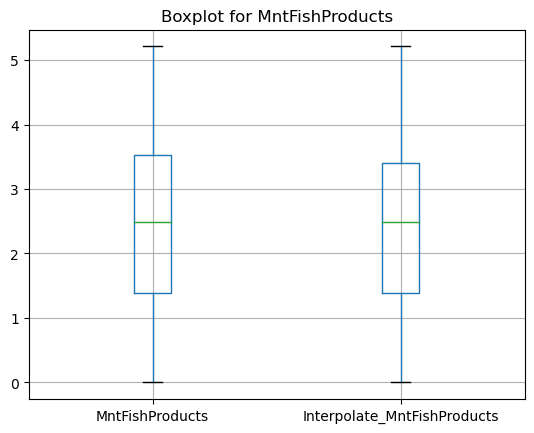

In [47]:
df_log["Interpolate_MntFishProducts"] = df_log["MntFishProducts"].interpolate(method="linear")


variance1 = df_log["MntFishProducts"].var()
print("Original variance",variance1)
variance2 = df_log["Interpolate_MntFishProducts"].var()
print("Interploate variance",variance2)


df_log["MntFishProducts"].plot(kind="kde", label="original")
df_log["Interpolate_MntFishProducts"].plot(kind="kde", label="Interpolate")
plt.legend()
plt.title(" MntFruits Kernel Density Plots")
plt.show()

df_log[["MntFishProducts","Interpolate_MntFishProducts"]].boxplot()
plt.title("Boxplot for MntFishProducts")
plt.show()




Original variance 1.807310584629781
Interploate variance 1.6609956701988504


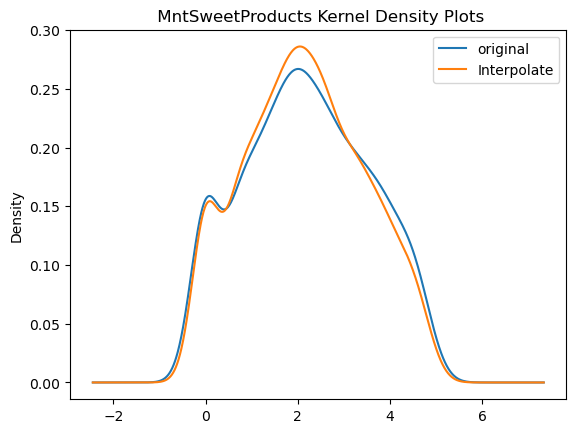

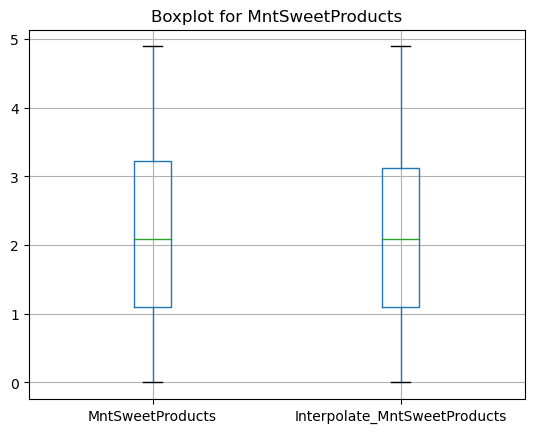

In [48]:
df_log["Interpolate_MntSweetProducts"] = df_log["MntSweetProducts"].interpolate(method="linear")


variance1 = df_log["MntSweetProducts"].var()
print("Original variance",variance1)
variance2 = df_log["Interpolate_MntSweetProducts"].var()
print("Interploate variance",variance2)


df_log["MntSweetProducts"].plot(kind="kde", label="original")
df_log["Interpolate_MntSweetProducts"].plot(kind="kde", label="Interpolate")
plt.legend()
plt.title(" MntSweetProducts Kernel Density Plots")
plt.show()

df_log[["MntSweetProducts","Interpolate_MntSweetProducts"]].boxplot()
plt.title("Boxplot for MntSweetProducts")
plt.show()


In [49]:
df_log.columns

Index(['Income', 'Education', 'Marital_Status', 'Country', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'MntWines', 'mean_MntMeatProducts',
       'mean_MntGoldProds', 'mean_NumWebPurchases', 'Interpolate_MntFruits',
       'Interpolate_MntFishProducts', 'Interpolate_MntSweetProducts'],
      dtype='object')

In [50]:
df_data = df_log[['Income', 'Education', 'Marital_Status', 'Country','NumCatalogPurchases','NumStorePurchases', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                  'AcceptedCmp2', 'Response','mean_MntMeatProducts','mean_MntGoldProds', 'mean_NumWebPurchases','Interpolate_MntFruits',
                  'Interpolate_MntFishProducts','Interpolate_MntSweetProducts','MntWines']]

In [51]:
df_data.shape

(1518, 18)

In [52]:
df_data.isna().sum()

Income                          0
Education                       0
Marital_Status                  0
Country                         0
NumCatalogPurchases             0
NumStorePurchases               0
AcceptedCmp4                    0
AcceptedCmp5                    0
AcceptedCmp1                    0
AcceptedCmp2                    0
Response                        0
mean_MntMeatProducts            0
mean_MntGoldProds               0
mean_NumWebPurchases            0
Interpolate_MntFruits           0
Interpolate_MntFishProducts     0
Interpolate_MntSweetProducts    0
MntWines                        0
dtype: int64

In [53]:
df_data.columns.to_list()

['Income',
 'Education',
 'Marital_Status',
 'Country',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'mean_MntMeatProducts',
 'mean_MntGoldProds',
 'mean_NumWebPurchases',
 'Interpolate_MntFruits',
 'Interpolate_MntFishProducts',
 'Interpolate_MntSweetProducts',
 'MntWines']

In [54]:
plot_col = ['Income','NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'mean_MntMeatProducts',
            'mean_MntGoldProds', 'mean_NumWebPurchases', 'MntWines', 'Interpolate_MntFruits', 'Interpolate_MntFishProducts', 'Interpolate_MntSweetProducts']

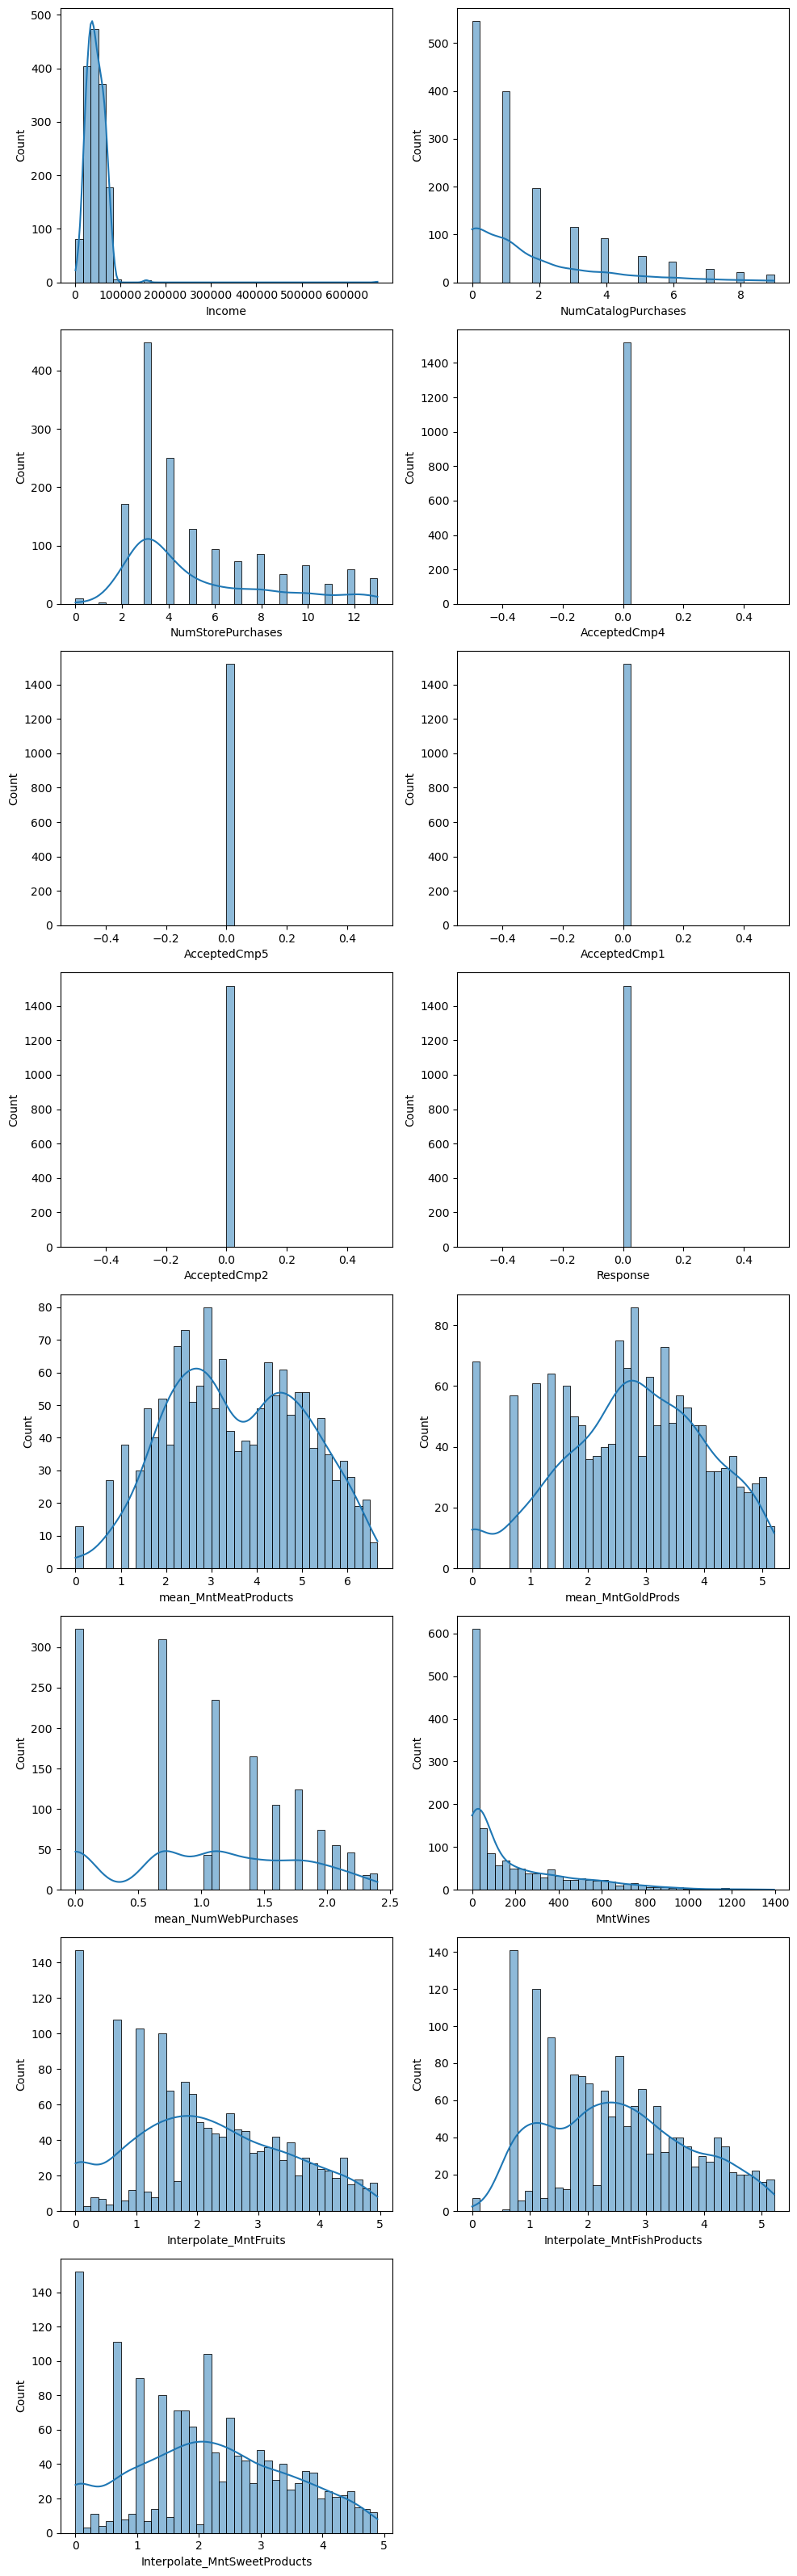

In [55]:
subplots_his(plot_col, df_data)

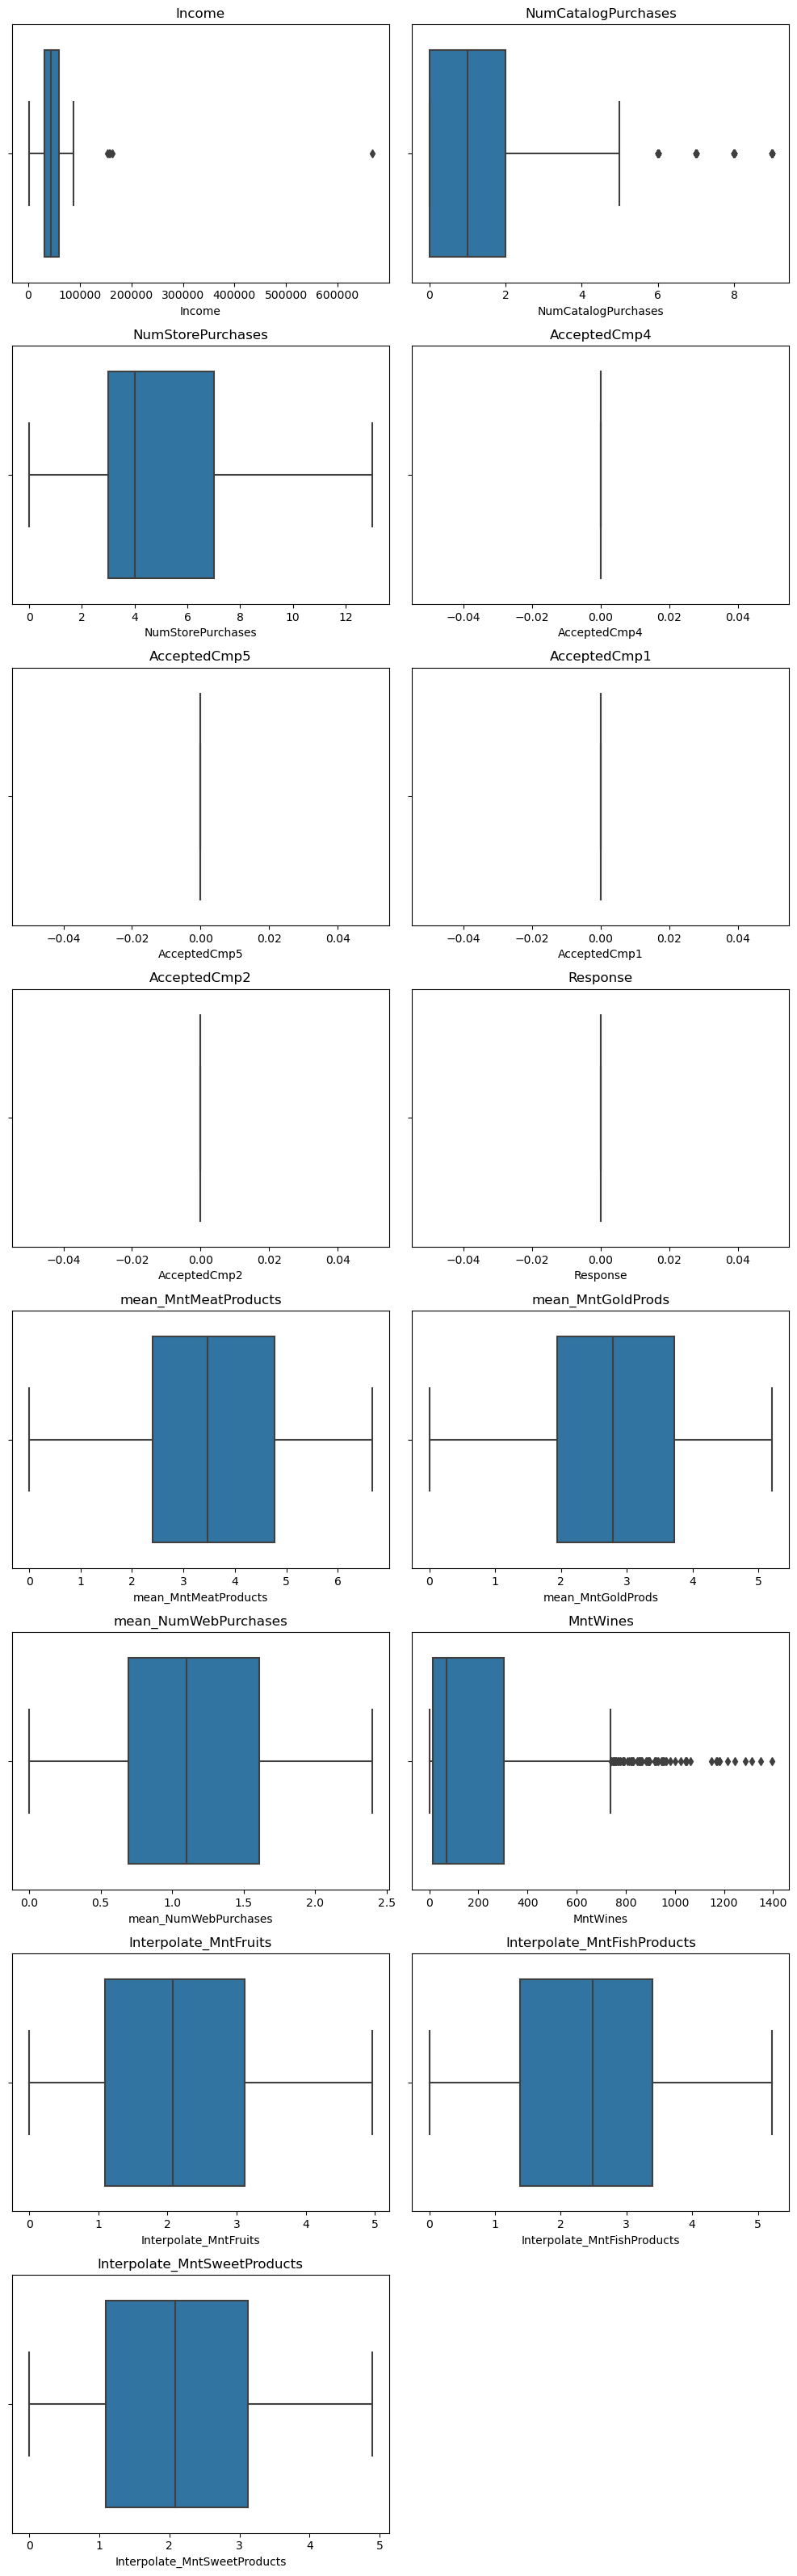

In [56]:
subplots_box(plot_col, df_data)

For sknewness
https://vivekrai1011.medium.com/skewness-and-kurtosis-in-machine-learning-c19f79e2d7a5#:~:text=Skewness%20is%20of%20two%20types&text=For%20a%20positive%20skewness%20mean,skewness%20mean%20%3C%20median%20%3C%20mode.


### Ploting the correlation Matrix after log transformation with removed outlayer data

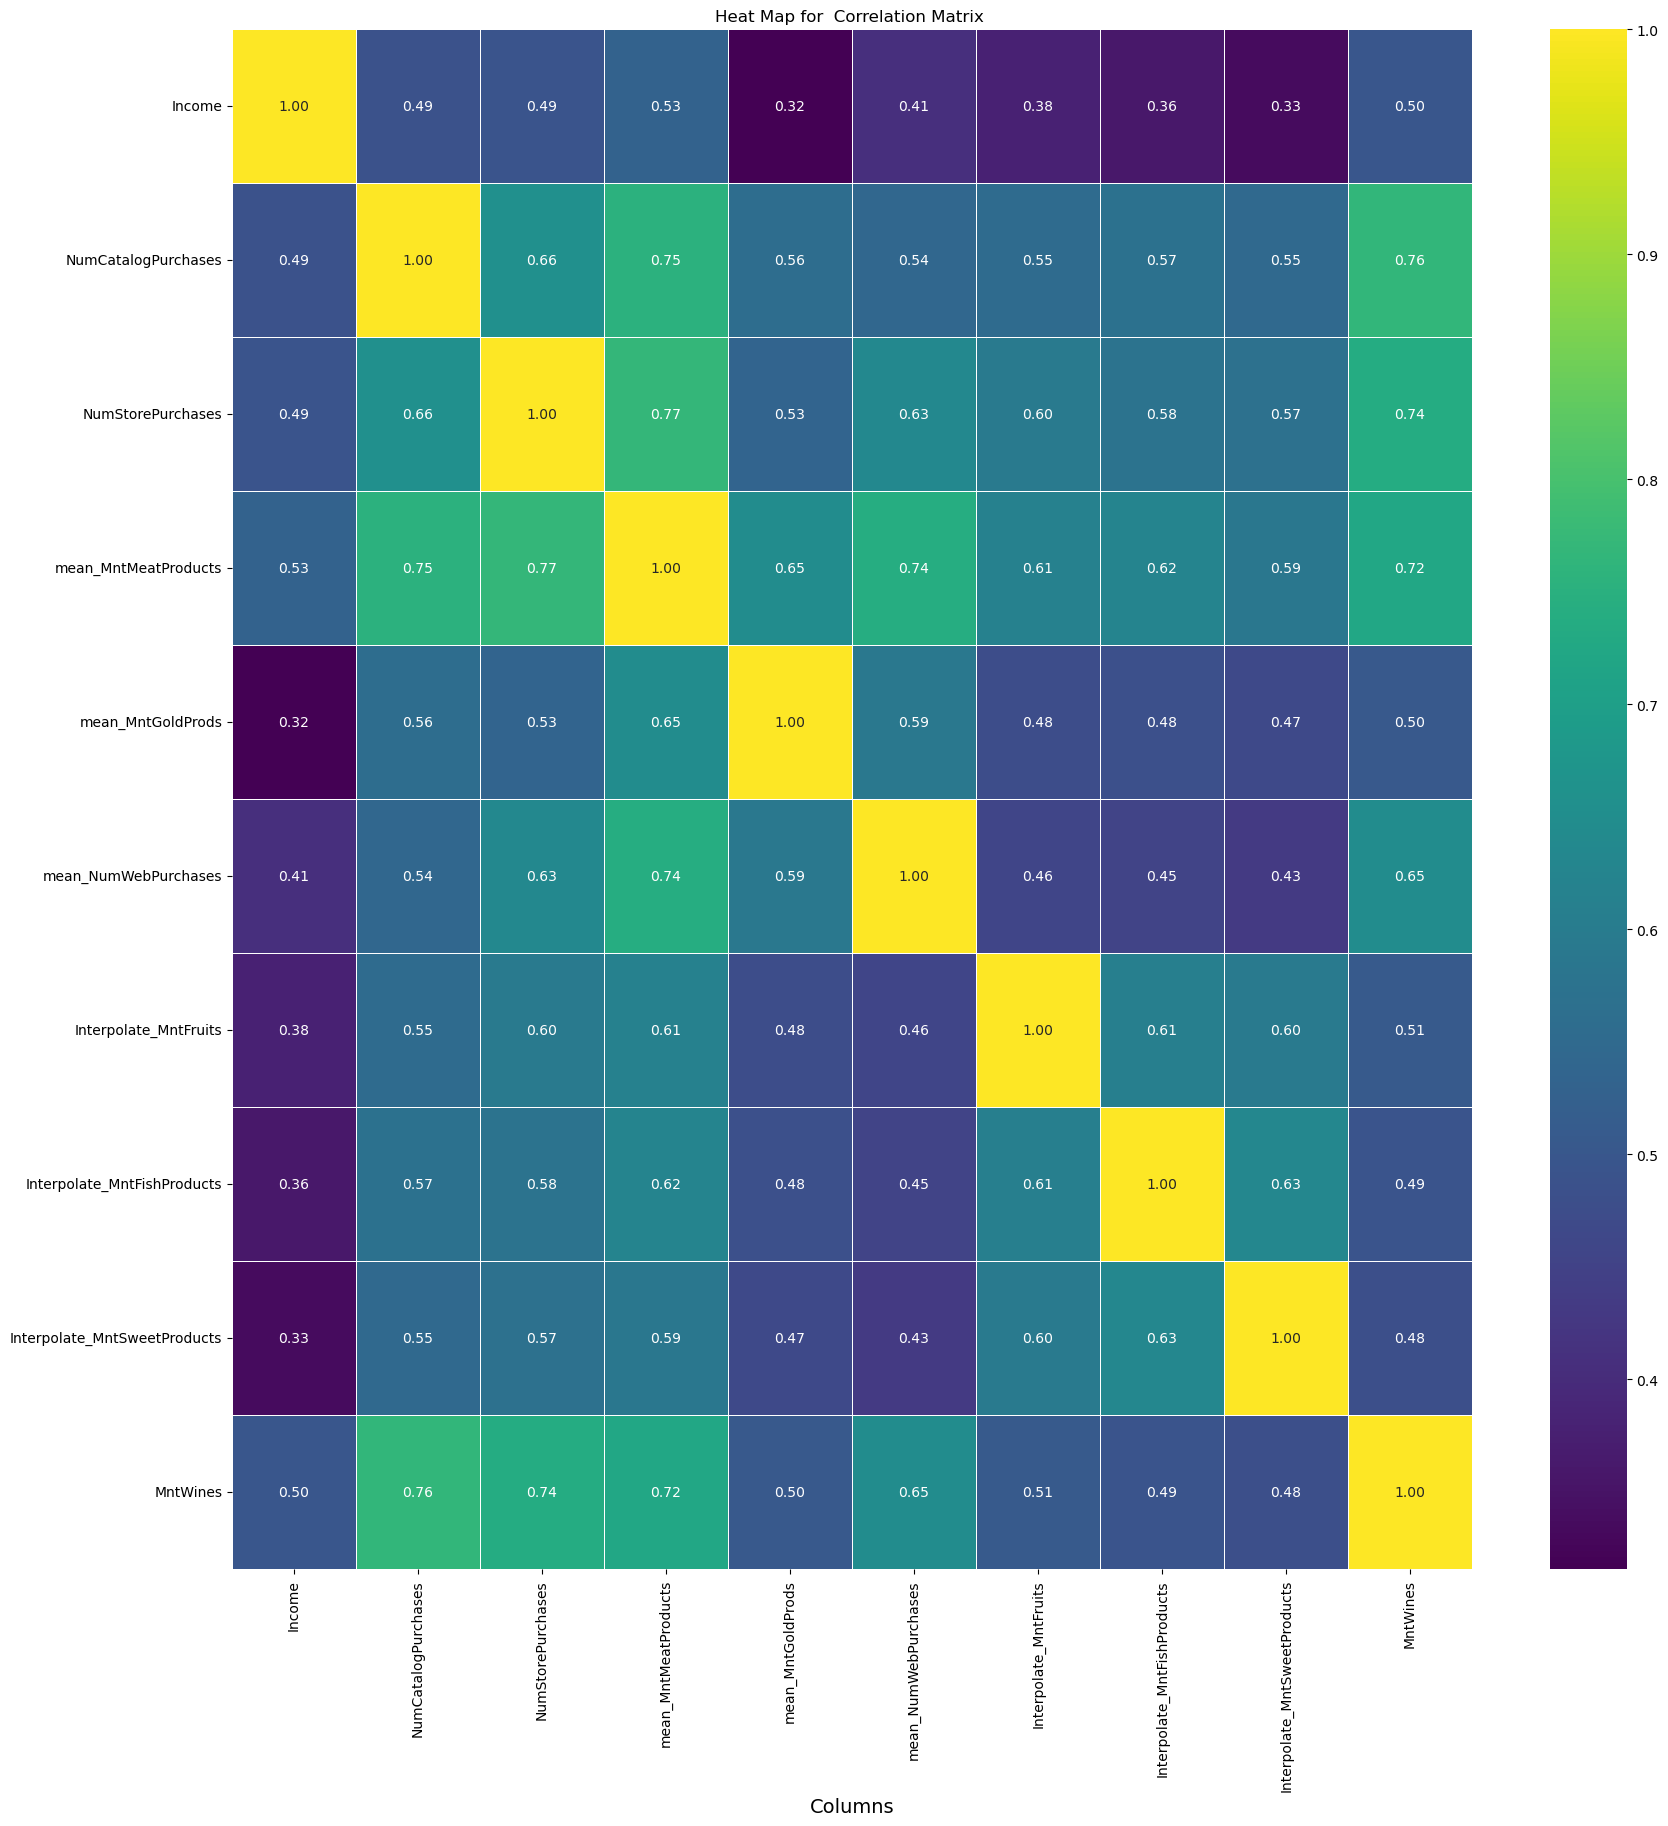

In [57]:
# Creating a corre;ation matrix
col = ['Income','NumCatalogPurchases', 'NumStorePurchases', 'mean_MntMeatProducts','mean_MntGoldProds', 'mean_NumWebPurchases', 'Interpolate_MntFruits', 'Interpolate_MntFishProducts', 'Interpolate_MntSweetProducts','MntWines']

df_corr= df_data[col]

corr = df_corr.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr,annot=True,cmap='viridis',linewidth=.5,fmt='.2f')
plt.title("Heat Map for  Correlation Matrix ")
plt.xlabel("Columns", fontsize=14)
plt.show()

## Handling the Categorical Columns 

In [58]:
df_data

Income   Education Marital_Status Country  NumCatalogPurchases  \
2      67267  Graduation        Married      US                    2   
3      32474  Graduation       Together     AUS                    0   
7      44931  Graduation       Together      SP                    1   
8      65324         PhD        Married      US                    2   
9      65324         PhD        Married     IND                    2   
...      ...         ...            ...     ...                  ...   
2233   36640    2n Cycle       Divorced     IND                    1   
2234   78901  Graduation       Divorced      US                    3   
2235   66476         PhD       Divorced      US                    2   
2236   31056    2n Cycle        Married      SP                    0   
2237   46310  Graduation       Divorced      SP                    1   

      NumStorePurchases  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
2                     5             0             0             0   
3                     2             0             0             0   
7                     3             0             0             0   
8                     9             0             0             0   
9                     9             0             0             0   
...                 ...           ...           ...           ...   
2233                  2             0             0             0   
2234                  5             0             0             0   
2235                 11             0             0             0   
2236                  3             0             0             0   
2237                  5             0             0             0   

      AcceptedCmp2  Response  mean_MntMeatProducts  mean_MntGoldProds  \
2                0         0              4.077537           3.401197   
3                0         0              0.000000           2.784327   
7                0         0              2.397895           1.945910   
8                0         0              4.624973           1.609438   
9                0         0              4.624973           1.609438   
...            ...       ...                   ...                ...   
2233             0         0              2.079442           3.218876   
2234             0         0              5.733341           3.526361   
2235             0         0              4.836282           4.356709   
2236             0         0              2.564949           2.772589   
2237             0         0              4.477337           2.639057   

      mean_NumWebPurchases  Interpolate_MntFruits  \
2                 1.098612               2.397895   
3                 0.000000               2.569936   
7                 0.693147               2.741976   
8                 1.791759               2.914016   
9                 1.791759               3.086056   
...                    ...                    ...   
2233              0.693147               1.791759   
2234              2.197225               2.397895   
2235              1.609438               2.890372   
2236              0.000000               2.302585   
2237              1.791759               0.693147   

      Interpolate_MntFishProducts  Interpolate_MntSweetProducts  MntWines  
2                        2.708050                      0.693147       134  
3                        2.820208                      1.617343        10  
7                        2.932365                      2.541540        78  
8                        3.044522                      3.465736       384  
9                        3.044522                      3.465736       384  
...                           ...                           ...       ...  
2233                     1.945910                      1.386294        15  
2234                     3.496508                      3.258097       321  
2235                     3.850148                      3.871201       372  
2236                     1.098612     

In [59]:
df_data = df_data.reset_index(drop=True)
df_data

Income   Education Marital_Status Country  NumCatalogPurchases  \
0      67267  Graduation        Married      US                    2   
1      32474  Graduation       Together     AUS                    0   
2      44931  Graduation       Together      SP                    1   
3      65324         PhD        Married      US                    2   
4      65324         PhD        Married     IND                    2   
...      ...         ...            ...     ...                  ...   
1513   36640    2n Cycle       Divorced     IND                    1   
1514   78901  Graduation       Divorced      US                    3   
1515   66476         PhD       Divorced      US                    2   
1516   31056    2n Cycle        Married      SP                    0   
1517   46310  Graduation       Divorced      SP                    1   

      NumStorePurchases  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                     5             0             0             0   
1                     2             0             0             0   
2                     3             0             0             0   
3                     9             0             0             0   
4                     9             0             0             0   
...                 ...           ...           ...           ...   
1513                  2             0             0             0   
1514                  5             0             0             0   
1515                 11             0             0             0   
1516                  3             0             0             0   
1517                  5             0             0             0   

      AcceptedCmp2  Response  mean_MntMeatProducts  mean_MntGoldProds  \
0                0         0              4.077537           3.401197   
1                0         0              0.000000           2.784327   
2                0         0              2.397895           1.945910   
3                0         0              4.624973           1.609438   
4                0         0              4.624973           1.609438   
...            ...       ...                   ...                ...   
1513             0         0              2.079442           3.218876   
1514             0         0              5.733341           3.526361   
1515             0         0              4.836282           4.356709   
1516             0         0              2.564949           2.772589   
1517             0         0              4.477337           2.639057   

      mean_NumWebPurchases  Interpolate_MntFruits  \
0                 1.098612               2.397895   
1                 0.000000               2.569936   
2                 0.693147               2.741976   
3                 1.791759               2.914016   
4                 1.791759               3.086056   
...                    ...                    ...   
1513              0.693147               1.791759   
1514              2.197225               2.397895   
1515              1.609438               2.890372   
1516              0.000000               2.302585   
1517              1.791759               0.693147   

      Interpolate_MntFishProducts  Interpolate_MntSweetProducts  MntWines  
0                        2.708050                      0.693147       134  
1                        2.820208                      1.617343        10  
2                        2.932365                      2.541540        78  
3                        3.044522                      3.465736       384  
4                        3.044522                      3.465736       384  
...                           ...                           ...       ...  
1513                     1.945910                      1.386294        15  
1514                     3.496508                      3.258097       321  
1515                     3.850148                      3.871201       372  
1516                     1.098612     

In [60]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Income                        1518 non-null   int64  
 1   Education                     1518 non-null   object 
 2   Marital_Status                1518 non-null   object 
 3   Country                       1518 non-null   object 
 4   NumCatalogPurchases           1518 non-null   int64  
 5   NumStorePurchases             1518 non-null   int64  
 6   AcceptedCmp4                  1518 non-null   int64  
 7   AcceptedCmp5                  1518 non-null   int64  
 8   AcceptedCmp1                  1518 non-null   int64  
 9   AcceptedCmp2                  1518 non-null   int64  
 10  Response                      1518 non-null   int64  
 11  mean_MntMeatProducts          1518 non-null   float64
 12  mean_MntGoldProds             1518 non-null   float64
 13  mea

In [61]:
df_data.describe()

Income  NumCatalogPurchases  NumStorePurchases  AcceptedCmp4  \
count    1518.000000          1518.000000        1518.000000        1518.0   
mean    45983.411726             1.702899           5.190382           0.0   
std     24586.455022             2.068537           3.082472           0.0   
min      1730.000000             0.000000           0.000000           0.0   
25%     31593.750000             0.000000           3.000000           0.0   
50%     44320.500000             1.000000           4.000000           0.0   
75%     59244.000000             2.000000           7.000000           0.0   
max    666666.000000             9.000000          13.000000           0.0   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  \
count        1518.0        1518.0        1518.0    1518.0   
mean            0.0           0.0           0.0       0.0   
std             0.0           0.0           0.0       0.0   
min             0.0           0.0           0.0       0.0   
25%             0.0           0.0           0.0       0.0   
50%             0.0           0.0           0.0       0.0   
75%             0.0           0.0           0.0       0.0   
max             0.0           0.0           0.0       0.0   

       mean_MntMeatProducts  mean_MntGoldProds  mean_NumWebPurchases  \
count           1518.000000        1518.000000           1518.000000   
mean               3.570150           2.784327              1.045289   
std                1.486550           1.256469              0.707180   
min                0.000000           0.000000              0.000000   
25%                2.397895           1.945910              0.693147   
50%                3.465736           2.784327              1.098612   
75%                4.777014           3.713572              1.609438   
max                6.665684           5.204007              2.397895   

       Interpolate_MntFruits  Interpolate_MntFishProducts  \
count            1518.000000                  1518.000000   
mean                2.137663                     2.522613   
std                 1.299068                     1.223692   
min                 0.000000                     0.000000   
25%                 1.098612                     1.386294   
50%                 2.079442                     2.484907   
75%                 3.119423                     3.401197   
max                 4.955827                     5.214936   

       Interpolate_MntSweetProducts     MntWines  
count                   1518.000000  1518.000000  
mean                       2.137535   195.687747  
std                        1.288796   251.242623  
min                        0.000000     0.000000  
25%                        1.098612    15.000000  
50%                        2.079442    70.000000  
75%                        3.120112   304.750000  
max                        4.890349  1396.000000

In [62]:
df_data.columns

Index(['Income', 'Education', 'Marital_Status', 'Country',
       'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response',
       'mean_MntMeatProducts', 'mean_MntGoldProds', 'mean_NumWebPurchases',
       'Interpolate_MntFruits', 'Interpolate_MntFishProducts',
       'Interpolate_MntSweetProducts', 'MntWines'],
      dtype='object')

In [63]:
df_data.describe()

Income  NumCatalogPurchases  NumStorePurchases  AcceptedCmp4  \
count    1518.000000          1518.000000        1518.000000        1518.0   
mean    45983.411726             1.702899           5.190382           0.0   
std     24586.455022             2.068537           3.082472           0.0   
min      1730.000000             0.000000           0.000000           0.0   
25%     31593.750000             0.000000           3.000000           0.0   
50%     44320.500000             1.000000           4.000000           0.0   
75%     59244.000000             2.000000           7.000000           0.0   
max    666666.000000             9.000000          13.000000           0.0   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  \
count        1518.0        1518.0        1518.0    1518.0   
mean            0.0           0.0           0.0       0.0   
std             0.0           0.0           0.0       0.0   
min             0.0           0.0           0.0       0.0   
25%             0.0           0.0           0.0       0.0   
50%             0.0           0.0           0.0       0.0   
75%             0.0           0.0           0.0       0.0   
max             0.0           0.0           0.0       0.0   

       mean_MntMeatProducts  mean_MntGoldProds  mean_NumWebPurchases  \
count           1518.000000        1518.000000           1518.000000   
mean               3.570150           2.784327              1.045289   
std                1.486550           1.256469              0.707180   
min                0.000000           0.000000              0.000000   
25%                2.397895           1.945910              0.693147   
50%                3.465736           2.784327              1.098612   
75%                4.777014           3.713572              1.609438   
max                6.665684           5.204007              2.397895   

       Interpolate_MntFruits  Interpolate_MntFishProducts  \
count            1518.000000                  1518.000000   
mean                2.137663                     2.522613   
std                 1.299068                     1.223692   
min                 0.000000                     0.000000   
25%                 1.098612                     1.386294   
50%                 2.079442                     2.484907   
75%                 3.119423                     3.401197   
max                 4.955827                     5.214936   

       Interpolate_MntSweetProducts     MntWines  
count                   1518.000000  1518.000000  
mean                       2.137535   195.687747  
std                        1.288796   251.242623  
min                        0.000000     0.000000  
25%                        1.098612    15.000000  
50%                        2.079442    70.000000  
75%                        3.120112   304.750000  
max                        4.890349  1396.000000

## Building the ML model

##  Dividing the Feature dataset and the Predicting dataset

In [64]:
Feature_dataset = df_data.drop("MntWines",axis=1)
Predict_dataset = df_data["MntWines"]

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = df_data.copy()
col_names = ["Income",'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp4',
             'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response',
             'mean_MntMeatProducts', 'mean_MntGoldProds', 'mean_NumWebPurchases','Interpolate_MntFruits', 'Interpolate_MntFishProducts',
             'Interpolate_MntSweetProducts']

features = Feature_dataset[col_names]

Feature_dataset[col_names] = scaler.fit_transform(features.values)
Feature_dataset

Income   Education Marital_Status Country  NumCatalogPurchases  \
0     0.865948  Graduation        Married      US             0.143676   
1    -0.549647  Graduation       Together     AUS            -0.823510   
2    -0.042819  Graduation       Together      SP            -0.339917   
3     0.786895         PhD        Married      US             0.143676   
4     0.786895         PhD        Married     IND             0.143676   
...        ...         ...            ...     ...                  ...   
1513 -0.380148    2n Cycle       Divorced     IND            -0.339917   
1514  1.339292  Graduation       Divorced      US             0.627269   
1515  0.833766         PhD       Divorced      US             0.143676   
1516 -0.607340    2n Cycle        Married      SP            -0.823510   
1517  0.013288  Graduation       Divorced      SP            -0.339917   

      NumStorePurchases  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0             -0.061783           0.0           0.0           0.0   
1             -1.035349           0.0           0.0           0.0   
2             -0.710827           0.0           0.0           0.0   
3              1.236304           0.0           0.0           0.0   
4              1.236304           0.0           0.0           0.0   
...                 ...           ...           ...           ...   
1513          -1.035349           0.0           0.0           0.0   
1514          -0.061783           0.0           0.0           0.0   
1515           1.885348           0.0           0.0           0.0   
1516          -0.710827           0.0           0.0           0.0   
1517          -0.061783           0.0           0.0           0.0   

      AcceptedCmp2  Response  mean_MntMeatProducts  mean_MntGoldProds  \
0              0.0       0.0              0.341431       4.911169e-01   
1              0.0       0.0             -2.402426       3.535587e-16   
2              0.0       0.0             -0.788834      -6.675004e-01   
3              0.0       0.0              0.709812      -9.353806e-01   
4              0.0       0.0              0.709812      -9.353806e-01   
...            ...       ...                   ...                ...   
1513           0.0       0.0             -1.003128       3.459628e-01   
1514           0.0       0.0              1.455655       5.907647e-01   
1515           0.0       0.0              0.852006       1.251841e+00   
1516           0.0       0.0             -0.676420      -9.345728e-03   
1517           0.0       0.0              0.610464      -1.156559e-01   

      mean_NumWebPurchases  Interpolate_MntFruits  \
0                 0.075428               0.200388   
1                -1.478595               0.332865   
2                -0.498116               0.465343   
3                 1.055908               0.597820   
4                 1.055908               0.730297   
...                    ...                    ...   
1513             -0.498116              -0.266359   
1514              1.629452               0.200388   
1515              0.798008               0.579613   
1516             -1.478595               0.126996   
1517              1.055908              -1.112330   

      Interpolate_MntFishProducts  Interpolate_MntSweetProducts  
0                        0.151589                     -1.121095  
1                        0.243274                     -0.403759  
2                        0.334959                      0.313578  
3                        0.426645                      1.030915  
4                        0.426645                      1.030915  
...                           ...                           ...  
1513                    -0.471436                     -0.583093  
1514                     0.796128                      0.869750  
1515                     1.085218                      1.345626  
1516                    -1.164076                     -0.045090  
1517                     0.151589                 

### Apply the Oridinal encoder for handling the categorical values

In [66]:
from sklearn.preprocessing import OrdinalEncoder

cat_cols = Feature_dataset.select_dtypes(include=['object']).columns
for col in cat_cols:
    oe = OrdinalEncoder()
    Feature_dataset[col] = oe.fit_transform(Feature_dataset[[col]])

In [67]:
Feature_dataset

Income  Education  Marital_Status  Country  NumCatalogPurchases  \
0     0.865948        2.0             2.0      7.0             0.143676   
1    -0.549647        2.0             4.0      0.0            -0.823510   
2    -0.042819        2.0             4.0      6.0            -0.339917   
3     0.786895        4.0             2.0      7.0             0.143676   
4     0.786895        4.0             2.0      3.0             0.143676   
...        ...        ...             ...      ...                  ...   
1513 -0.380148        0.0             1.0      3.0            -0.339917   
1514  1.339292        2.0             1.0      7.0             0.627269   
1515  0.833766        4.0             1.0      7.0             0.143676   
1516 -0.607340        0.0             2.0      6.0            -0.823510   
1517  0.013288        2.0             1.0      6.0            -0.339917   

      NumStorePurchases  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0             -0.061783           0.0           0.0           0.0   
1             -1.035349           0.0           0.0           0.0   
2             -0.710827           0.0           0.0           0.0   
3              1.236304           0.0           0.0           0.0   
4              1.236304           0.0           0.0           0.0   
...                 ...           ...           ...           ...   
1513          -1.035349           0.0           0.0           0.0   
1514          -0.061783           0.0           0.0           0.0   
1515           1.885348           0.0           0.0           0.0   
1516          -0.710827           0.0           0.0           0.0   
1517          -0.061783           0.0           0.0           0.0   

      AcceptedCmp2  Response  mean_MntMeatProducts  mean_MntGoldProds  \
0              0.0       0.0              0.341431       4.911169e-01   
1              0.0       0.0             -2.402426       3.535587e-16   
2              0.0       0.0             -0.788834      -6.675004e-01   
3              0.0       0.0              0.709812      -9.353806e-01   
4              0.0       0.0              0.709812      -9.353806e-01   
...            ...       ...                   ...                ...   
1513           0.0       0.0             -1.003128       3.459628e-01   
1514           0.0       0.0              1.455655       5.907647e-01   
1515           0.0       0.0              0.852006       1.251841e+00   
1516           0.0       0.0             -0.676420      -9.345728e-03   
1517           0.0       0.0              0.610464      -1.156559e-01   

      mean_NumWebPurchases  Interpolate_MntFruits  \
0                 0.075428               0.200388   
1                -1.478595               0.332865   
2                -0.498116               0.465343   
3                 1.055908               0.597820   
4                 1.055908               0.730297   
...                    ...                    ...   
1513             -0.498116              -0.266359   
1514              1.629452               0.200388   
1515              0.798008               0.579613   
1516             -1.478595               0.126996   
1517              1.055908              -1.112330   

      Interpolate_MntFishProducts  Interpolate_MntSweetProducts  
0                        0.151589                     -1.121095  
1                        0.243274                     -0.403759  
2                        0.334959                      0.313578  
3                        0.426645                      1.030915  
4                        0.426645                      1.030915  
...                           ...                           ...  
1513                    -0.471436                     -0.583093  
1514                     0.796128                      0.869750  
1515                     1.085218                      1.345626  
1516                    -1.164076                     -0.045090  
1517                     0.151589     

### Spliting the dataet into Training and Test dataset

In [68]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test, = train_test_split(Feature_dataset,Predict_dataset,test_size=0.20,random_state=56)

In [69]:
# Multiple Linear Regression, SVM, Decision Trees

## MLR

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [71]:
y_pred = model.predict(x_test)
y_pred

array([ 6.90783259e+02,  7.85477878e+01,  2.70672195e+02,  7.35499727e+01,
        2.48627038e+02,  3.69612281e+02,  6.35069964e+02,  2.09567102e+02,
        7.17588651e+00,  5.37680366e+02, -5.41054081e+01,  2.83485706e+02,
        5.60637559e+02,  1.35295043e+02,  1.93124903e+02,  1.62285546e+02,
        1.43802035e+02,  2.17214893e+01,  6.83530963e+02,  1.86382402e+02,
        3.08320559e+02, -7.70763109e+01, -1.58938222e+01,  5.05183494e+02,
        4.96330721e+01,  3.40304808e+02,  4.17731366e+02,  2.79999097e+02,
        2.03804568e+01,  2.47860189e+01,  4.18936881e+02,  2.34160563e+02,
        5.30758681e+02,  6.23821763e+02,  9.18591074e+01,  5.94999346e+01,
        6.39477797e+01,  3.83305280e+02,  1.24455451e+02,  1.31650677e+01,
       -8.83554893e+01,  3.74730765e+02,  8.90791572e+01,  6.41538163e+01,
        4.99793605e+02,  1.97920901e+02, -5.19759694e+01, -1.22578271e+01,
        2.73328049e+02,  9.42122213e+01,  4.74260899e+02,  6.75717367e+01,
       -5.14049410e+01,  

In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 85.53588250198804
Mean Squared Error: 17895.197440370164
Root Mean Squared Error: 133.77293239056308


#### Mean Absolute Error (MAE):

The Mean Absolute Error of approximately 85.54 suggests that, on average, our model's predictions deviate by around 85.54 units from the actual values.
MAE is a robust metric that measures the average absolute difference between predicted and actual values.

#### Mean Squared Error (MSE):

The Mean Squared Error of approximately 17895.20 indicates that the model's predictions have larger errors, with the squared differences averaging around 17895.20.
MSE is sensitive to outliers and penalizes larger errors more heavily than MAE.

#### Root Mean Squared Error (RMSE):

The Root Mean Squared Error of approximately 133.77 is the square root of MSE and is in the same unit as the target variable.
RMSE provides an interpretable measure of the spread of errors, and a lower value indicates better model performance.

# SVC

In [73]:
from sklearn.svm import SVC

In [74]:
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(x_train, y_train)

SVC()

In [75]:
y_pred = svm_classifier.predict(x_test)
y_pred

array([620,   5, 162,   5, 162, 112, 112,   5,   5, 162,   5,   2, 162,
         5,   5,   5,   5,   5, 162, 162,   5,   1,   5, 162,   2, 162,
       112, 112,   9,   5,   2,   5, 162, 162,   2,   5,   9, 162,   9,
         2,   1, 162,   5,   5, 162,   5,   5,   5,   5,   5, 162,   5,
         5, 162, 162,   5, 620, 112,   5,   2, 162,   5,   5, 112, 162,
         5,   5,   5,   5,   5,   5,   5, 162,   5, 162, 162,   5,   5,
         5,   5, 162,   2,   5, 162,   2,   2,   5, 112, 162,   2, 162,
         5, 162, 162,   5,   5,   9,   2, 112, 112, 162, 162,   5, 162,
         9,   8, 162,   5,   2, 162, 162,   5,   5,   2, 162, 162, 162,
         9,   1, 162, 162,   2,   5,   9, 162,   2,   5,   5,   2, 162,
         9,   5, 162,   5, 162,   2,   2,   5, 162, 162,   5,   2, 162,
         2,   5, 162,   1, 162,   2,   5,   5,   5,   2,   5,   5,   2,
         2,   5, 162,   5, 162, 162,   5, 162,   5,   2, 162,   5,   5,
       162, 112,   9, 162,   9,   5,   5,   2, 162, 112,   2,   

In [88]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         4
           2       0.05      0.33      0.08         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         6
           5       0.01      1.00      0.02         1
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         3
   

The provided classification report indicates very low performance for the evaluated model.

#### Accuracy:

The overall accuracy of the model is reported as 0.01 (1%). This suggests that the model correctly predicted the class labels for only 1% of the instances.

#### Macro Avg:

The macro-average precision, recall, and F1-score are all reported as 0.00 (0%). This indicates extremely poor performance across all classes when considering each class independently. It implies that the model struggles to provide meaningful predictions for any specific class.

#### Weighted Avg:

The weighted average precision, recall, and F1-score are also reported as 0.00 (0%). The weighted average considers class imbalances, and the low values here reinforce the notion that the model's predictions are not contributing meaningfully to the overall evaluation.

## Decission Tree


In [89]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()

In [90]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [91]:
y_predict = dt.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report 


Accuracy_score1=accuracy_score(y_test,y_predict)
#Precision_score1=precision_score(y_test,y_predict)
# Recall_score1=recall_score(y_test,y_predict)
# F1_score1=f1_score(y_test,y_predict)


print("Accuracy_score1 :",Accuracy_score1)
#print("Precision_score2",Precision_score2)
# print("Recall_score2 :",Recall_score23)
# print("F1_score2",F1_score2)

Accuracy_score1 : 0.13486842105263158


The accuracy score of approximately 0.135 for the Decision Tree model suggests poor performance in correctly classifying instances. Here's an inference based on the provided accuracy score:

#### Low Accuracy:

The accuracy score of 0.135 indicates that the Decision Tree model correctly predicts the class labels for only about 13.5% of the instances in the test set. This level of accuracy is relatively low.